<a href="https://colab.research.google.com/github/NowshinTasnim/Spatio_Temporal_Crime_Prediction/blob/main/Crime_data_forecasting(sf_data_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Libraries

####install

In [30]:
!wget https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

--2022-03-02 11:24:22--  https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman.ttf’

Times New Roman.ttf     [ <=>                ] 176.35K   970KB/s    in 0.2s    

2022-03-02 11:24:23 (970 KB/s) - ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman.ttf’ saved [180582]



####import

In [2]:
# For data processing
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# For data processing and manipulation
import pandas as pd

# For date calculations
import datetime

# For encoding the label(word to onehot)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# For spliting the dataset into Train, Validation and Test 
from sklearn.model_selection import train_test_split

from scipy.stats import hmean

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold

# For evaluation metrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

# For SOM
#from minisom import MiniSom 

# For ploting data
import itertools
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For checking path
import os
from os import path
import csv

In [40]:
# plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

##Root path

In [ ]:
# In case Nuhash runs
ROOTPATH = '/content/gdrive/MyDrive/Colab Notebooks/ThesisFinal'
PATH_IMAGE = ROOTPATH+'/images_sf/'
PATH_DA = ROOTPATH+"/datasets/sf-crime/sf_crime_data_2004_2017_da.csv"
PATH_MAIN = ROOTPATH + "/datasets/sf-crime/sf_crime_data_2004_2017.csv"
PATH_PDA = ROOTPATH+"/datasets/sf-crime/sf_crime_data_2004_2017_police_da.csv"


In [3]:
# In case Nowshin runs
ROOTPATH = '/content/gdrive/MyDrive/Projects/Crime forcasting/'
PATH_IMAGE = ROOTPATH+'/images/San_Francisco/'
PATH_MAIN = ROOTPATH + "/datasets/sf-crime/sf_crime_data_2004_2017_all.csv"
PATH_DA = ROOTPATH + "/datasets/sf-crime/sf_crime_data_2004_2017_for_data_analysis.csv"
PATH_PDA = ROOTPATH+"/datasets/sf-crime/police_department_info_2004_2017.csv"

#Load Data

In [4]:
# The dataset is taken from kaggle(https://www.kaggle.com/c/sf-crime/data)
dataset = pd.read_csv(PATH_MAIN)

In [5]:
dataset.shape

(1970039, 36)

In [6]:
dataset.head()

PdId  IncidntNum  ...  Neighborhoods 2             datetime
0  9003134414015    90031344  ...             90.0  2004-01-01 00:01:00
1  4024785812100    40247858  ...             94.0  2004-01-01 00:01:00
2  4029289709210    40292897  ...             54.0  2004-01-01 00:01:00
3  7093582914015    70935829  ...             90.0  2004-01-01 00:01:00
4  7003089909130    70030899  ...             32.0  2004-01-01 00:01:00

[5 rows x 36 columns]

In [7]:
dataset = dataset[["datetime","Date", "Time", "Category","PdDistrict","DayOfWeek","X","Y"]]

In [8]:
dataset.head()

datetime        Date   Time  ... DayOfWeek           X          Y
0  2004-01-01 00:01:00  01/01/2004  00:01  ...  Thursday -122.432595  37.724667
1  2004-01-01 00:01:00  01/01/2004  00:01  ...  Thursday -122.432676  37.730713
2  2004-01-01 00:01:00  01/01/2004  00:01  ...  Thursday -122.393707  37.763022
3  2004-01-01 00:01:00  01/01/2004  00:01  ...  Thursday -122.436724  37.721436
4  2004-01-01 00:01:00  01/01/2004  00:01  ...  Thursday -122.403405  37.775421

[5 rows x 8 columns]

##Data Pre-processing

In [9]:
# Read the dataset as Dataframe 
dataset_df = pd.DataFrame(dataset)

# Process the Dates column
dataset_df['Date'] = pd.to_datetime(dataset_df['Date']) 

# Divide Dates into year, month, day, hour, minute
dataset_df['Year'] = dataset_df['Date'].apply(lambda x: x.year)
dataset_df['Month'] = dataset_df['Date'].apply(lambda x: x.month)
dataset_df['DayofMonth'] = dataset_df['Date'].apply(lambda x: x.day)
dataset_df.head()

datetime       Date   Time  ...  Year Month DayofMonth
0  2004-01-01 00:01:00 2004-01-01  00:01  ...  2004     1          1
1  2004-01-01 00:01:00 2004-01-01  00:01  ...  2004     1          1
2  2004-01-01 00:01:00 2004-01-01  00:01  ...  2004     1          1
3  2004-01-01 00:01:00 2004-01-01  00:01  ...  2004     1          1
4  2004-01-01 00:01:00 2004-01-01  00:01  ...  2004     1          1

[5 rows x 11 columns]

In [10]:
dataset_df.to_csv(PATH_DA, index= False)

In [ ]:
# dataset_df = pd.read_csv(ROOTPATH+'/datasets/sf-crime/sf_crime_data_2004_2017_for_data_analysis.csv')

In [11]:
# Finding number of unique years 
num_year = dataset_df['Year'].nunique()
num_year

14

In [12]:
# Finding uniuqe classes
classes = dataset_df['Category'].drop_duplicates().sort_values(ascending = True).values
print("Unique classes = \n",classes)

# Number of classes
num_classes = classes.shape[0]
print("Number of cateories = ",num_classes)

Unique classes = 
 ['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC' 'DRUNKENNESS'
 'EMBEZZLEMENT' 'EXTORTION' 'FAMILY OFFENSES' 'FORGERY/COUNTERFEITING'
 'FRAUD' 'GAMBLING' 'KIDNAPPING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'LOITERING'
 'MISSING PERSON' 'NON-CRIMINAL' 'OTHER OFFENSES'
 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION' 'RECOVERED VEHICLE' 'ROBBERY'
 'SECONDARY CODES' 'SEX OFFENSES, FORCIBLE' 'SEX OFFENSES, NON FORCIBLE'
 'STOLEN PROPERTY' 'SUICIDE' 'SUSPICIOUS OCC' 'TREA' 'TRESPASS'
 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS' 'WEAPON LAWS']
Number of cateories =  38


####Day Of Week

In [13]:
# Dictionary for (Number,Day) 
Week_day_n_d = {
    0 : "Sunday",
    1 : "Monday",
    2 : "Tuesday",
    3 : "Wednesday",
    4 : "Thursday",
    5 : "Friday",
    6 : "Saturday",
}

# Dictionary for (Day,Number)
Week_day_d_n = {key:value for (value,key) in Week_day_n_d.items()}

# Initialize a list for updating data
DayOfWeek = [0 for i in range(dataset_df.shape[0])]

# Update the dataframe
dataset_df["WDay"] = dataset_df['DayOfWeek'].apply(lambda x: Week_day_d_n[x])
print("Day column -> \n",dataset_df["WDay"])

Day column -> 
 0          4
1          4
2          4
3          4
4          4
          ..
1970034    0
1970035    0
1970036    0
1970037    0
1970038    0
Name: WDay, Length: 1970039, dtype: int64


In [14]:
dataset_df.to_csv(PATH_DA, index= False)

In [ ]:
# dataset_df = pd.read_csv(ROOTPATH+'/datasets/sf-crime/sf_crime_data_2004_2017_for_data_analysis.csv')

####Police Departments

In [15]:
dataset_df['PdDistrict'].isnull().sum()

1

In [16]:
dataset_df = dataset_df.drop( index= dataset_df.loc[dataset_df['PdDistrict'].isnull()].index[0]) 

In [17]:
dataset_df = dataset_df.reset_index(drop= True)

In [18]:
# Finding unique police department district name 
Police_dept_name = dataset_df['PdDistrict'].drop_duplicates()
# Number of police department
num_police_dept = len(Police_dept_name)

print("Number of Police Department = ",num_police_dept)
print("Police Departments Name -> \n",Police_dept_name)

# Dictionary for mapping id to name of the unique police department
Police_dept_id_name = {i:Police_dept_name.values[i] for i in range (num_police_dept)}
print("Police Departments ID:Name Dict-> \n",Police_dept_id_name)

# Dictionary for mapping name of the unique police department to id
Police_dept_name_id = {key:value for (value,key) in Police_dept_id_name.items()}
print("Police Departments Name:ID Dict-> \n",Police_dept_name_id)

# Update the new column of dataframe with the value of the list 
dataset_df["PdDID"] = dataset_df['PdDistrict'].apply(lambda x: Police_dept_name_id[x])
print("PdDID column -> \n", dataset_df["PdDID"])

Number of Police Department =  10
Police Departments Name -> 
 0      INGLESIDE
2        BAYVIEW
4       SOUTHERN
6        MISSION
8        CENTRAL
10      RICHMOND
15          PARK
22       TARAVAL
25      NORTHERN
33    TENDERLOIN
Name: PdDistrict, dtype: object
Police Departments ID:Name Dict-> 
 {0: 'INGLESIDE', 1: 'BAYVIEW', 2: 'SOUTHERN', 3: 'MISSION', 4: 'CENTRAL', 5: 'RICHMOND', 6: 'PARK', 7: 'TARAVAL', 8: 'NORTHERN', 9: 'TENDERLOIN'}
Police Departments Name:ID Dict-> 
 {'INGLESIDE': 0, 'BAYVIEW': 1, 'SOUTHERN': 2, 'MISSION': 3, 'CENTRAL': 4, 'RICHMOND': 5, 'PARK': 6, 'TARAVAL': 7, 'NORTHERN': 8, 'TENDERLOIN': 9}
PdDID column -> 
 0          0
1          0
2          1
3          0
4          2
          ..
1970033    3
1970034    9
1970035    9
1970036    9
1970037    2
Name: PdDID, Length: 1970038, dtype: int64


In [19]:
dataset_df.to_csv(PATH_DA, index= False)

In [ ]:
# dataset_df = pd.read_csv(ROOTPATH+'/datasets/sf-crime/sf_crime_data_2004_2017_for_data_analysis.csv')

#### Preprocessed Data analysis

In [20]:
# Total data after preprocessing
dataset_df.head()

datetime       Date   Time  ... DayofMonth WDay PdDID
0  2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     0
1  2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     0
2  2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     1
3  2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     0
4  2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     2

[5 rows x 13 columns]

######Police Department info

In [21]:
# Police department information (id, name, longitude, latitude)
Police_departments = dataset_df[['PdDID','PdDistrict','X','Y']]
Police_departments = Police_departments.drop_duplicates()
Police_departments.head()

PdDID PdDistrict           X          Y
0      0  INGLESIDE -122.432595  37.724667
1      0  INGLESIDE -122.432676  37.730713
2      1    BAYVIEW -122.393707  37.763022
3      0  INGLESIDE -122.436724  37.721436
4      2   SOUTHERN -122.403405  37.775421

In [ ]:
# Save the Police department information (id, name, longitude, latitude) to csv file
Police_departments.to_csv(PATH_PDA, index = False)

In [22]:
data_pd_groupby = dataset_df.groupby(["PdDistrict"]).size().reset_index()
data_pd_groupby.columns = ['PdDistrict','Count']
data_pd_groupby

PdDistrict   Count
0     BAYVIEW  191681
1     CENTRAL  204407
2   INGLESIDE  169705
3     MISSION  266010
4    NORTHERN  244401
5        PARK  110888
6    RICHMOND  104278
7    SOUTHERN  360352
8     TARAVAL  144721
9  TENDERLOIN  173595

######Count of Crimes using Category

In [23]:
# Category group by
data_crime_groupby = dataset_df.groupby("Category").size().reset_index()
data_crime_groupby.columns = ['Category','Count']
data_crime_groupby.describe()

Count
count      38.000000
mean    51843.105263
std     91107.037969
min        14.000000
25%      2337.500000
50%     10185.500000
75%     67974.000000
max    438179.000000

In [24]:
# Crime categories with how many times they occured
Crime_category_descending = data_crime_groupby.sort_values("Count", ascending = False)
Crime_category_descending

Category   Count
16                LARCENY/THEFT  438179
21               OTHER OFFENSES  276715
20                 NON-CRIMINAL  218713
1                       ASSAULT  173657
35                VEHICLE THEFT  109483
7                 DRUG/NARCOTIC  106620
34                    VANDALISM  105556
36                     WARRANTS   89249
4                      BURGLARY   82958
31               SUSPICIOUS OCC   73864
25                      ROBBERY   50304
19               MISSING PERSON   41275
13                        FRAUD   37265
26              SECONDARY CODES   20765
12       FORGERY/COUNTERFEITING   20487
37                  WEAPON LAWS   19201
33                     TRESPASS   17280
23                 PROSTITUTION   14516
29              STOLEN PROPERTY   10417
27       SEX OFFENSES, FORCIBLE    9954
8                   DRUNKENNESS    9019
5            DISORDERLY CONDUCT    8961
24            RECOVERED VEHICLE    8688
6   DRIVING UNDER THE INFLUENCE    5273
15                   KIDNAPPING    4616
17                  LIQUOR LAWS    3657
0                         ARSON    3492
9                  EMBEZZLEMENT    2699
18                    LOITERING    2217
30                      SUICIDE    1180
11              FAMILY OFFENSES     817
2                    BAD CHECKS     781
3                       BRIBERY     751
10                    EXTORTION     675
28   SEX OFFENSES, NON FORCIBLE     381
14                     GAMBLING     308
22      PORNOGRAPHY/OBSCENE MAT      51
32                         TREA      14

In [25]:
# Top 10 crime categories
Crime_category_descending.head(10)

Category   Count
16   LARCENY/THEFT  438179
21  OTHER OFFENSES  276715
20    NON-CRIMINAL  218713
1          ASSAULT  173657
35   VEHICLE THEFT  109483
7    DRUG/NARCOTIC  106620
34       VANDALISM  105556
36        WARRANTS   89249
4         BURGLARY   82958
31  SUSPICIOUS OCC   73864

In [26]:
sn = dataset_df["Category"].value_counts().reset_index()
sn.columns = ['Category','Count']
sn

Category   Count
0                 LARCENY/THEFT  438179
1                OTHER OFFENSES  276715
2                  NON-CRIMINAL  218713
3                       ASSAULT  173657
4                 VEHICLE THEFT  109483
5                 DRUG/NARCOTIC  106620
6                     VANDALISM  105556
7                      WARRANTS   89249
8                      BURGLARY   82958
9                SUSPICIOUS OCC   73864
10                      ROBBERY   50304
11               MISSING PERSON   41275
12                        FRAUD   37265
13              SECONDARY CODES   20765
14       FORGERY/COUNTERFEITING   20487
15                  WEAPON LAWS   19201
16                     TRESPASS   17280
17                 PROSTITUTION   14516
18              STOLEN PROPERTY   10417
19       SEX OFFENSES, FORCIBLE    9954
20                  DRUNKENNESS    9019
21           DISORDERLY CONDUCT    8961
22            RECOVERED VEHICLE    8688
23  DRIVING UNDER THE INFLUENCE    5273
24                   KIDNAPPING    4616
25                  LIQUOR LAWS    3657
26                        ARSON    3492
27                 EMBEZZLEMENT    2699
28                    LOITERING    2217
29                      SUICIDE    1180
30              FAMILY OFFENSES     817
31                   BAD CHECKS     781
32                      BRIBERY     751
33                    EXTORTION     675
34   SEX OFFENSES, NON FORCIBLE     381
35                     GAMBLING     308
36      PORNOGRAPHY/OBSCENE MAT      51
37                         TREA      14

######Top 10 Crimes Plot

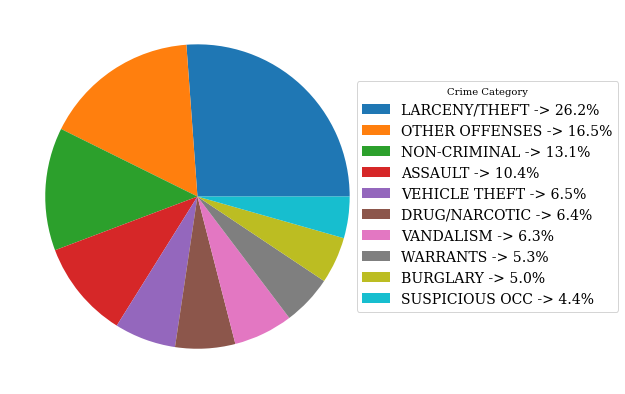

In [43]:
# Plot Top 10 Crime Categories usin pie plot 

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

## Top 10 Crime data
count_data = Crime_category_descending.Count.head(10).values
cat_data = Crime_category_descending.Category.head(10).values

## To iterate through lambda function
i = itertools.count()


## get percentage
def get_percentage(data):
    sum_val = sum(data)
    percentage_val = []
    for i in range(len(data)):
      percentage_val.append(data[i]*100/sum_val)
    return percentage_val 


wedges, texts = ax.pie(count_data, textprops = dict(color = "w"))

labels = [f'{l} -> {s:1.1f}%' for l, s in zip(cat_data, get_percentage(count_data))]
ax.legend(wedges, labels,
          title="Crime Category",
          loc="center left",
          bbox_to_anchor=(.9, 0, 0, 1),
          prop = {'size': 14})
# plt.setp(autotexts, size=12, weight="bold")

# ax.set_title("Pie Plot for Top 10 Crimes", fontsize = 15)
plt.savefig(PATH_IMAGE +"Pie_Plot_for_Top_10_Crimes(2004-2017).png")
plt.show()

  # wedges, texts = ax.pie(Fprediction[dis_now][23], textprops = dict(color = "w"),startangle=90)
  


######Count of Crime using Year,Month and Day_of_Month

In [33]:
# Data groupby month and year to get number of crimes per day
data_year_month_day_groupby = dataset_df.groupby(["Year","Month","DayofMonth"]).size().reset_index()
data_year_month_day_groupby.columns = ["Year","Month","DayofMonth","Count"]
data_year_month_day_groupby

Year  Month  DayofMonth  Count
0     2004      1           1    445
1     2004      1           2    335
2     2004      1           3    345
3     2004      1           4    347
4     2004      1           5    414
...    ...    ...         ...    ...
5108  2017     12          27    379
5109  2017     12          28    413
5110  2017     12          29    404
5111  2017     12          30    424
5112  2017     12          31    419

[5113 rows x 4 columns]

In [34]:
YMD = [datetime.datetime(data_year_month_day_groupby["Year"].values[i], data_year_month_day_groupby["Month"].values[i], data_year_month_day_groupby["DayofMonth"].values[i]) for i in range(len(data_year_month_day_groupby))]
for i in range(len(YMD)): 
  YMD[i] = YMD[i].strftime("%Y-%m-%d")

Crime_count_ymd = { 'Date': YMD,
                   'Number of Crimes': data_year_month_day_groupby["Count"].values
                   }
crime_count_ymd_df = pd.DataFrame(Crime_count_ymd, columns=["Date","Number of Crimes"]).set_index("Date")
crime_count_ymd_df

Number of Crimes
Date                        
2004-01-01               445
2004-01-02               335
2004-01-03               345
2004-01-04               347
2004-01-05               414
...                      ...
2017-12-27               379
2017-12-28               413
2017-12-29               404
2017-12-30               424
2017-12-31               419

[5113 rows x 1 columns]

In [35]:
# Data groupby month and year to get number of crimes per month
data_month_year_groupby = dataset_df.groupby(["Month","Year"]).size().reset_index()
data_month_year_groupby.columns = ['Month','Year','Count']
data_month_year_groupby

Month  Year  Count
0        1  2004  12684
1        1  2005  12056
2        1  2006  11505
3        1  2007  11237
4        1  2008  11569
..     ...   ...    ...
163     12  2013  11028
164     12  2014  11933
165     12  2015  11268
166     12  2016  12820
167     12  2017  12302

[168 rows x 3 columns]

In [36]:
# Initialize a list with Minimum number of crimes per month using 13 years data (2003 - 2015)
Month_min = [data_month_year_groupby.Count[i:(i+num_year)].min() for i in range(0,len(data_month_year_groupby),num_year)]

# Initialize a list with Maximum number of crimes per month using 13 years data (2003 - 2015)
Month_max = [data_month_year_groupby.Count[i:(i+num_year)].max() for i in range(0,len(data_month_year_groupby),num_year)]

#  Make a array of data showing min and max number of crime of the months using 12 years data 
Month_min_max = { 'Month': [1,2,3,4,5,6,7,8,9,10,11,12],
                 'Month_min': Month_min,
                 'Month_max': Month_max
}

# Make a dataframe with the information of the array
Month_min_max_df = pd.DataFrame(Month_min_max, columns=["Month","Month_min","Month_max"])

print("Minimum cases per month in 14 years: ",Month_min)
print("Maximum cases per month in 14 years: ",Month_max)
print(Month_min_max_df)

Minimum cases per month in 14 years:  [10993, 9675, 10783, 10160, 10984, 10074, 10452, 10762, 10920, 11071, 10247, 10364]
Maximum cases per month in 14 years:  [13370, 12055, 13674, 12705, 13511, 13073, 13158, 13523, 13482, 13586, 12469, 12820]
    Month  Month_min  Month_max
0       1      10993      13370
1       2       9675      12055
2       3      10783      13674
3       4      10160      12705
4       5      10984      13511
5       6      10074      13073
6       7      10452      13158
7       8      10762      13523
8       9      10920      13482
9      10      11071      13586
10     11      10247      12469
11     12      10364      12820


In [37]:
# Number of crime per month of 14 years (row indicating month and column indicating the years)
per_month_crime= [data_month_year_groupby.Count.values[i:(i+num_year)] for i in range(0,len(data_month_year_groupby),num_year)]
per_month_crime

[array([12684, 12056, 11505, 11237, 11569, 11630, 10993, 11235, 11298,
        12461, 12548, 13370, 12778, 12864]),
 array([11590, 10441, 10402, 10115, 10663, 10379,  9936,  9675, 10567,
        11436, 11275, 12055, 11902, 11965]),
 array([12710, 11893, 11281, 11453, 12012, 12356, 10783, 11058, 11134,
        12617, 12606, 13674, 12170, 13442]),
 array([12386, 11706, 11214, 10685, 11033, 11772, 10160, 10799, 10958,
        12145, 12083, 12705, 12103, 12652]),
 array([12968, 11948, 11112, 10987, 11495, 10984, 11254, 11039, 11495,
        12556, 12036, 13511, 12523, 12957]),
 array([11886, 11357, 11316, 10767, 10391, 10074, 10611, 10656, 10833,
        12153, 11672, 13073, 11925, 12378]),
 array([12300, 11637, 11437, 11576, 12021, 11177, 10694, 10452, 11312,
        12810, 12480, 13158, 12009, 12876]),
 array([12314, 11930, 12189, 11506, 11204, 12752, 11361, 10762, 12100,
        13383, 13186, 13523, 12288, 12647]),
 array([11491, 11406, 11078, 11621, 11783, 12060, 11444, 10920, 11638,
 

######Countplot, Range plot, Distribution plot Respect to Day-Month-Year

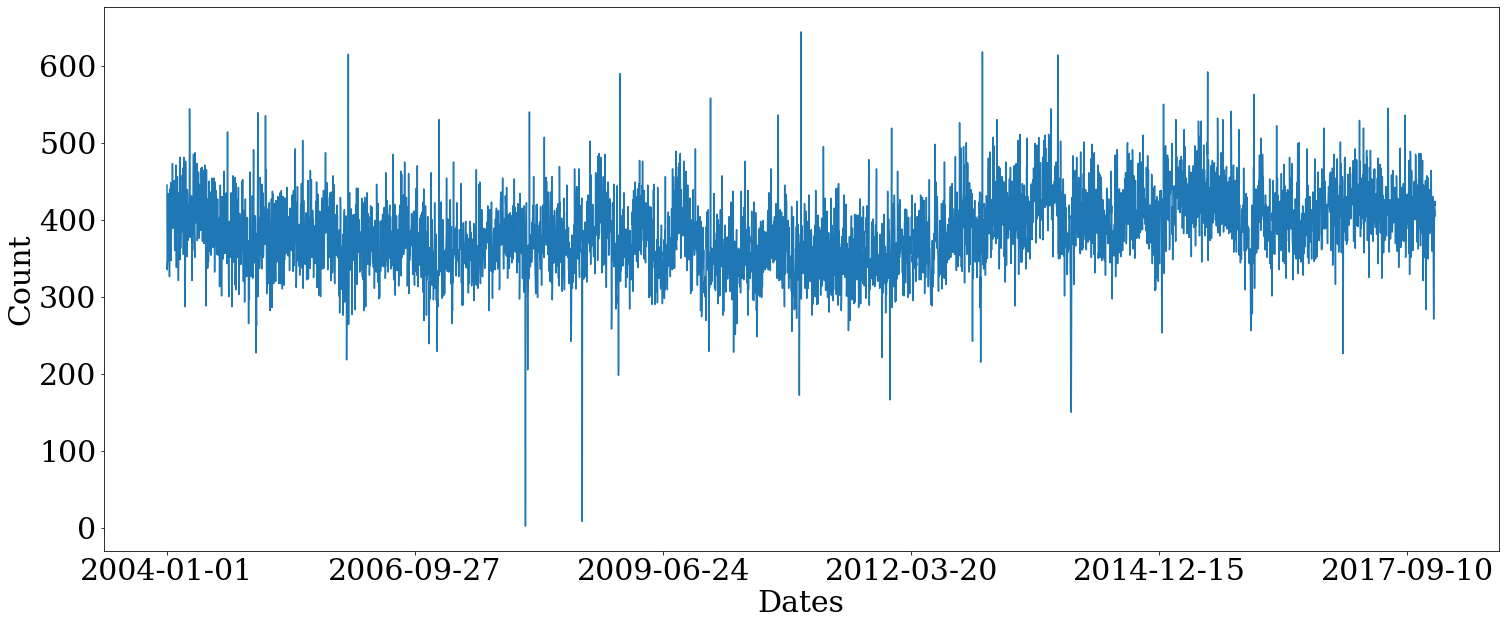

In [42]:
# Plot per day crime data
plt.figure(figsize=(25,10))
crime_count_ymd_df["Number of Crimes"].plot()
plt.tick_params(axis='both', labelsize = 30)
plt.xlabel('Dates',fontsize = 30)
plt.ylabel('Count',fontsize = 30)
plt.savefig(PATH_IMAGE+"/Number_of_crimes_per_day_SF(2004-2017).png")
plt.show()

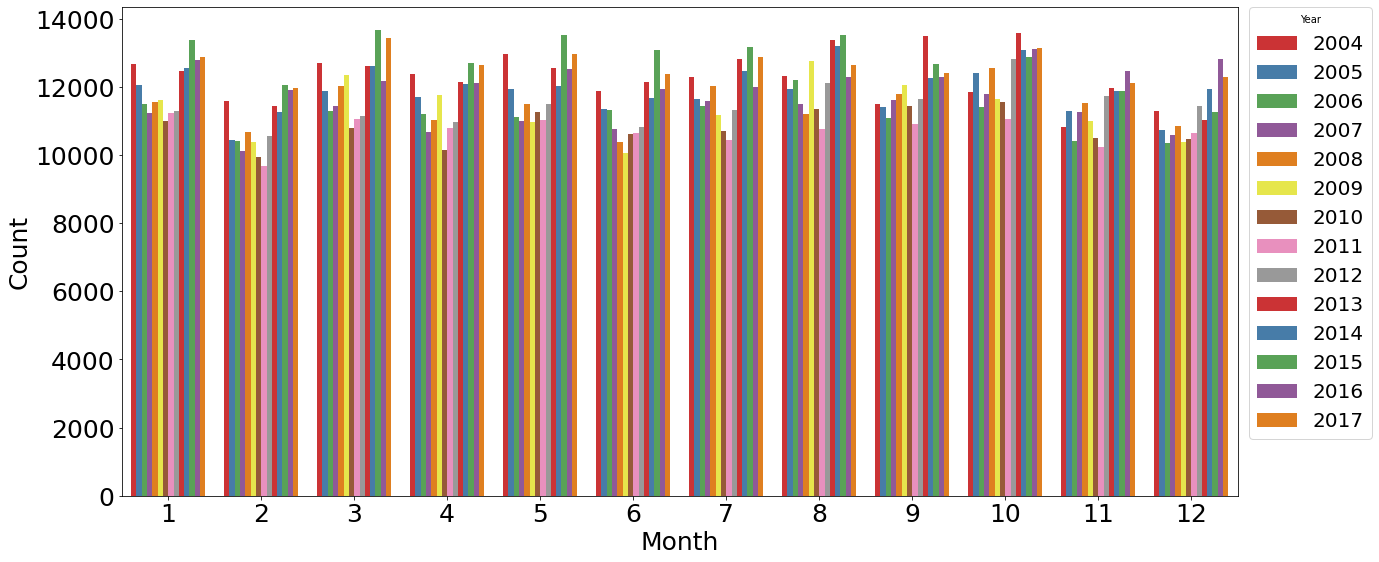

In [ ]:
# Plot number of crimes per month in per year using countplot of seaborn library
plt.figure(figsize=(20,9))
cplot_month = sns.countplot(x="Month", hue = "Year",data=dataset_df, palette="Set1" )
# cplot_month.set_title("Number of crimes in each month(2004 to 2017)")
plt.tick_params(axis='both', labelsize = 25)
plt.xlabel('Month',fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.legend(title= "Year",bbox_to_anchor=(1.01, 1),borderaxespad=0, prop = {'size': 20})
plt.savefig(PATH_IMAGE+"/Number_of_crimes_in_each_month(2004-2017).png")

In [44]:
# Color palette choose
color =sns.color_palette("Set1")
color

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

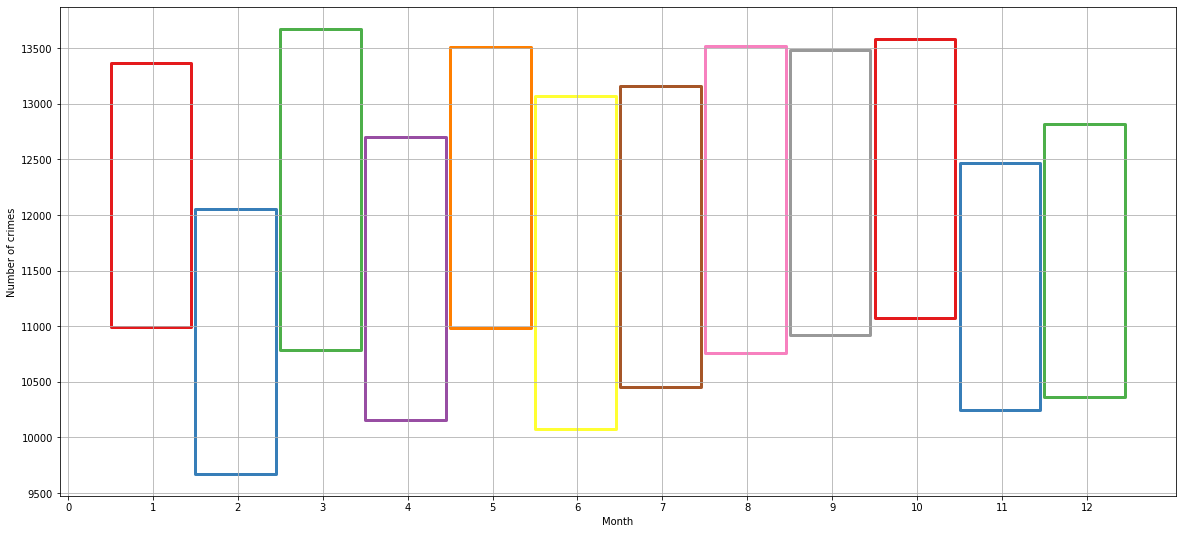

In [ ]:
# Ploting range of number of crimes per month per year 
fig, ax = plt.subplots(figsize=(20,9))

for i in range(12):
  ax.broken_barh([(i+.5,.95)], (Month_min_max_df.Month_min[i], Month_min_max_df.Month_max[i]-Month_min_max_df.Month_min[i]), facecolor=(0, 0, 0, 0), linewidth=3, edgecolor = color[i%9])


ax.set_ylabel('Number of crimes')
ax.set_xlabel('Month')

val =range(13)
ax.set_xticks(val)

ax.grid(True)
# ax.set_title("Number of crimes range in 14 years(2004-2017)")
plt.savefig(PATH_IMAGE+"Number_of_crimes_range_in_14_years(2004-2017).png")
plt.show()

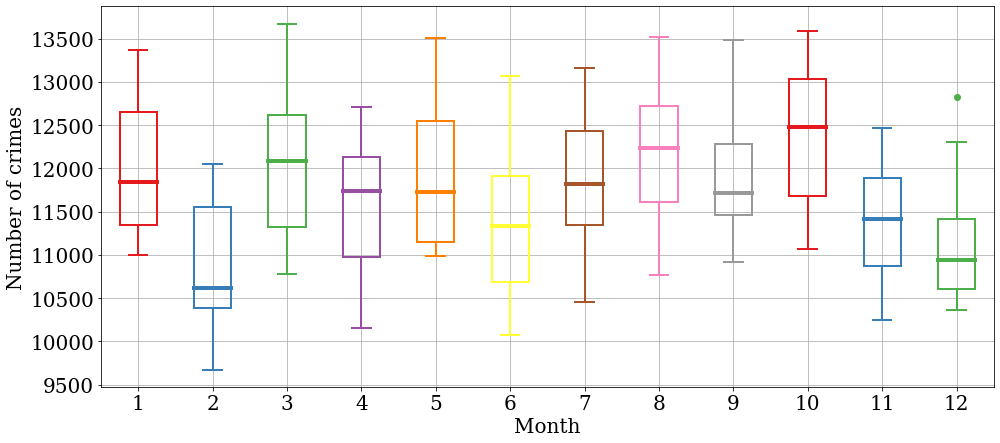

In [45]:
# Ploting the per_month_crime data to show the distribution
fig, ax = plt.subplots(figsize=(16,7))
bplots = ax.boxplot(per_month_crime, patch_artist = True)

i = 0
for box in bplots["boxes"]:
  plt.setp(box, edgecolor = color[i%9],facecolor = ([0,0,0,0]), linewidth = 2)
  i+=1

i = 0
for fl in bplots["fliers"]:
  plt.setp(fl, markerfacecolor = color[i%9], markeredgecolor = color[i%9], marker = 'o')
  i+=1

i = 0
for med in bplots["medians"]:
  plt.setp(med, color = color[i%9],linewidth = 4)
  i+=1

i = 0
j = 0
for cp in bplots["caps"]:
  plt.setp(cp, color = color[i%9],linewidth = 2)
  j += 1
  if(j%2==0):
    i+=1
    
i = 0
j =0
for wh in bplots["whiskers"]:
  plt.setp(wh, color = color[i%9],linewidth = 2)
  j += 1
  if(j%2==0):
    i+=1

ax.tick_params(axis='both', labelsize = 20)
ax.set_xlabel("Month",fontsize = 20)
ax.set_ylabel("Number of crimes",fontsize = 20)
ax.grid(True)
# ax.set_title("Data distribution in 14 years(2004-2017)")
plt.savefig(PATH_IMAGE+"/Data_distribution_in_14_years(2004-2017).png")

plt.show()

######Count crime using police department

In [46]:
# Data groupby year to get number of crimes per day
data_pd_year_groupby = dataset_df.groupby(["Year","PdDID","PdDistrict"]).size().reset_index()
data_pd_year_groupby.columns = ["Year","PdDID","PdDistrict","Count"]
data_pd_year_groupby

Year  PdDID  PdDistrict  Count
0    2004      0   INGLESIDE  13361
1    2004      1     BAYVIEW  15237
2    2004      2    SOUTHERN  24220
3    2004      3     MISSION  20515
4    2004      4     CENTRAL  13681
..    ...    ...         ...    ...
135  2017      5    RICHMOND   9309
136  2017      6        PARK   8324
137  2017      7     TARAVAL  11310
138  2017      8    NORTHERN  20915
139  2017      9  TENDERLOIN   8633

[140 rows x 4 columns]

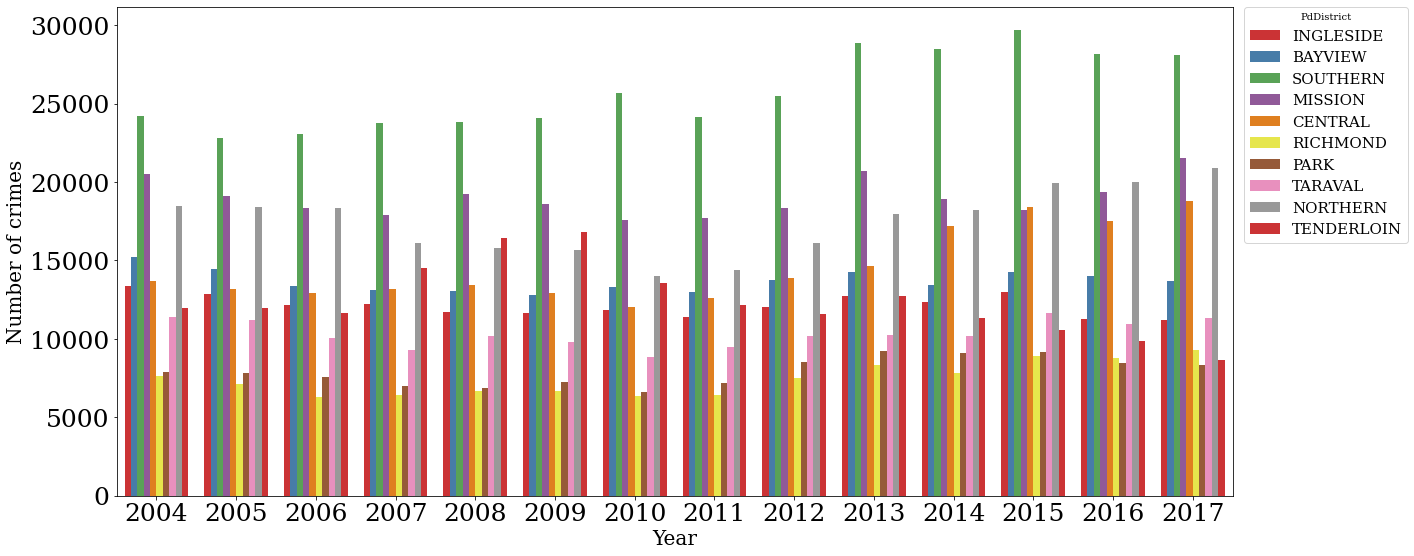

In [47]:
# Plot number of crimes per year using countplot of seaborn library
plt.figure(figsize=(20,9))
cplot_month = sns.countplot(x="Year", hue = "PdDistrict",data=dataset_df, palette="Set1" )
# cplot_month.set_title("Yearly Number of crimes for each Police department (2004 to 2017)")
plt.tick_params(axis='both', labelsize = 25)
plt.xlabel("Year",fontsize = 20)
plt.ylabel("Number of crimes",fontsize = 20)
plt.legend(title= "PdDistrict", bbox_to_anchor=(1.01, 1),
           borderaxespad=0, prop = {'size': 15})
plt.savefig(PATH_IMAGE+"/Yearly_number_of_crimes_in_each_Police_department(2004-2017).png")

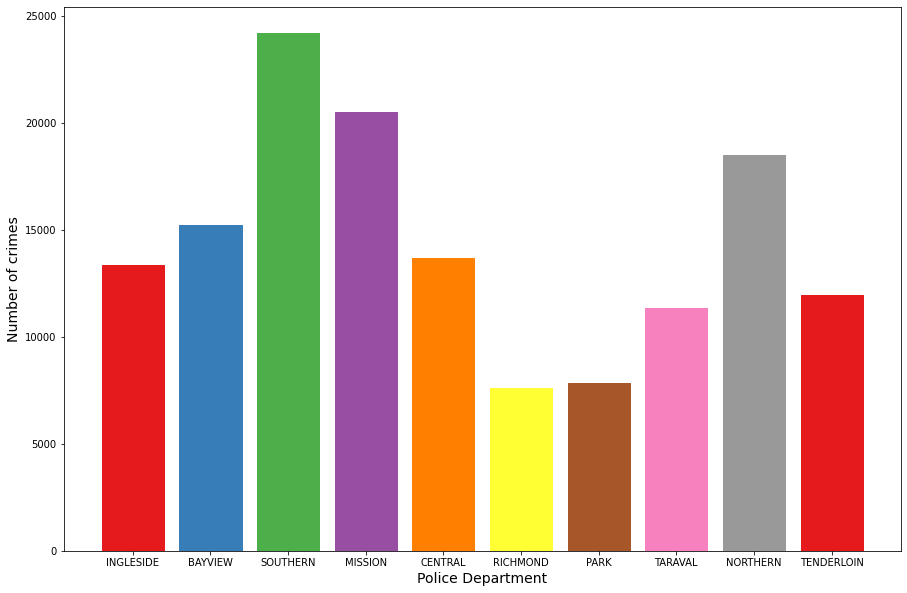

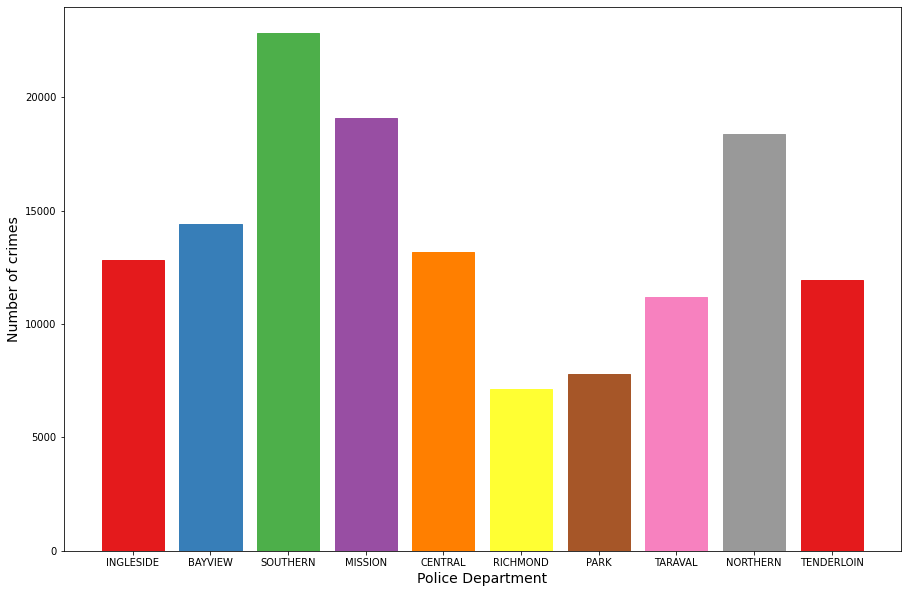

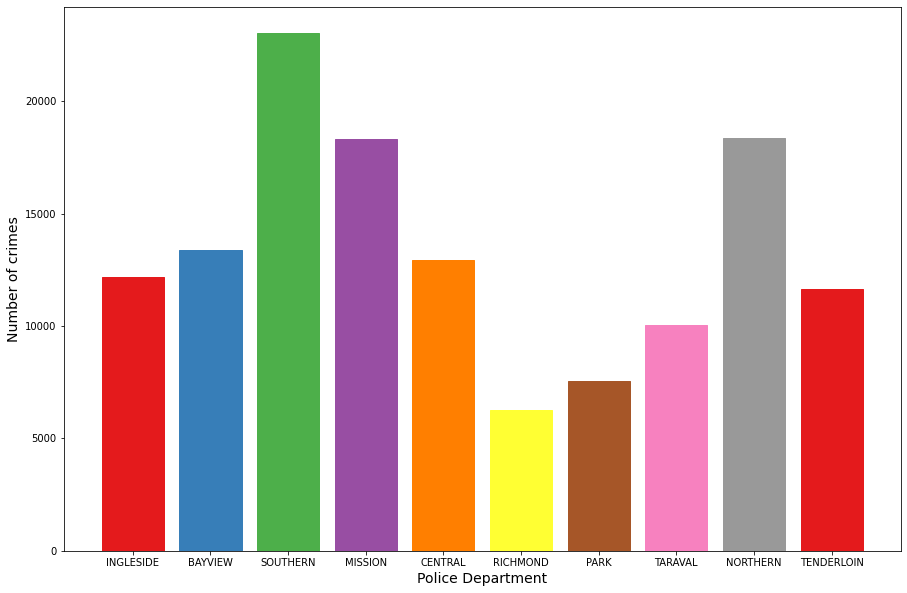

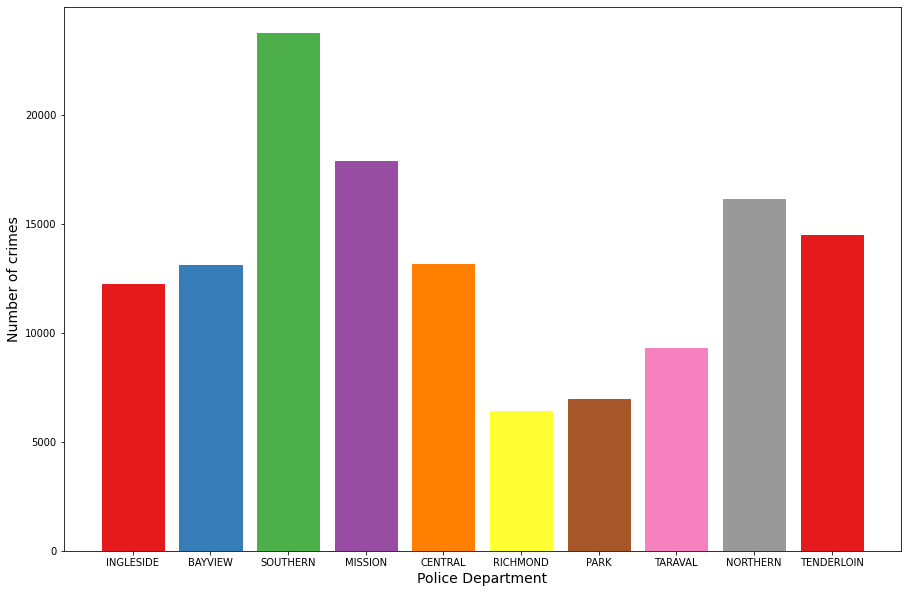

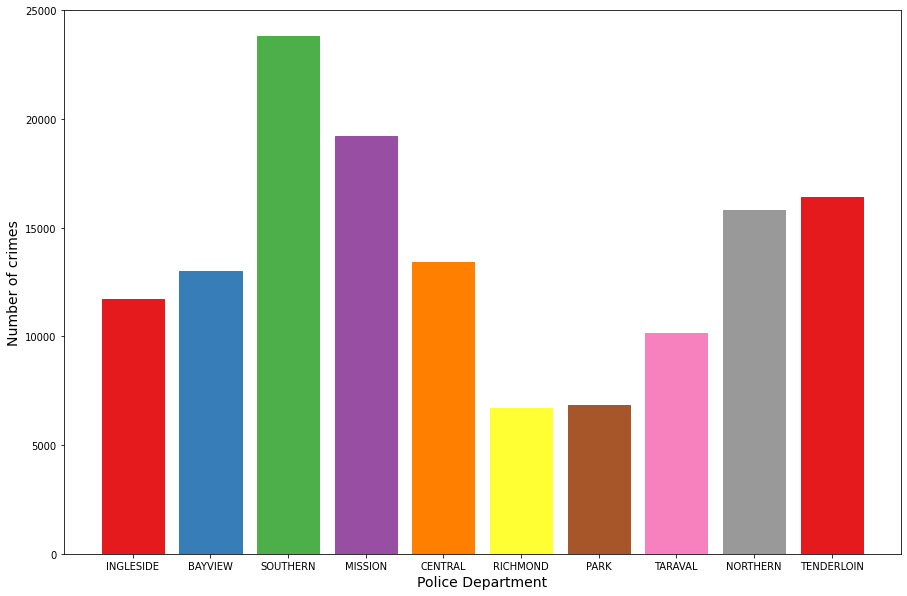

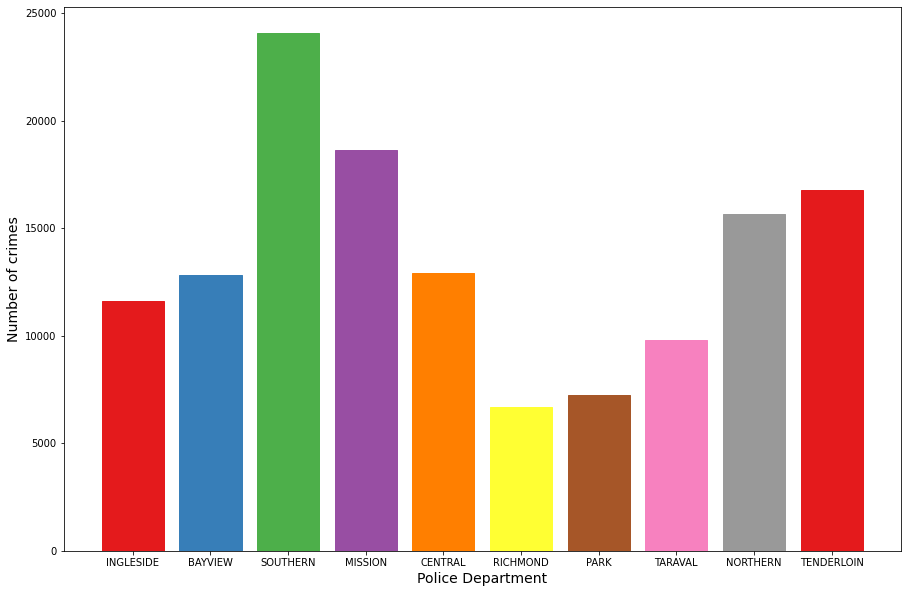

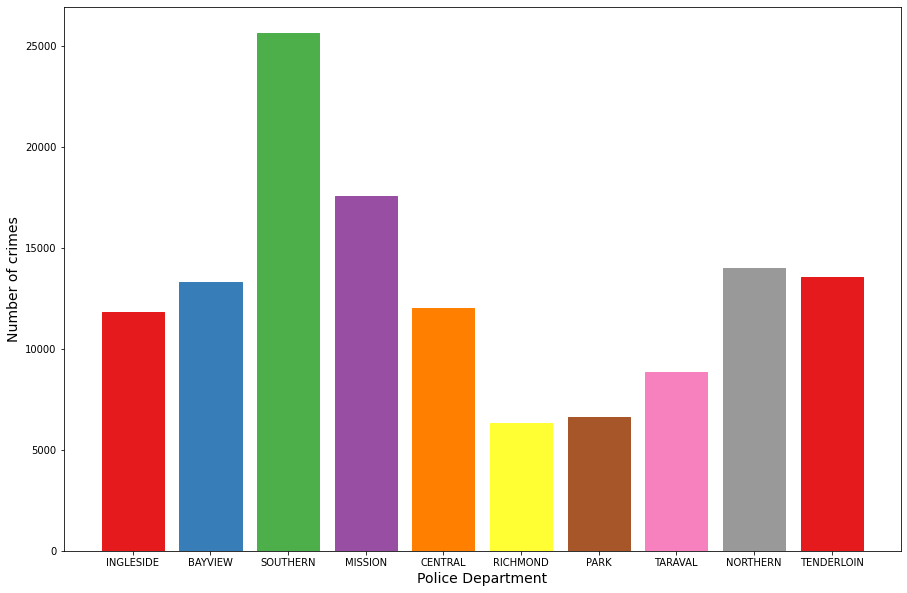

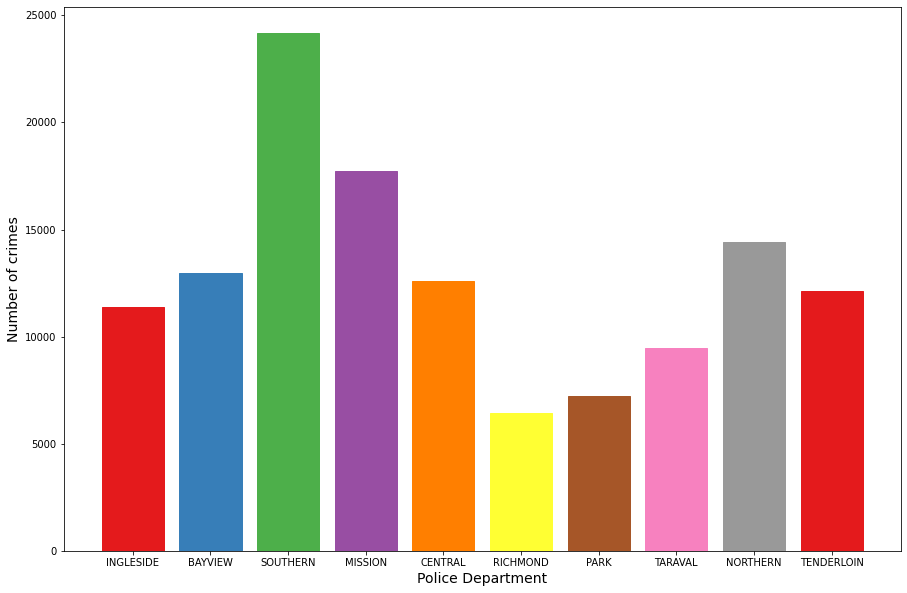

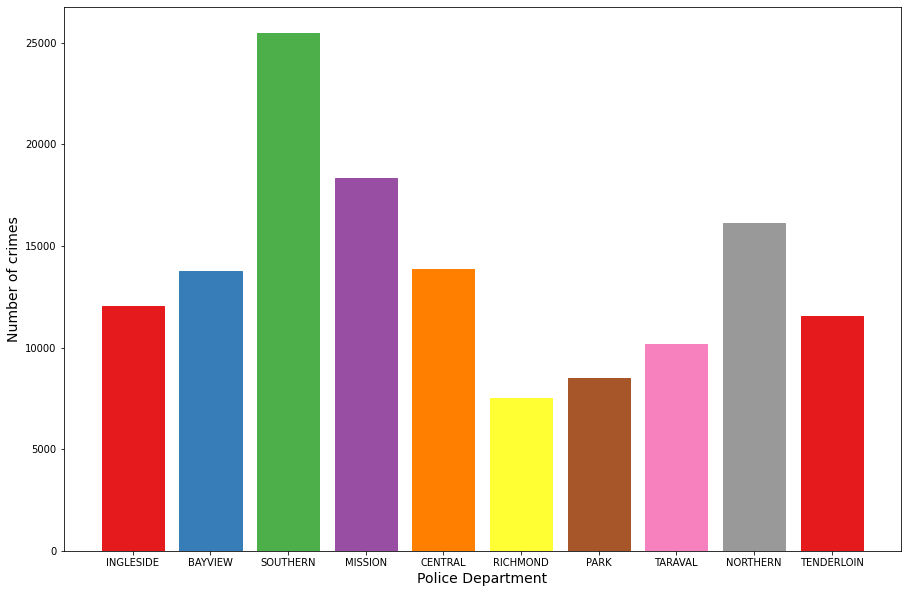

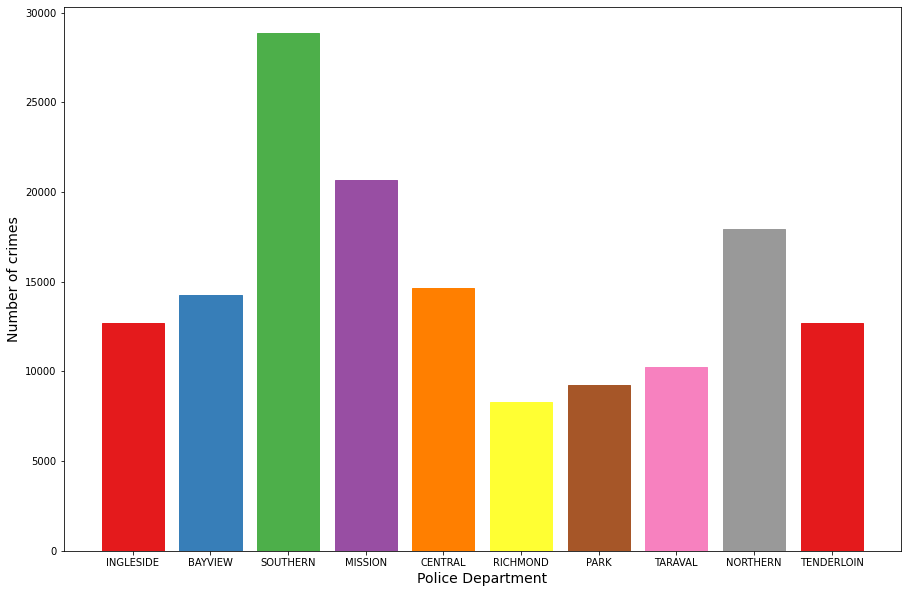

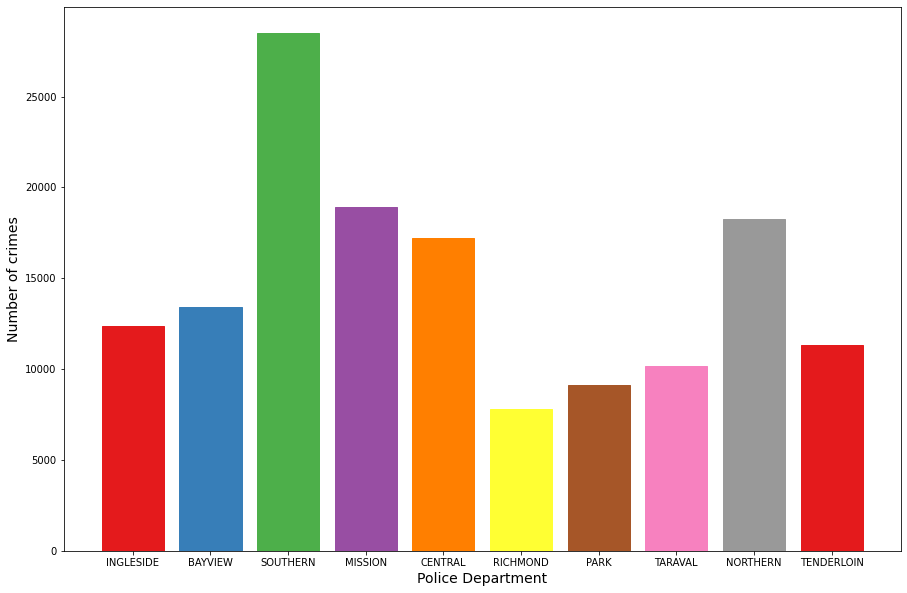

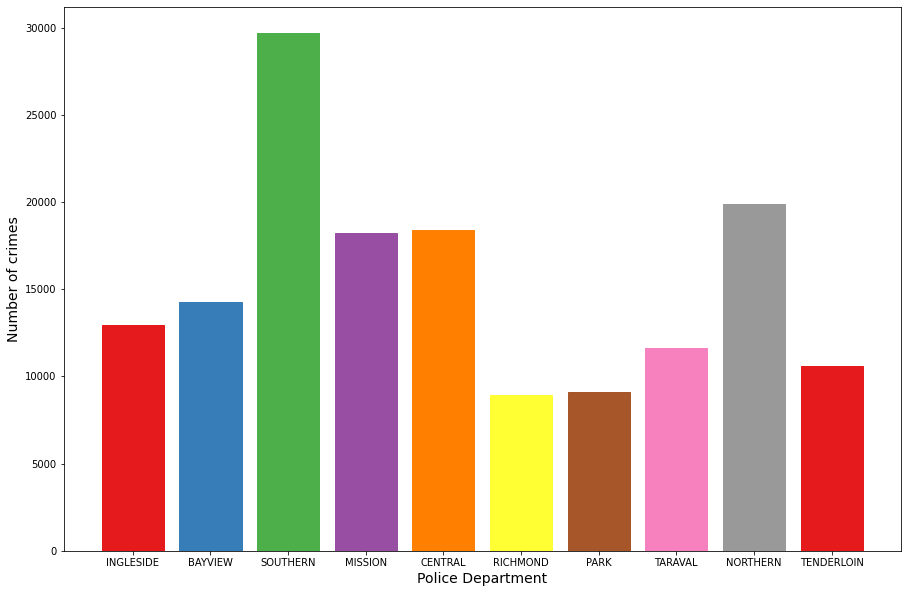

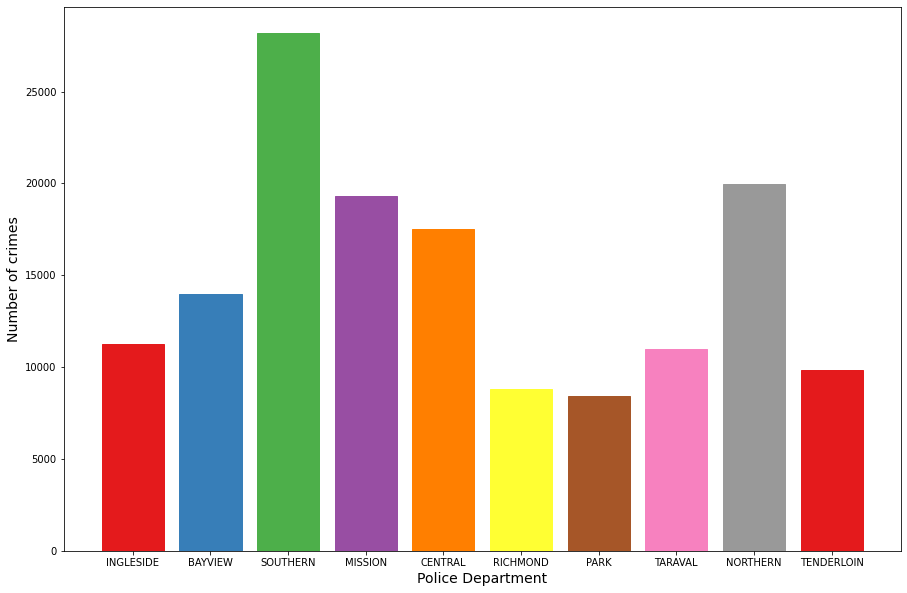

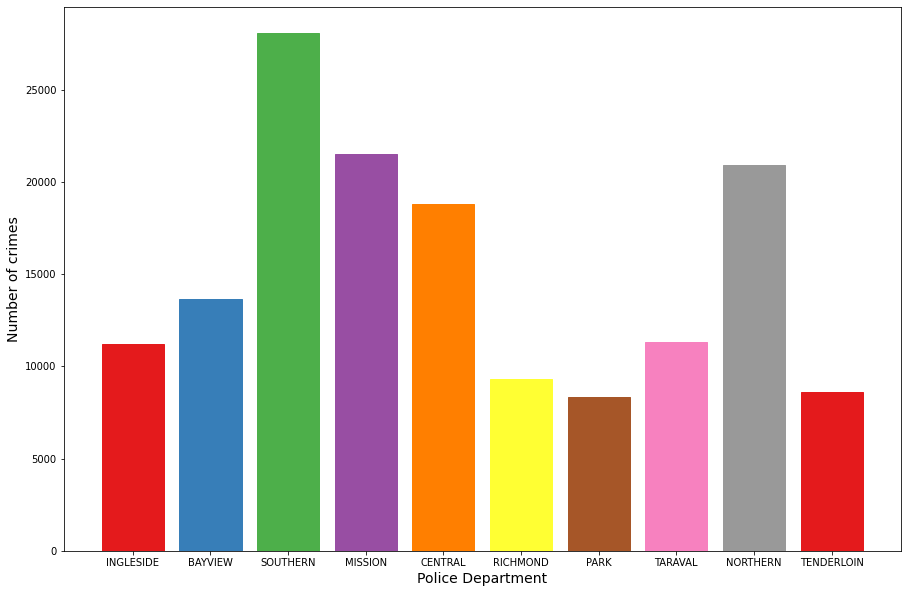

In [ ]:
# Plot per police district crime data
for y in range(2004,2018):
  plt.figure(figsize=(15,10))
  barplot = plt.bar(data_pd_year_groupby[data_pd_year_groupby.Year == y]["PdDistrict"], data_pd_year_groupby[data_pd_year_groupby.Year == y]["Count"])
  for i in range(10):
    cl = color[i%9]
    barplot[i].set_color(cl)
  plt.xlabel("Police Department", {"size":"14"})
  plt.ylabel("Number of crimes", {"size":"14"})
#   plt.title("Number_of_crimes_in_each_police_department_in_%i" %y)
  plt.savefig(PATH_IMAGE+"/Number_of_crimes_in_each_police_department_in_%i.png" %y)
plt.show()

In [ ]:
# Data groupby year, month to get number of crimes per day
data_pd_year_month_groupby = dataset_df.groupby(["Year","Month","PdDID","PdDistrict"]).size().reset_index()
data_pd_year_month_groupby.columns = ["Year","Month","PdDID","PdDistrict","Count"]
data_pd_year_month_groupby

Year  Month  PdDID  PdDistrict  Count
0     2004      1      0   INGLESIDE   1182
1     2004      1      1     BAYVIEW   1362
2     2004      1      2    SOUTHERN   1933
3     2004      1      3     MISSION   1868
4     2004      1      4     CENTRAL   1199
...    ...    ...    ...         ...    ...
1675  2017     12      5    RICHMOND    748
1676  2017     12      6        PARK    607
1677  2017     12      7     TARAVAL    910
1678  2017     12      8    NORTHERN   1752
1679  2017     12      9  TENDERLOIN    718

[1680 rows x 5 columns]

In [ ]:
data_pd_year_month_groupby.Count.min()

429

In [ ]:
data_pd_year_month_groupby.Count.max()

2880

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

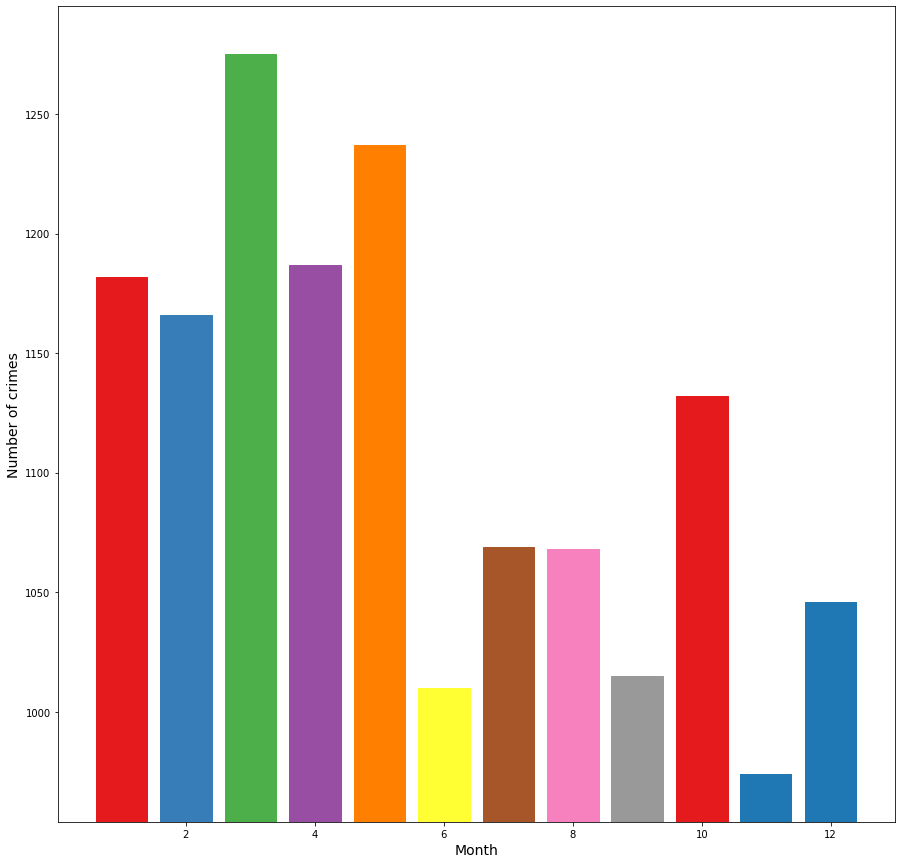

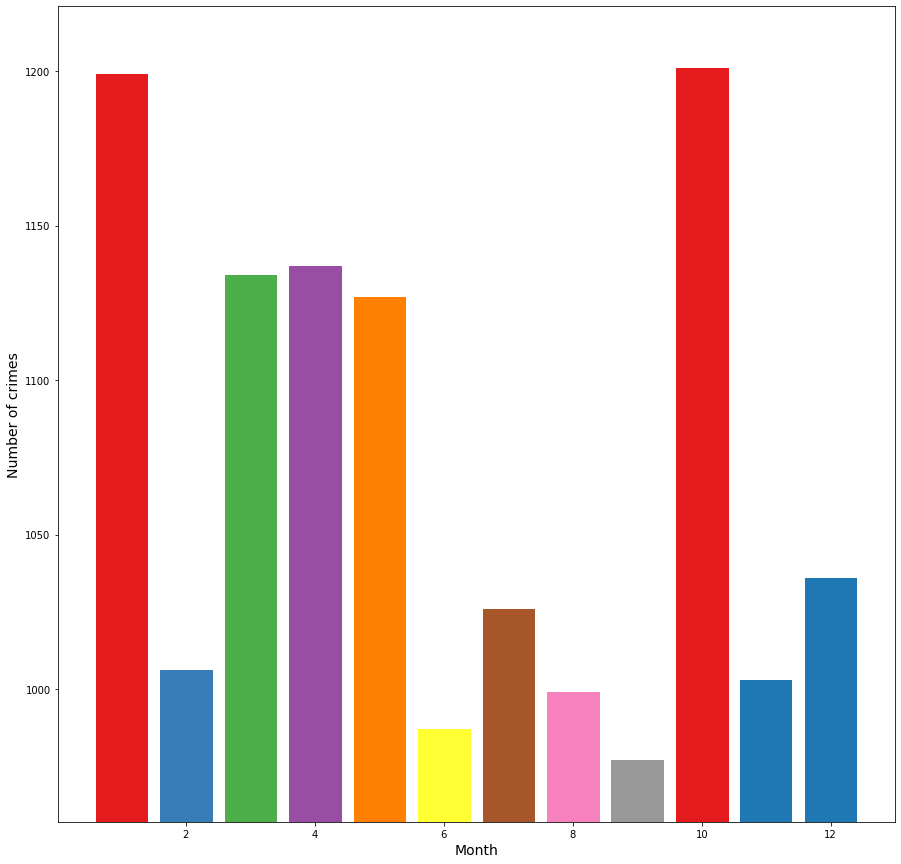

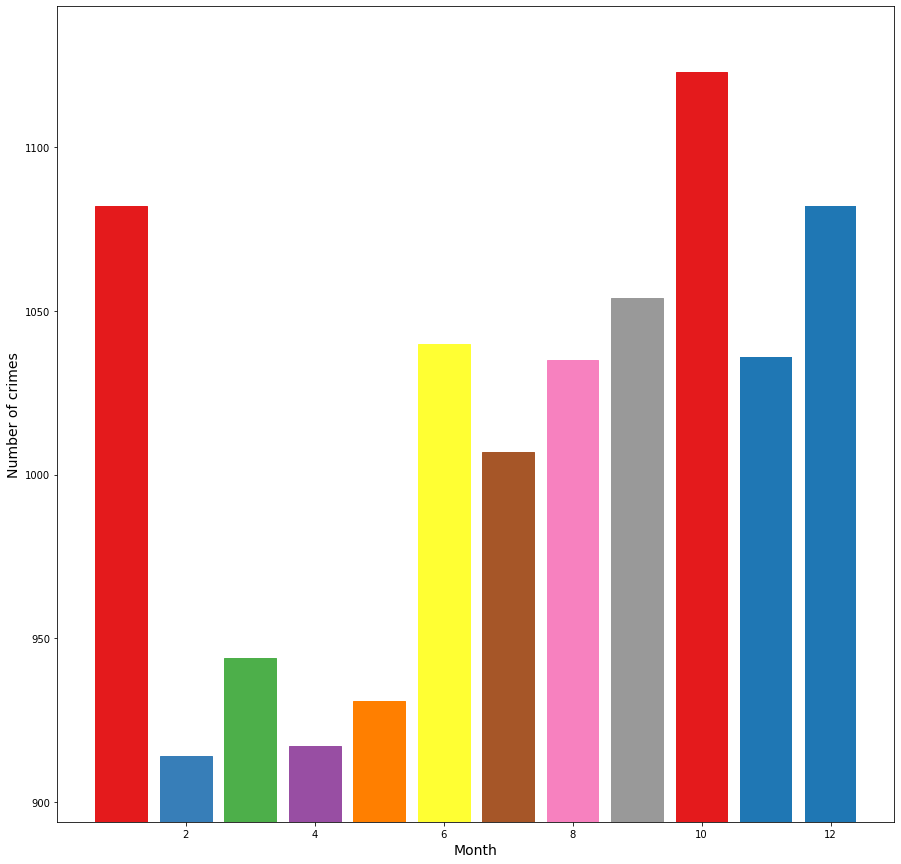

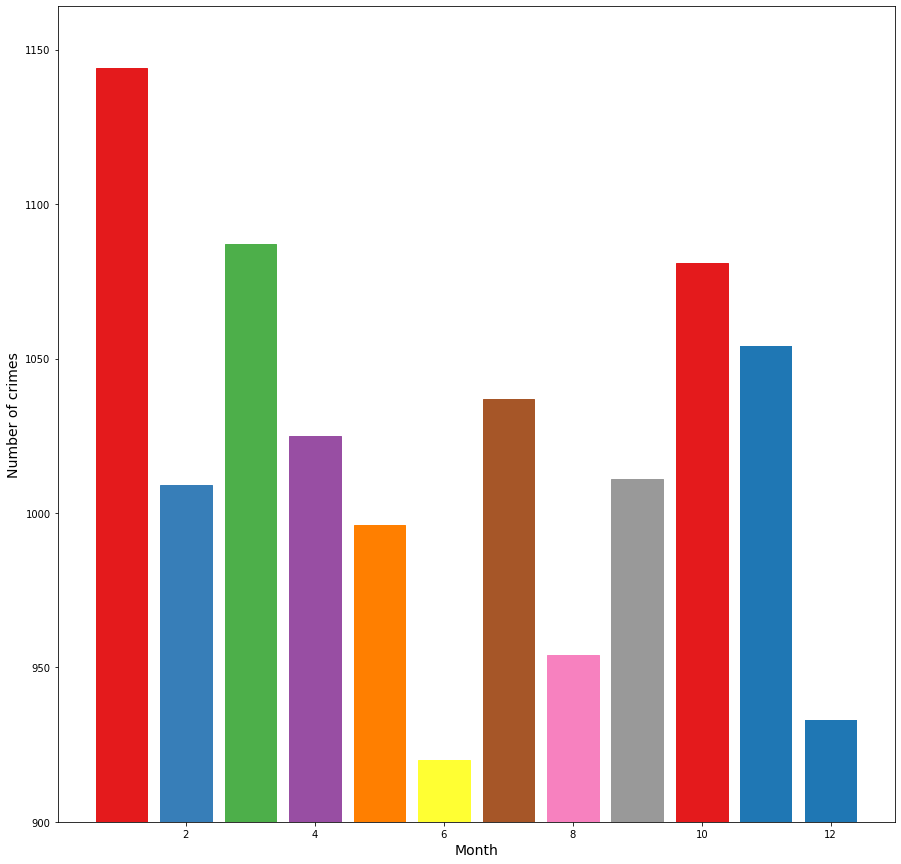

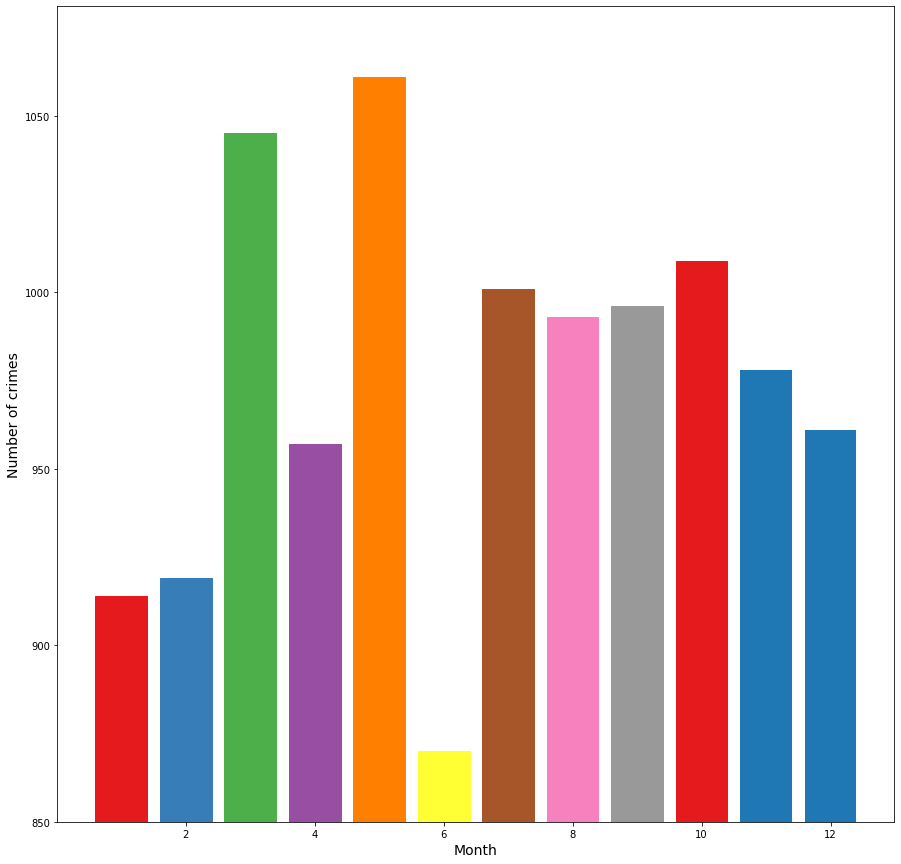

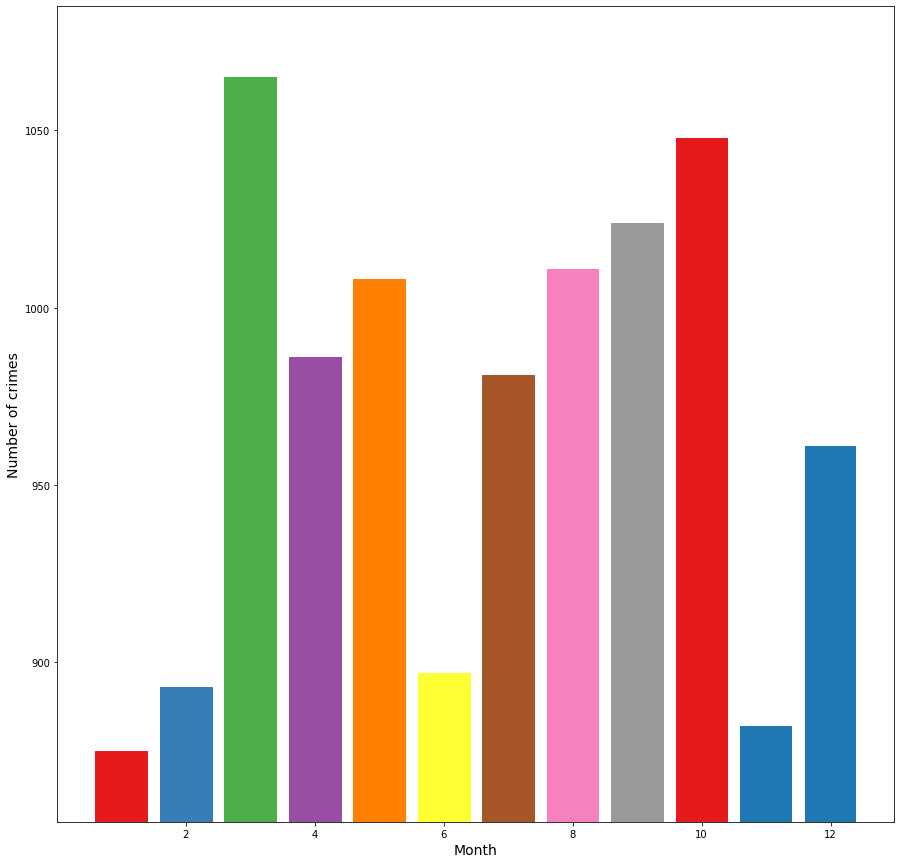

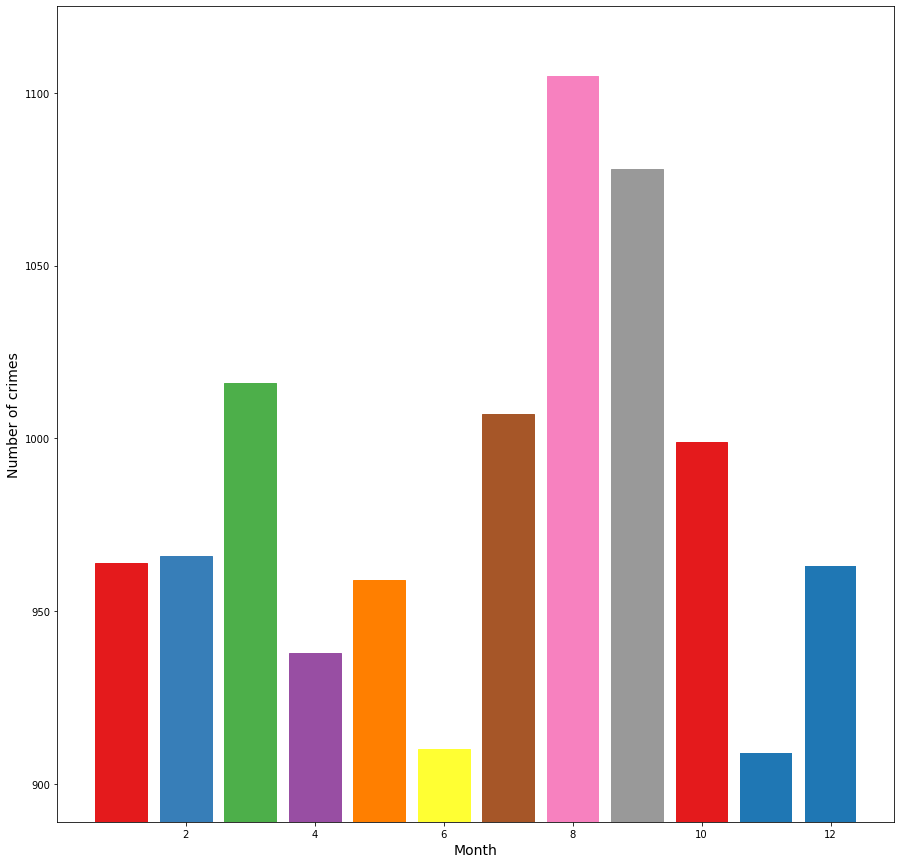

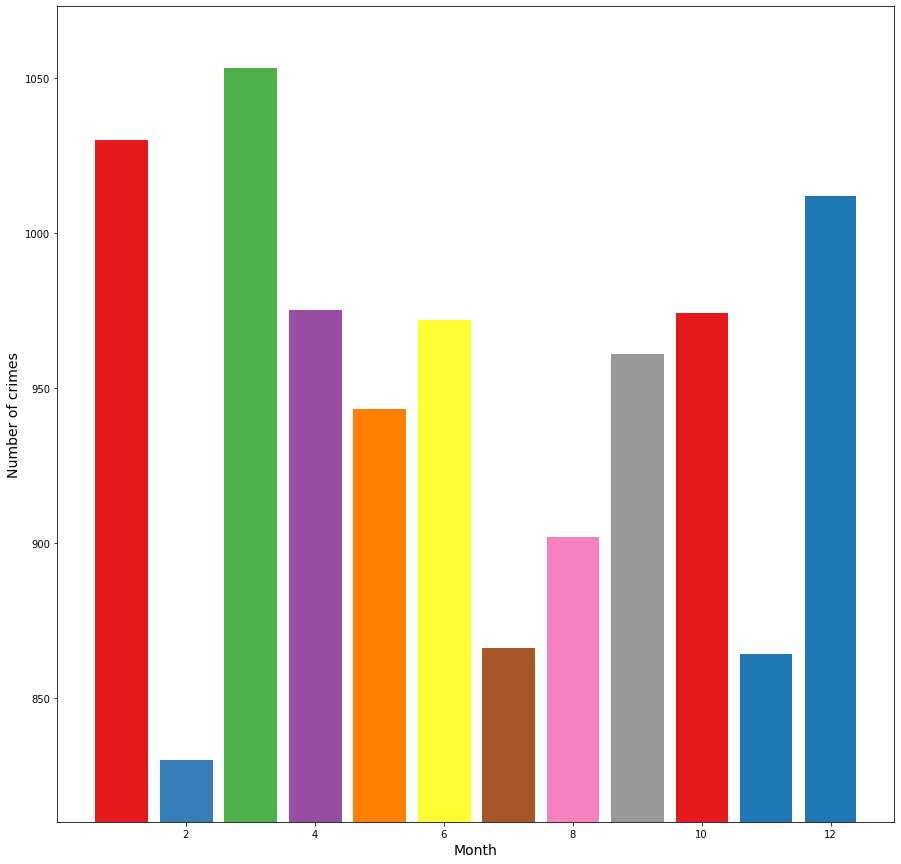

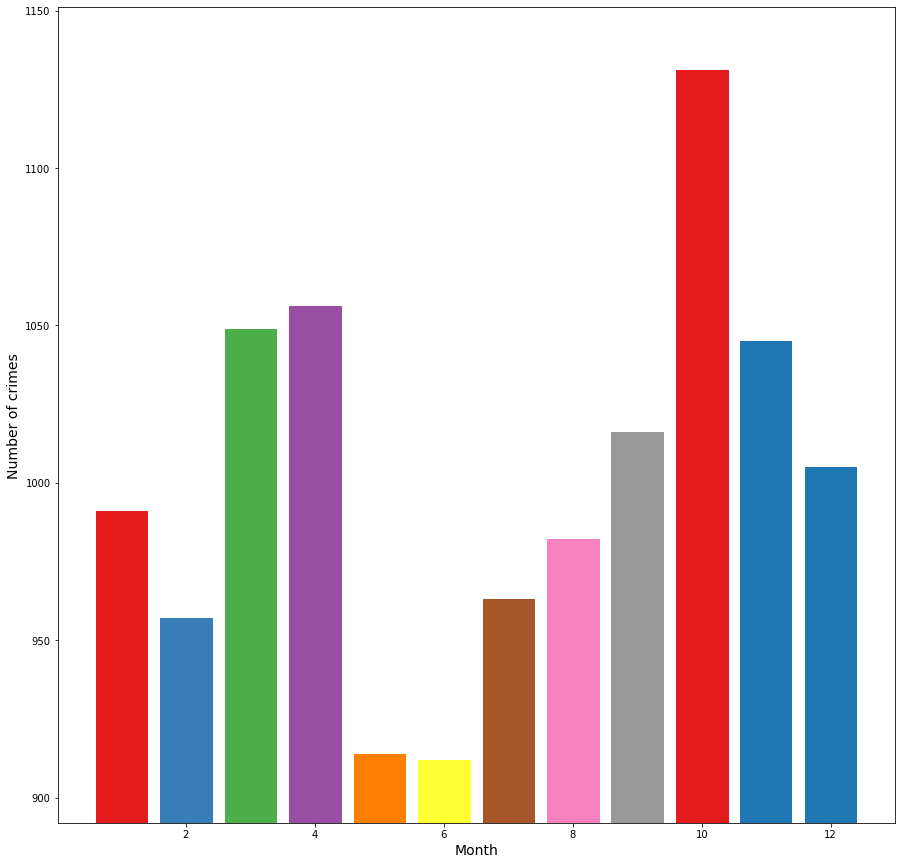

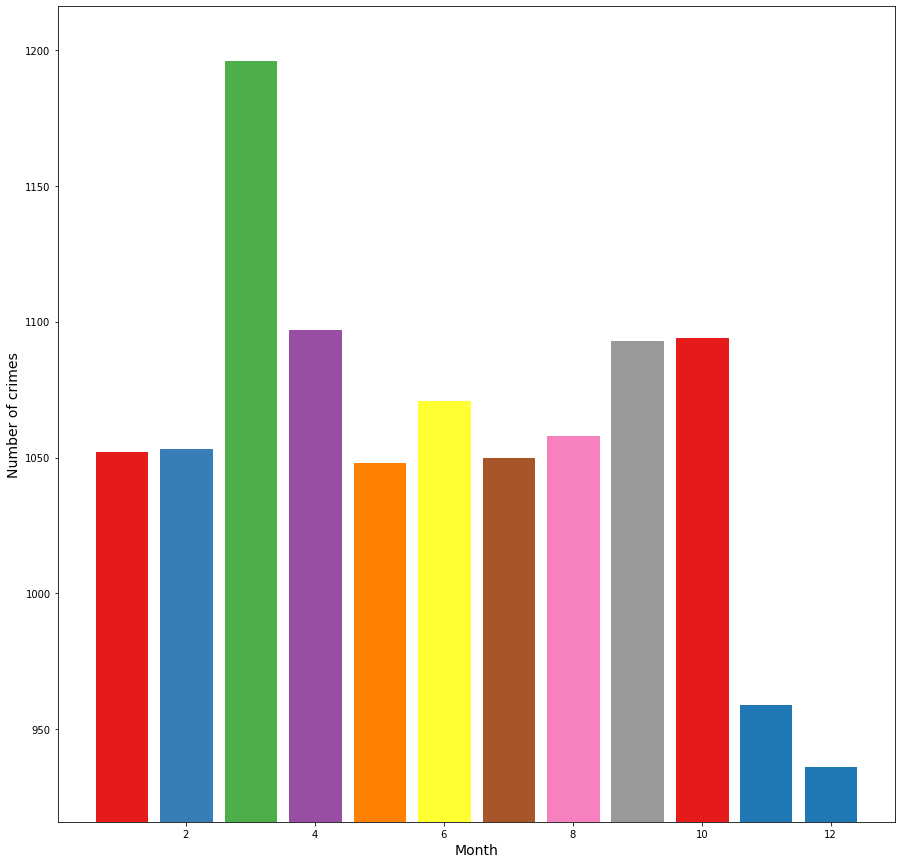

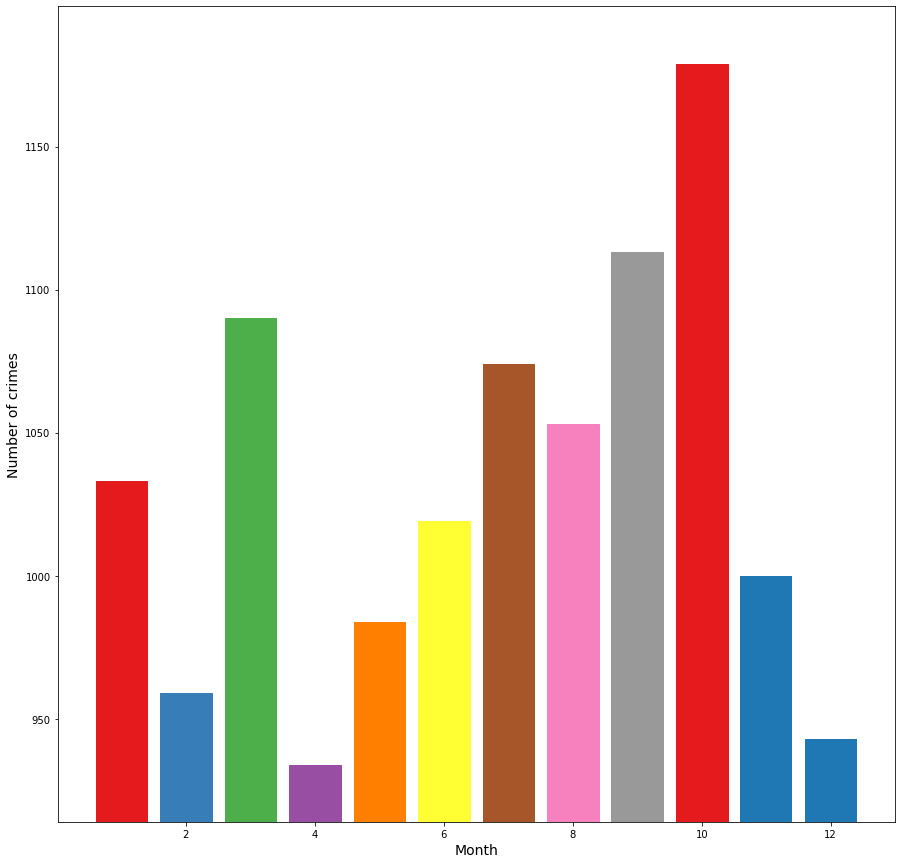

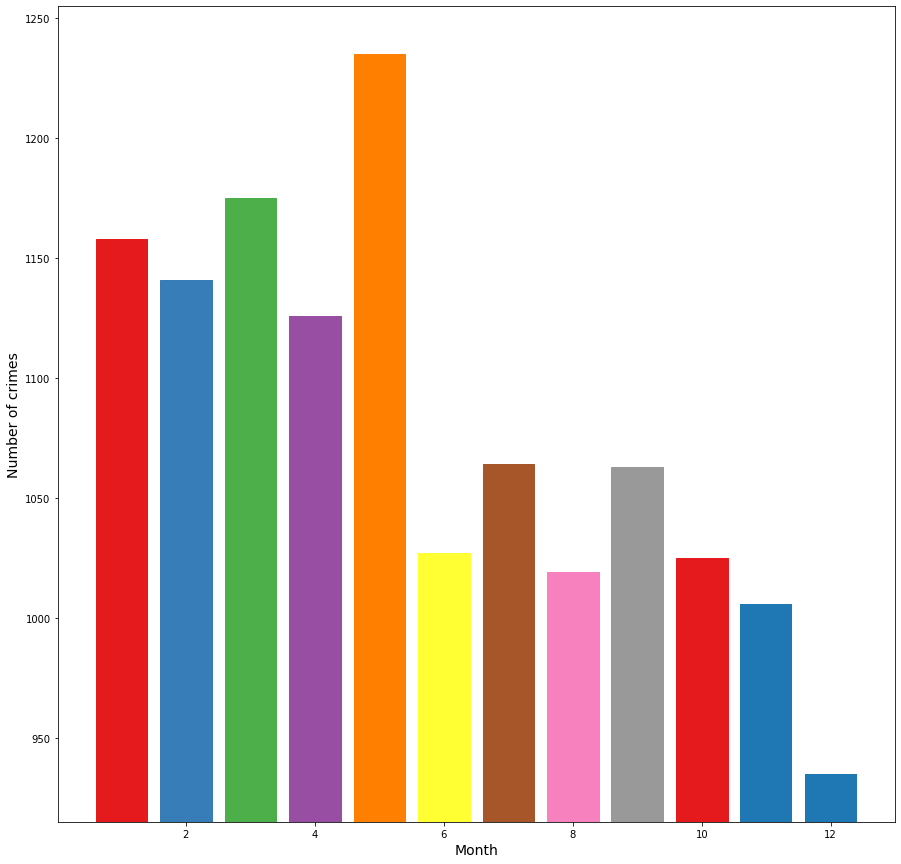

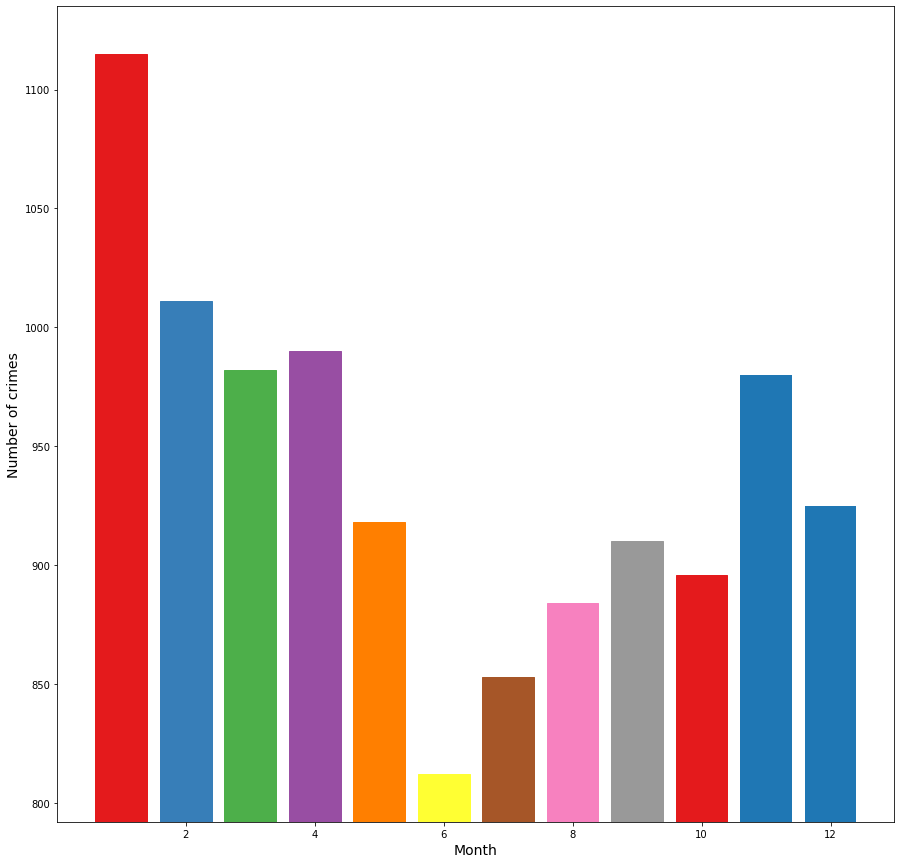

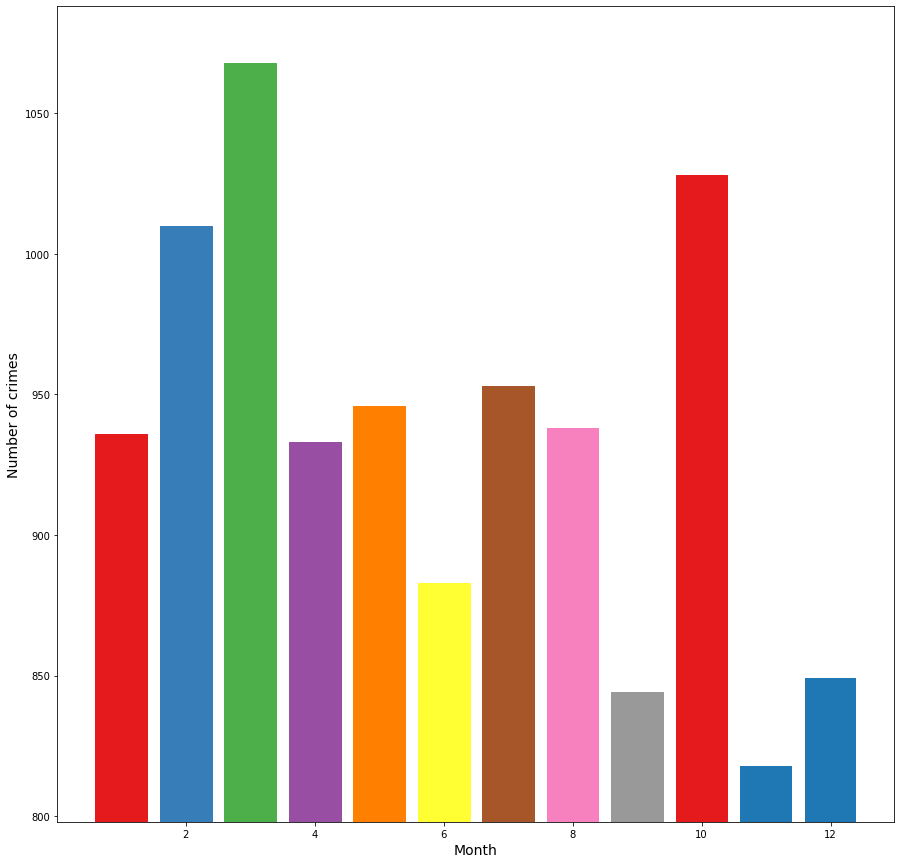

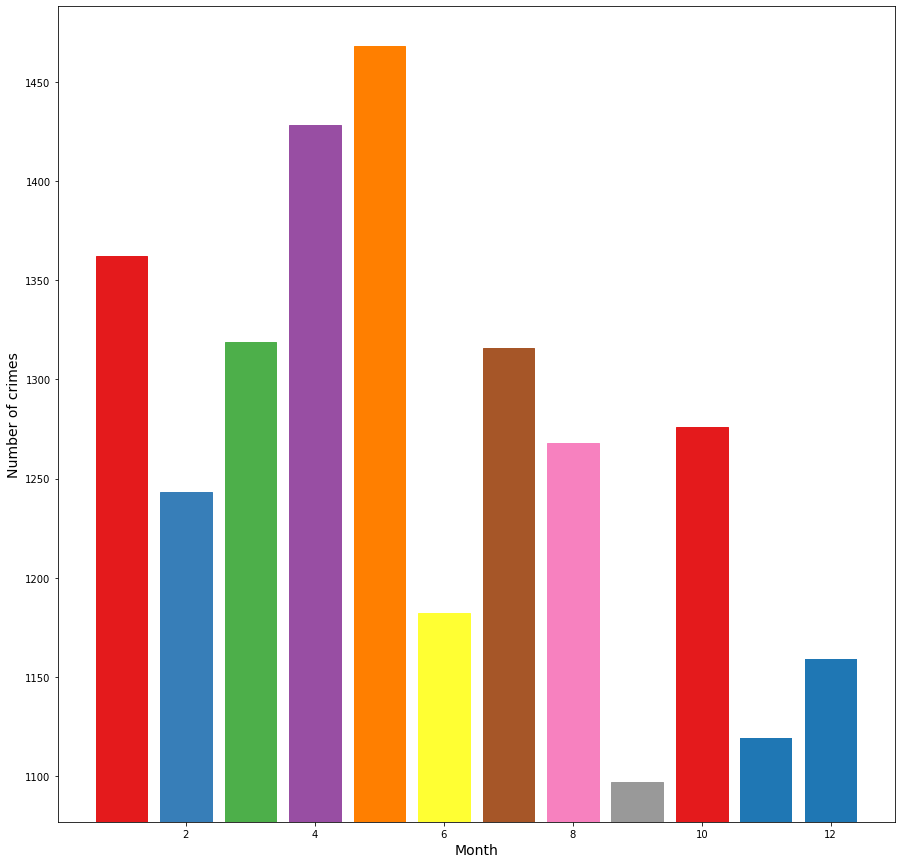

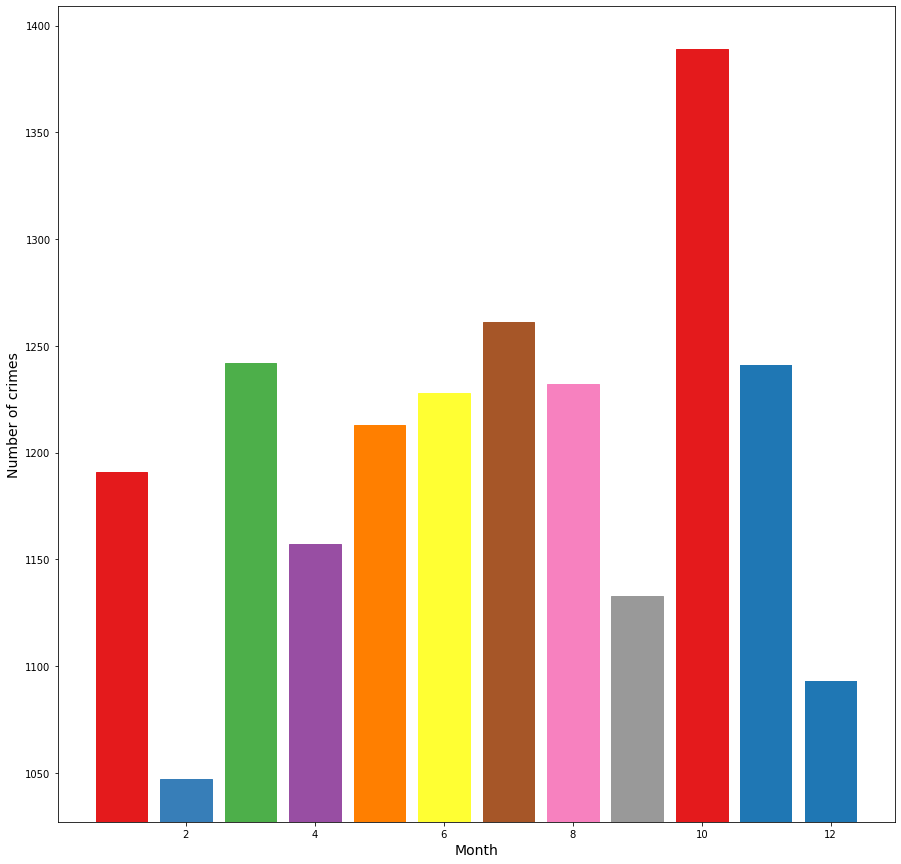

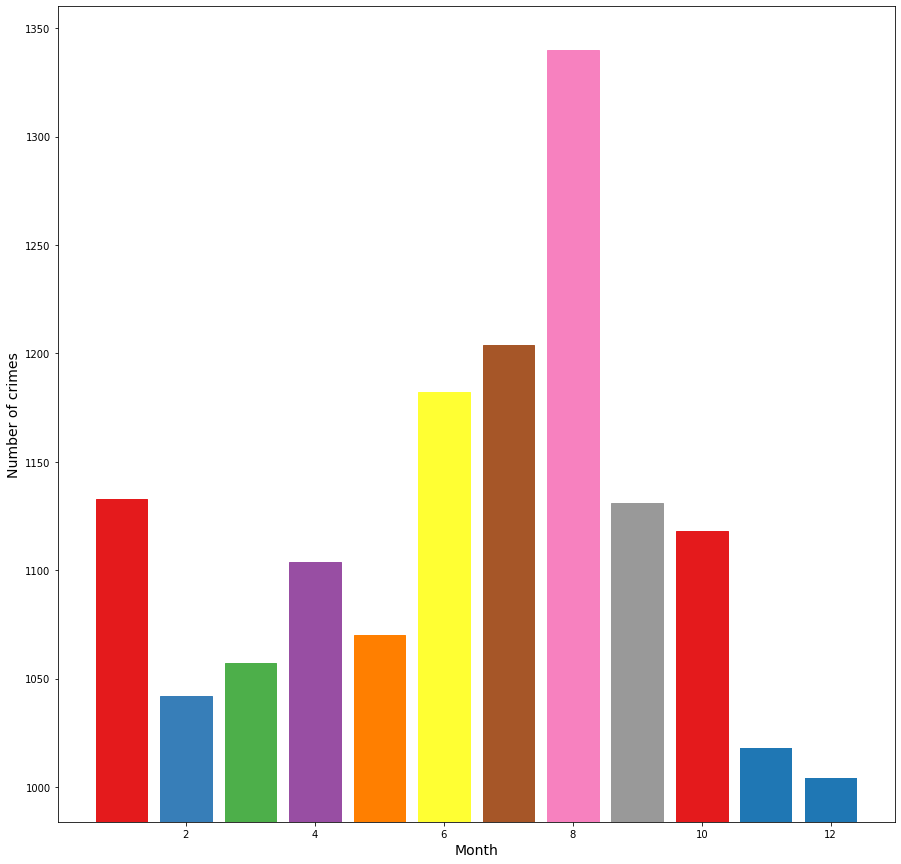

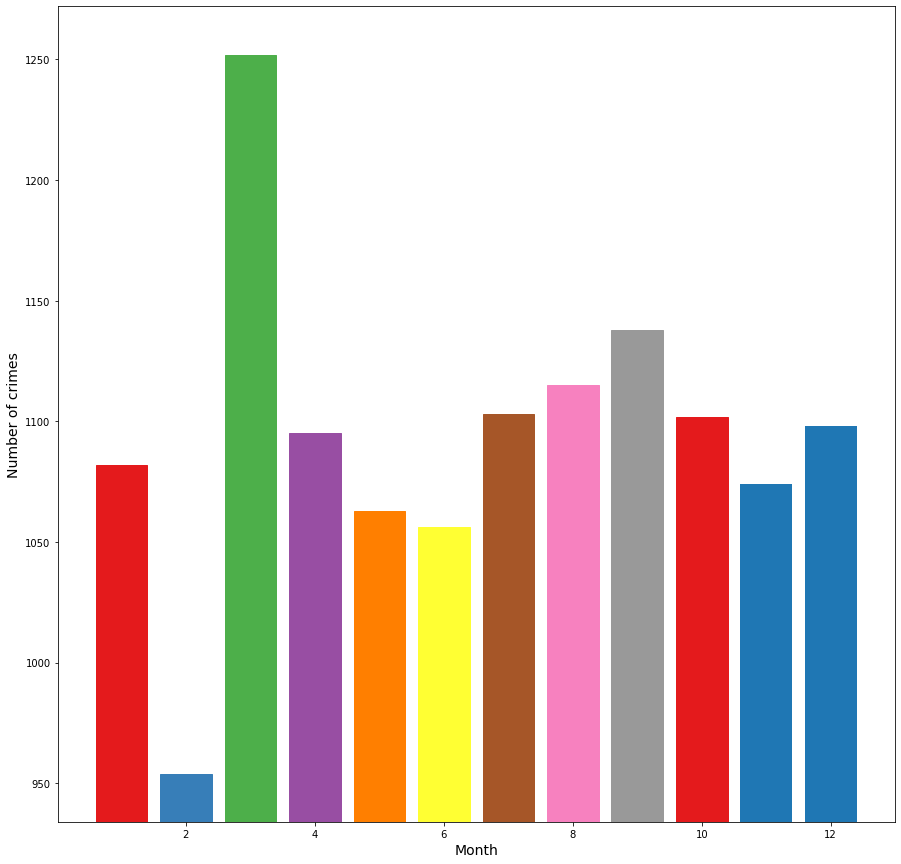

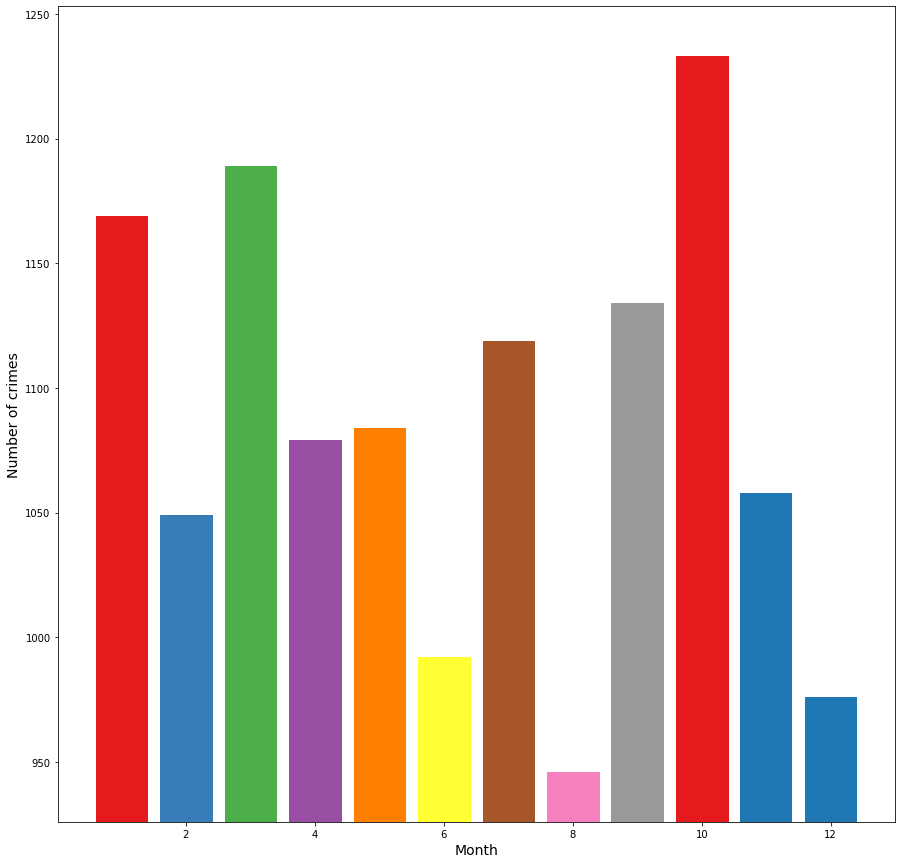

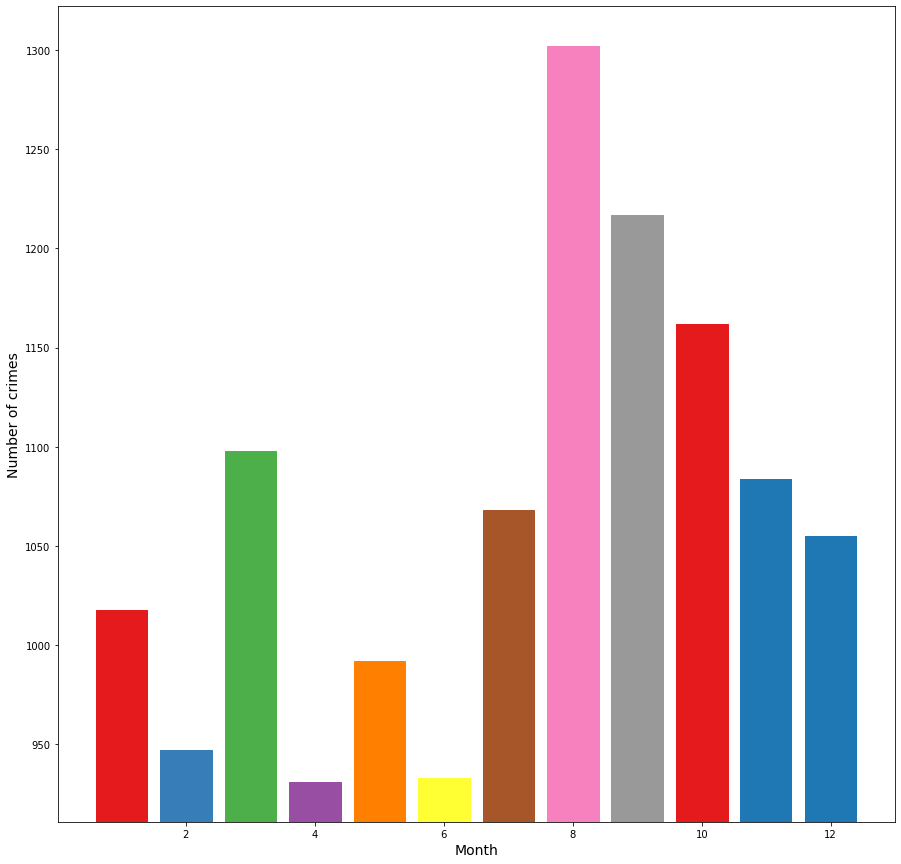

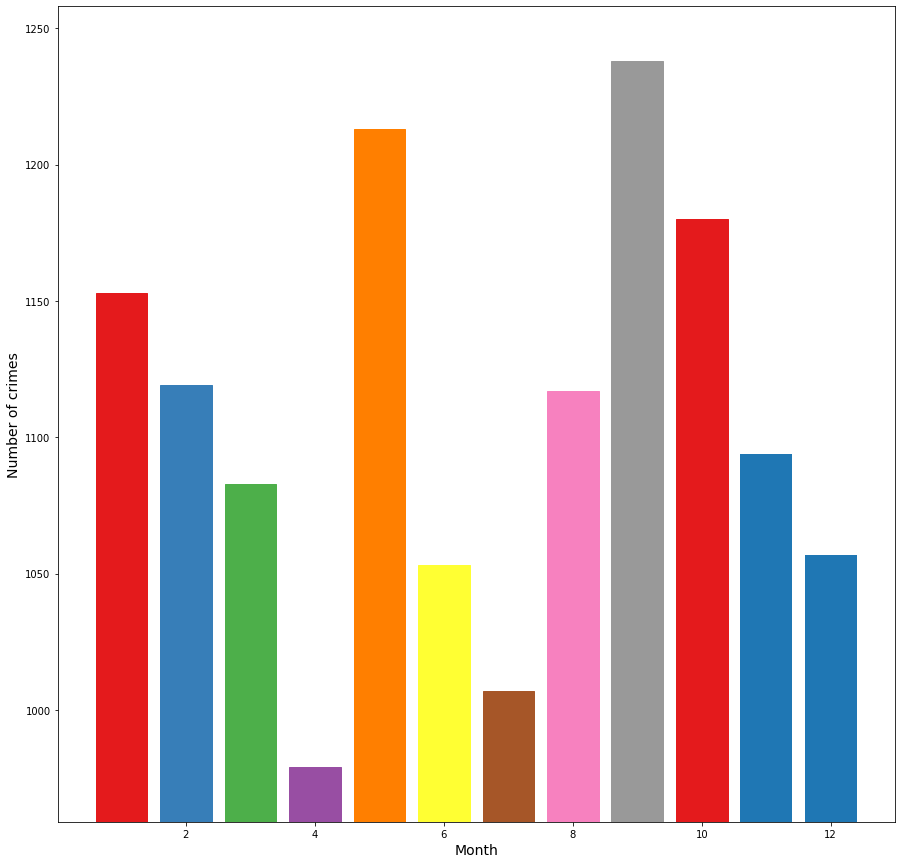

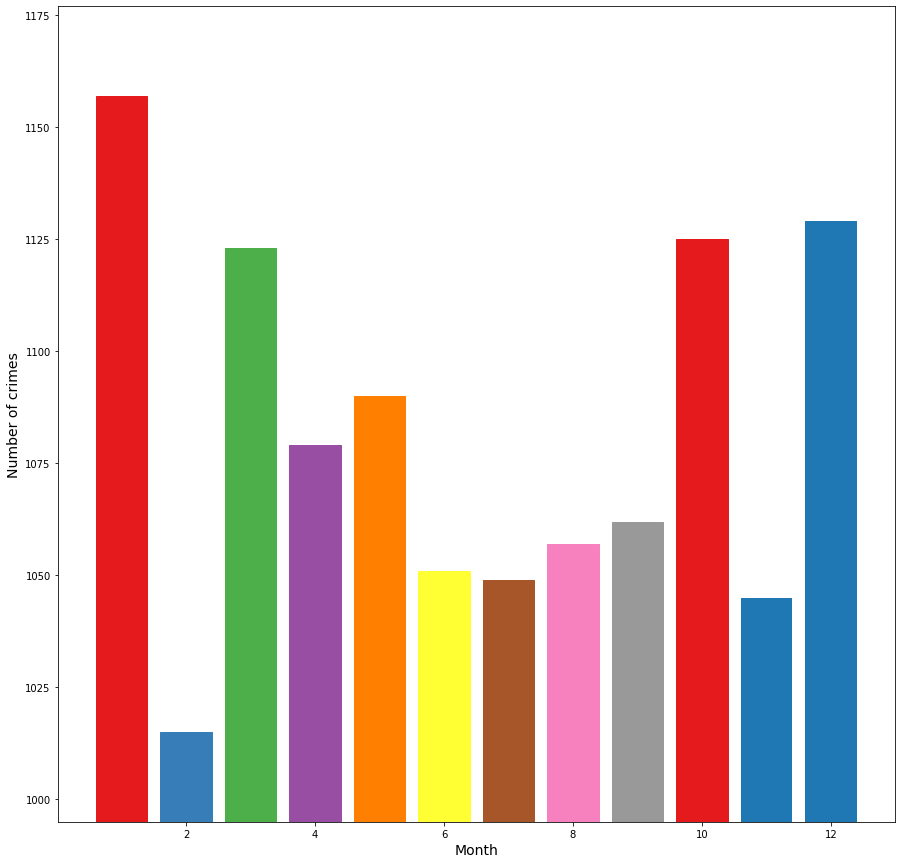

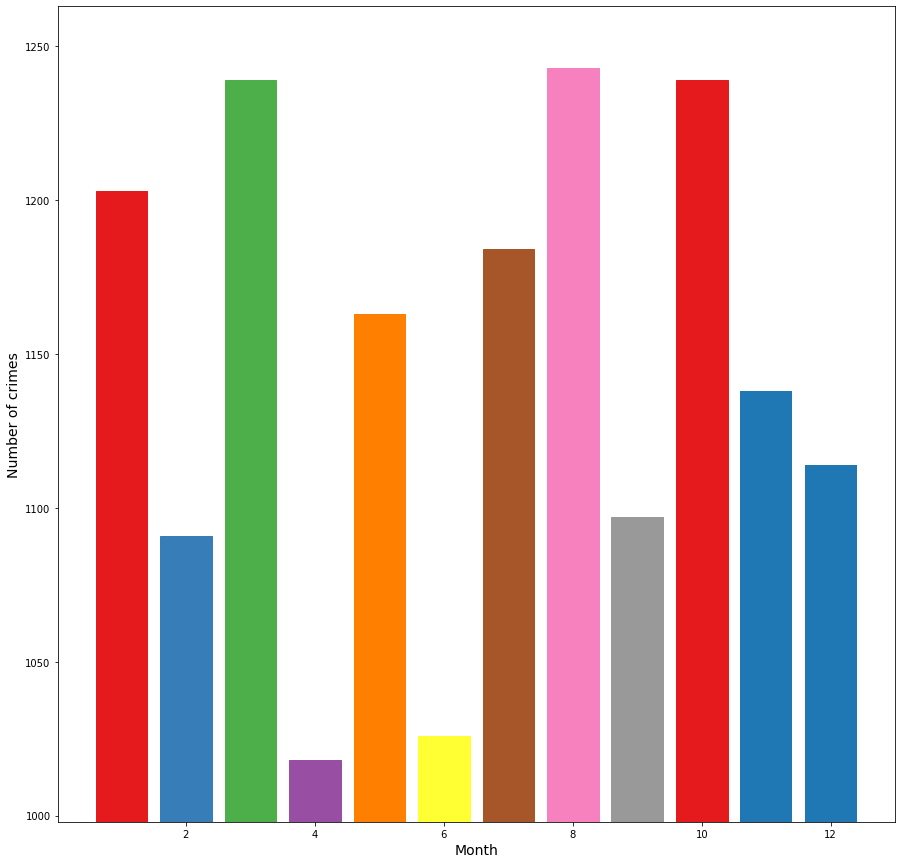

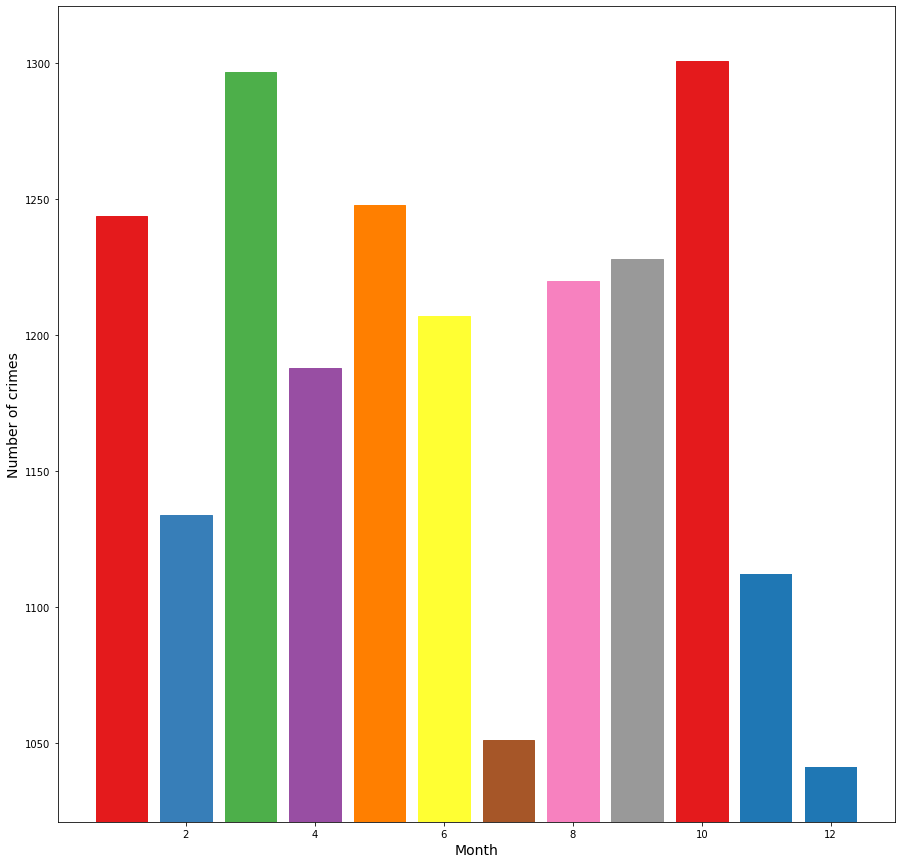

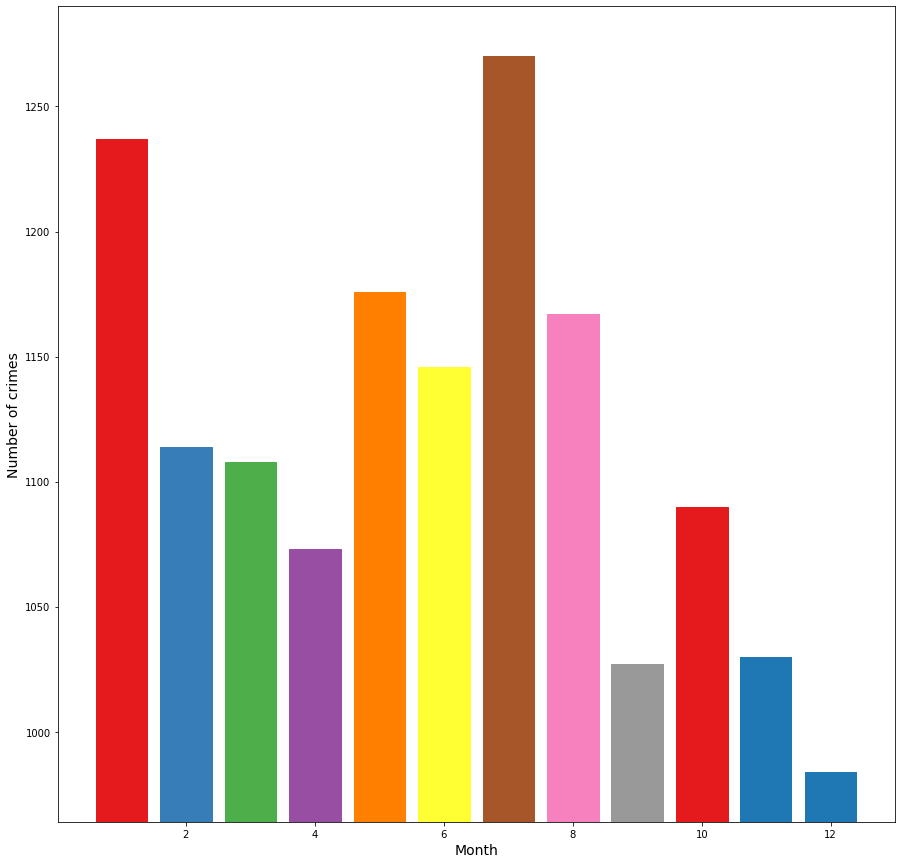

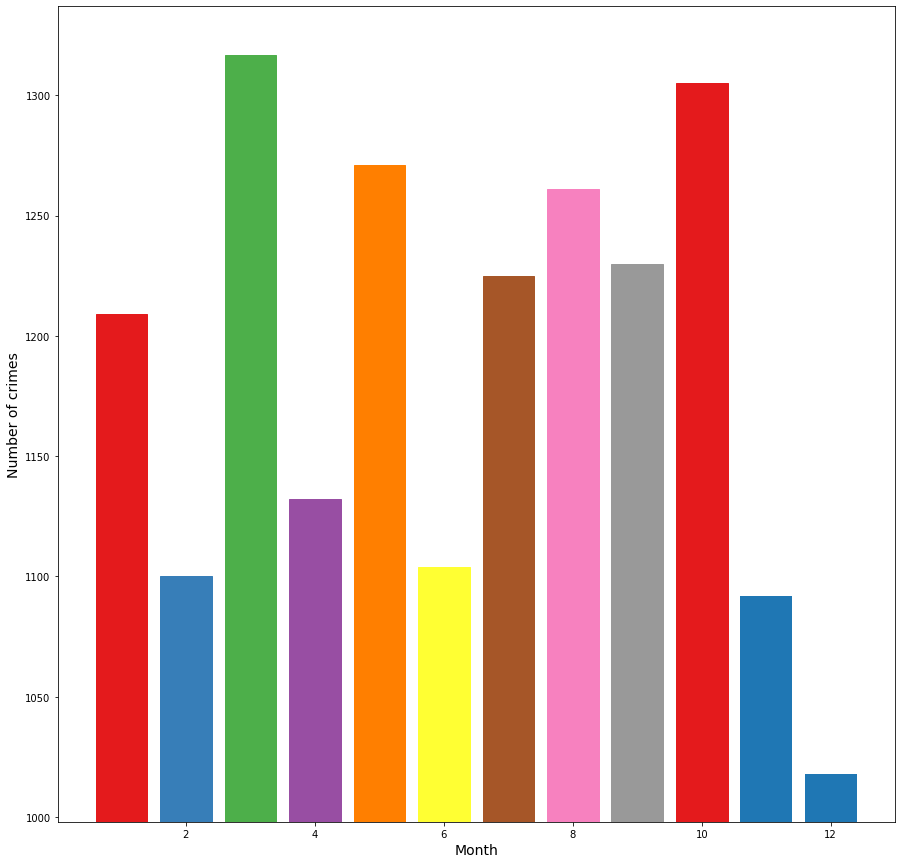

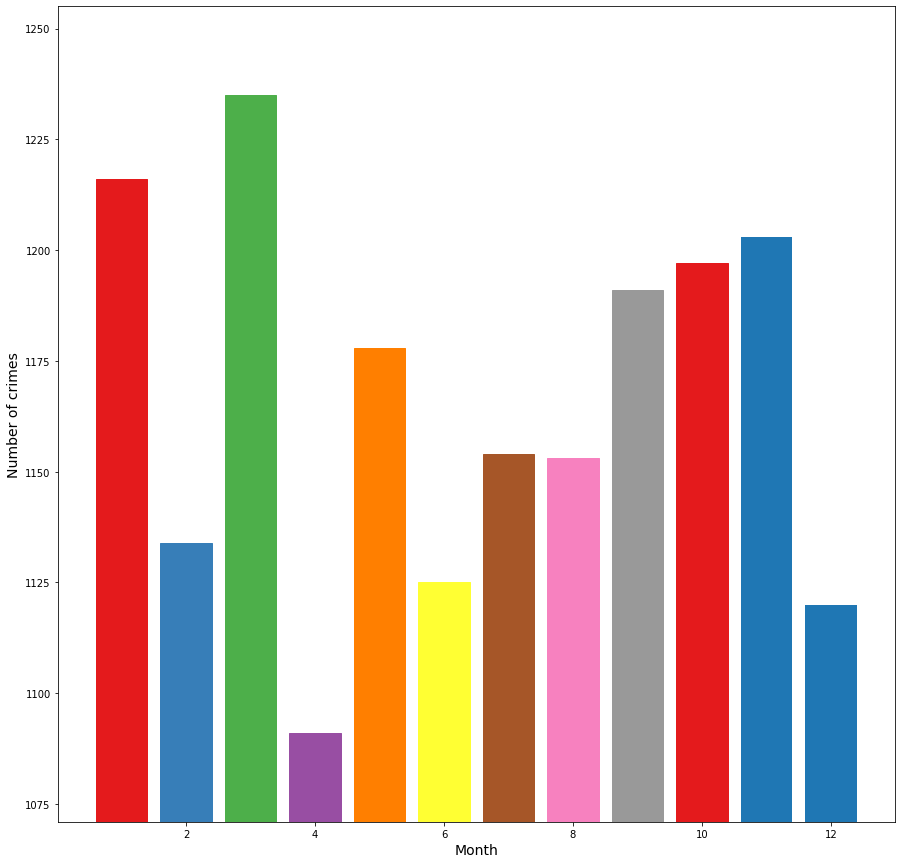

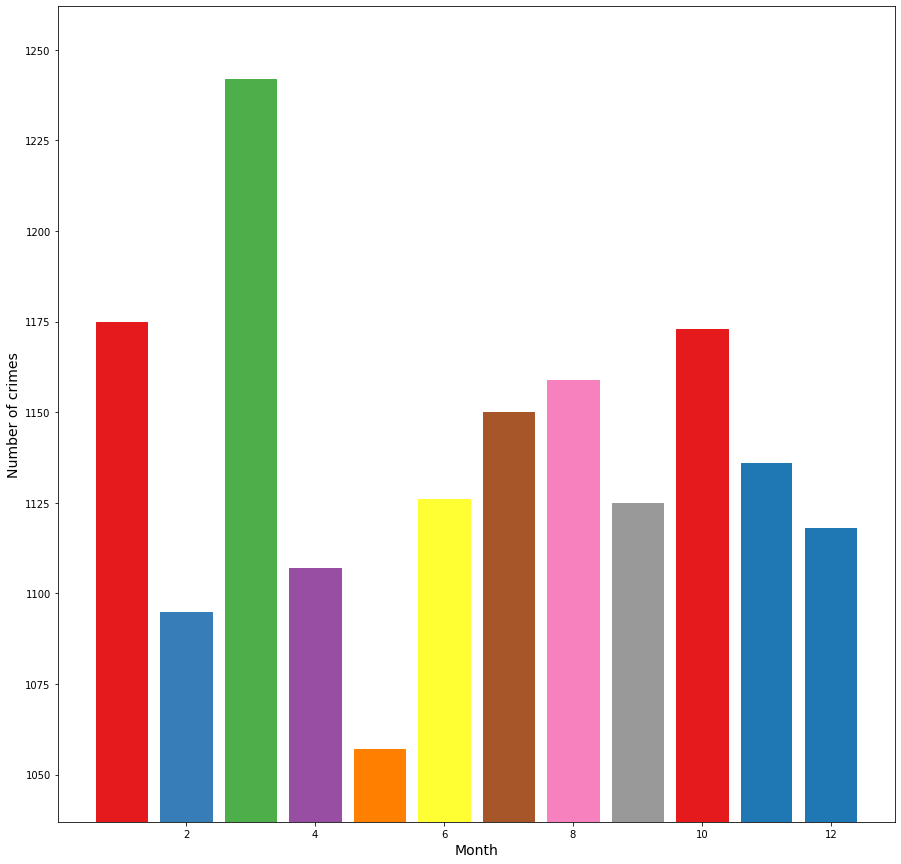

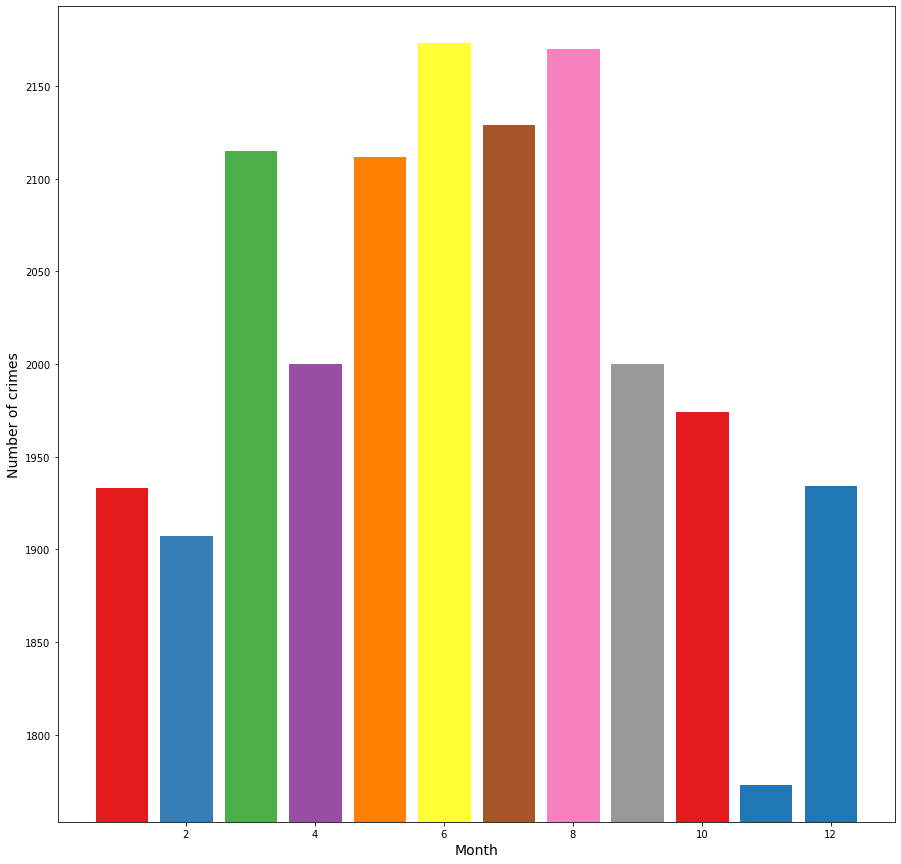

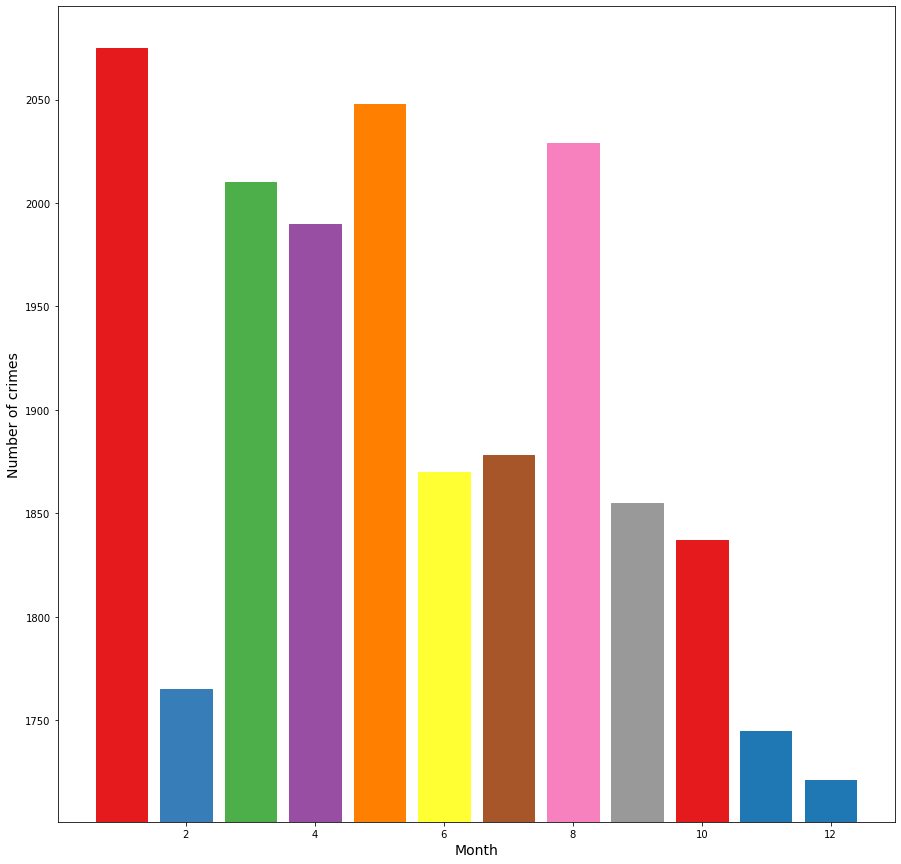

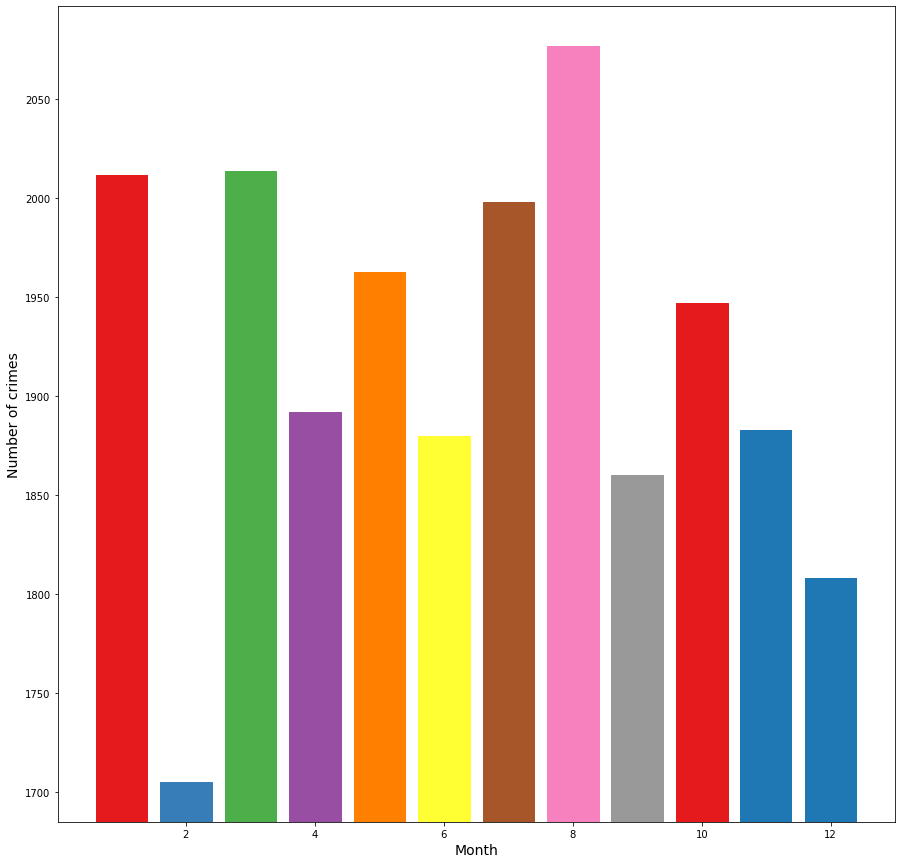

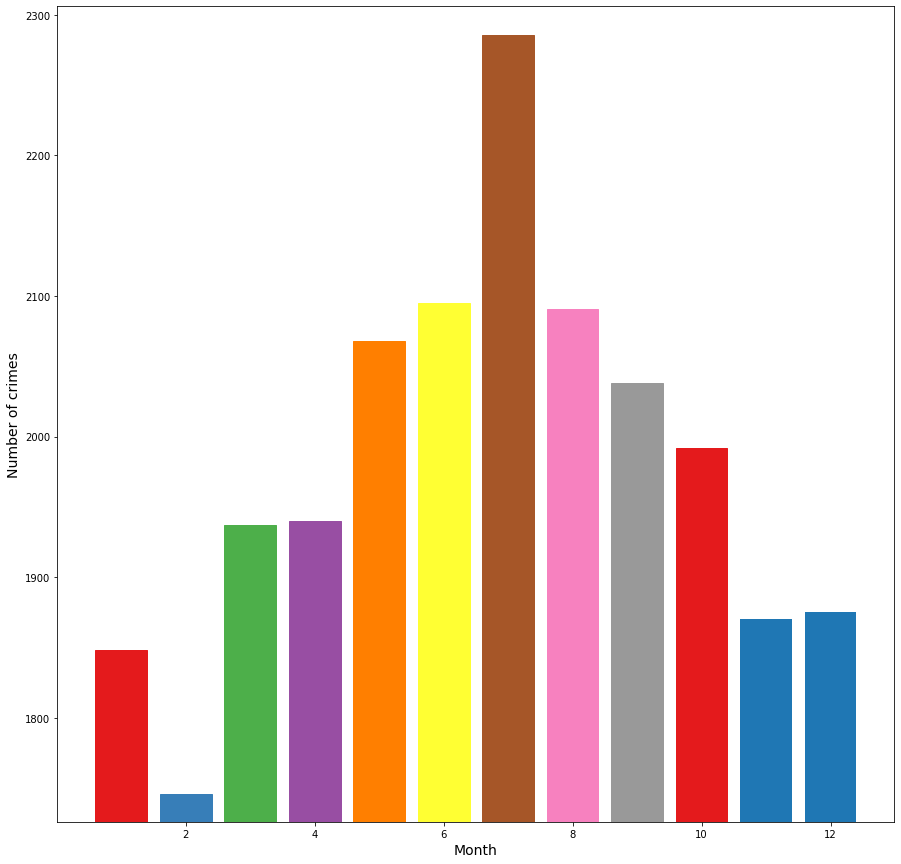

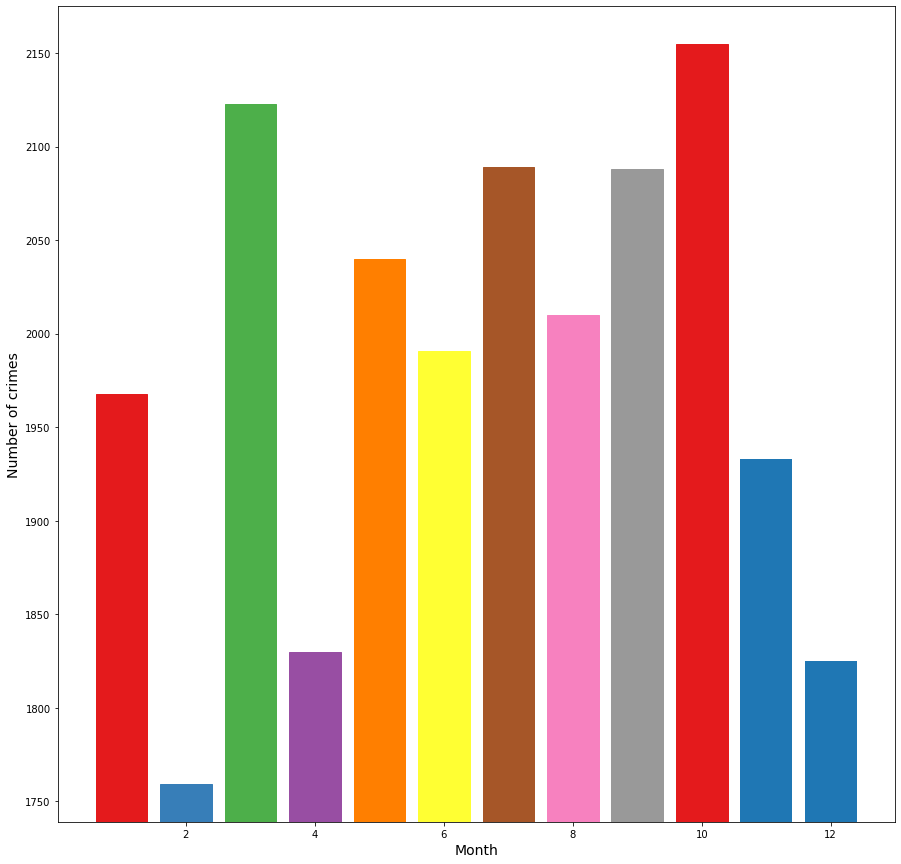

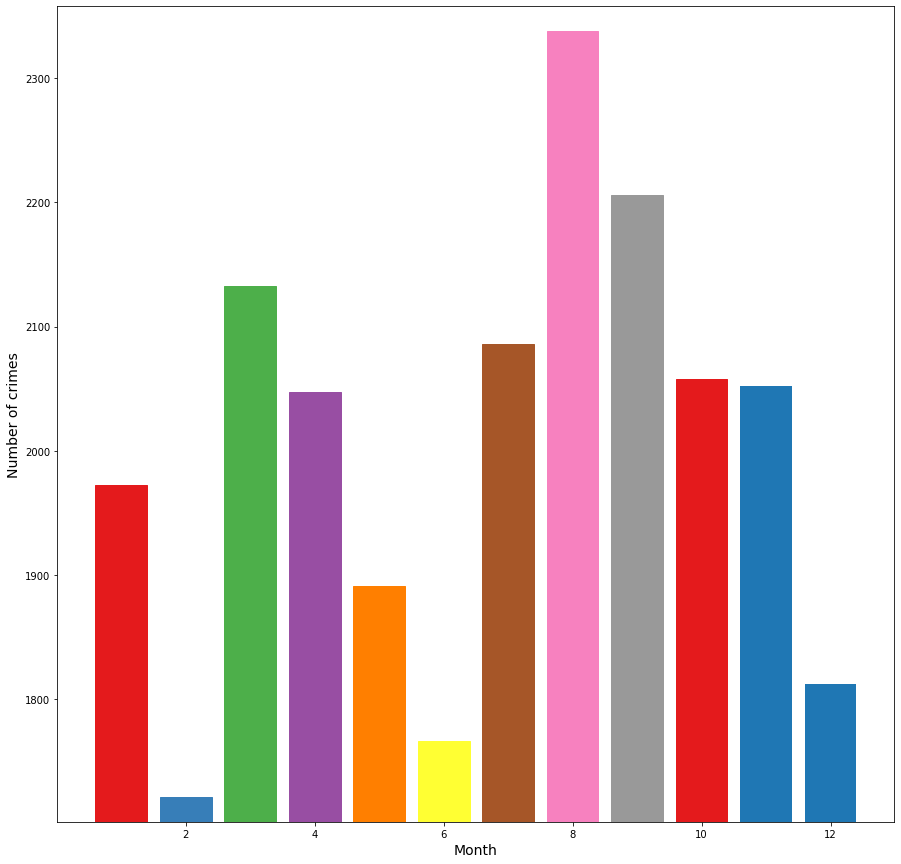

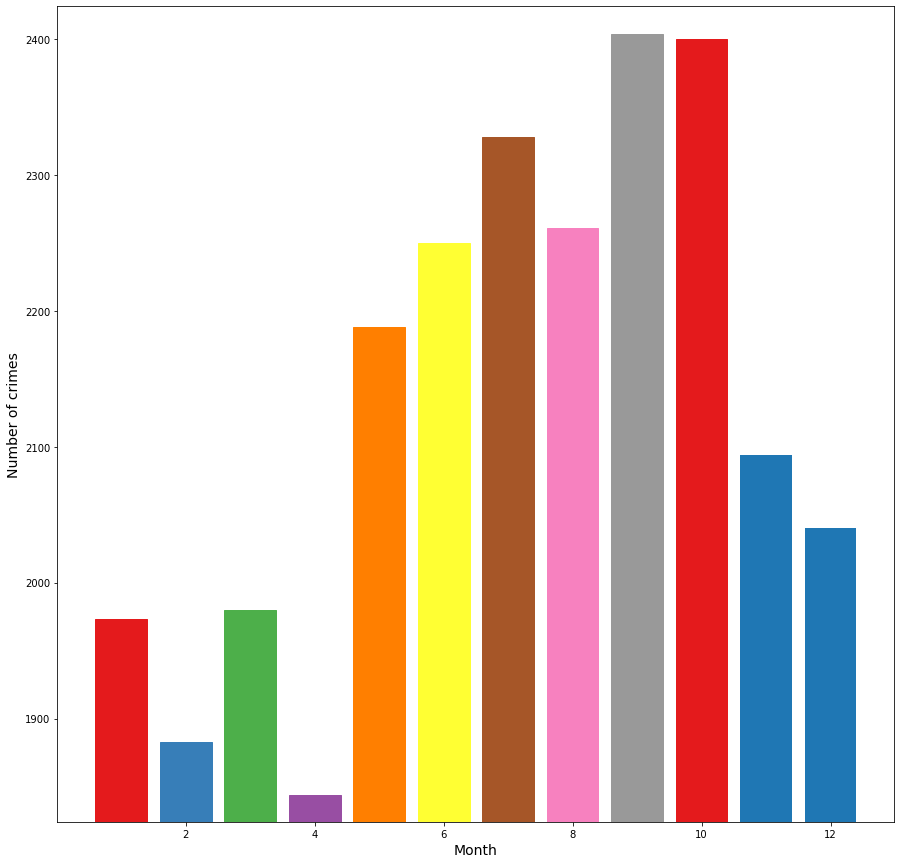

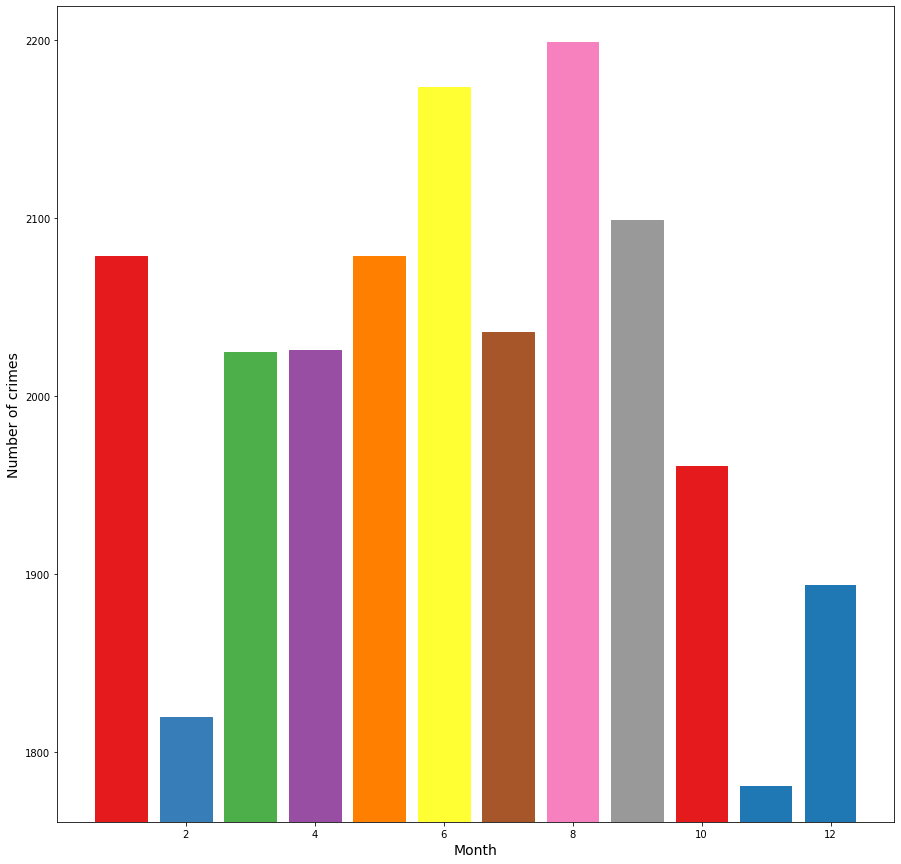

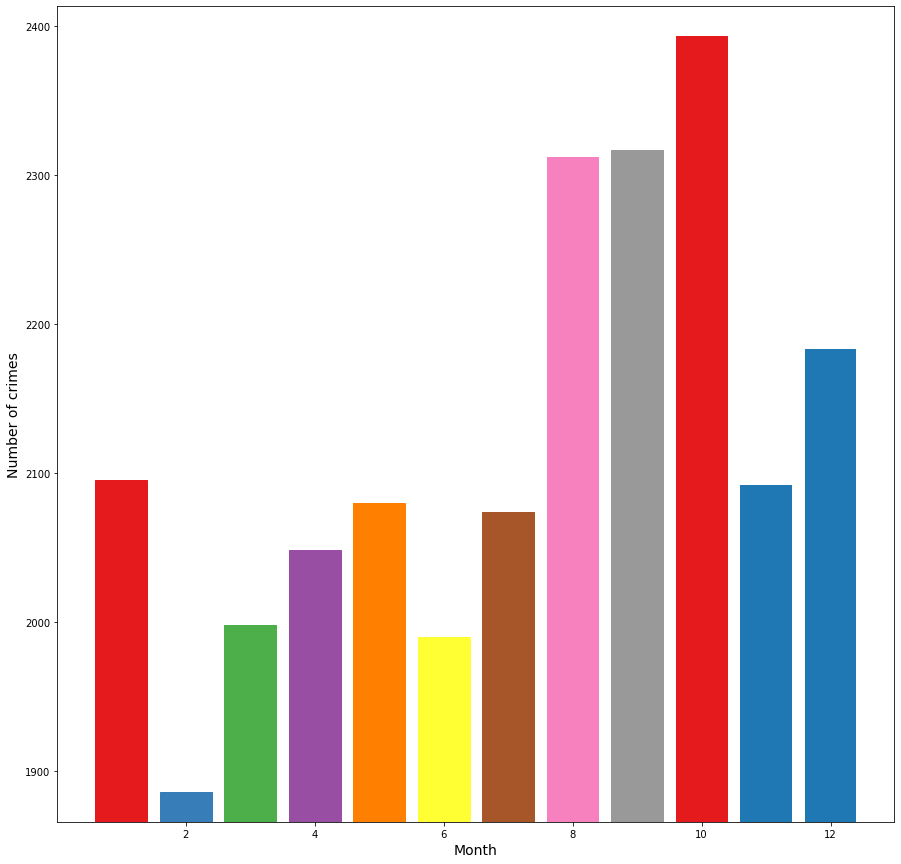

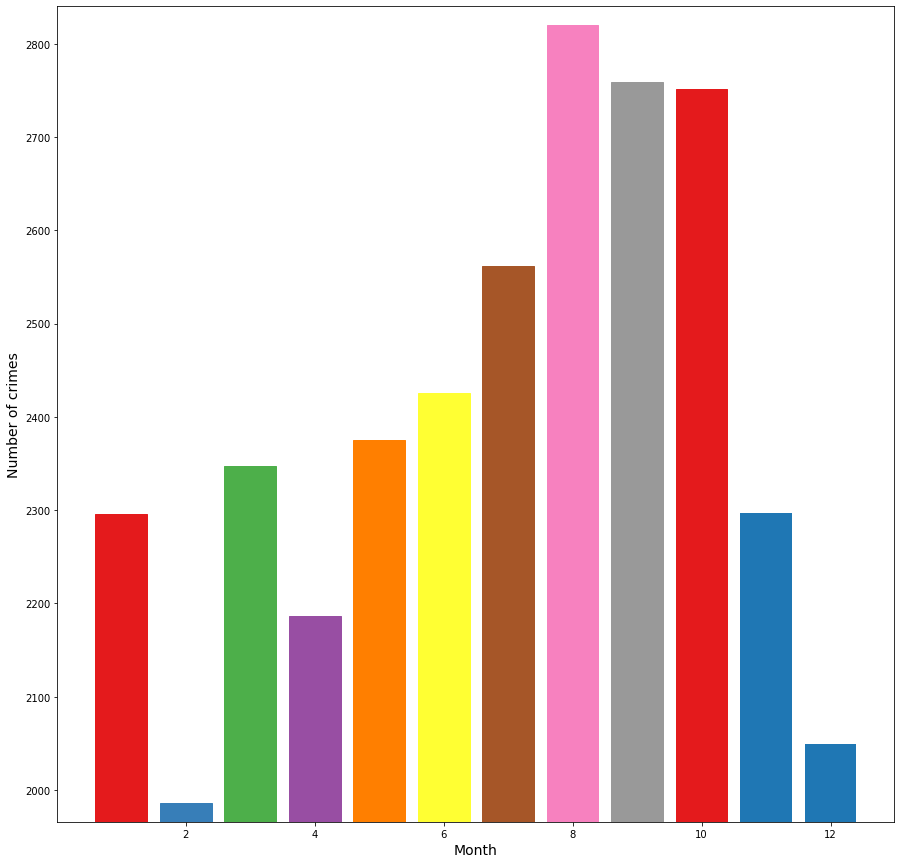

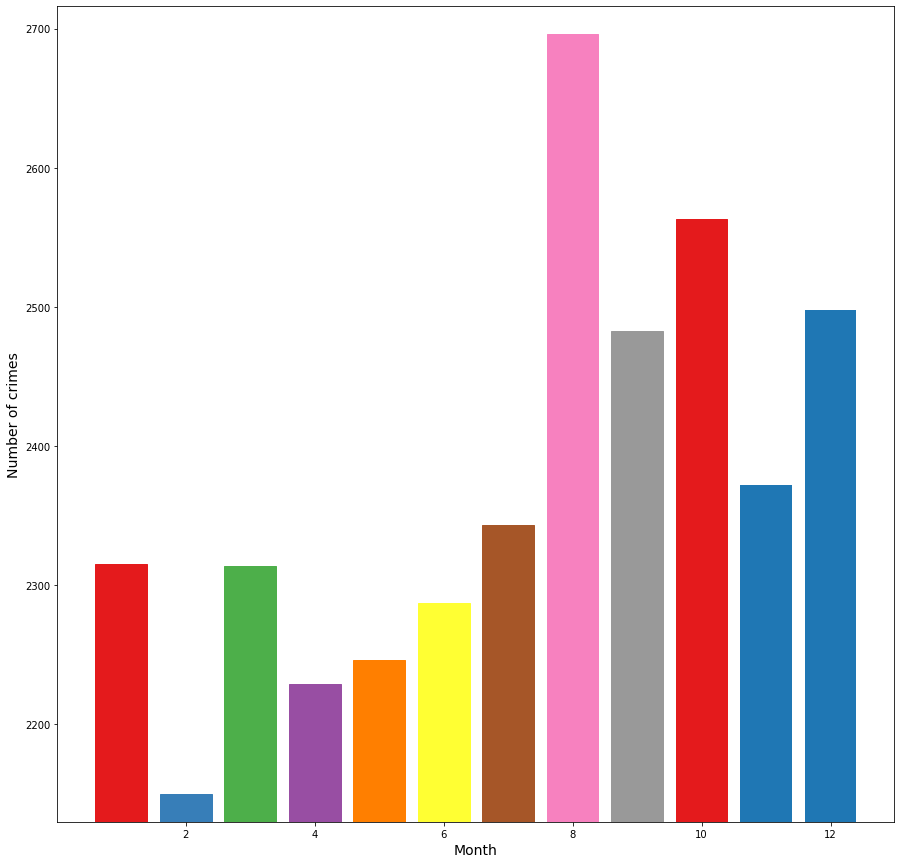

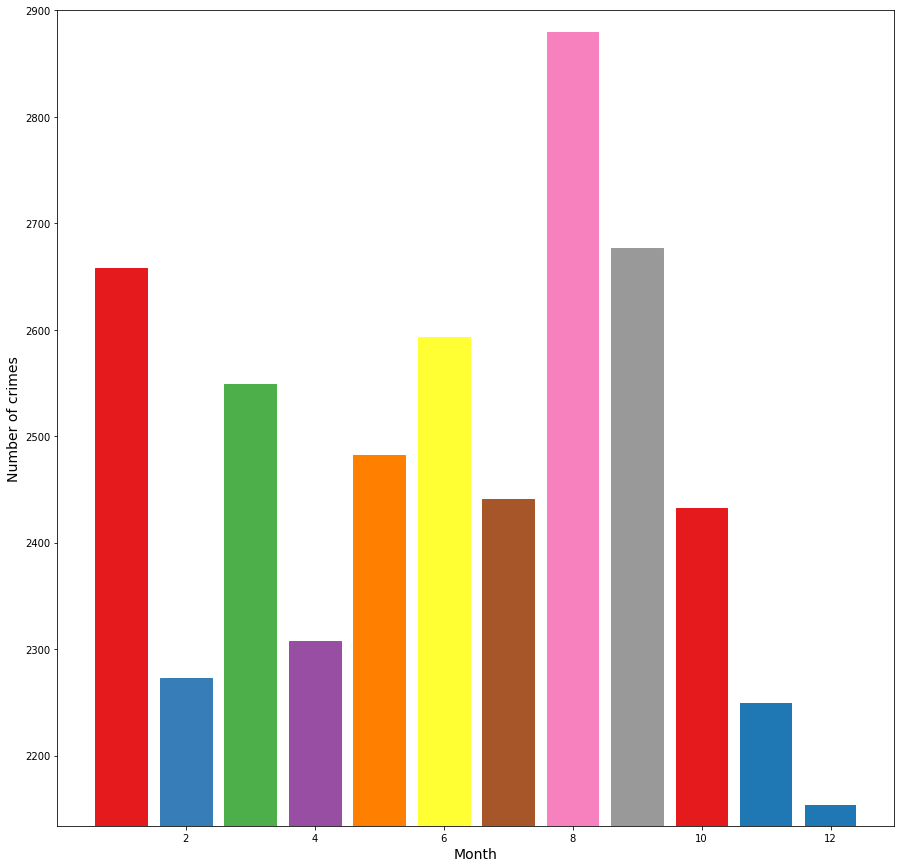

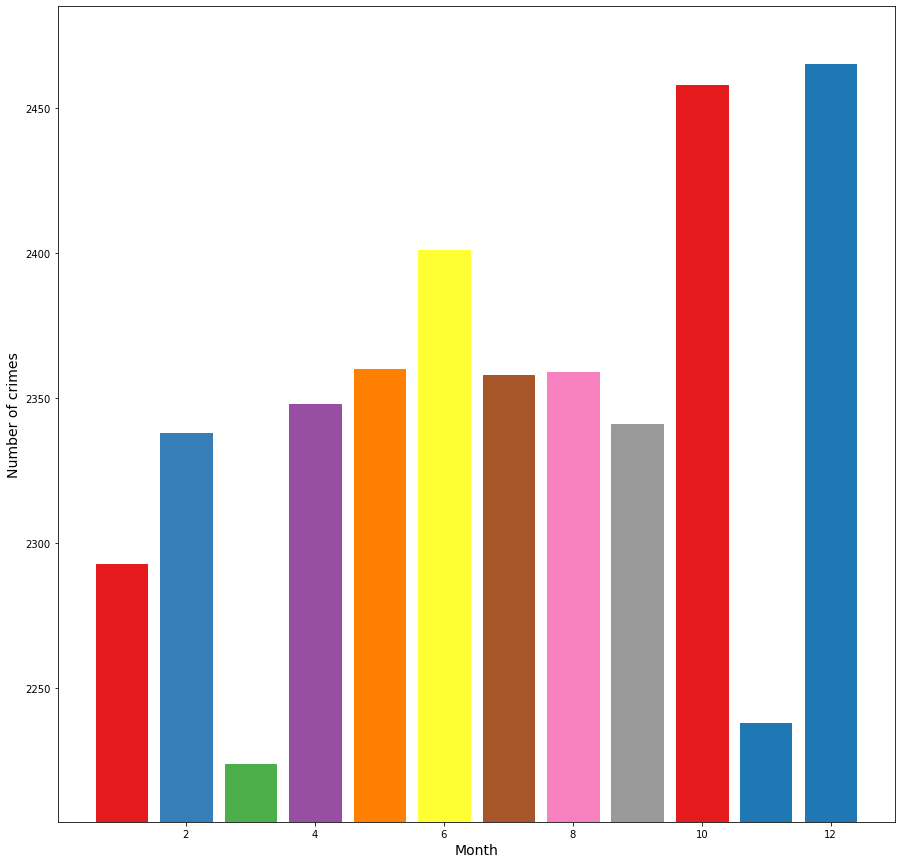

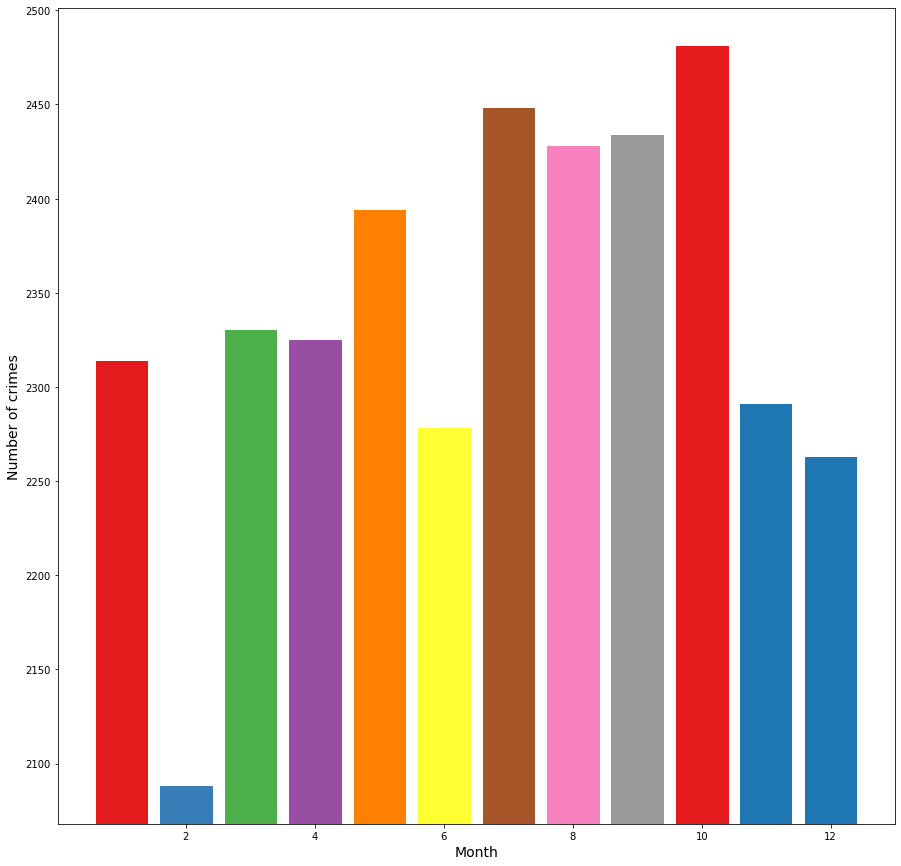

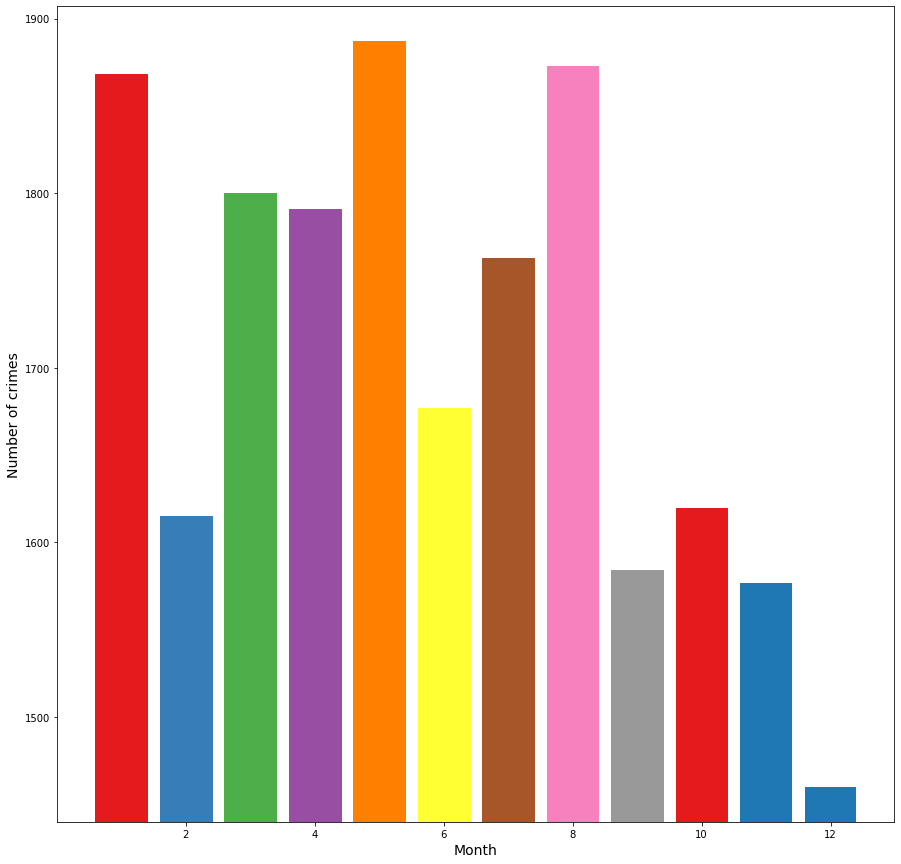

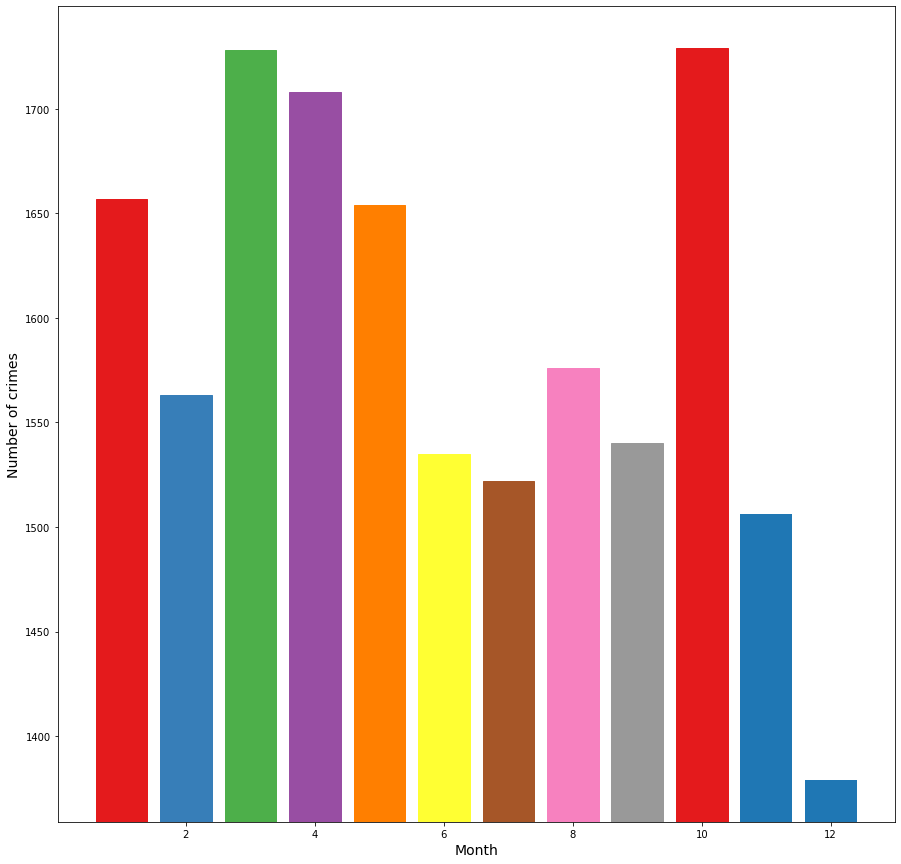

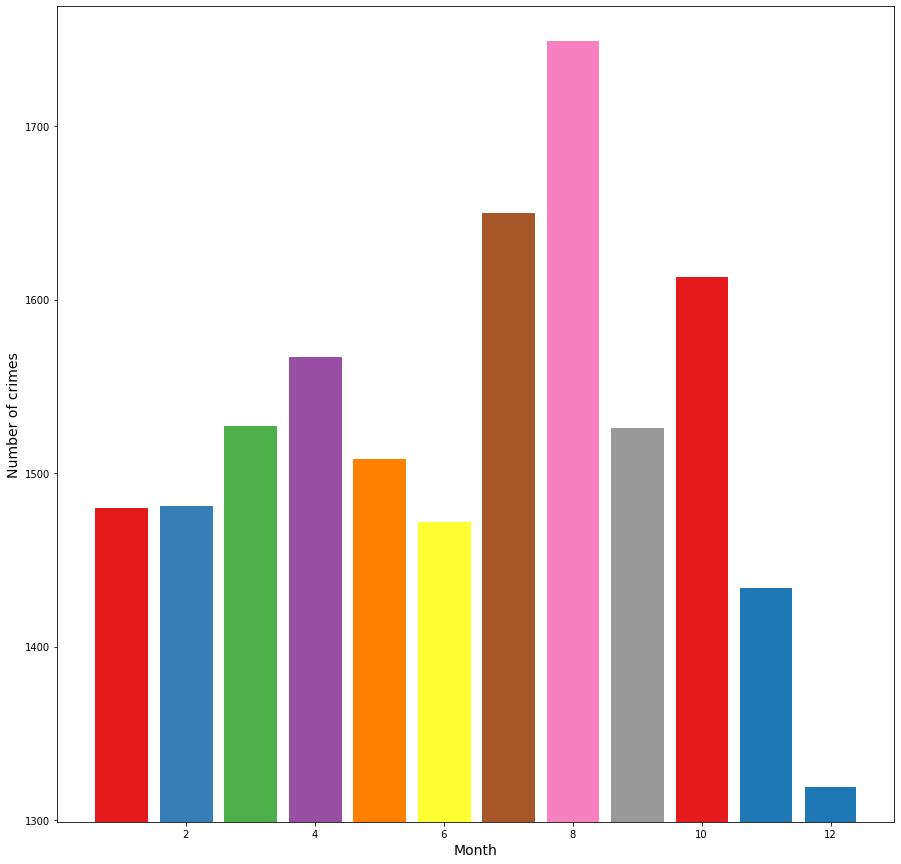

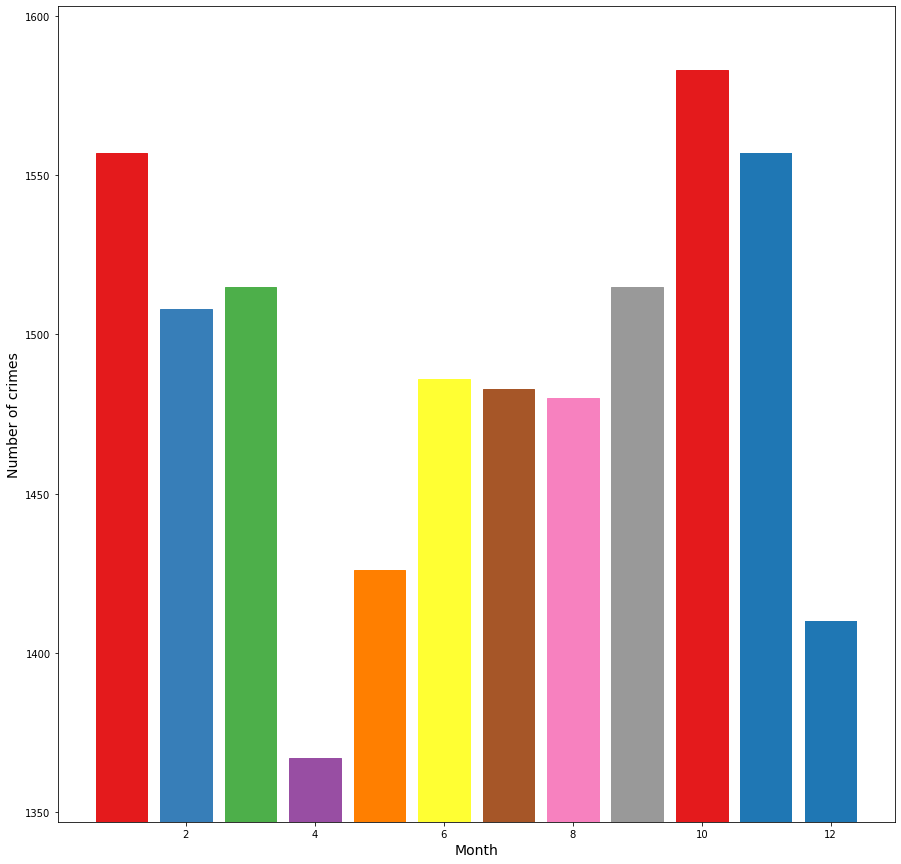

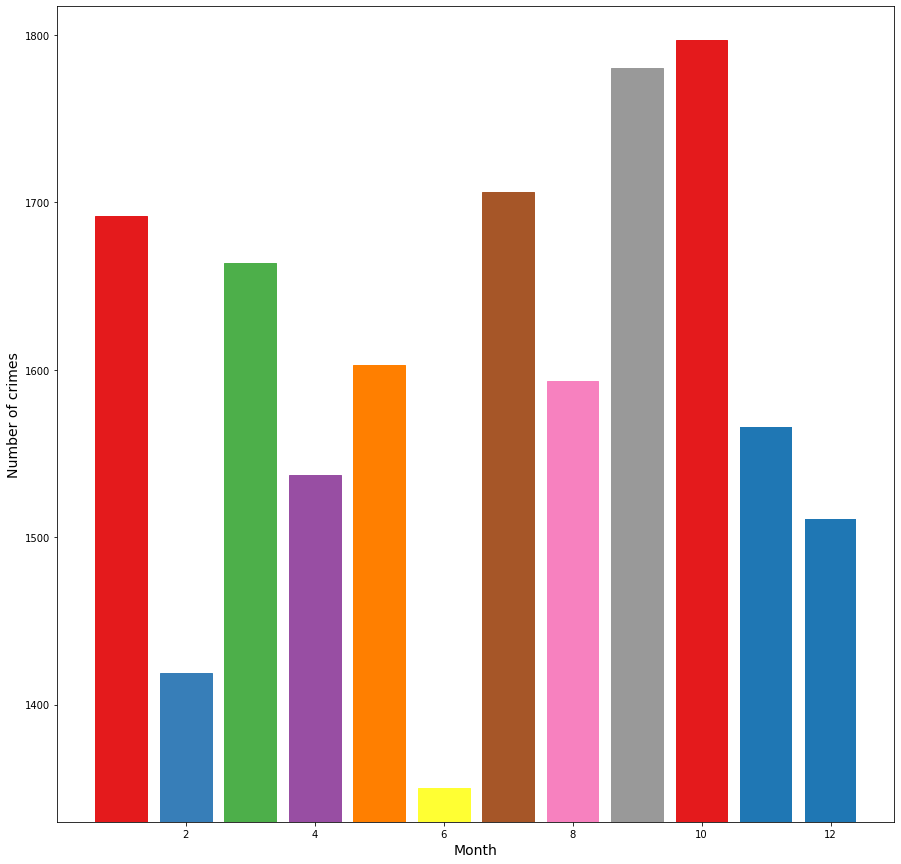

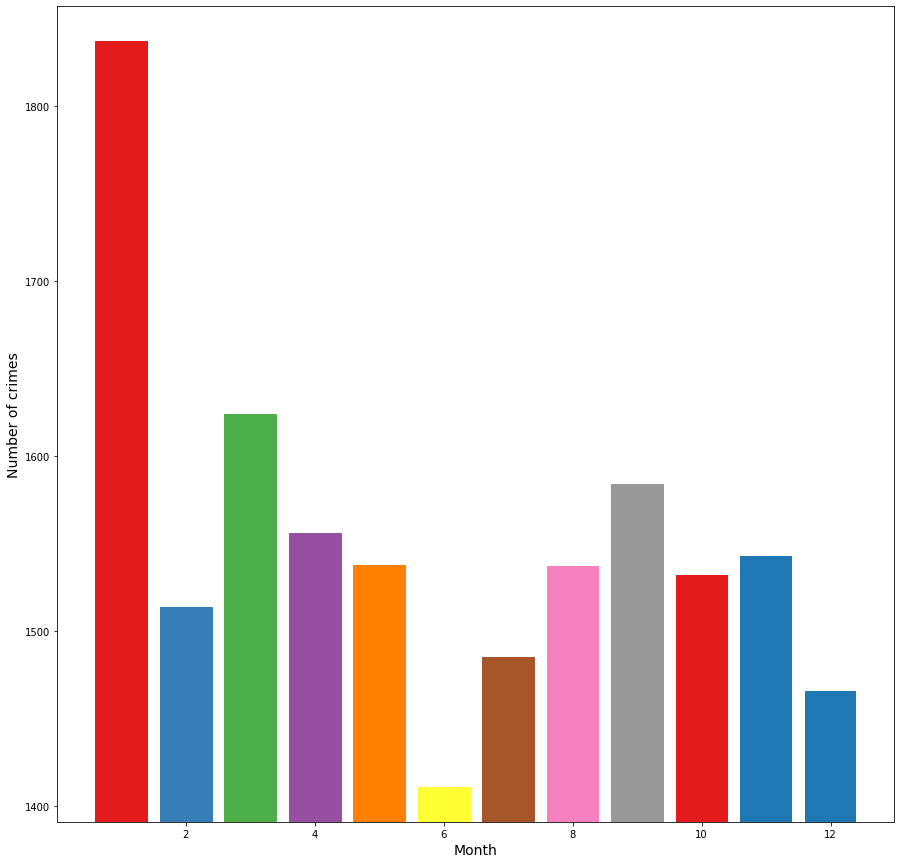

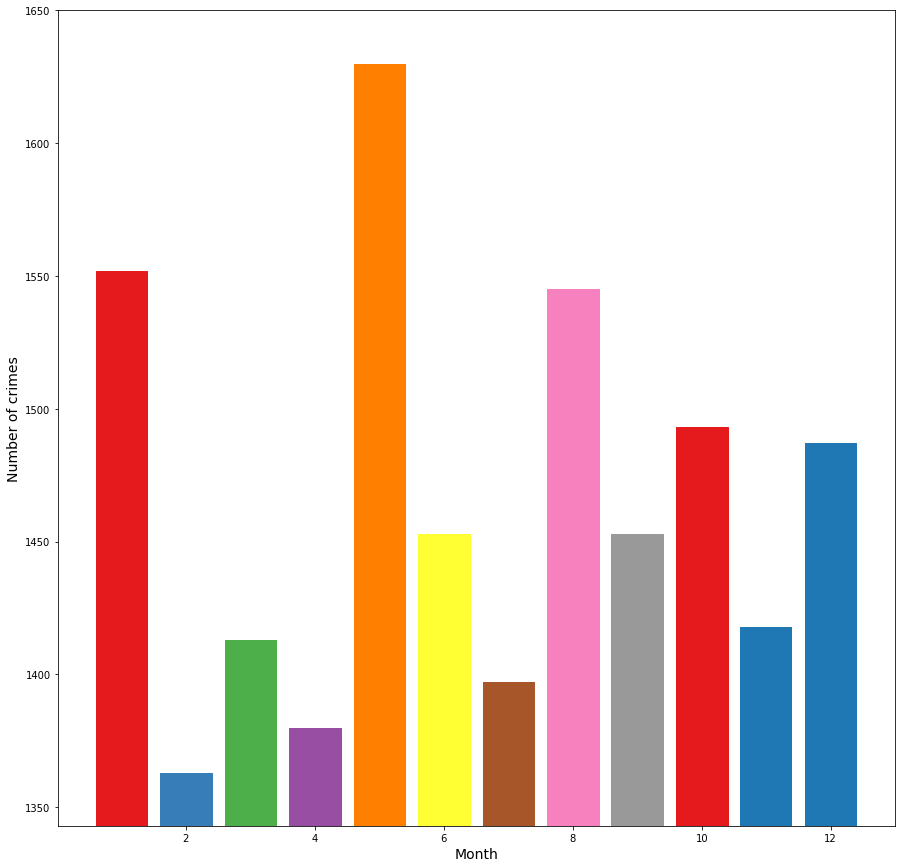

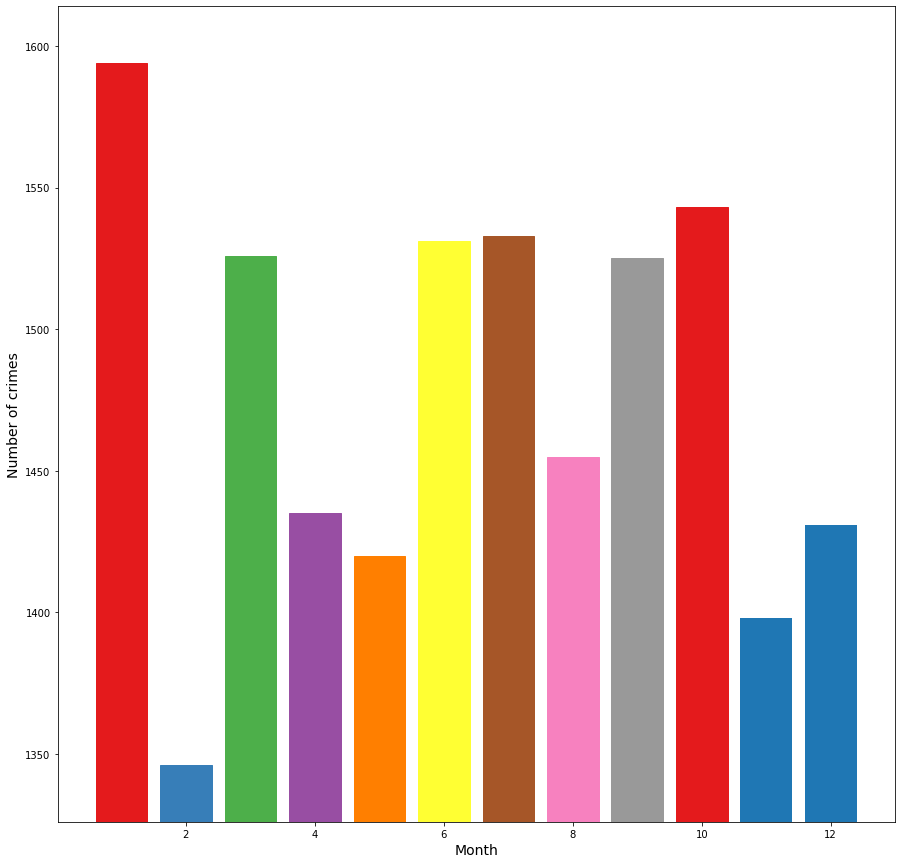

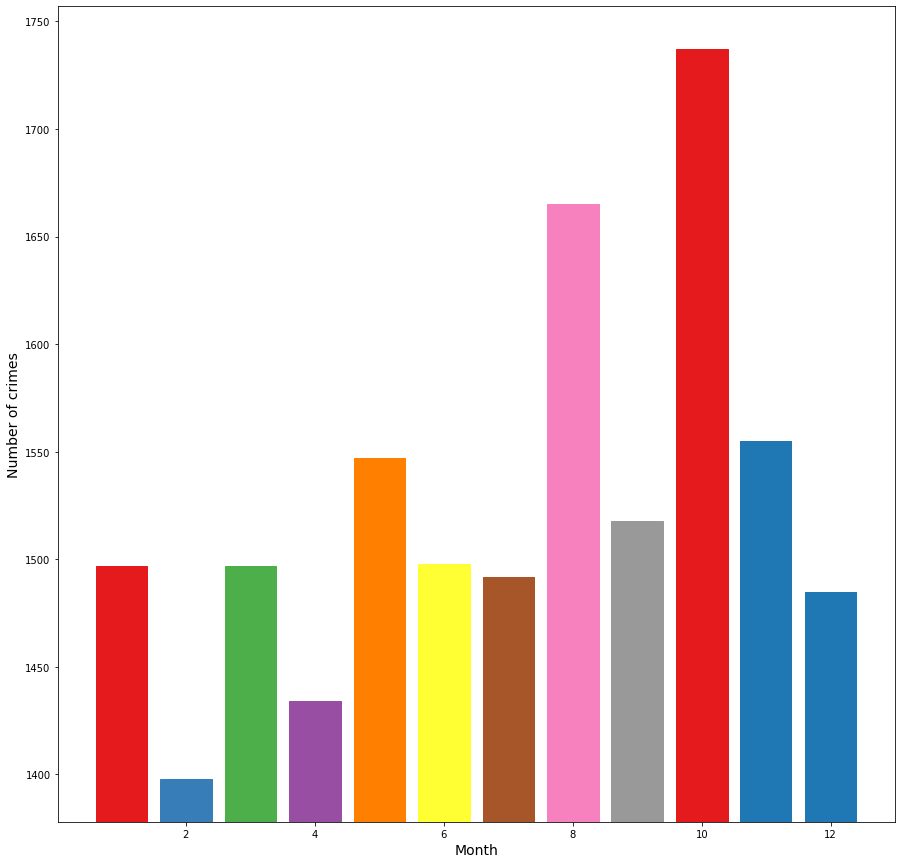

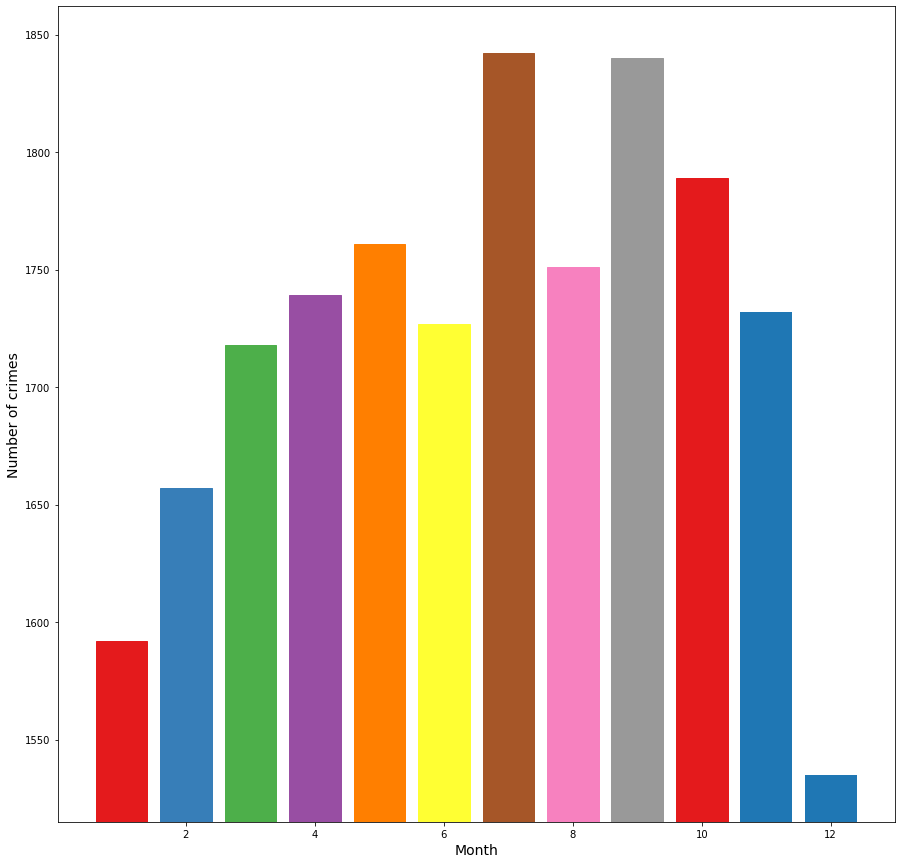

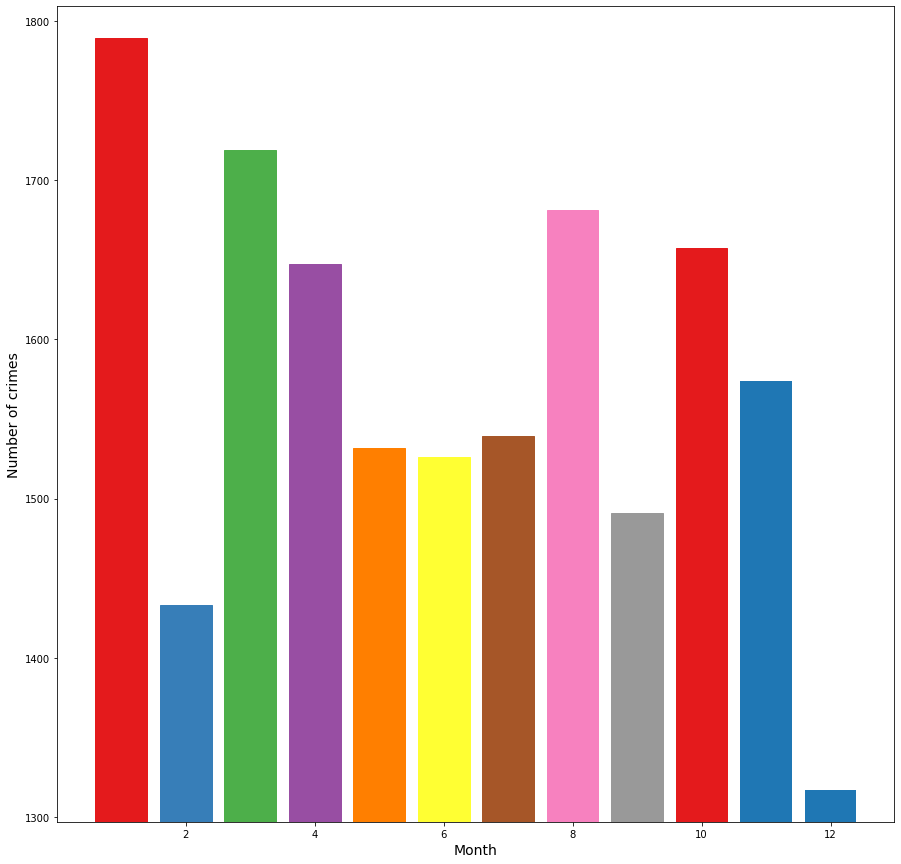

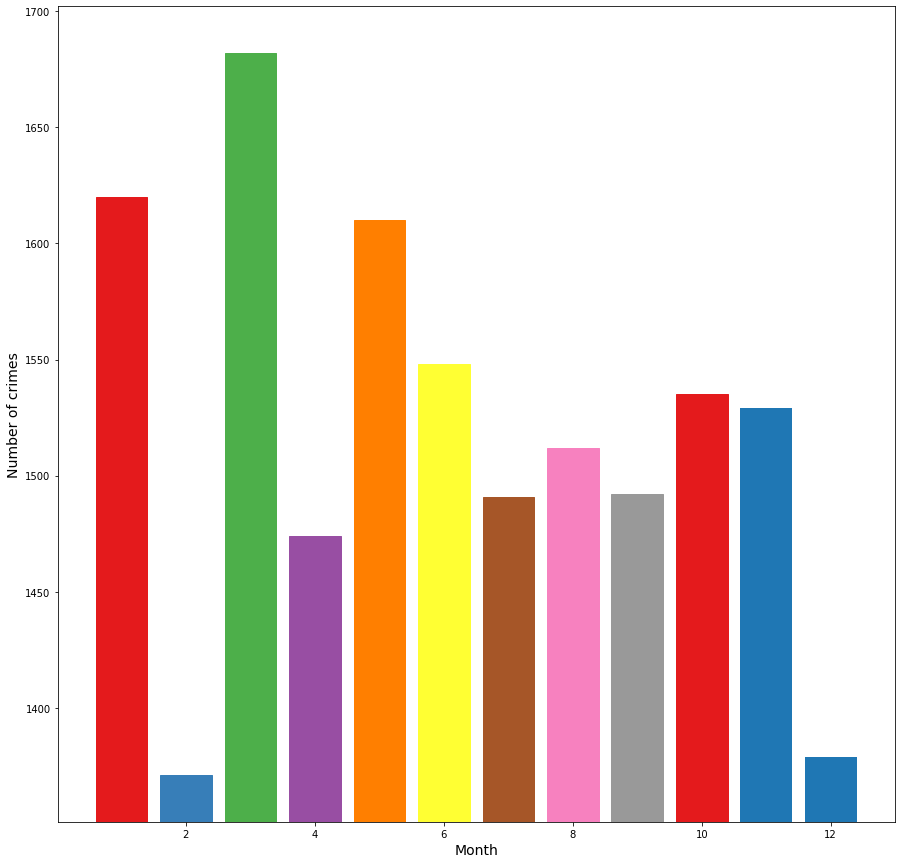

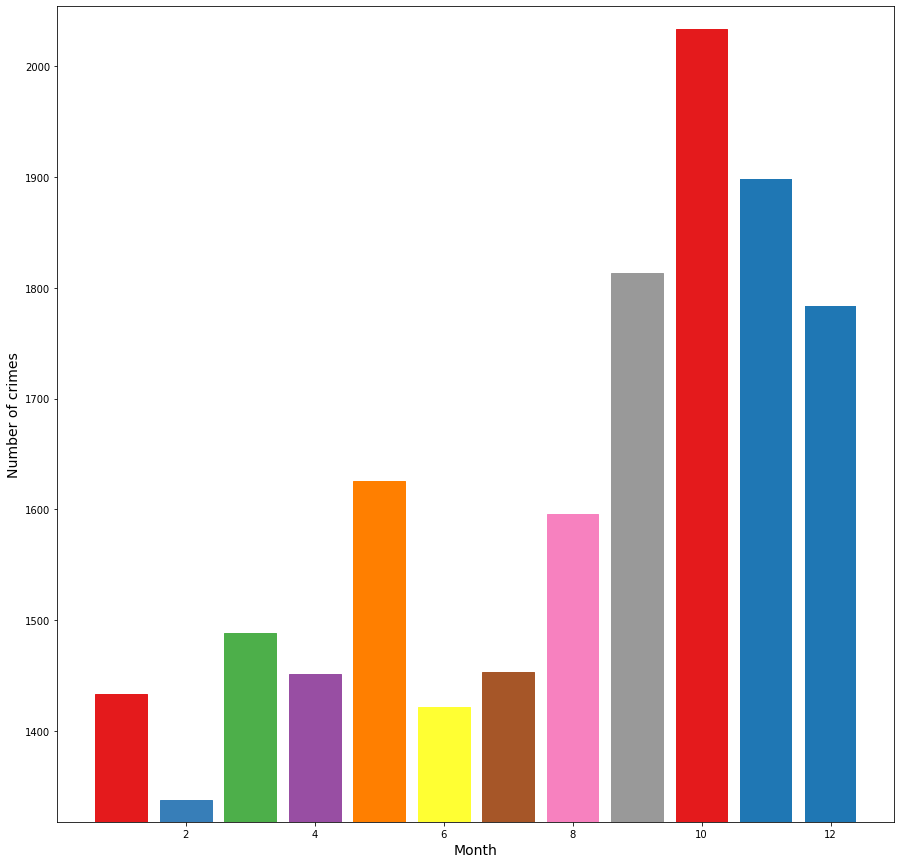

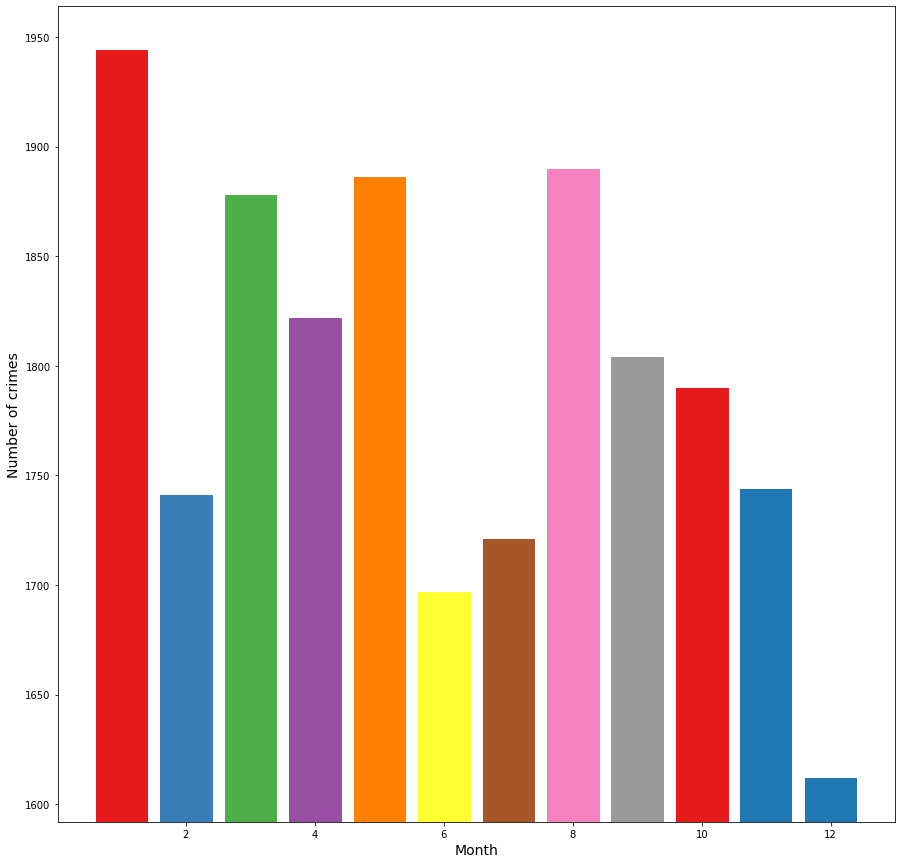

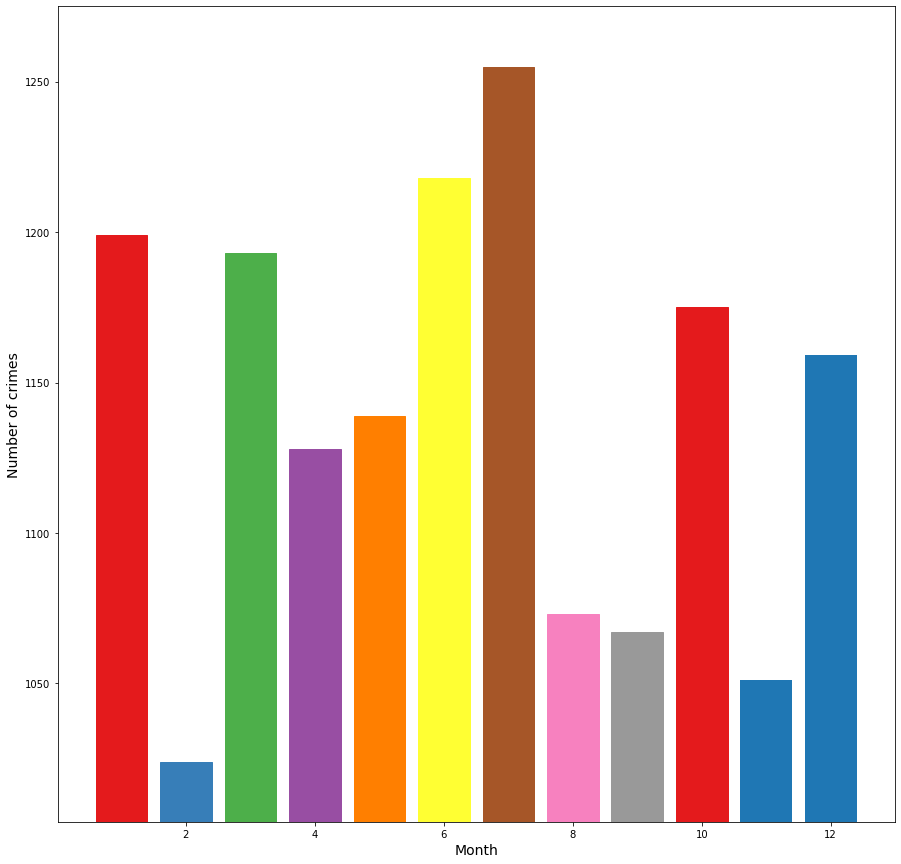

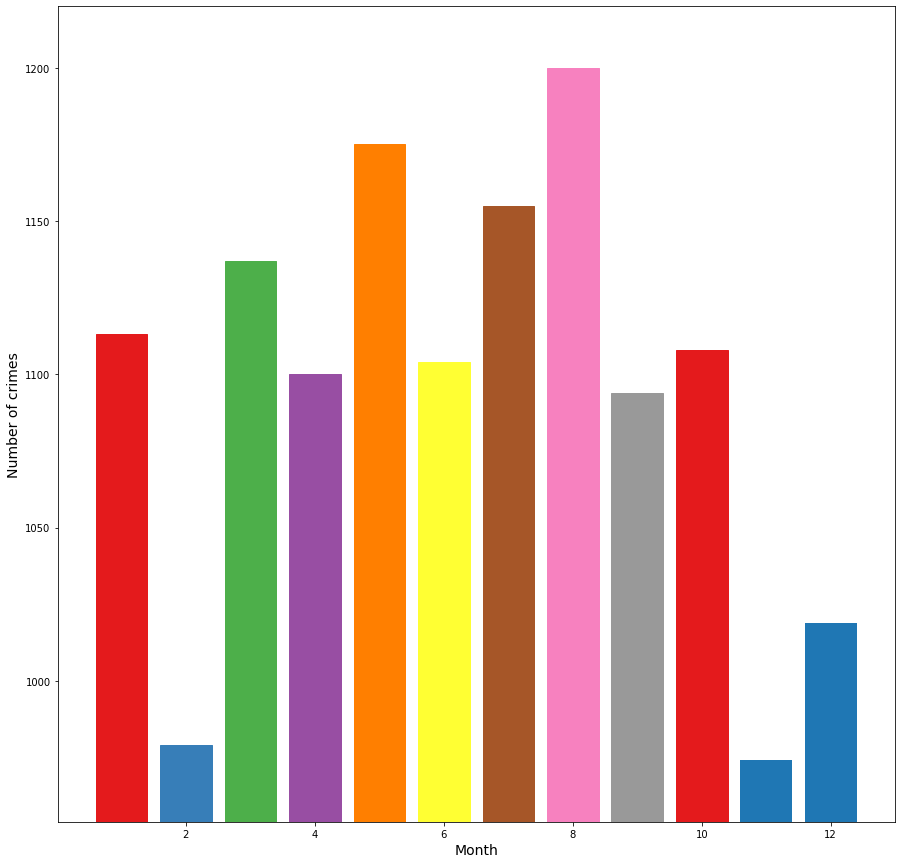

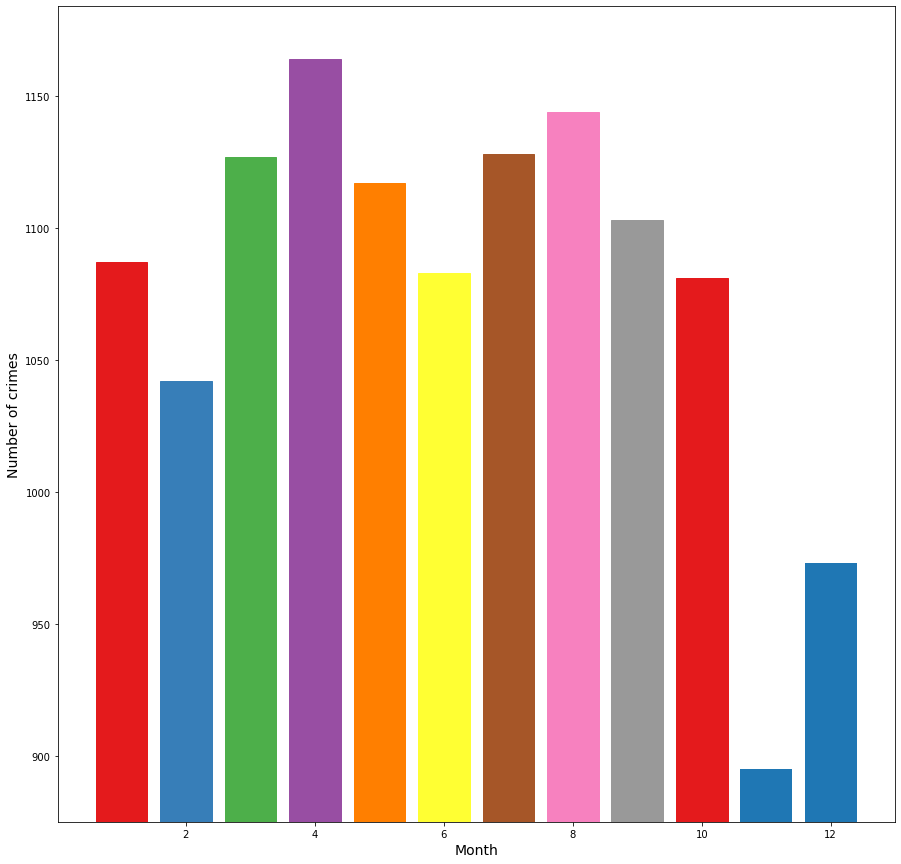

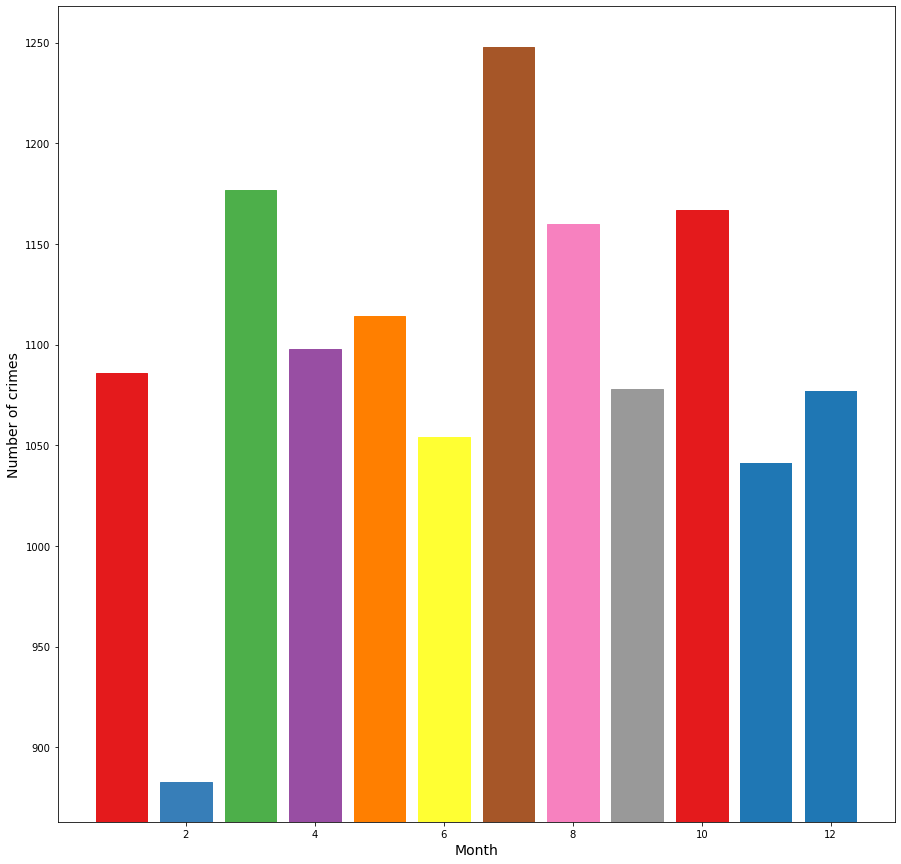

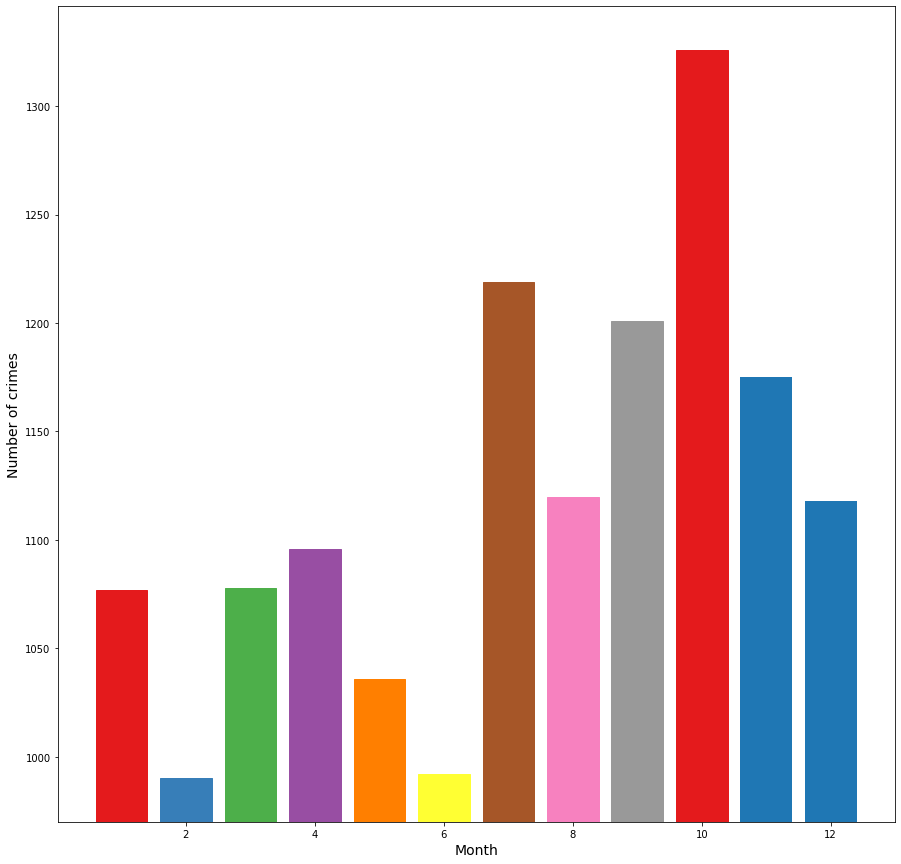

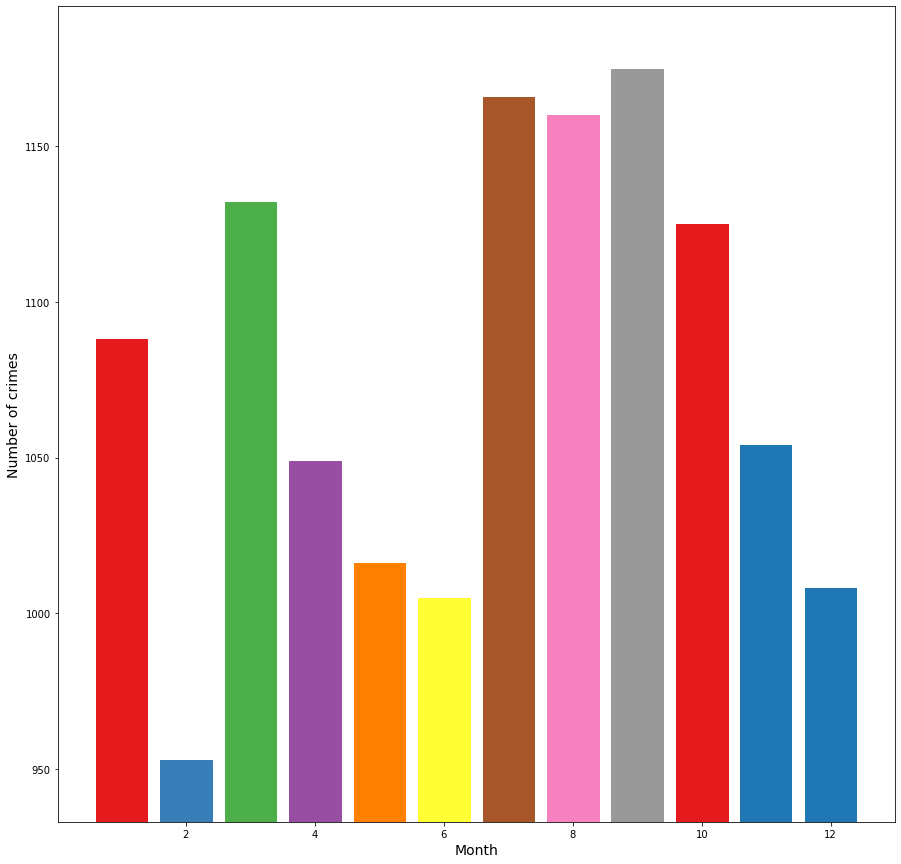

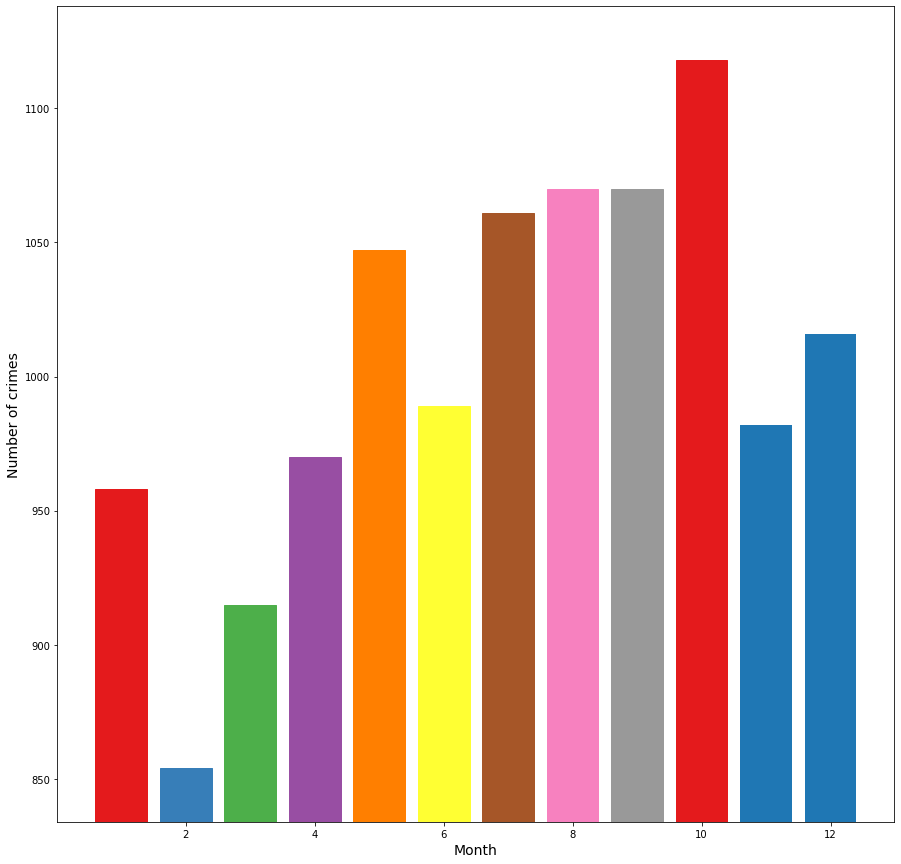

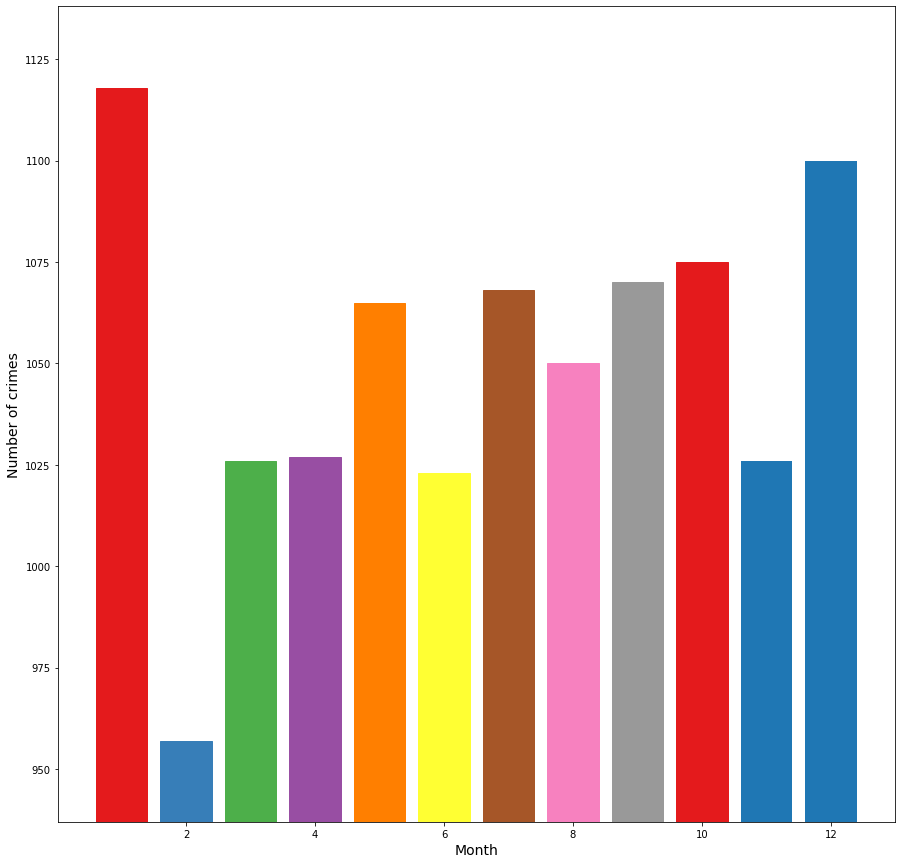

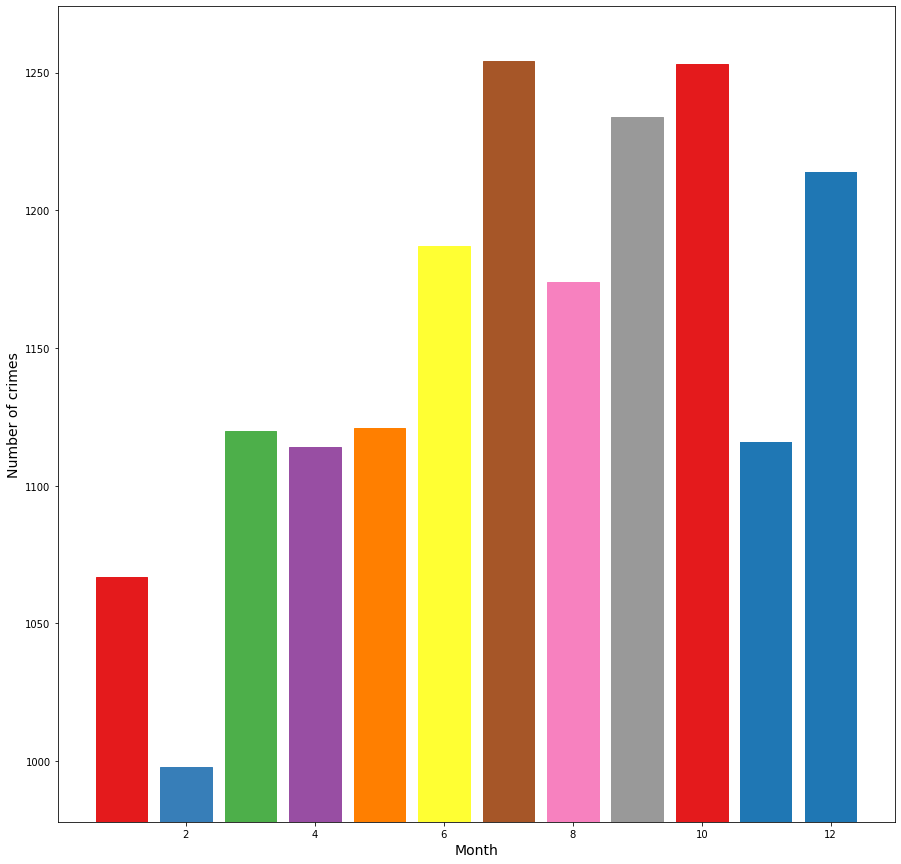

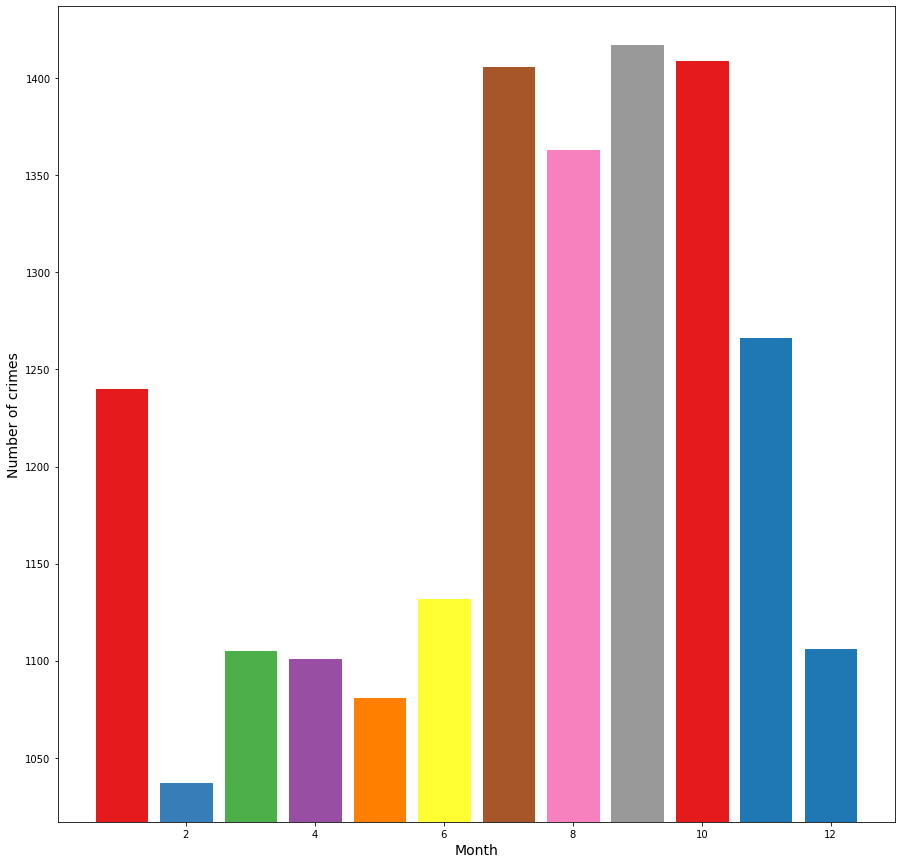

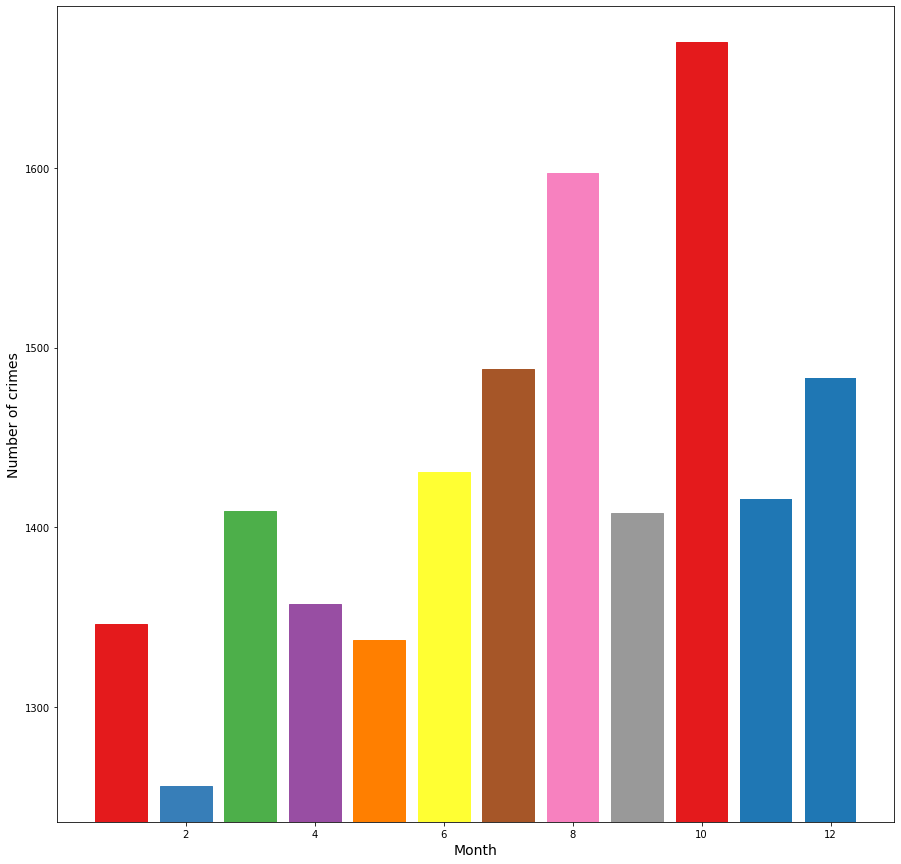

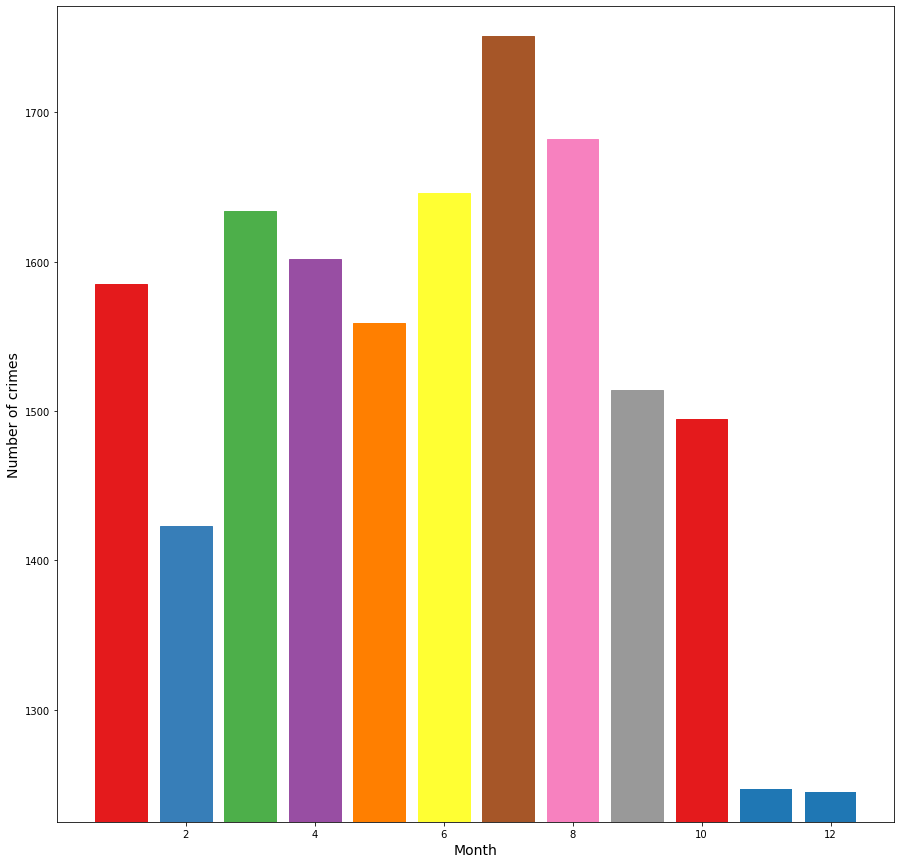

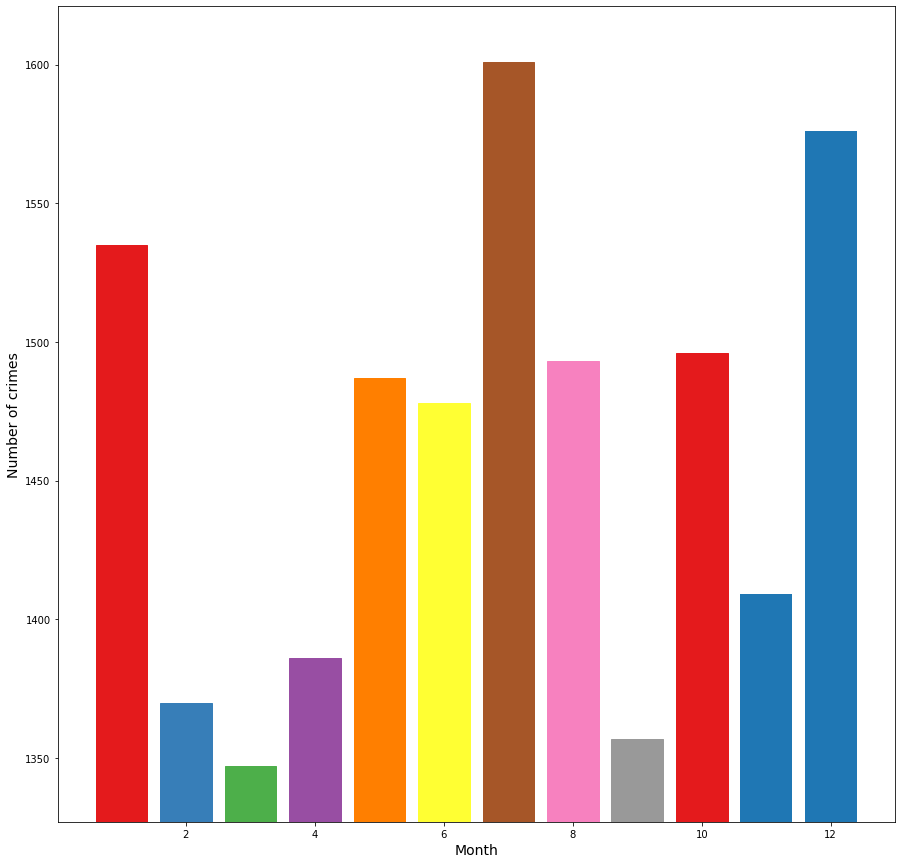

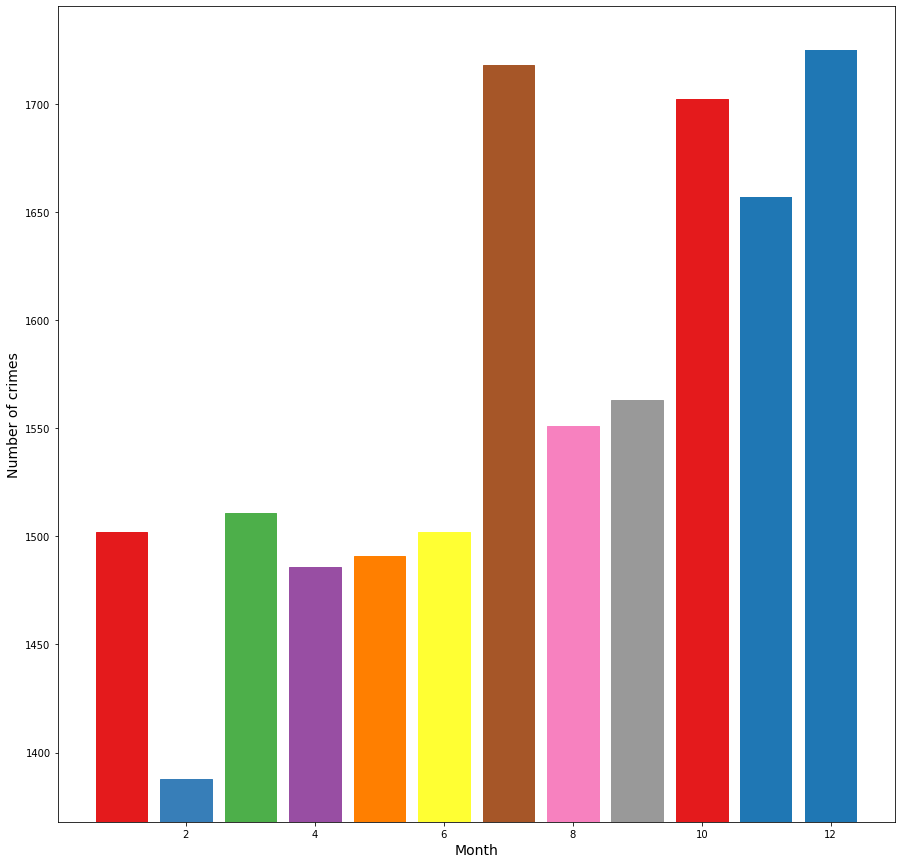

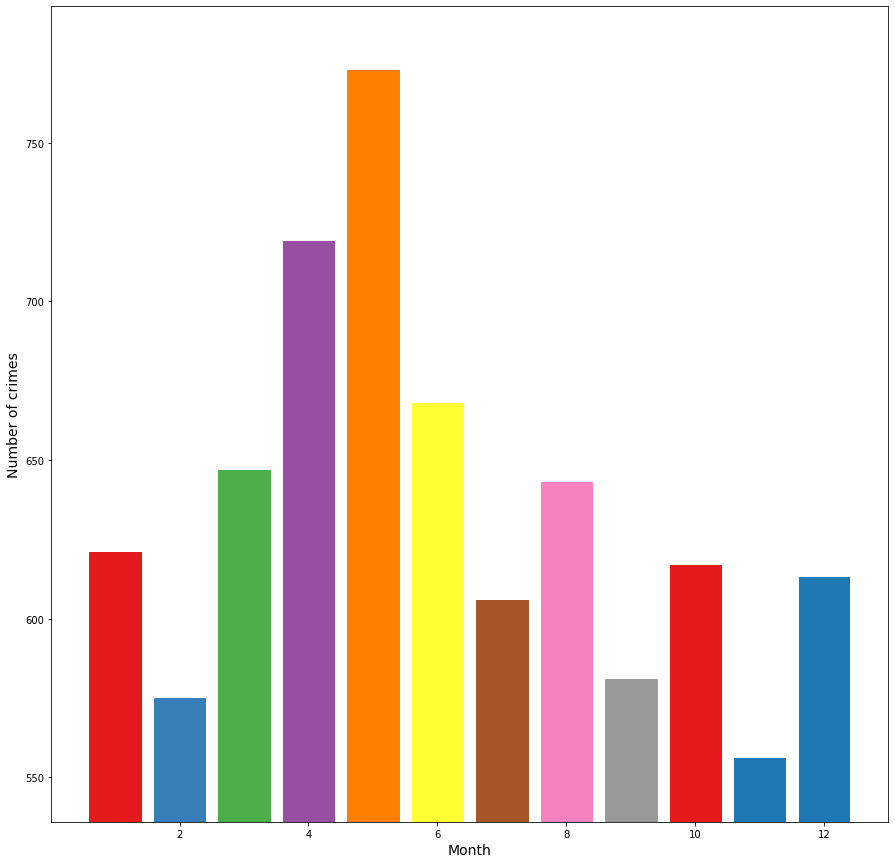

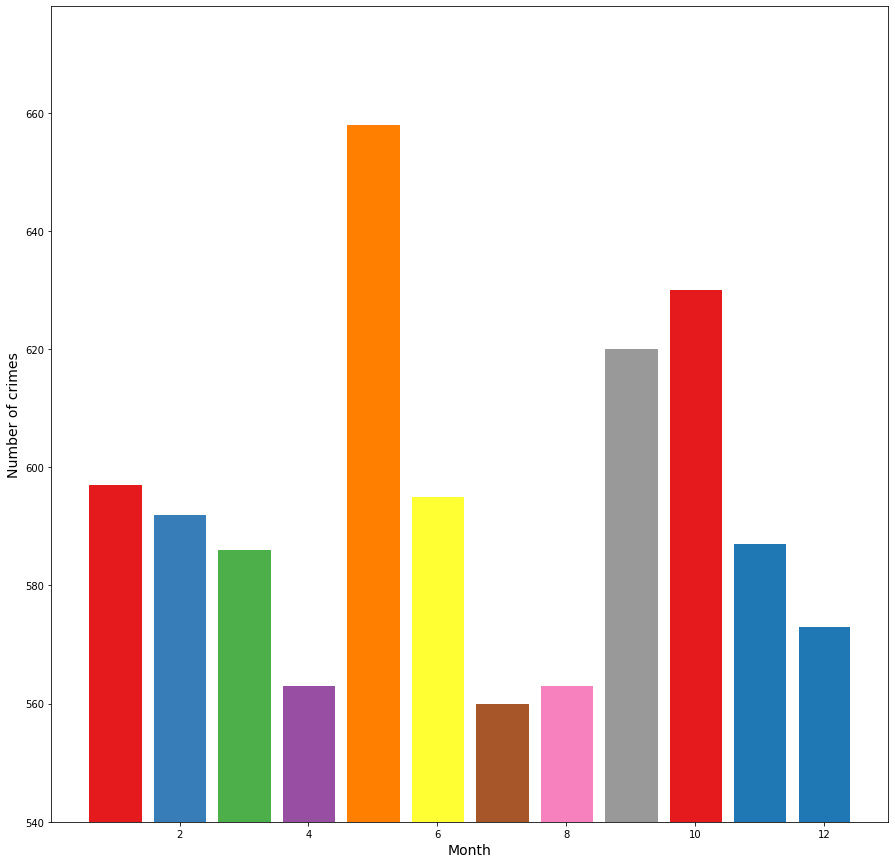

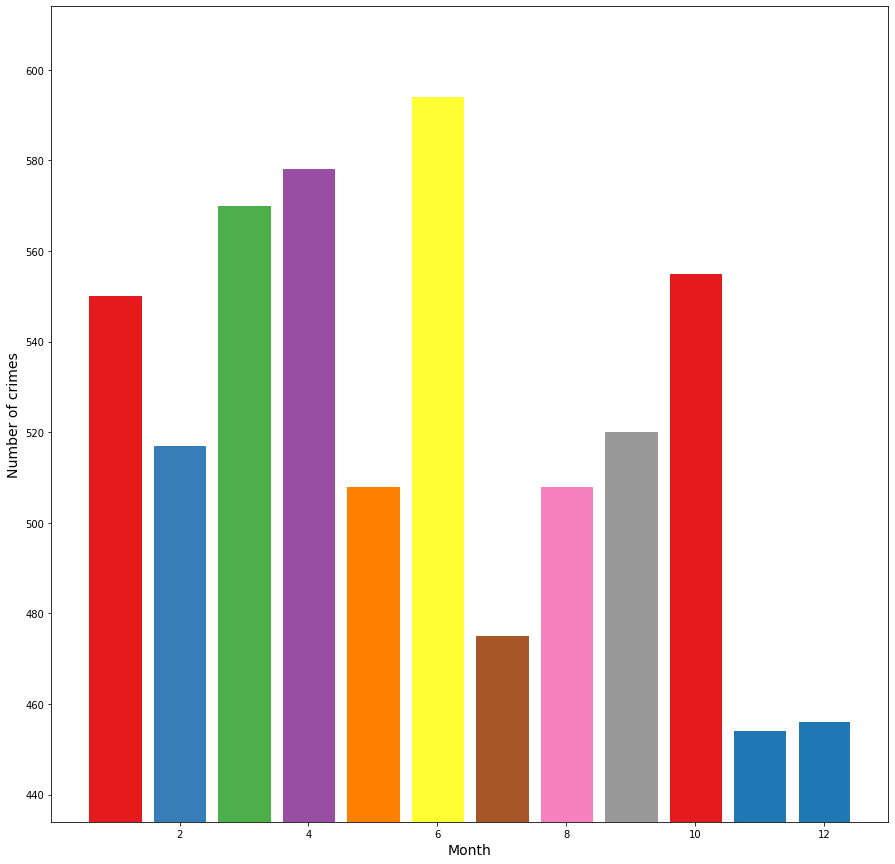

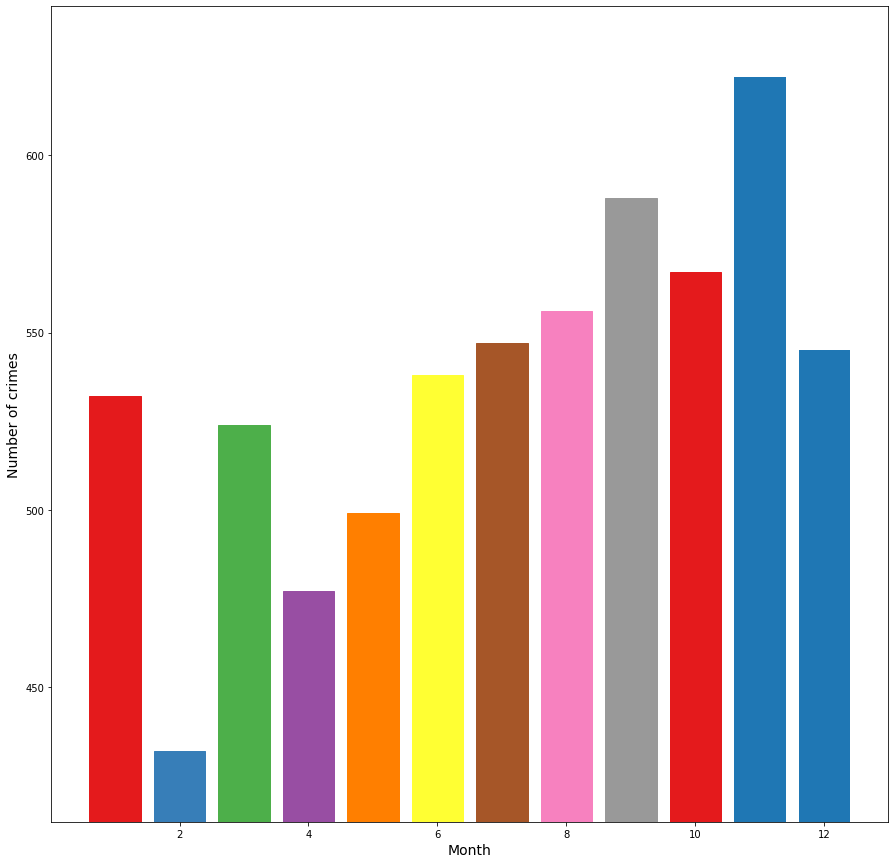

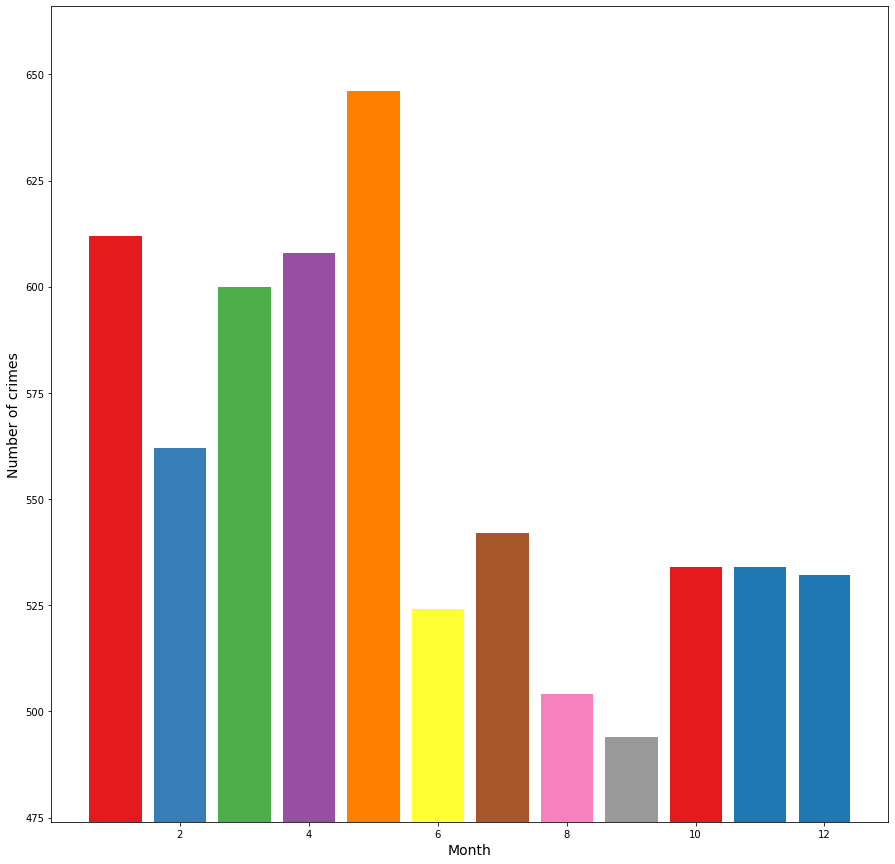

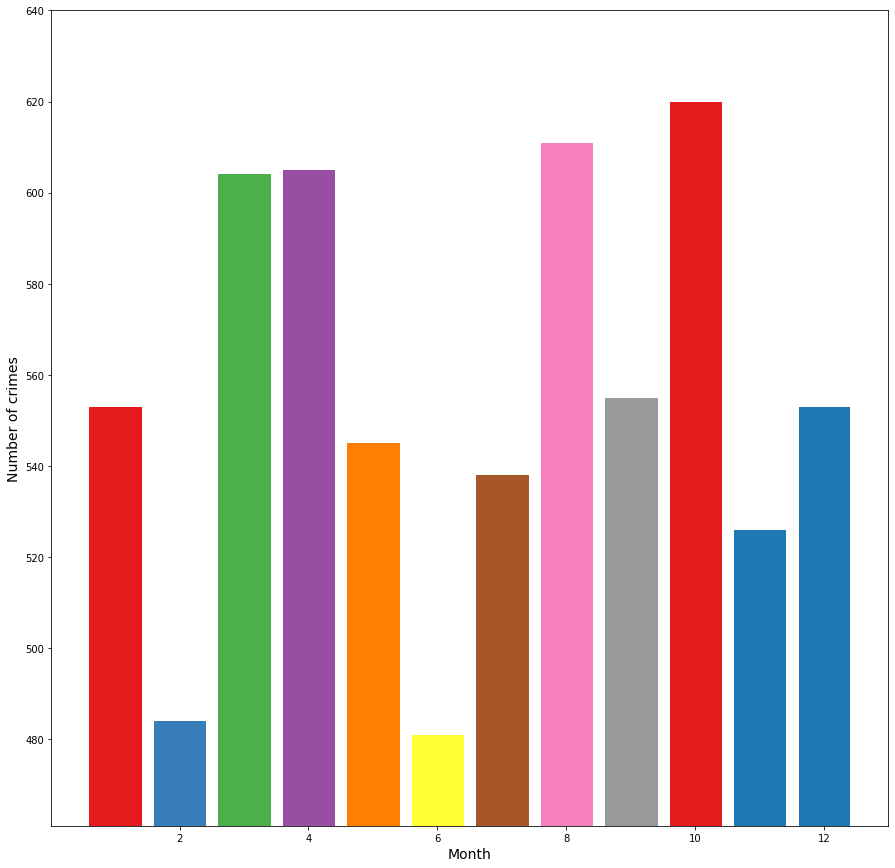

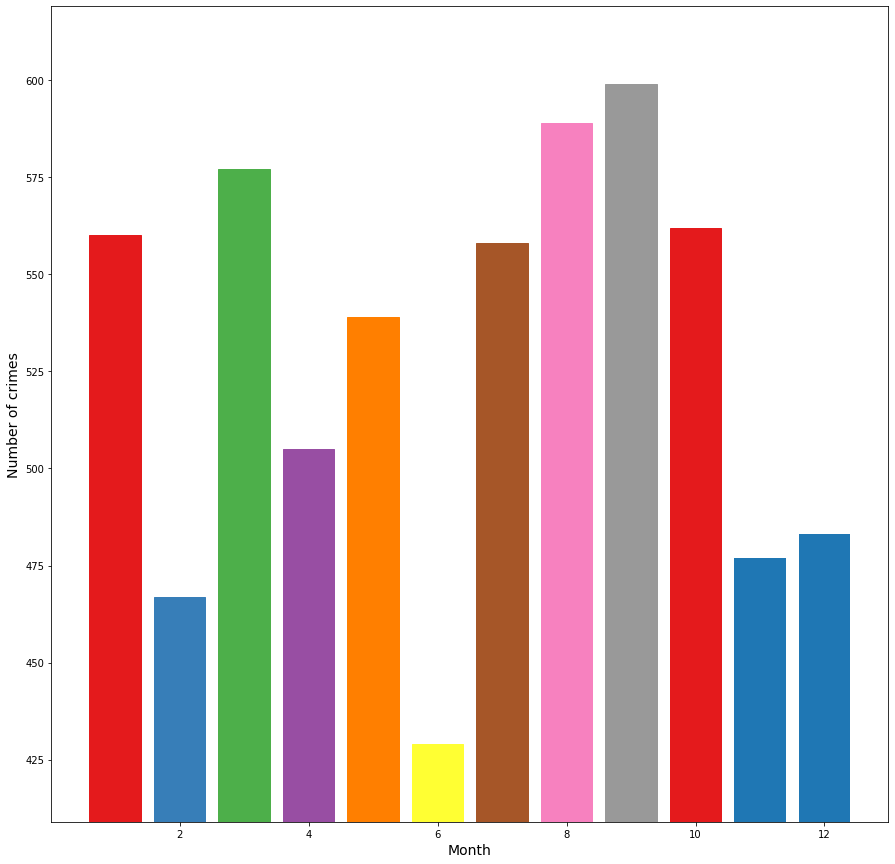

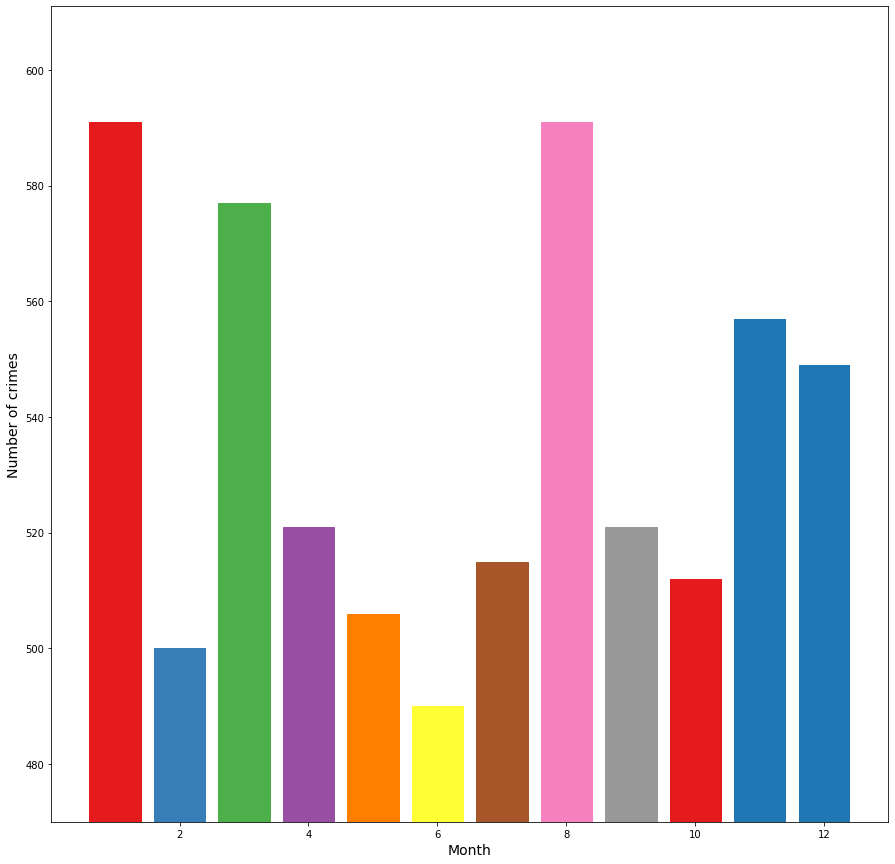

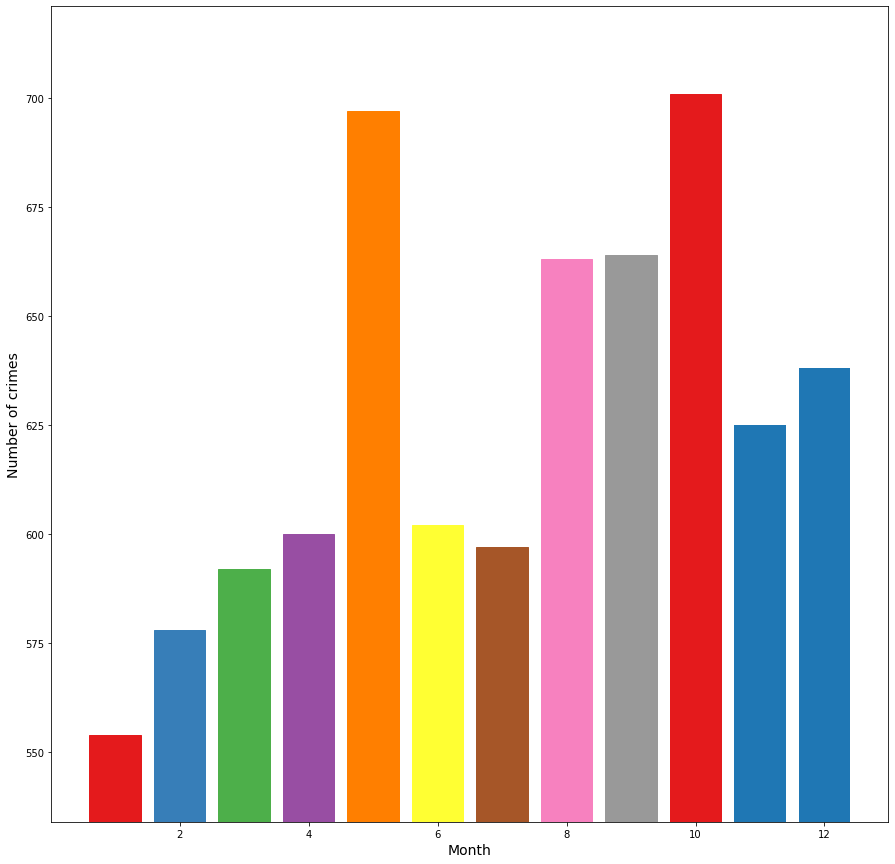

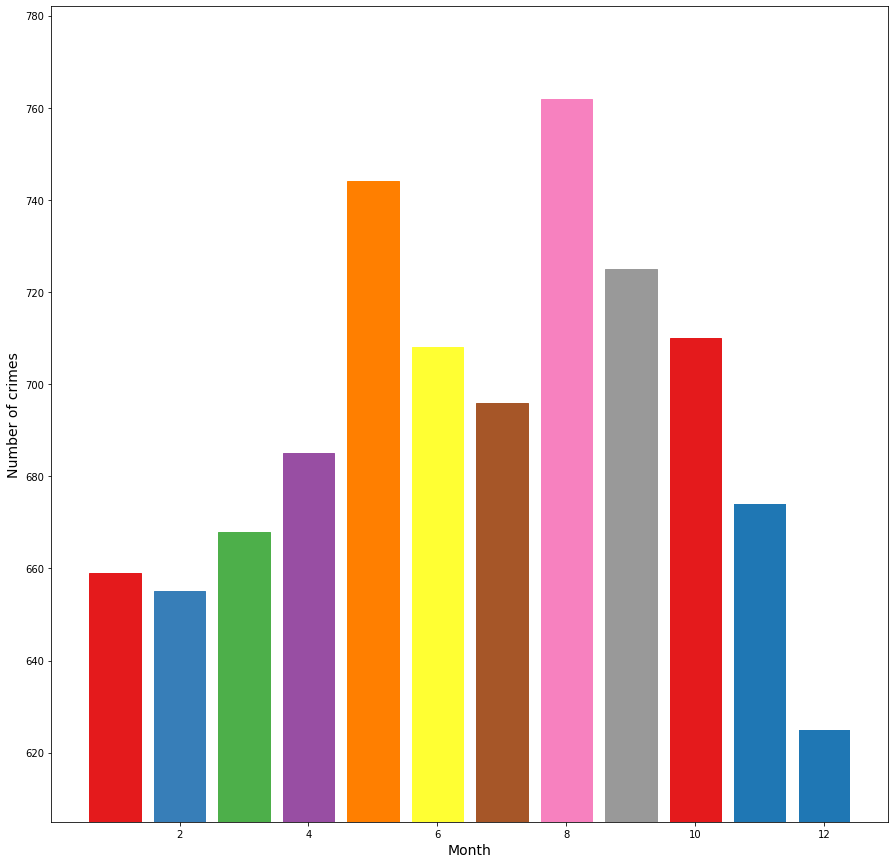

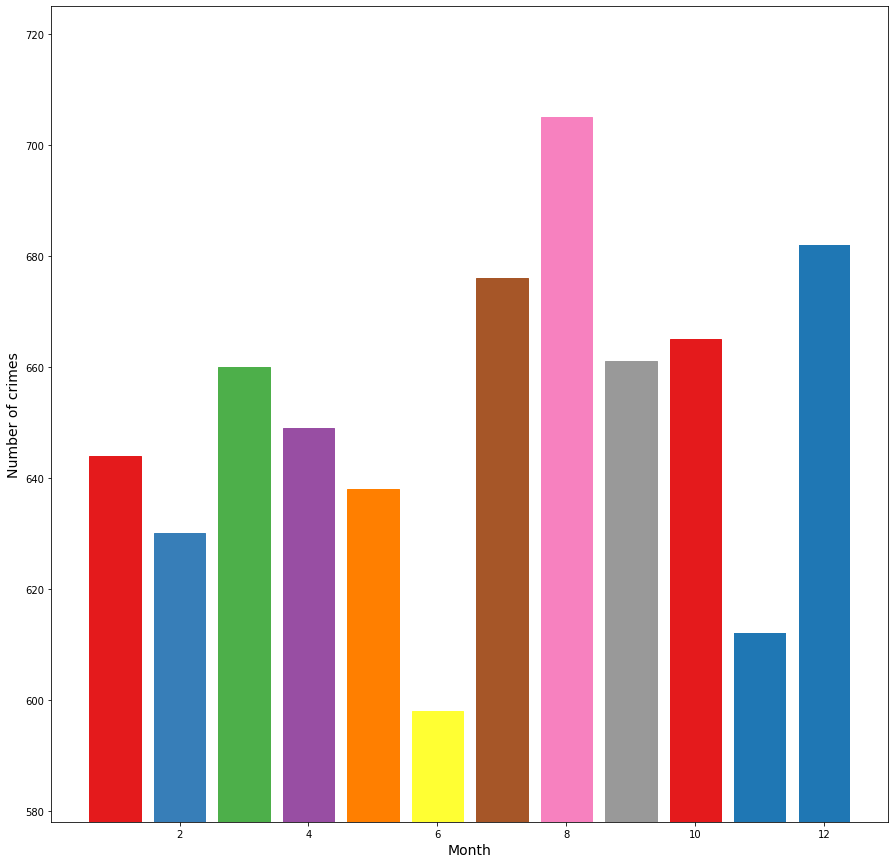

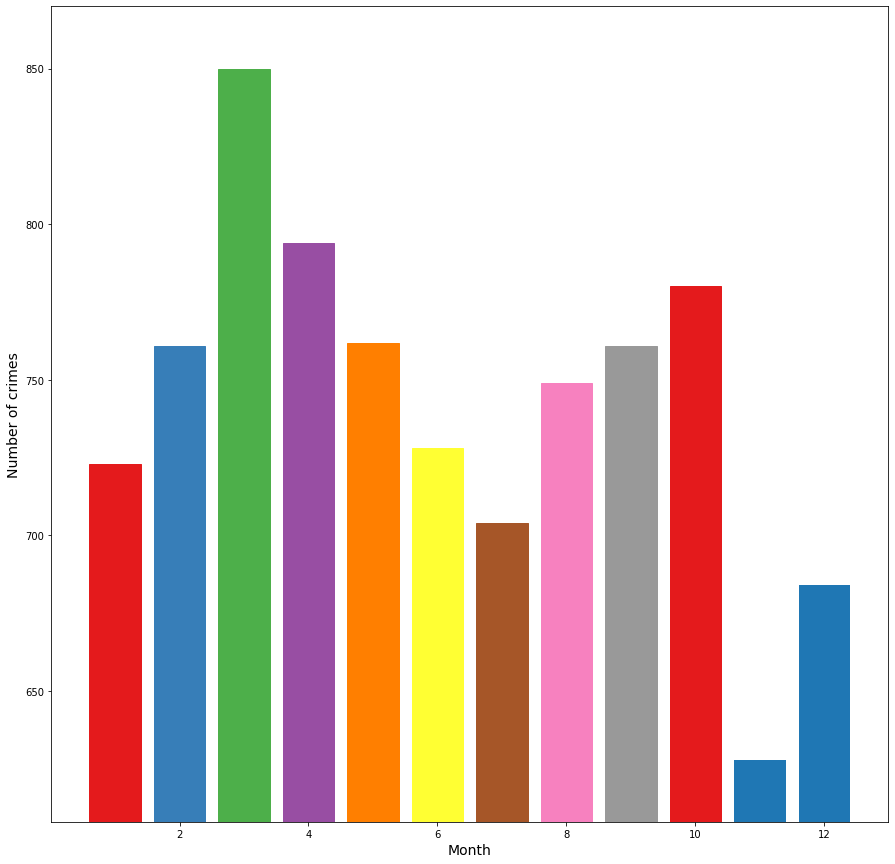

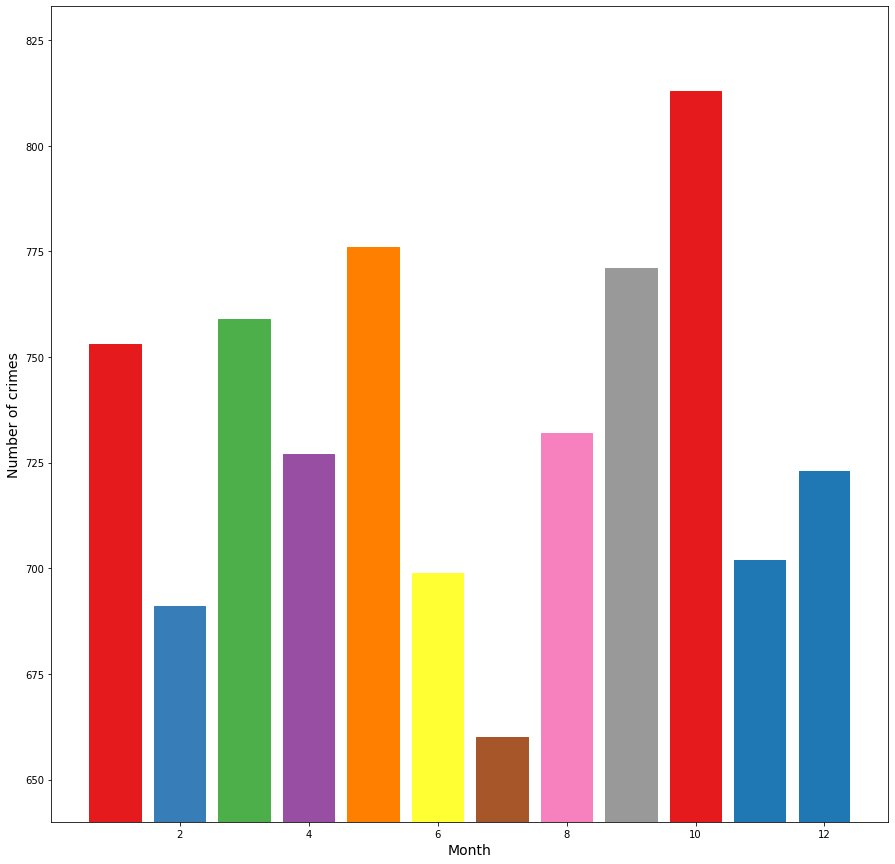

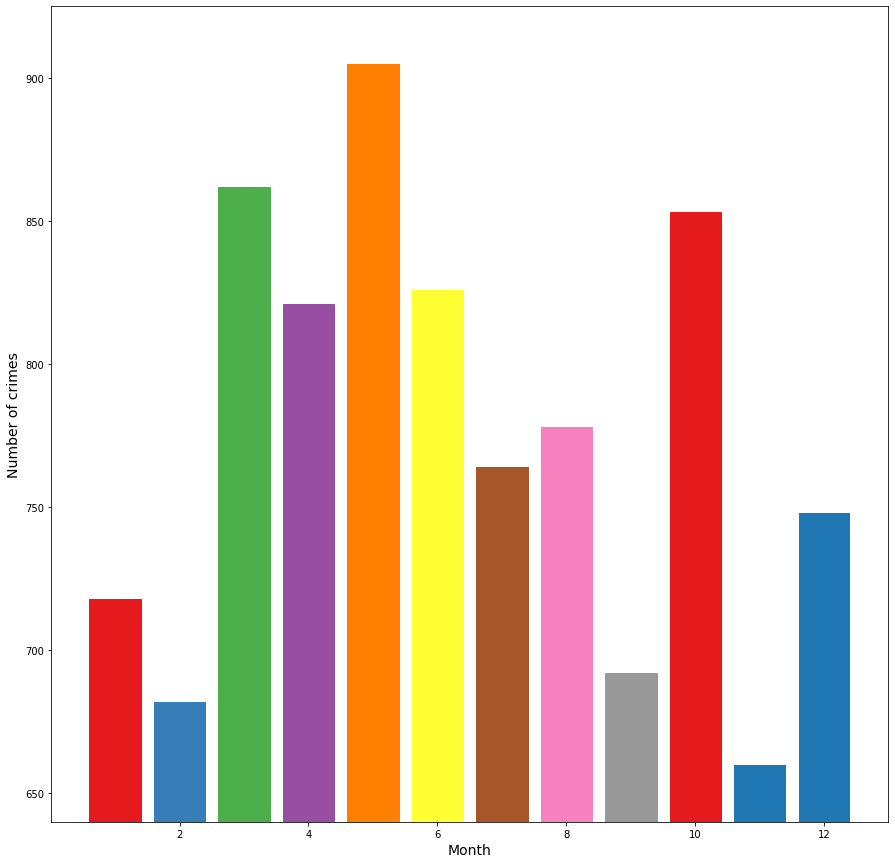

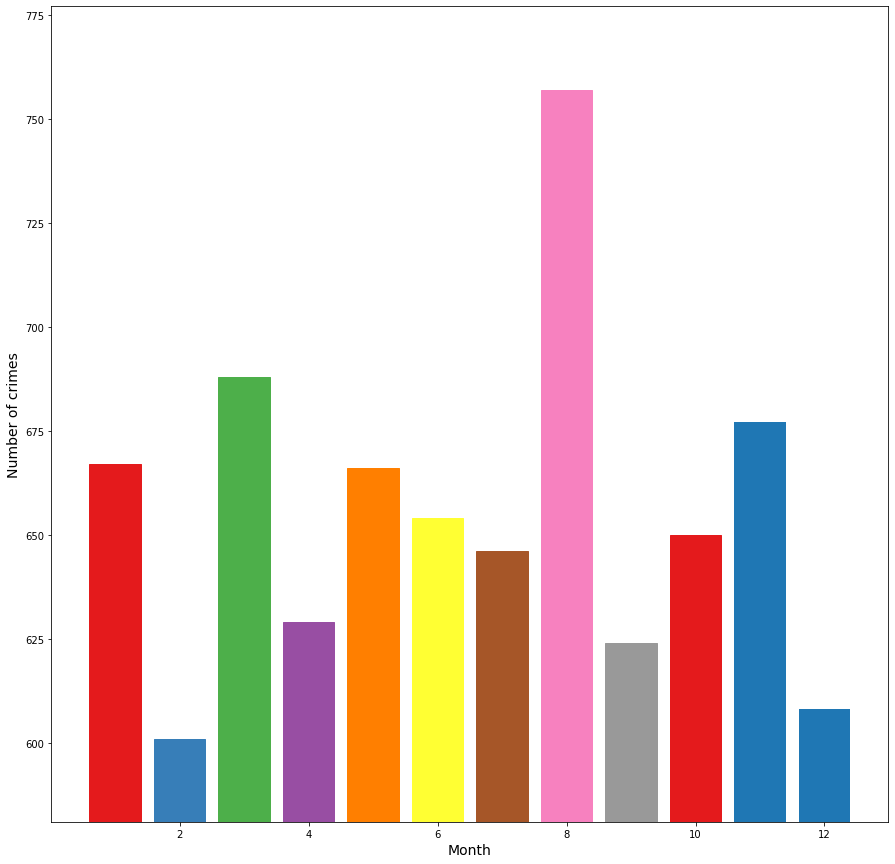

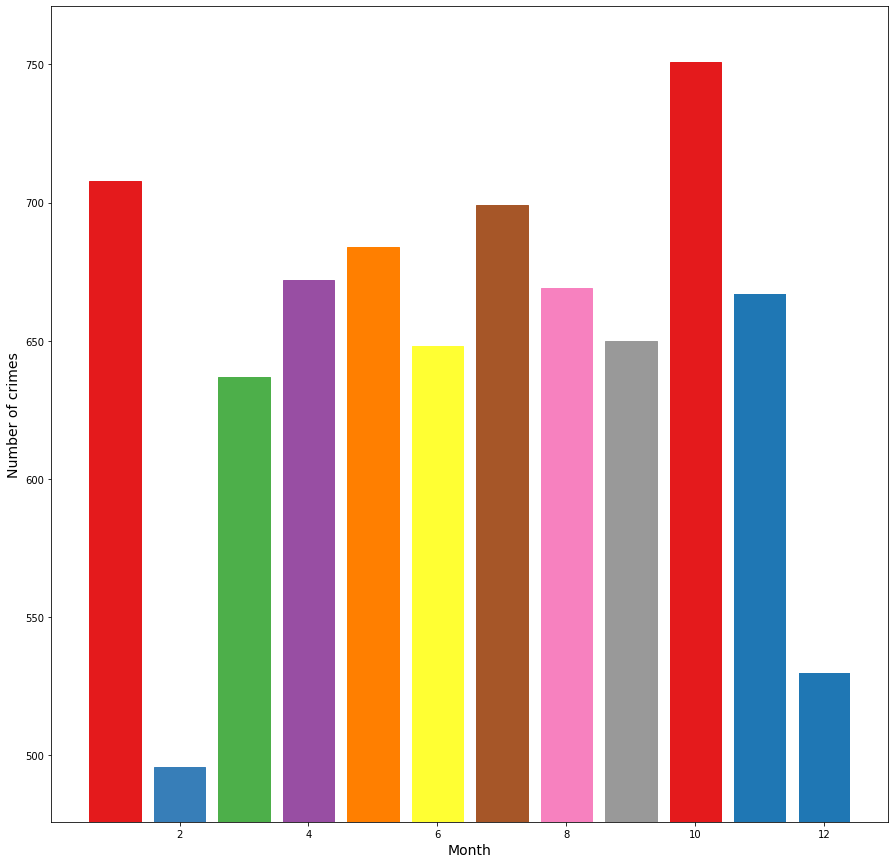

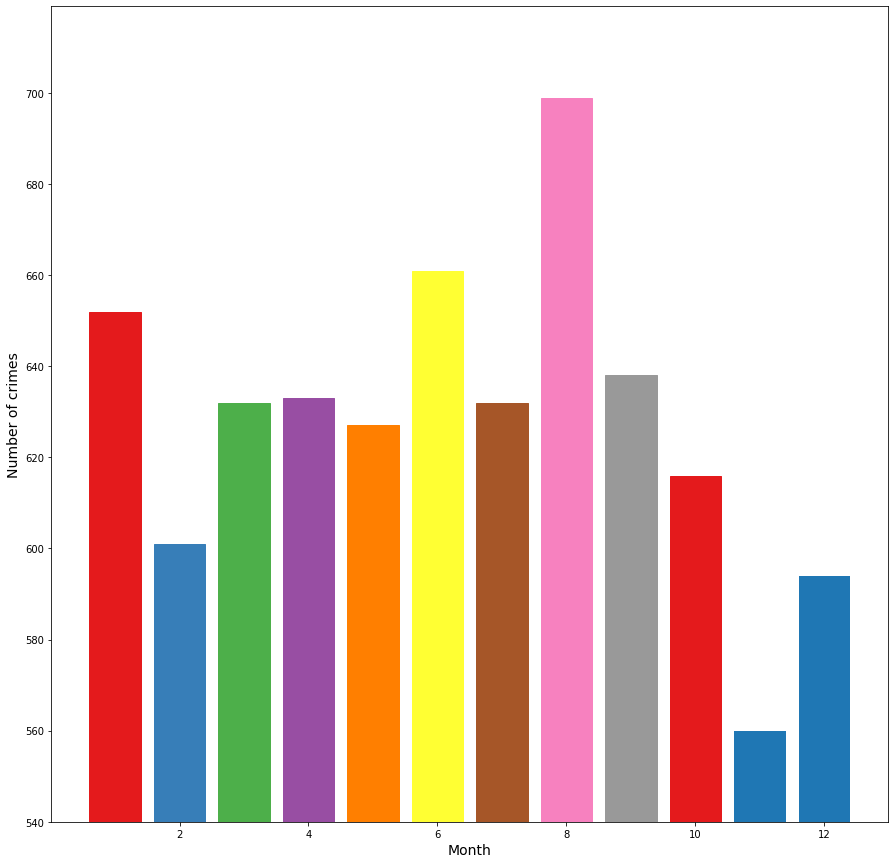

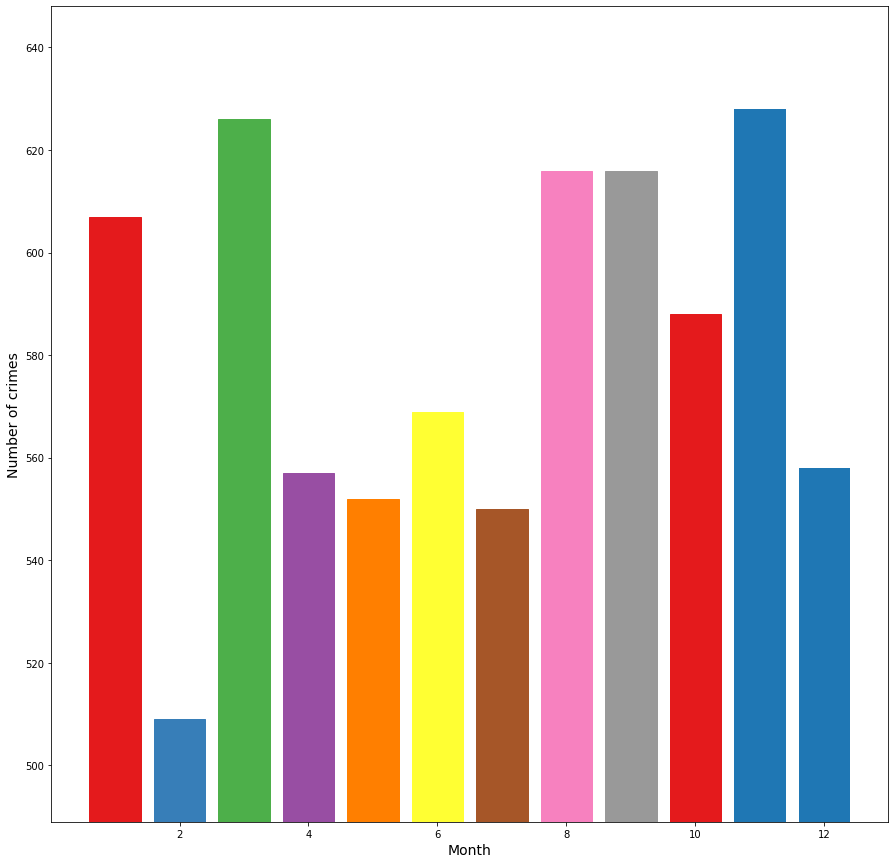

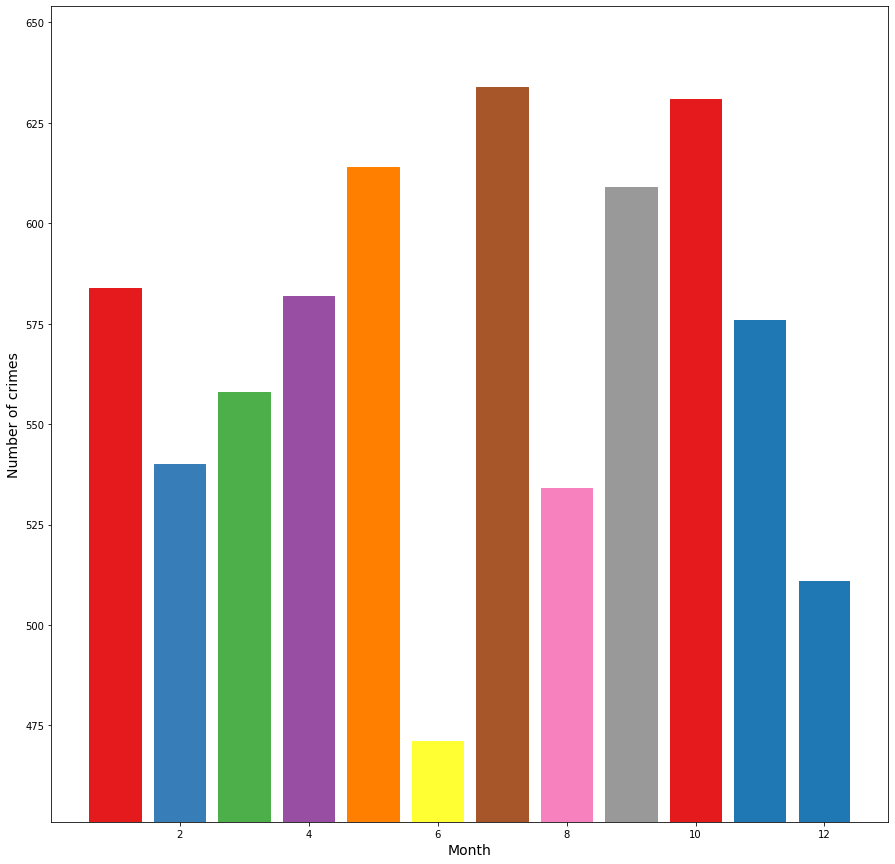

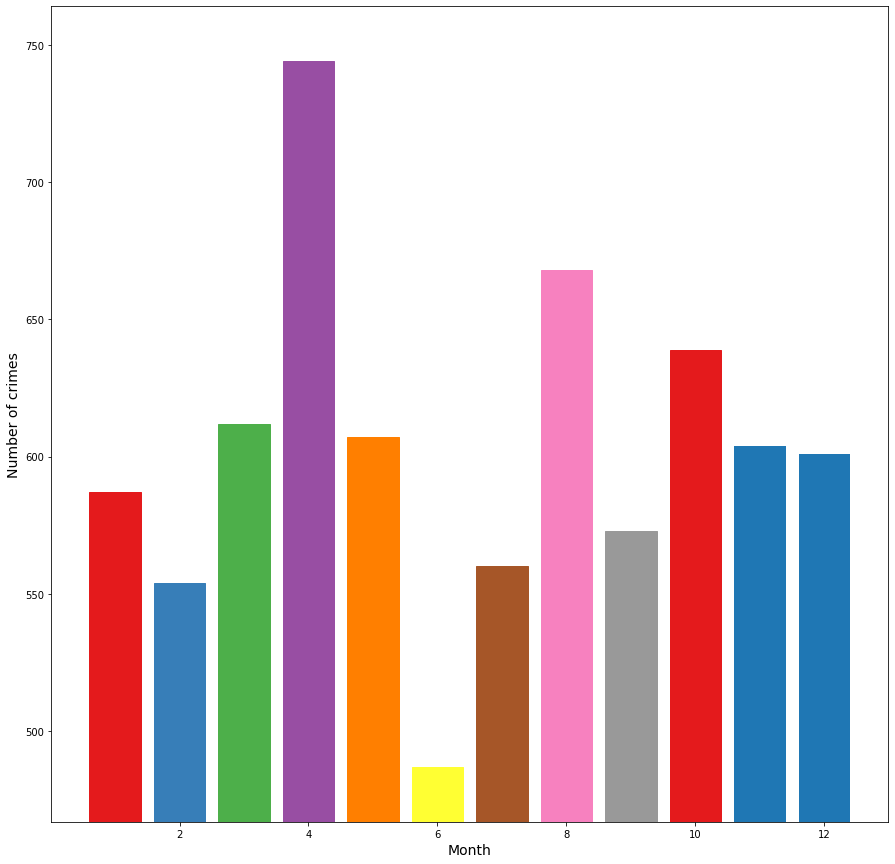

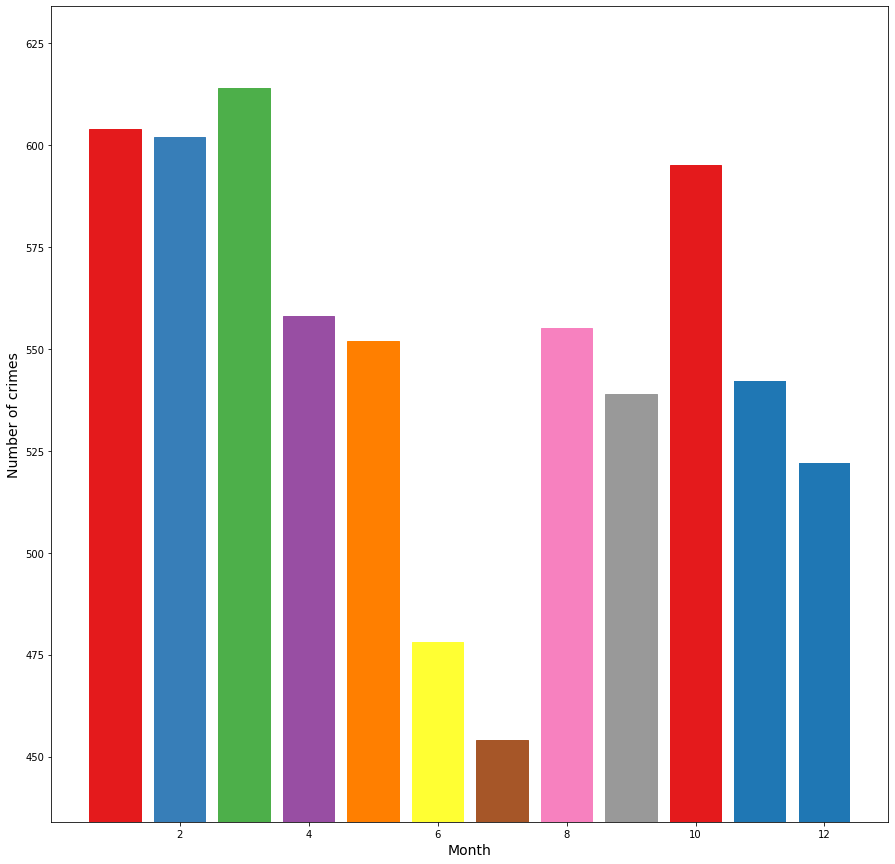

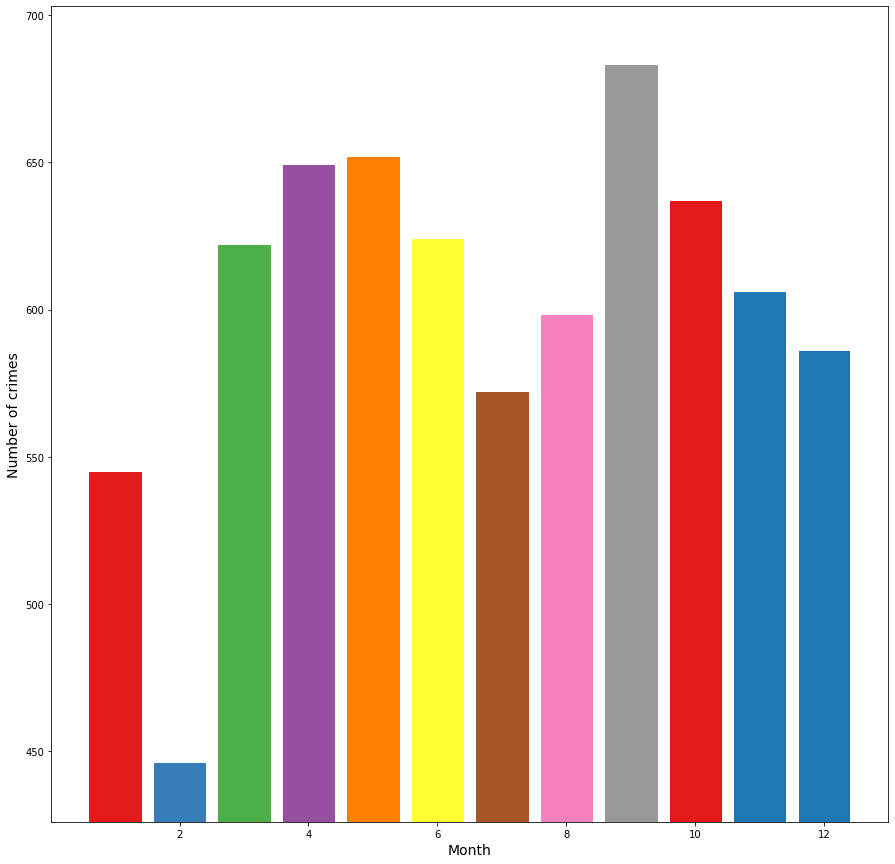

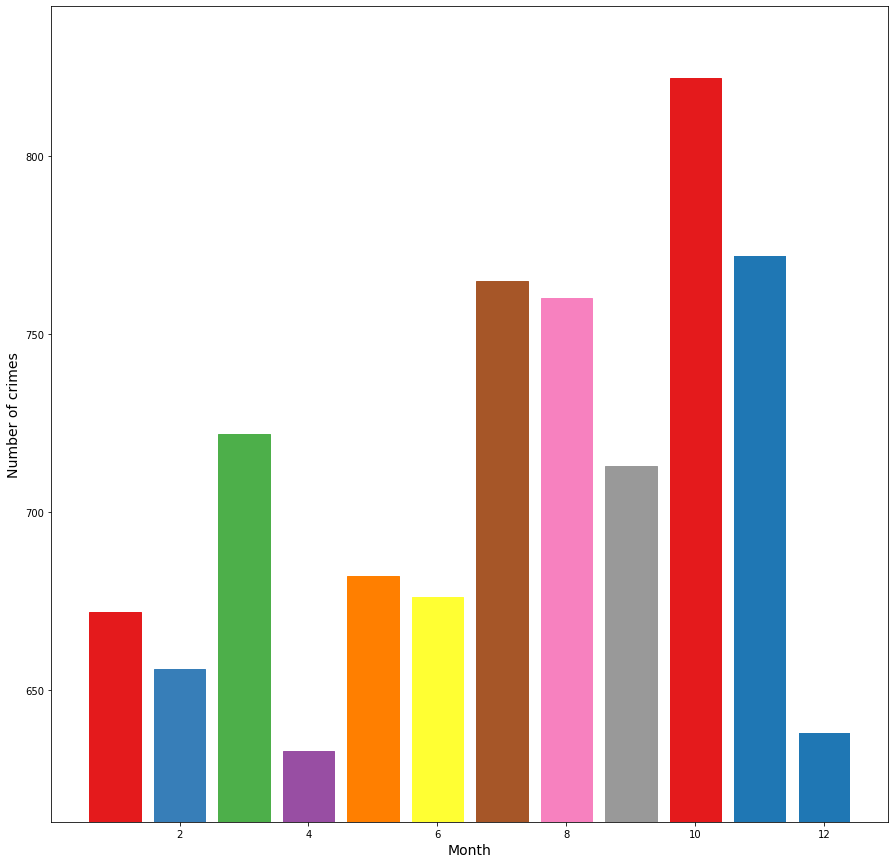

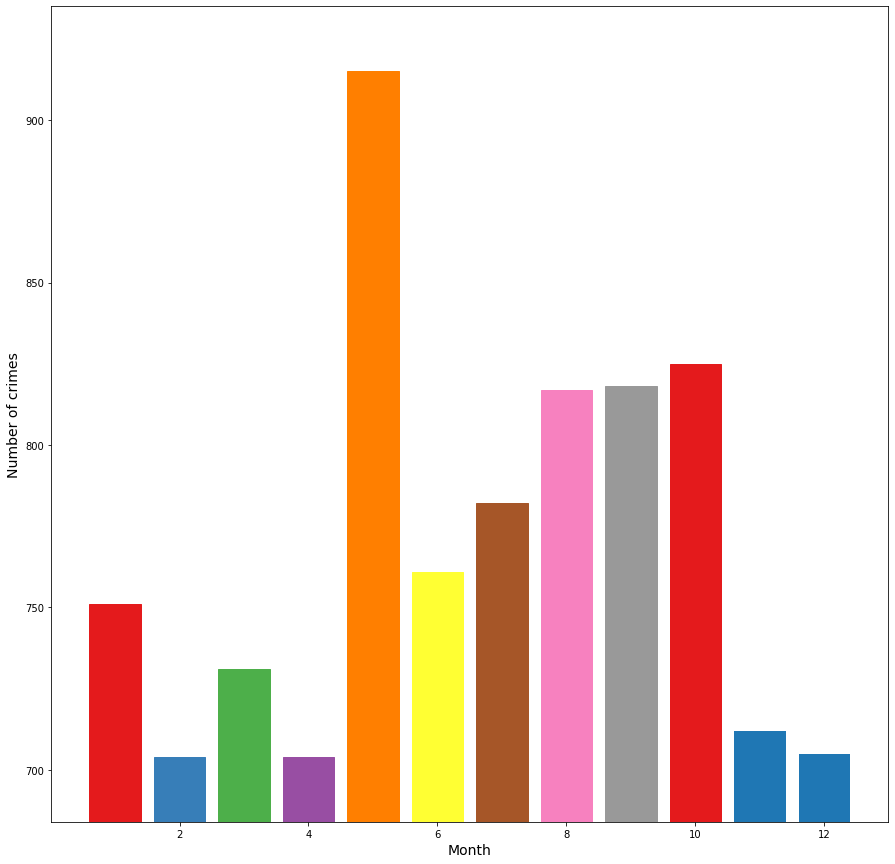

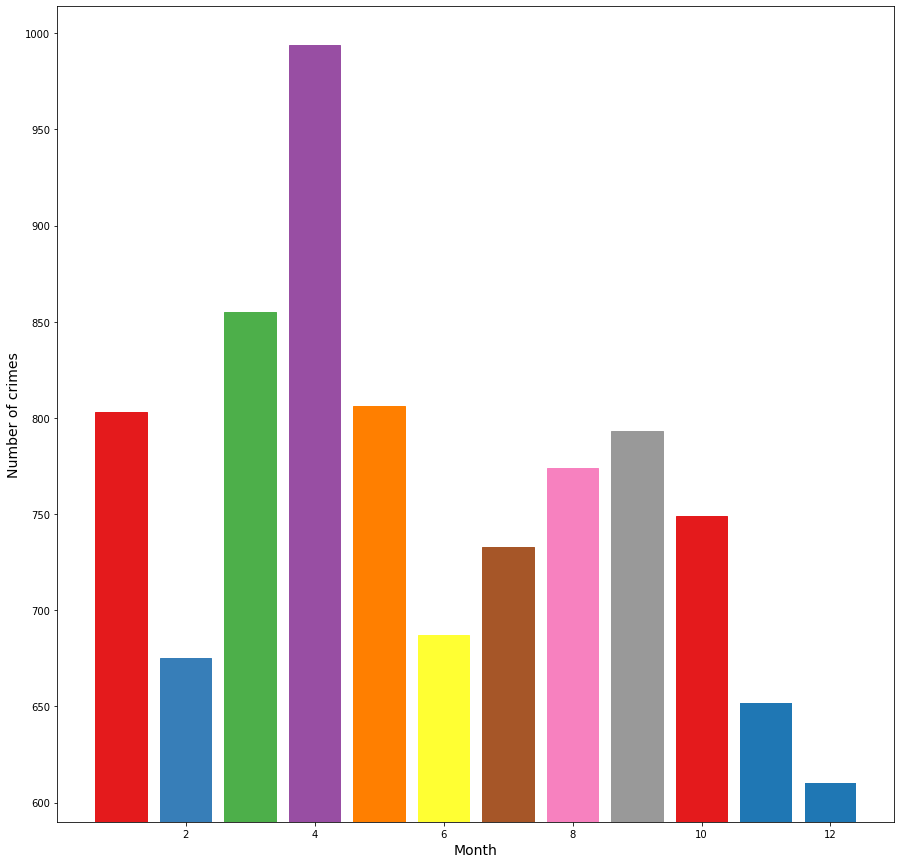

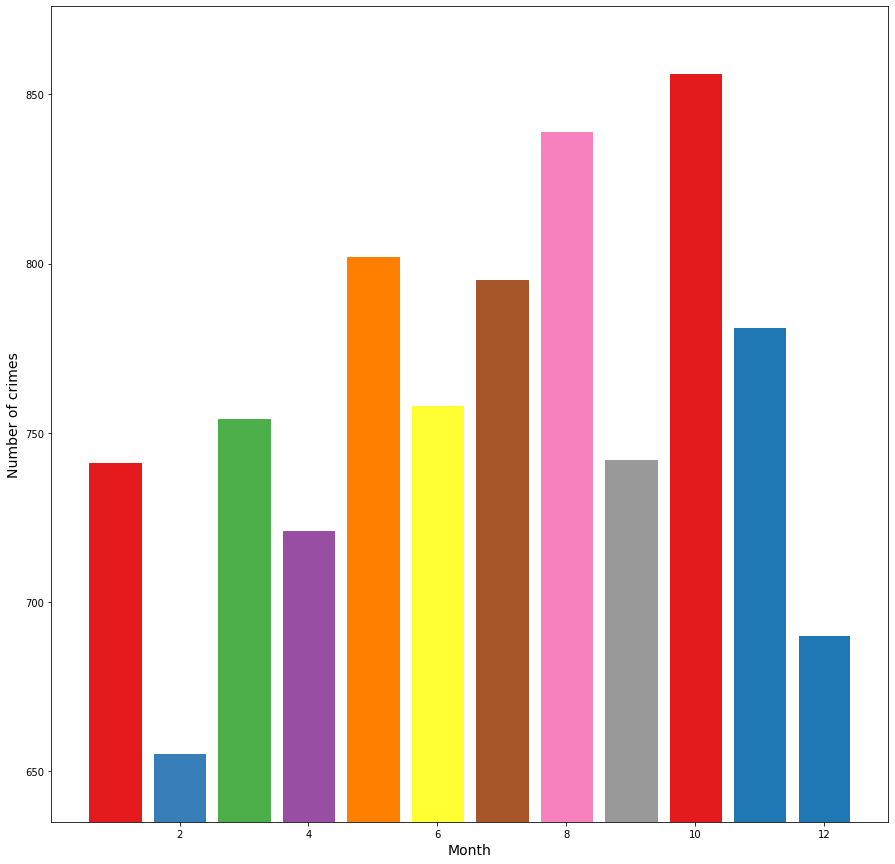

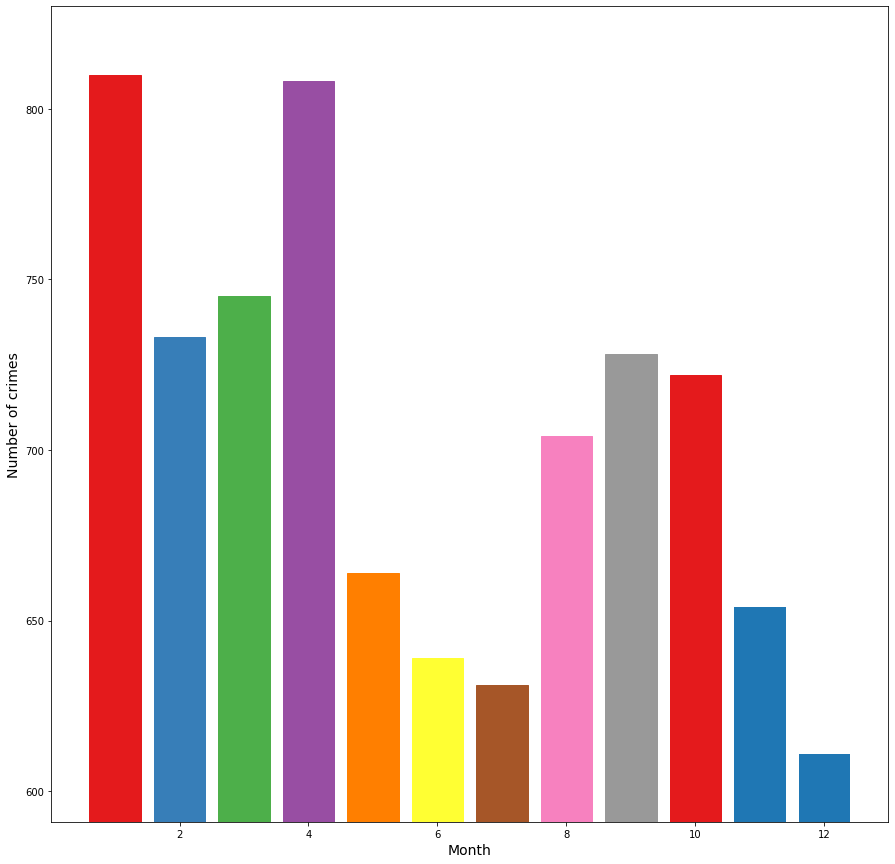

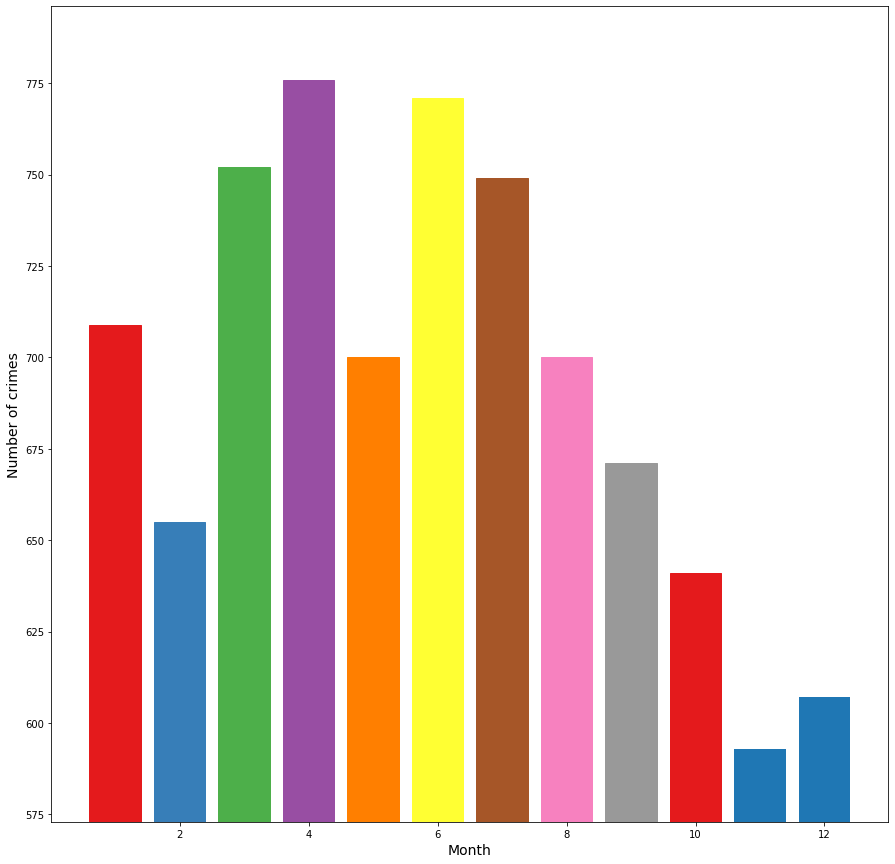

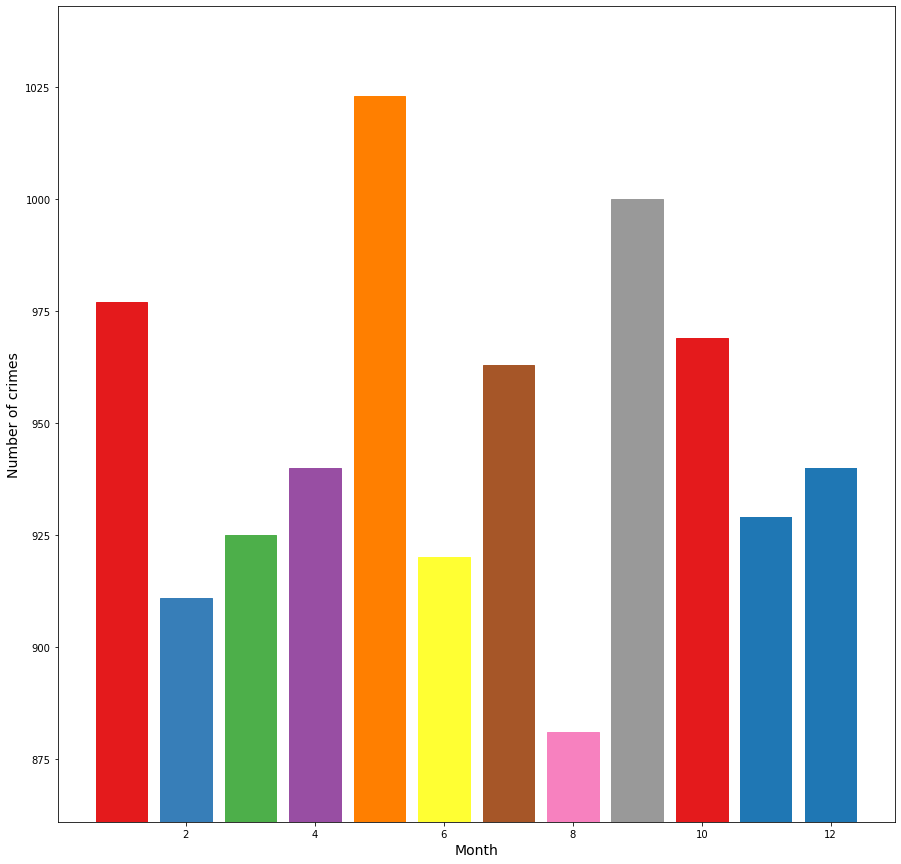

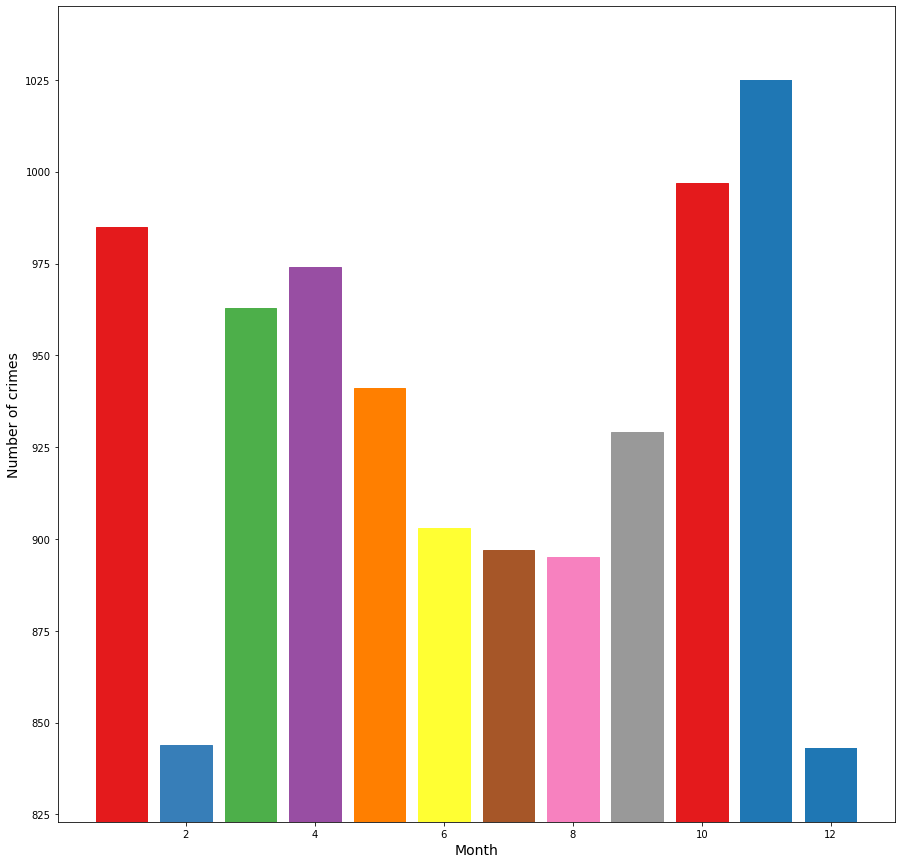

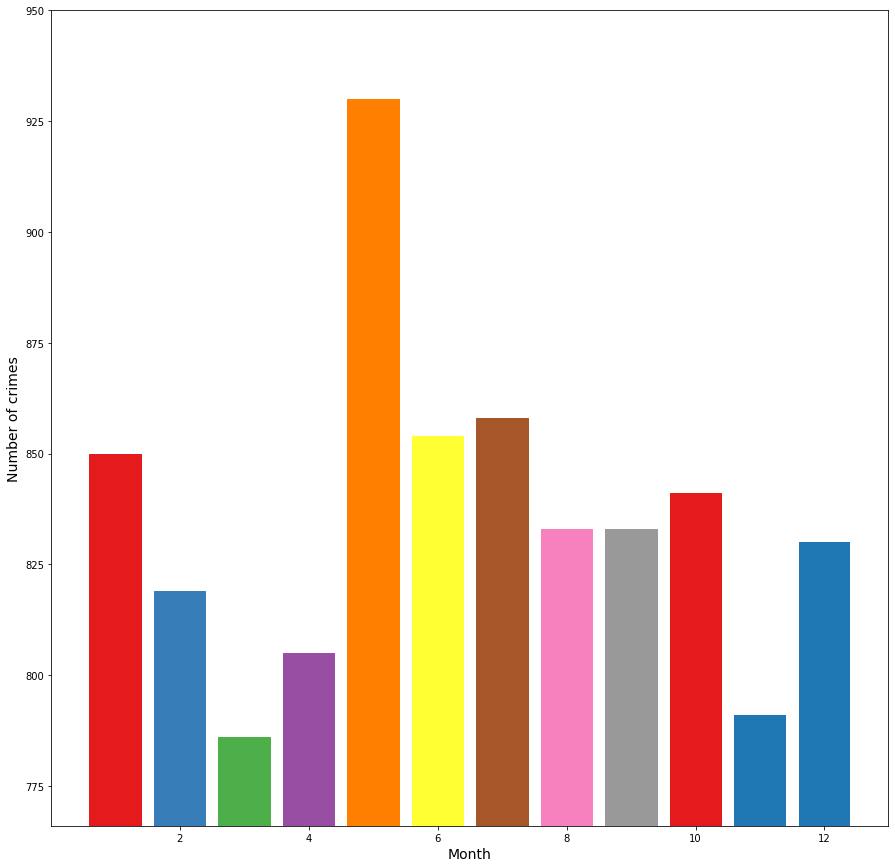

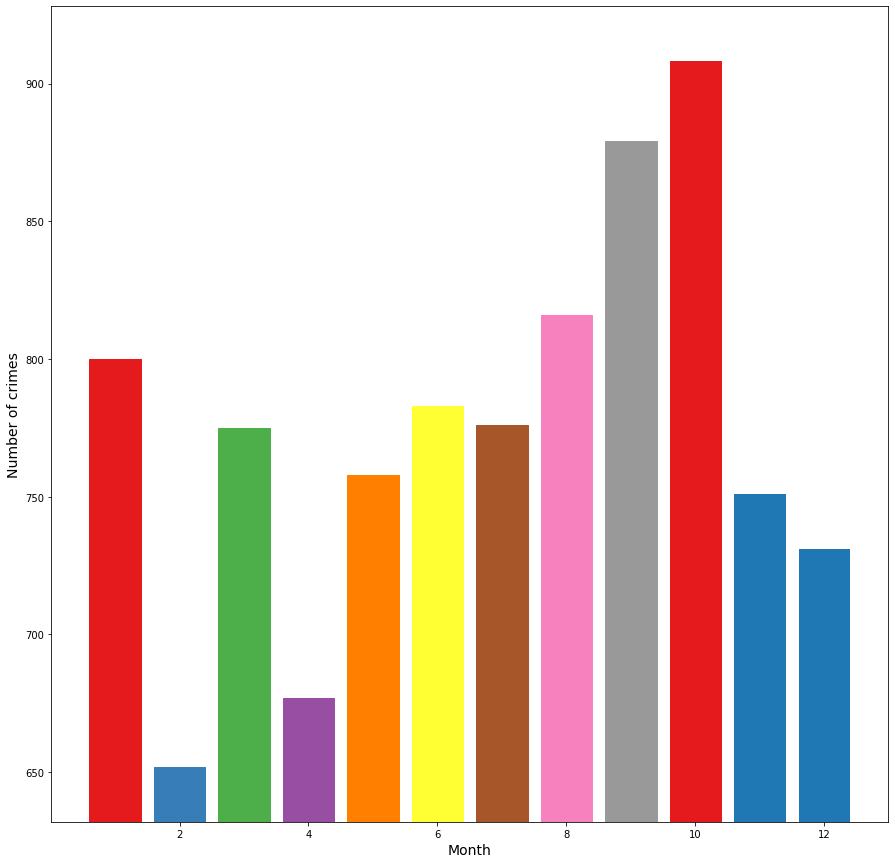

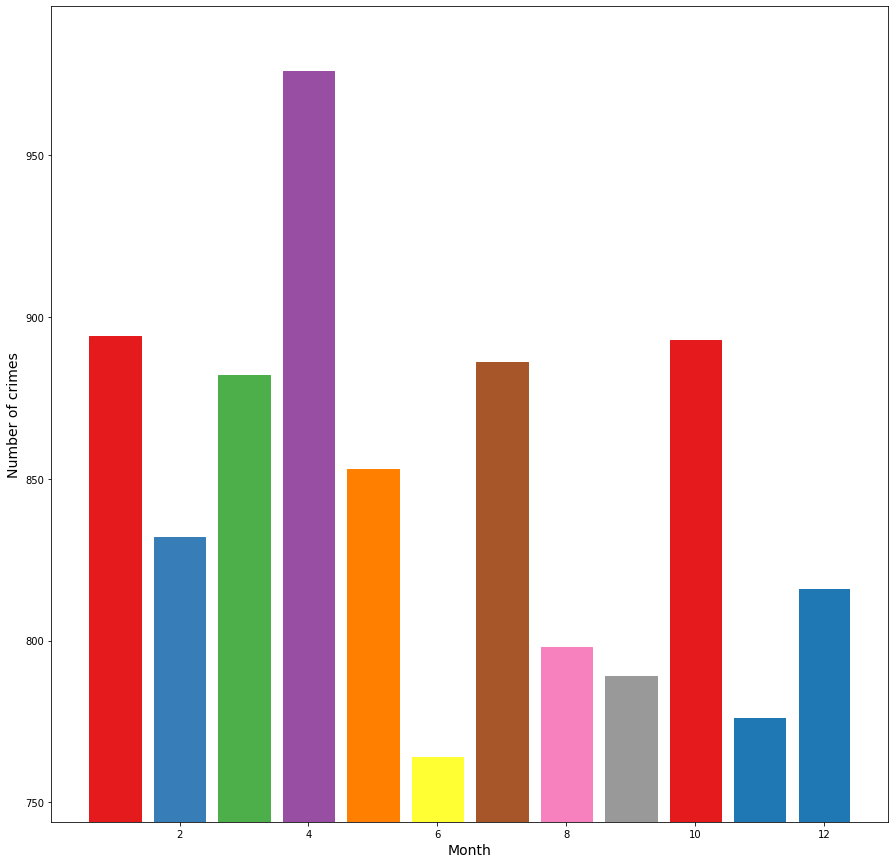

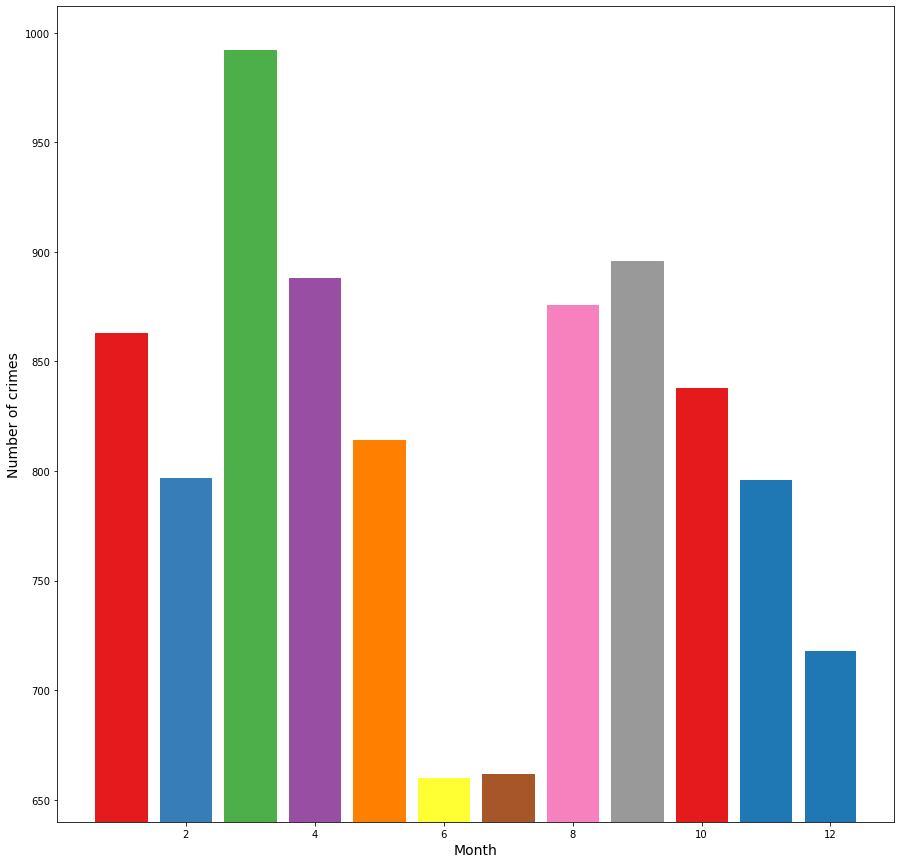

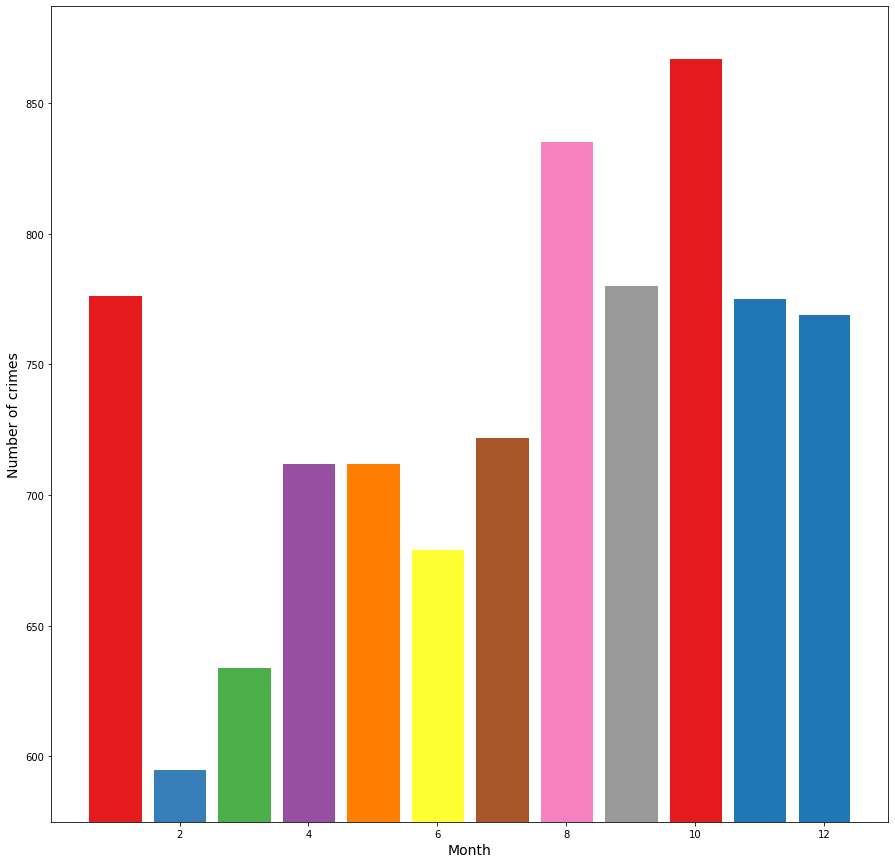

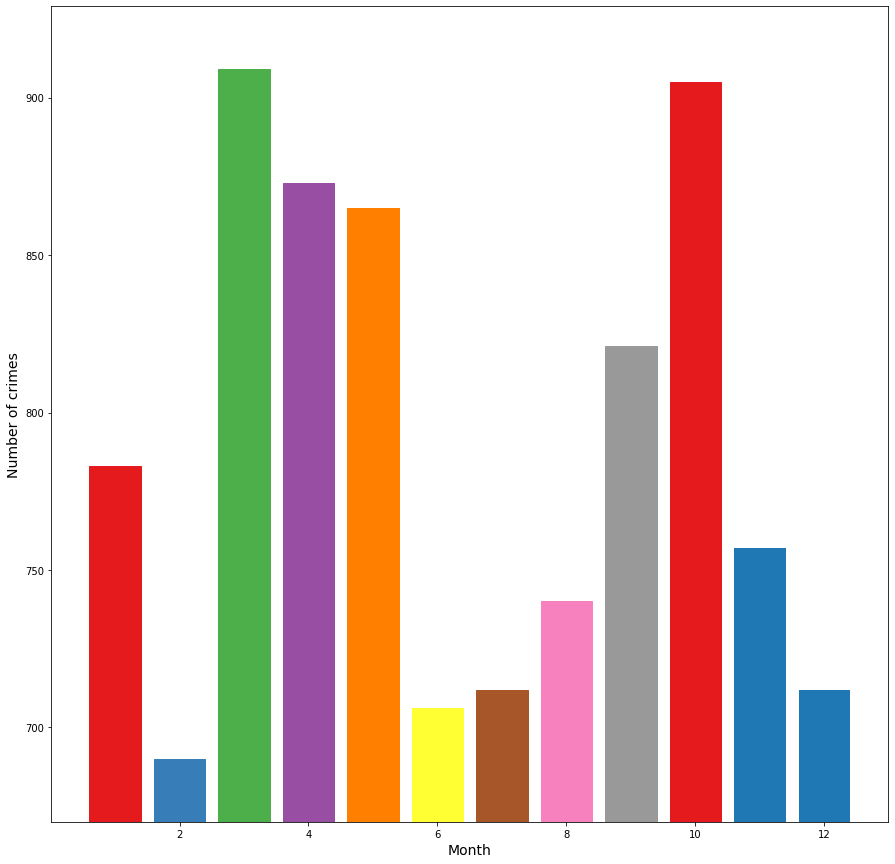

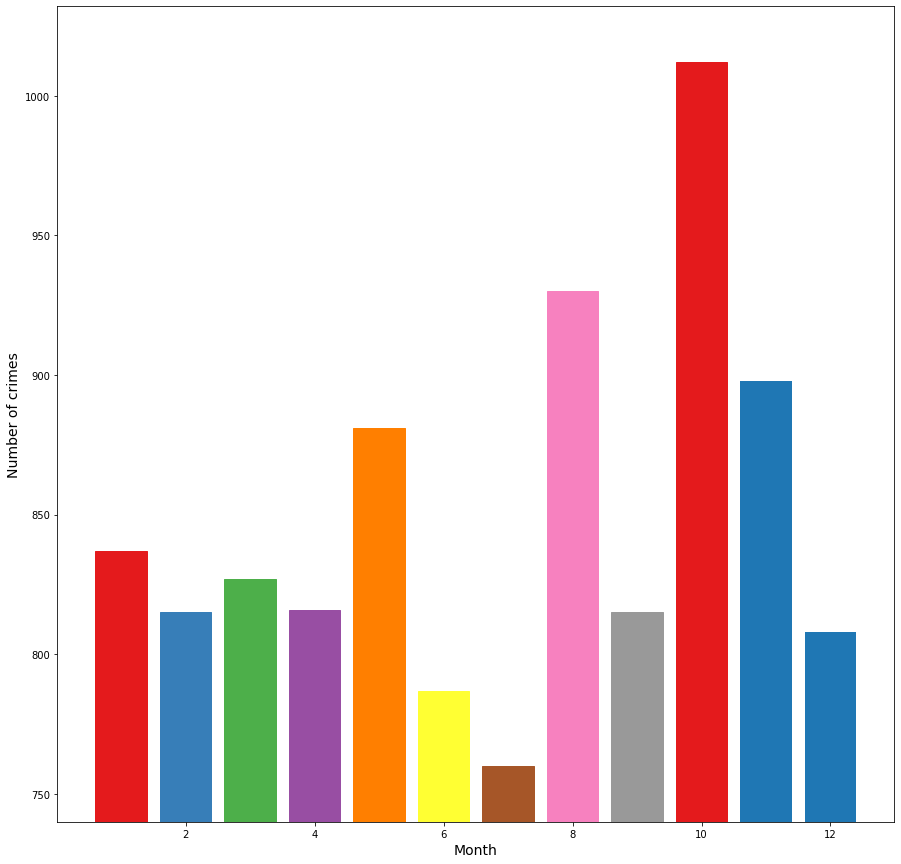

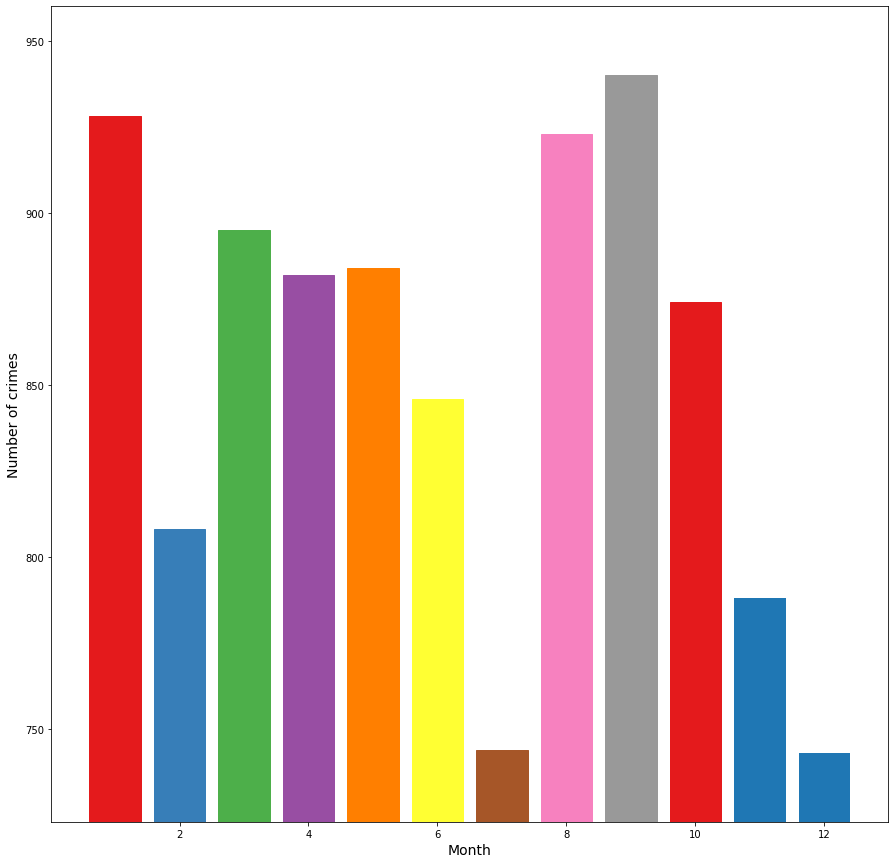

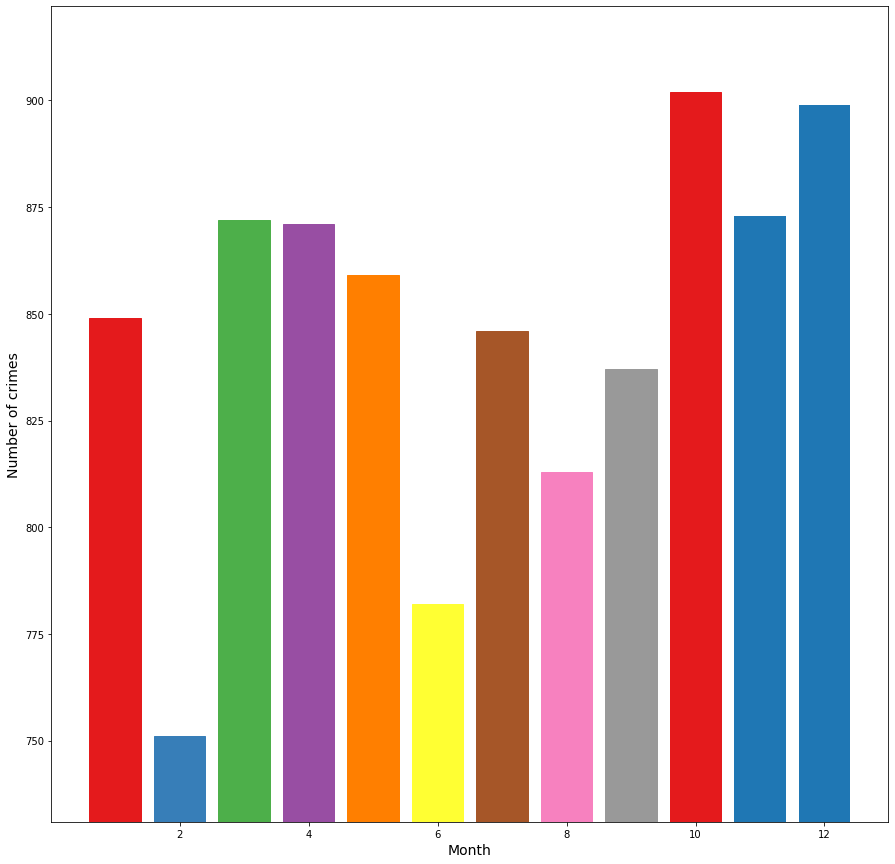

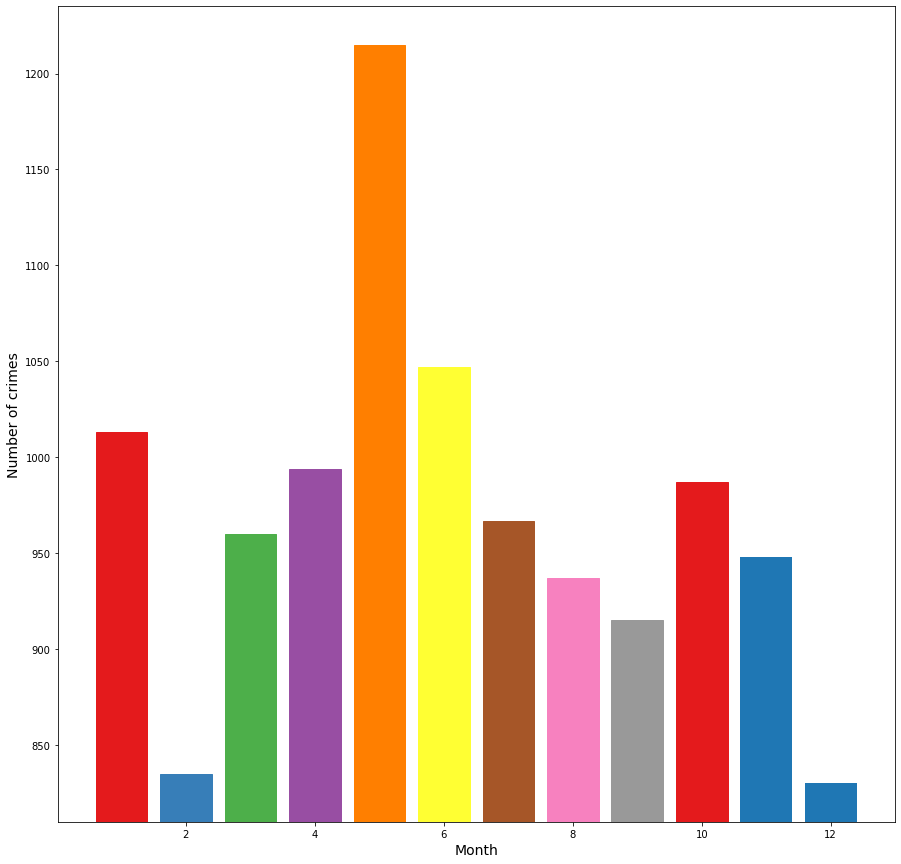

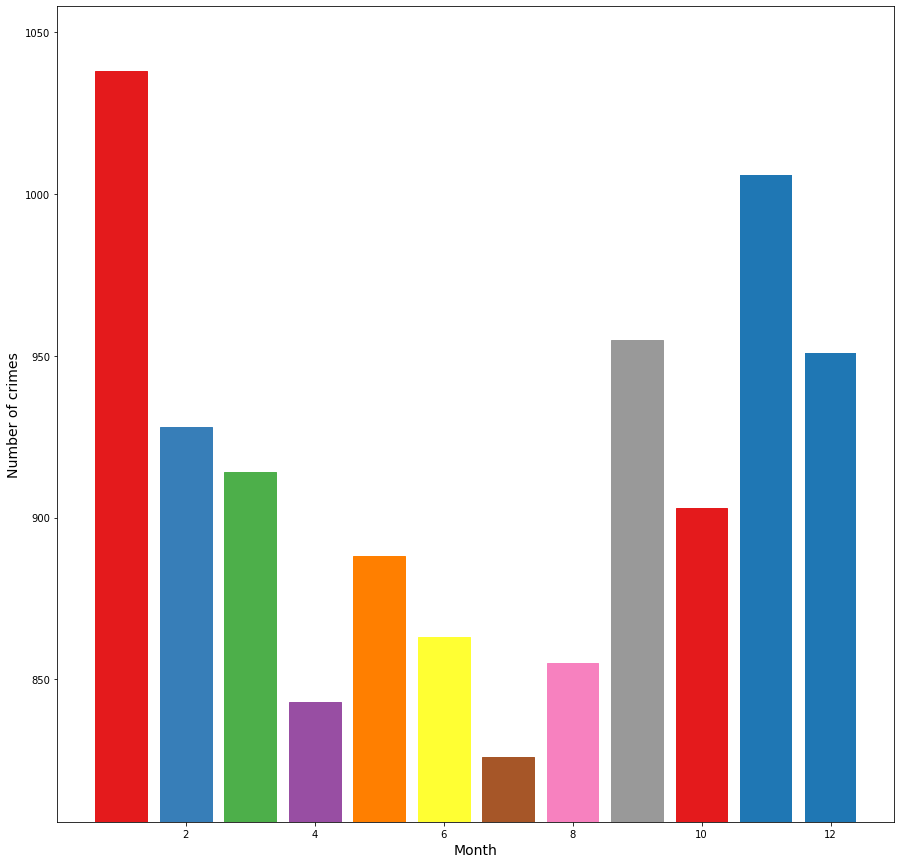

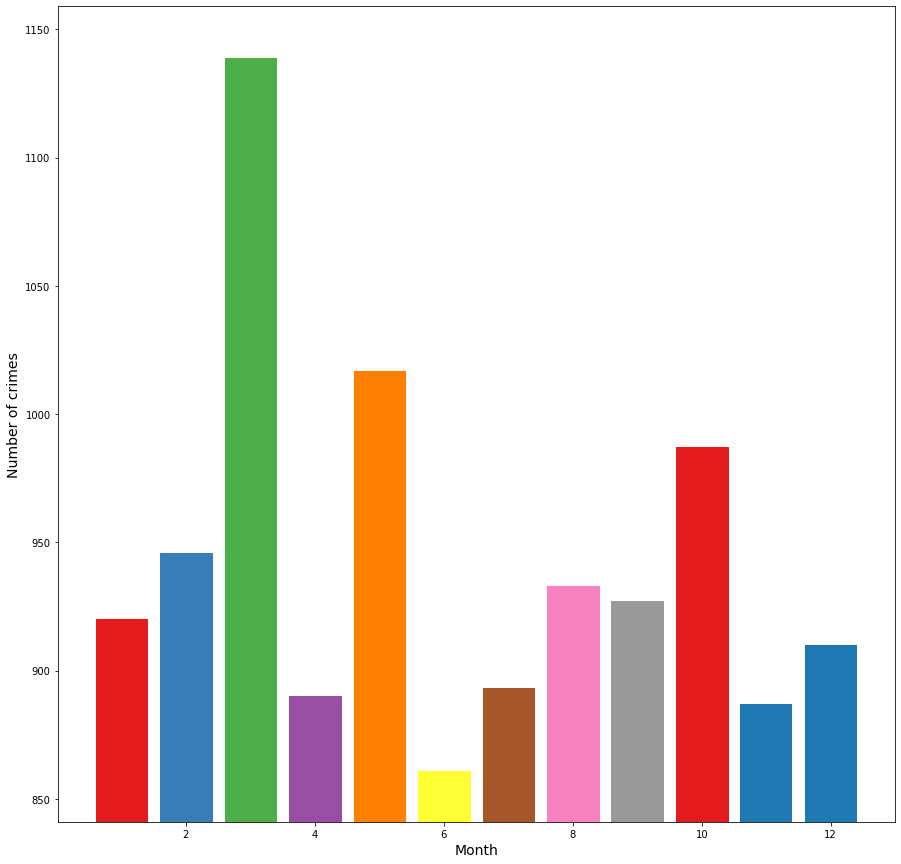

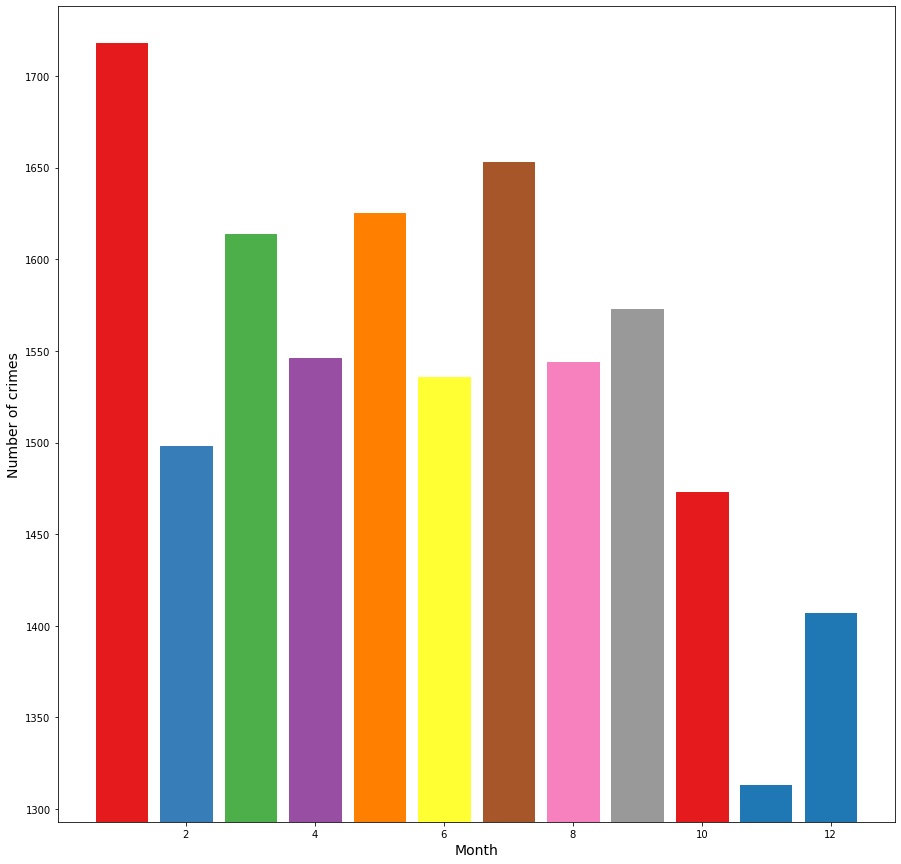

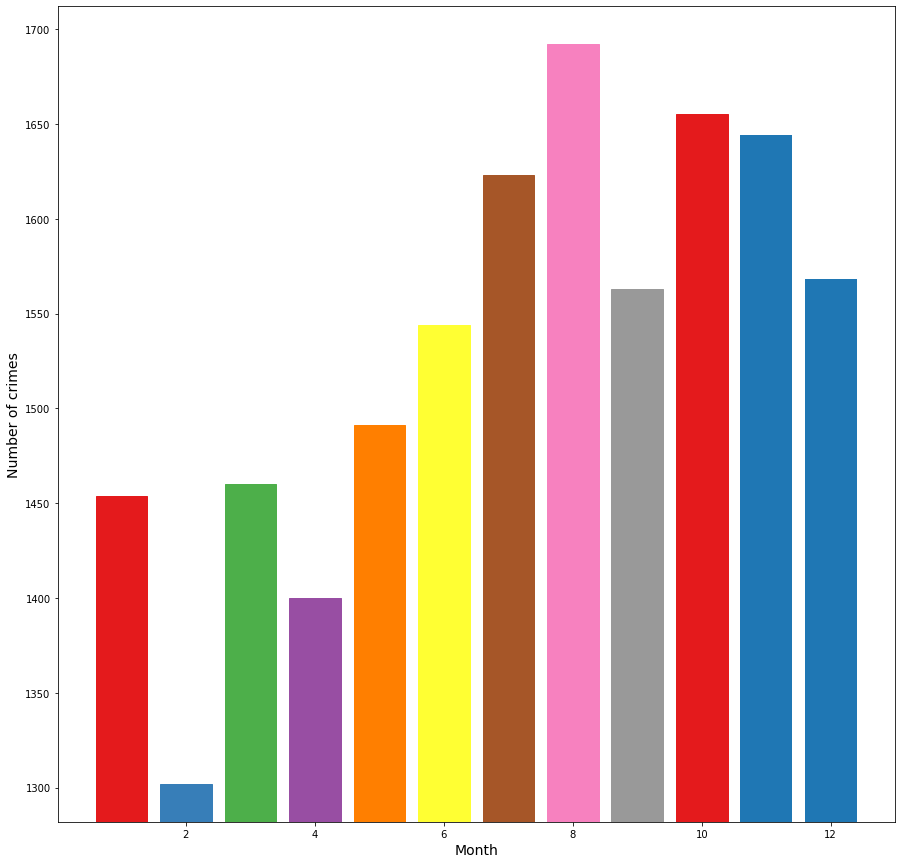

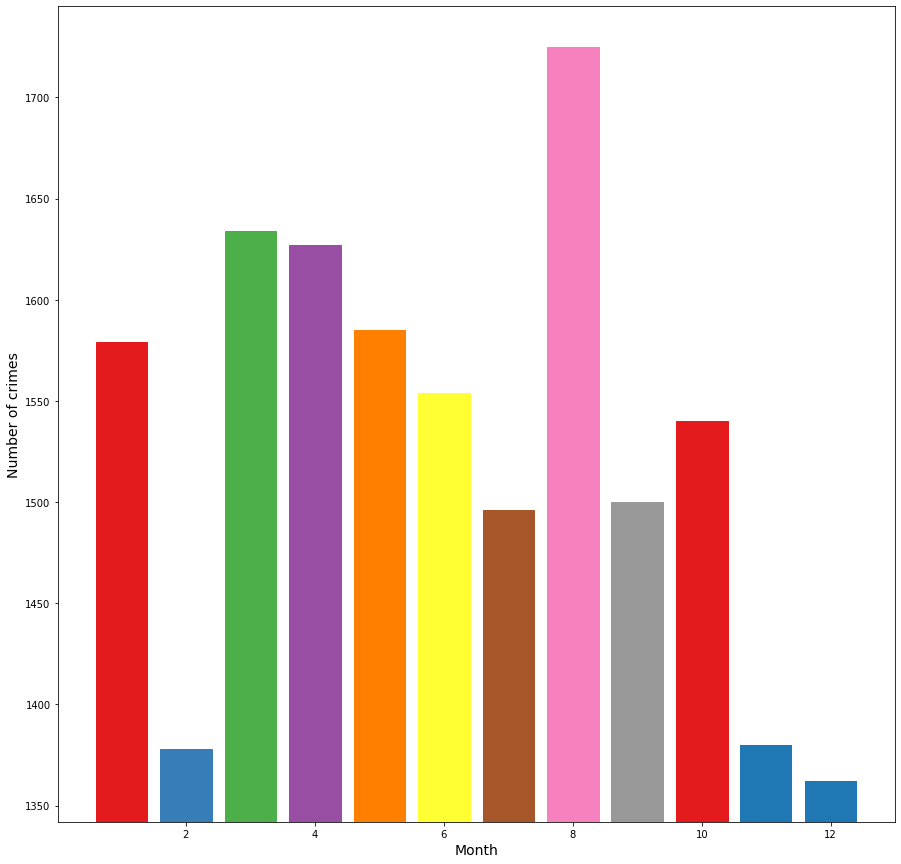

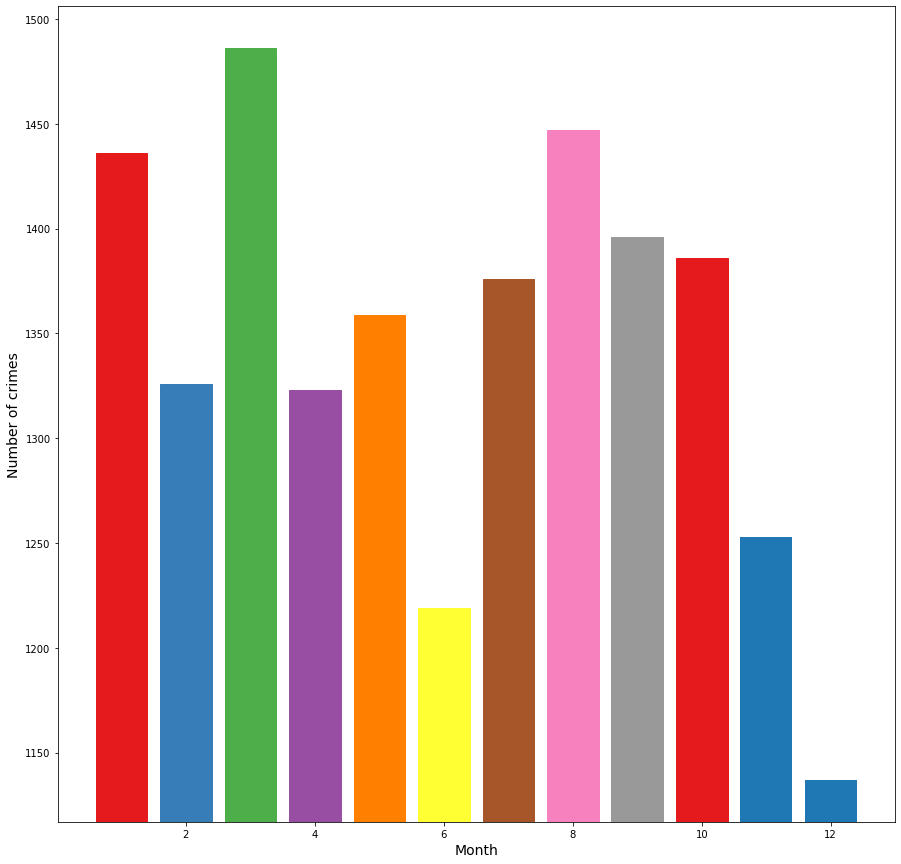

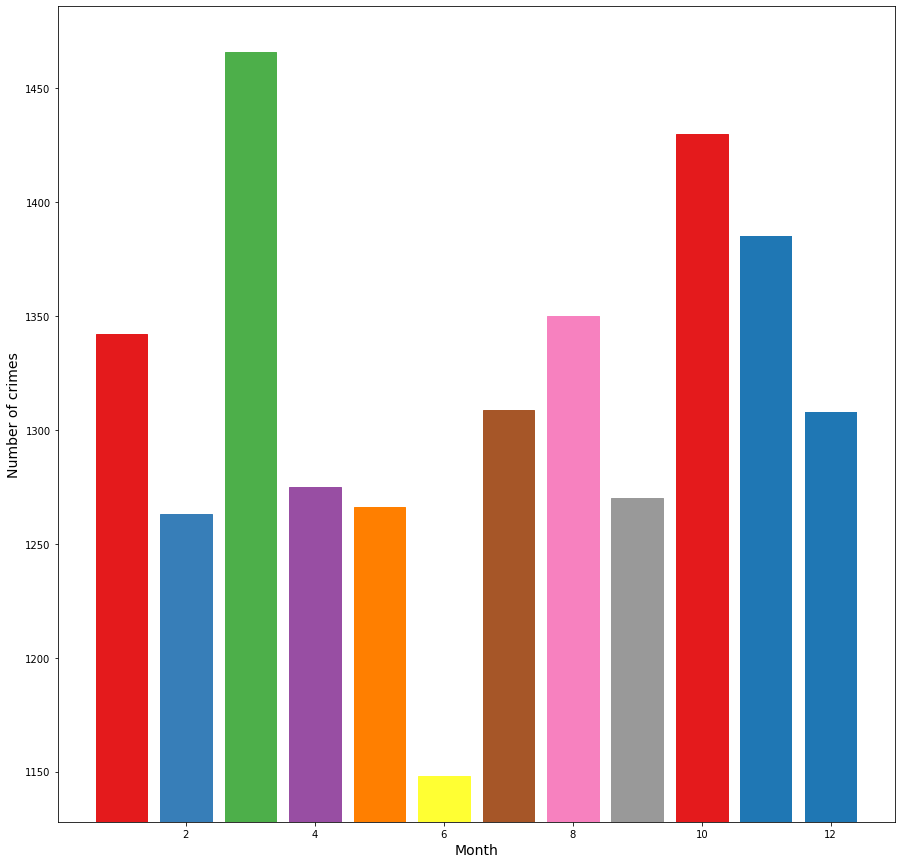

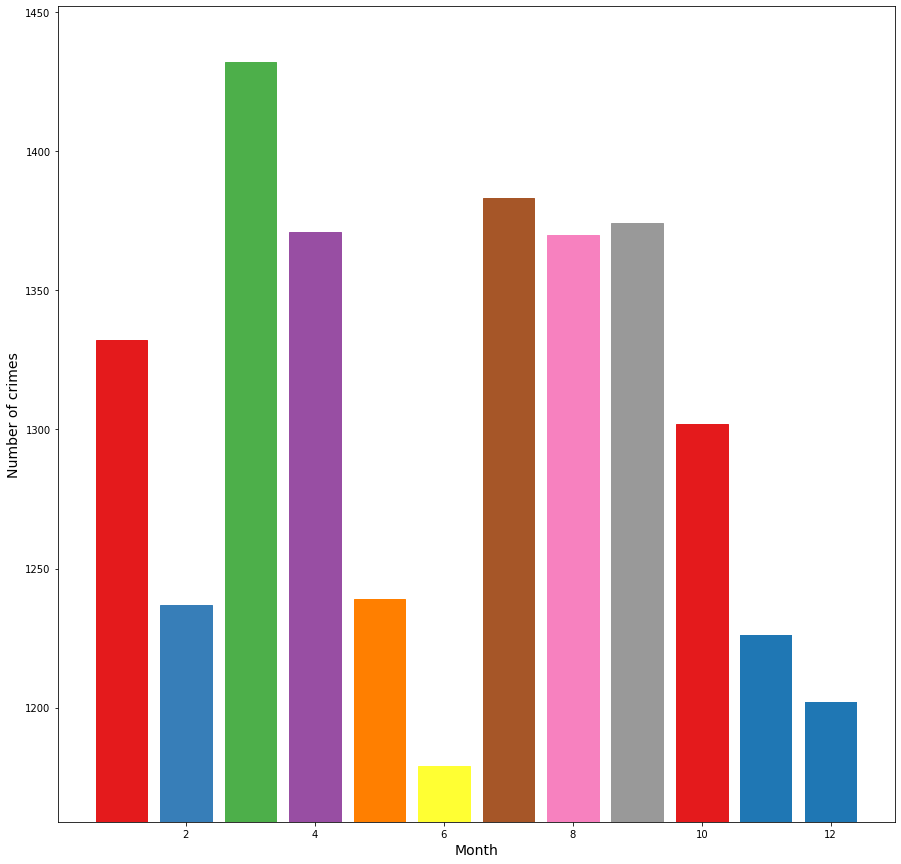

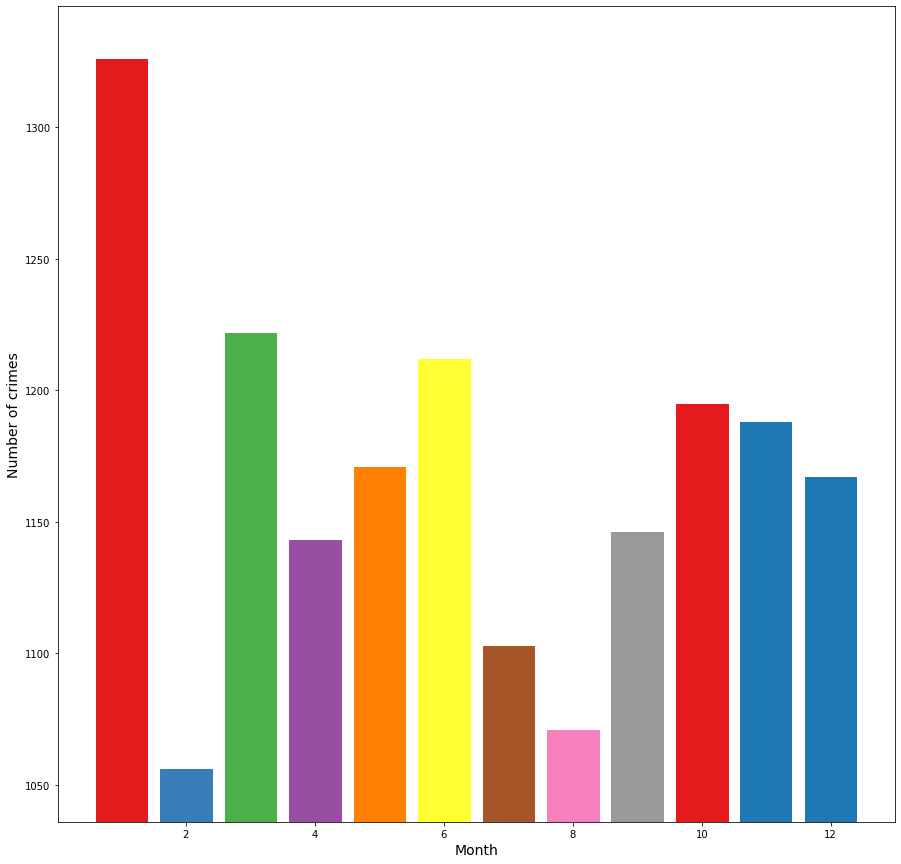

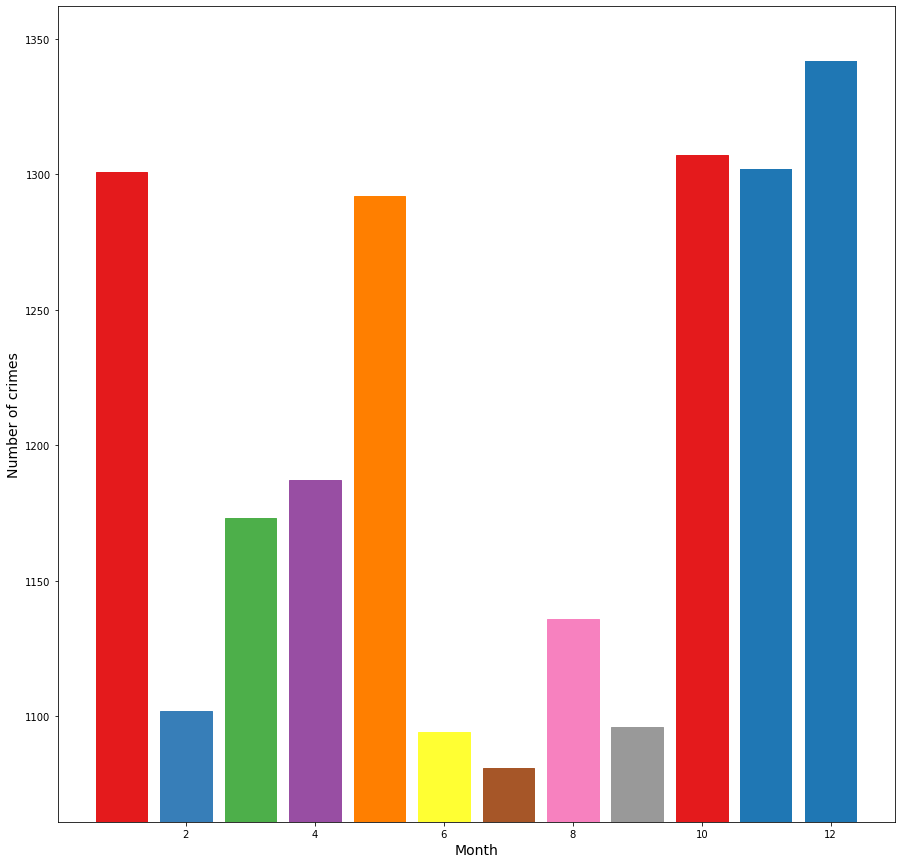

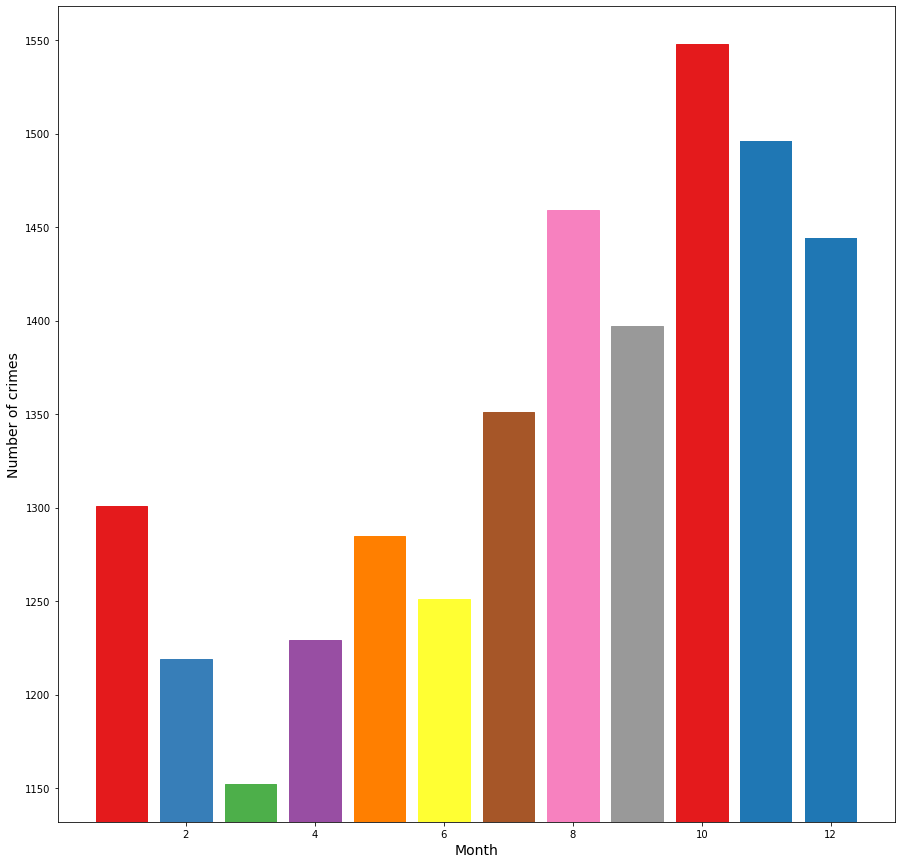

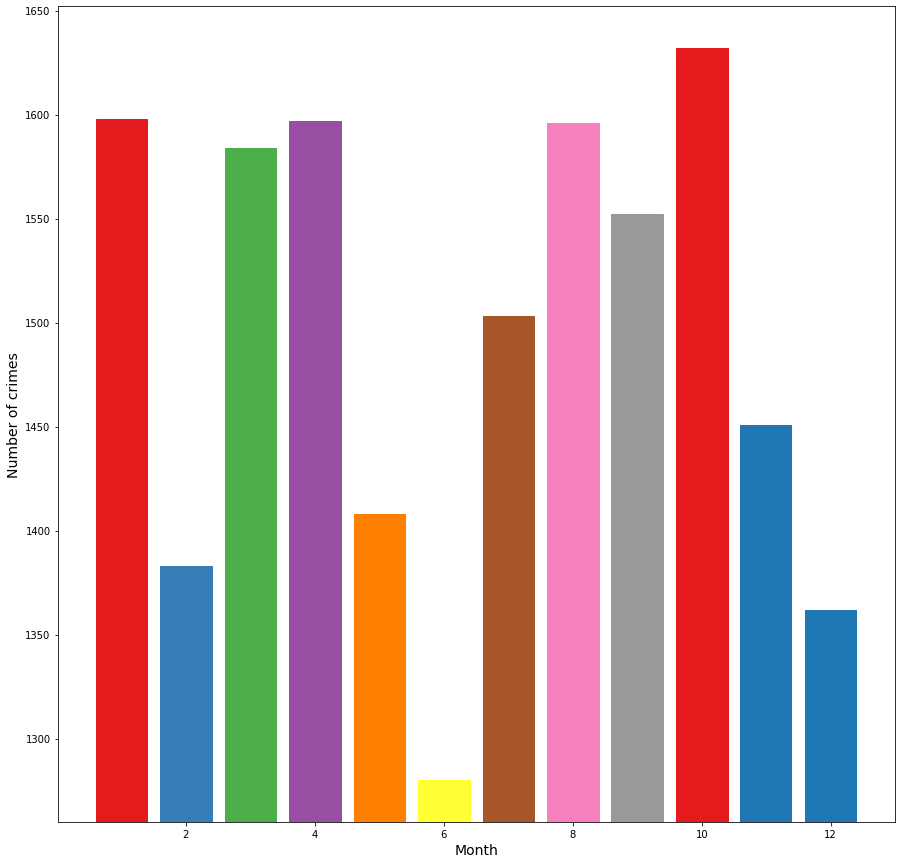

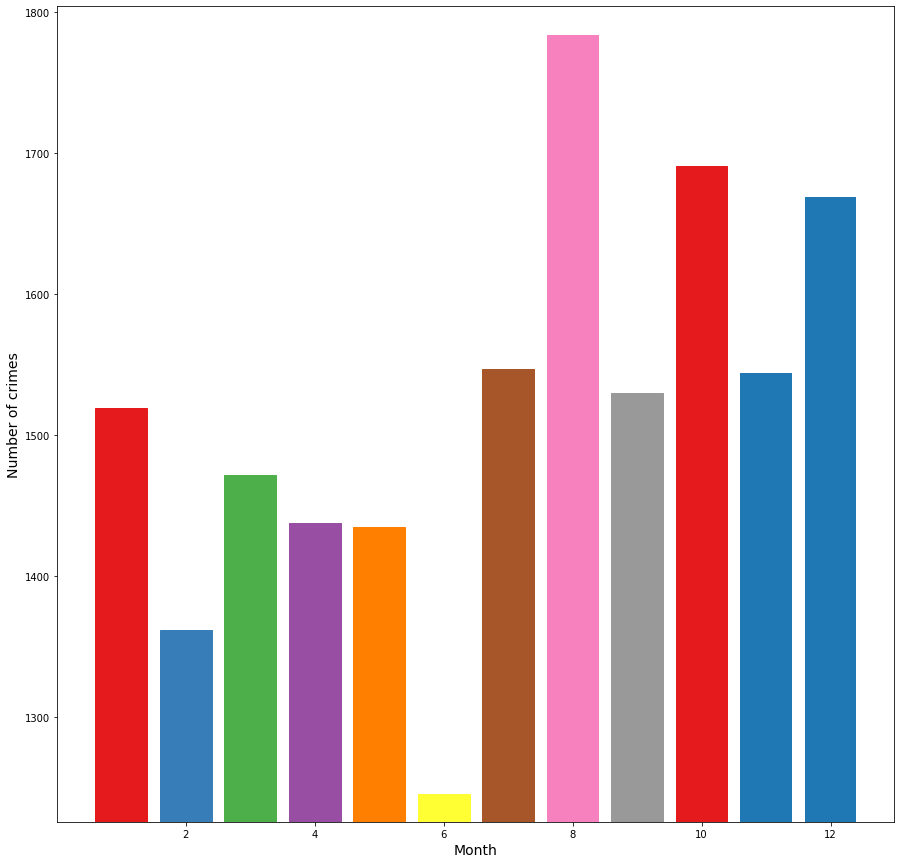

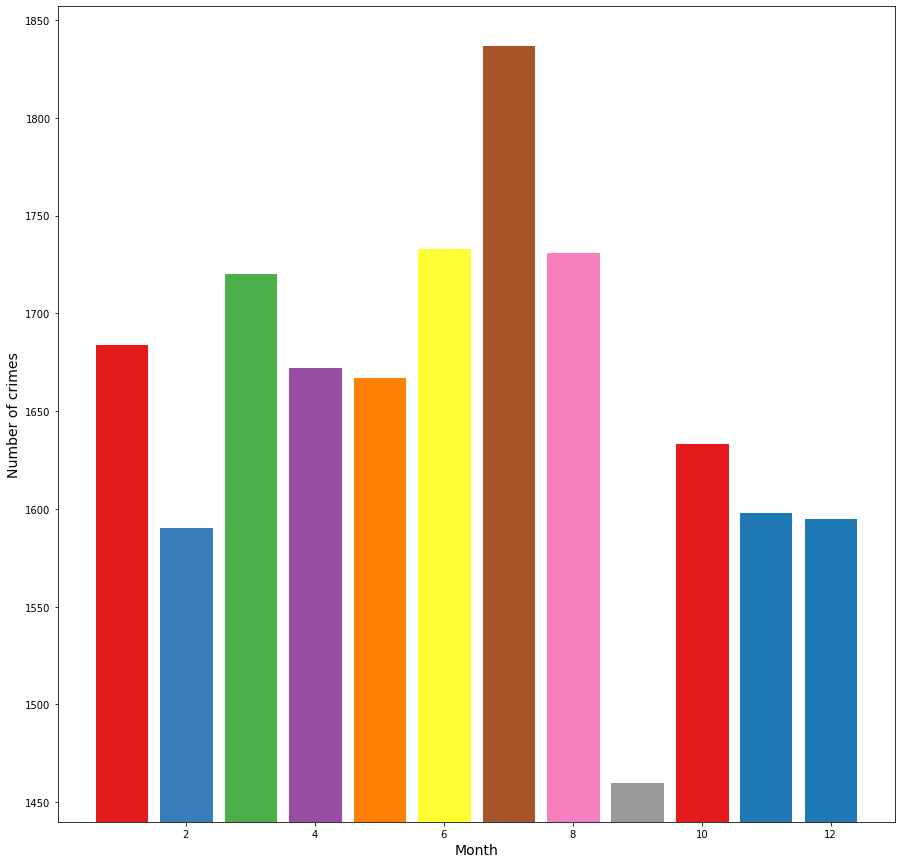

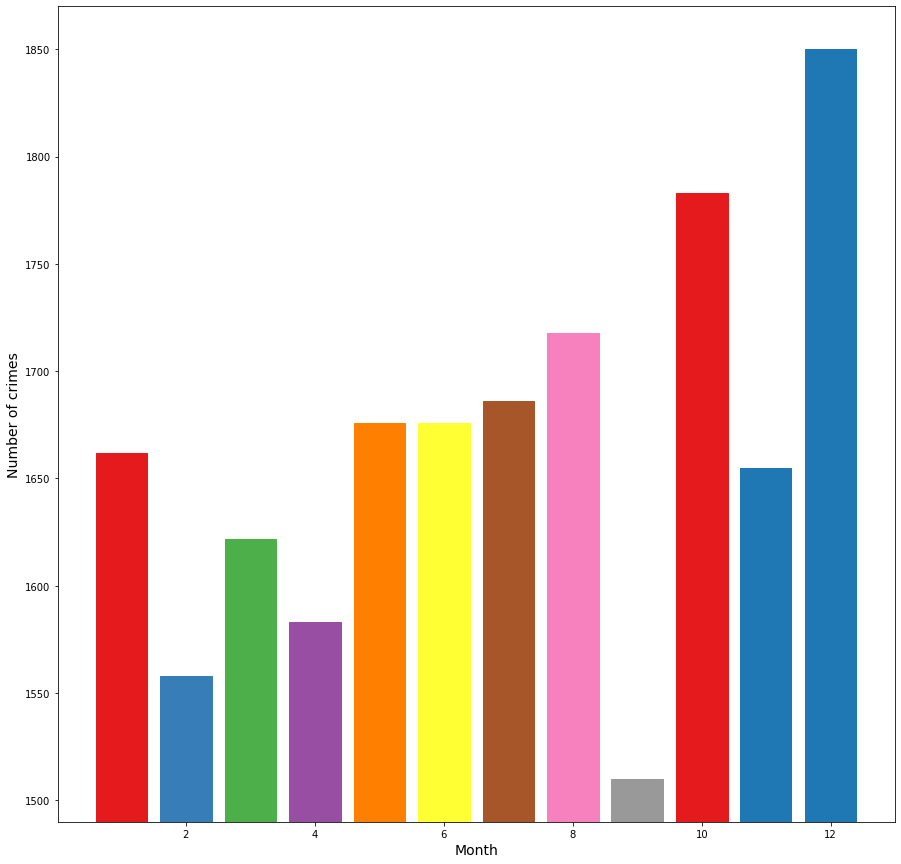

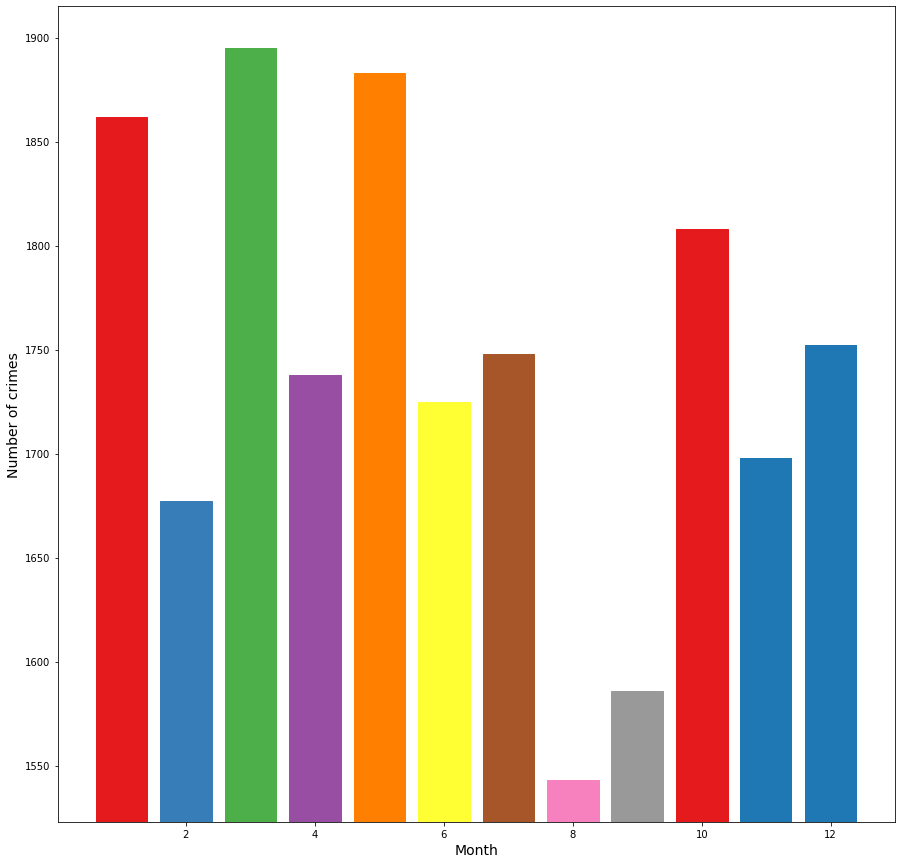

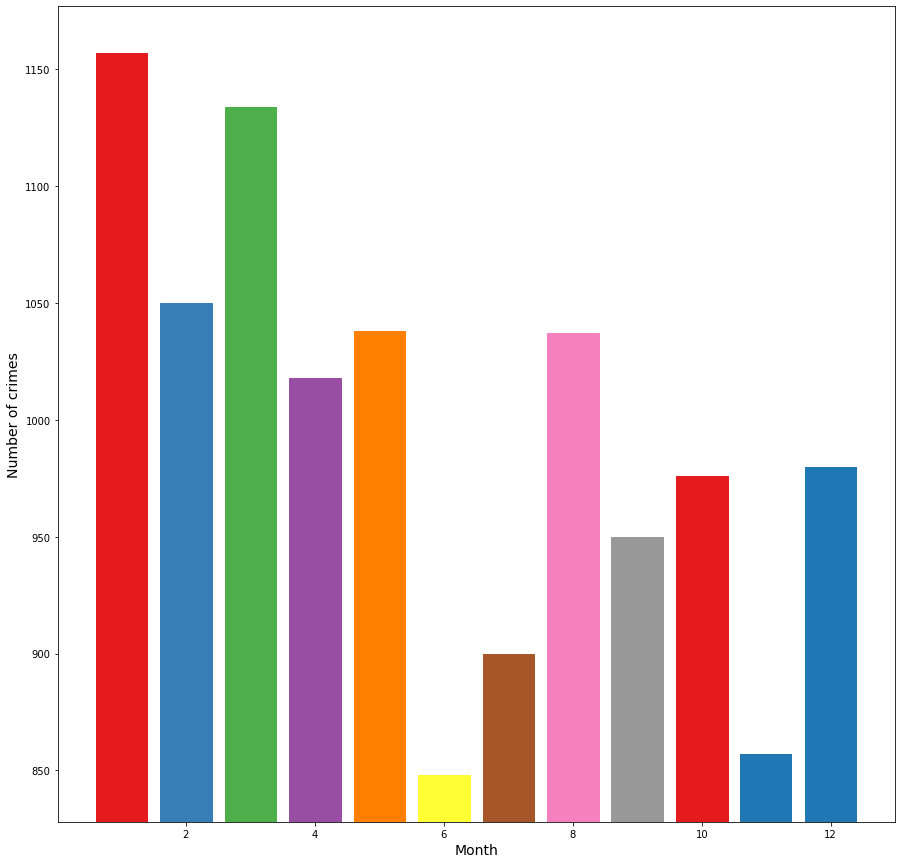

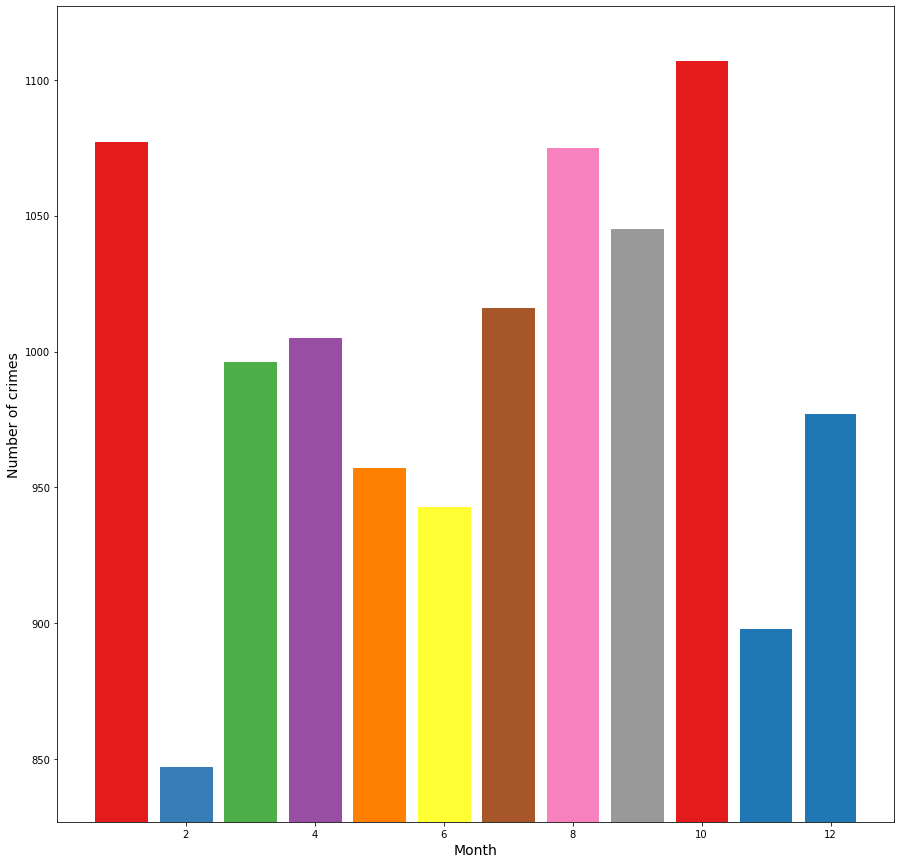

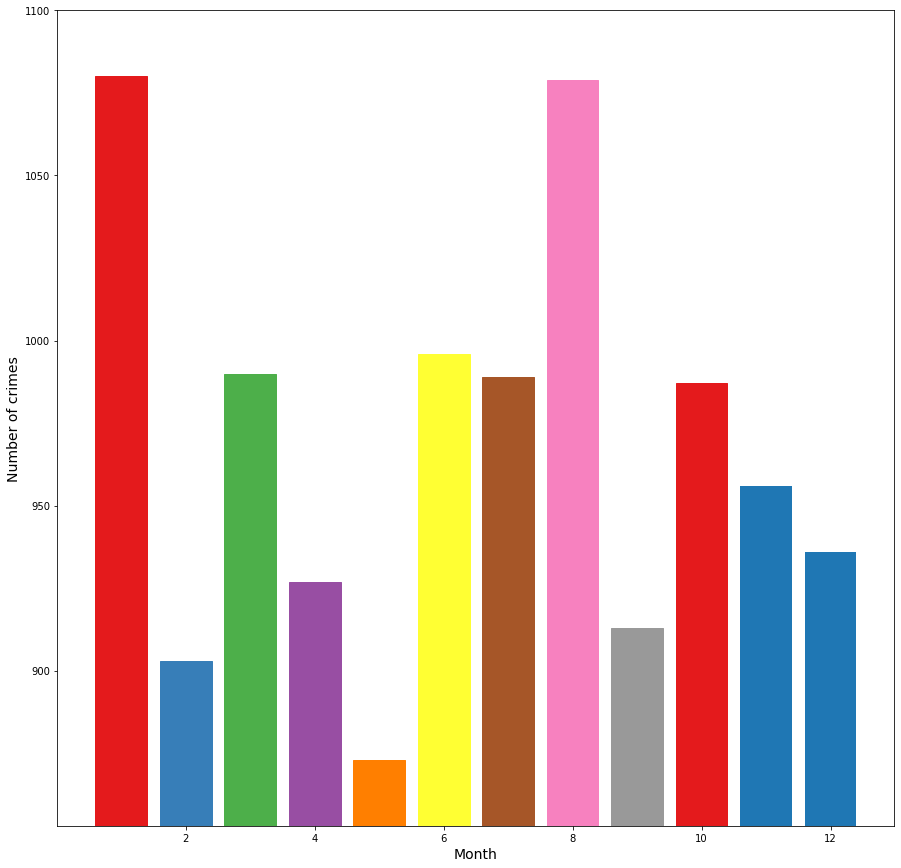

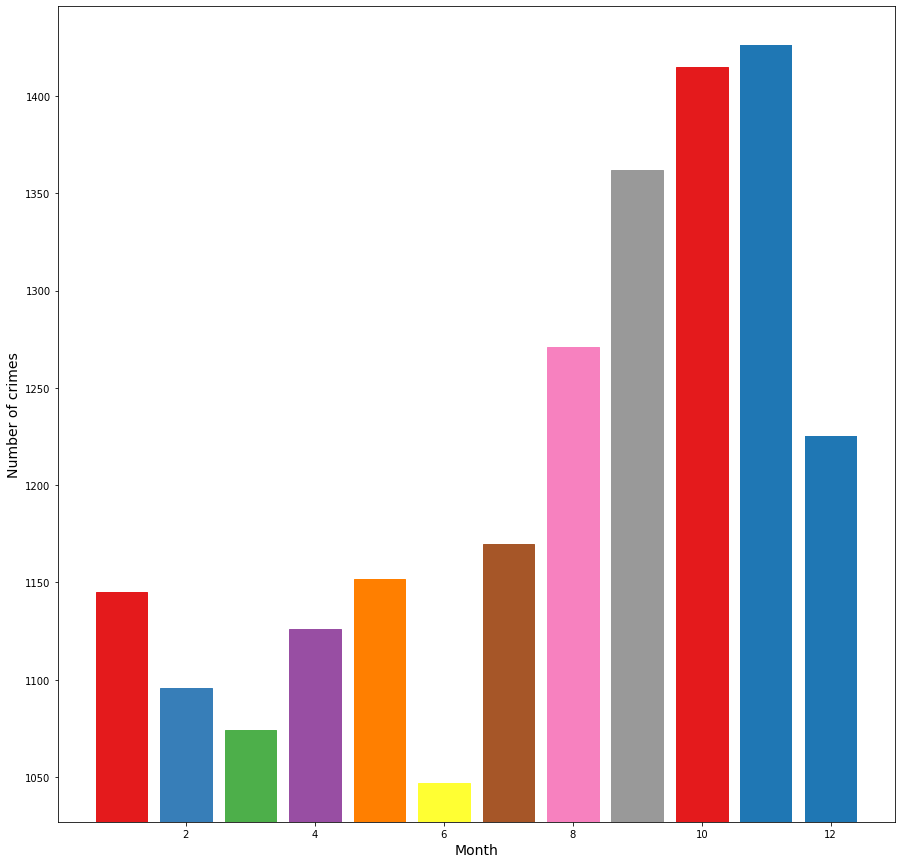

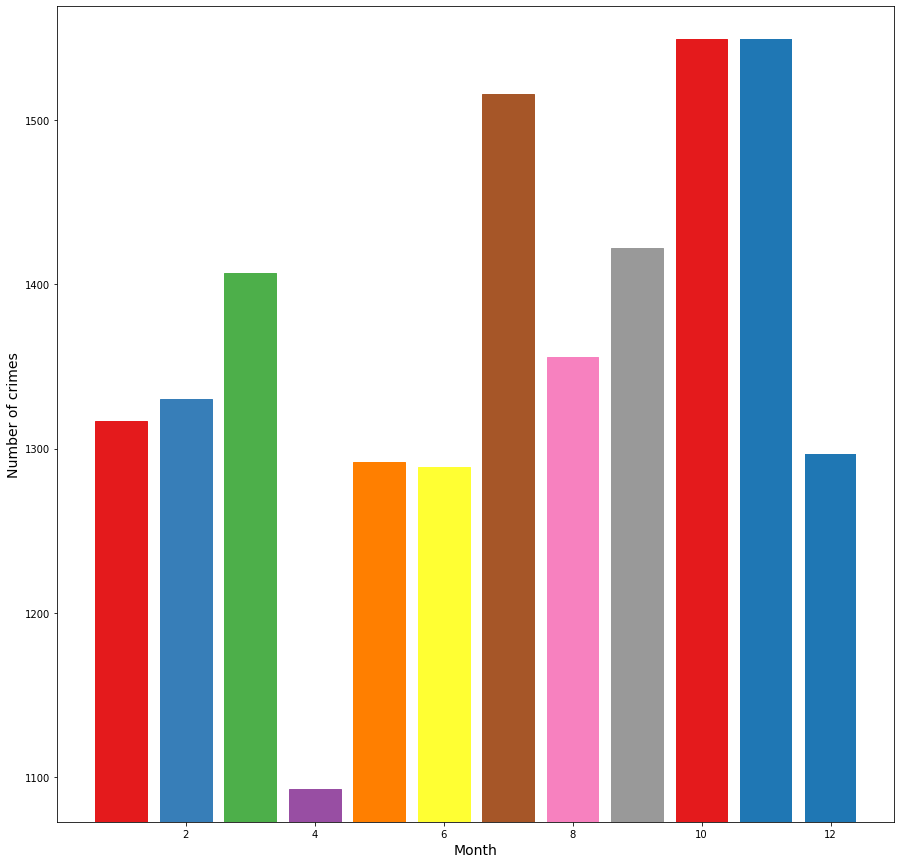

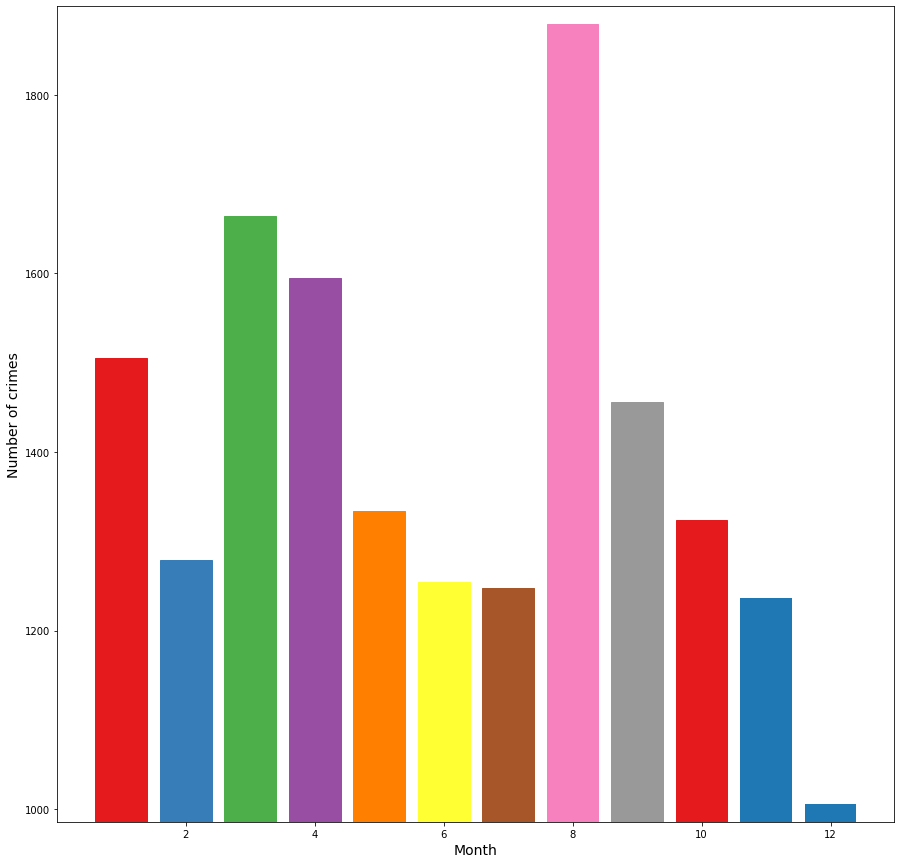

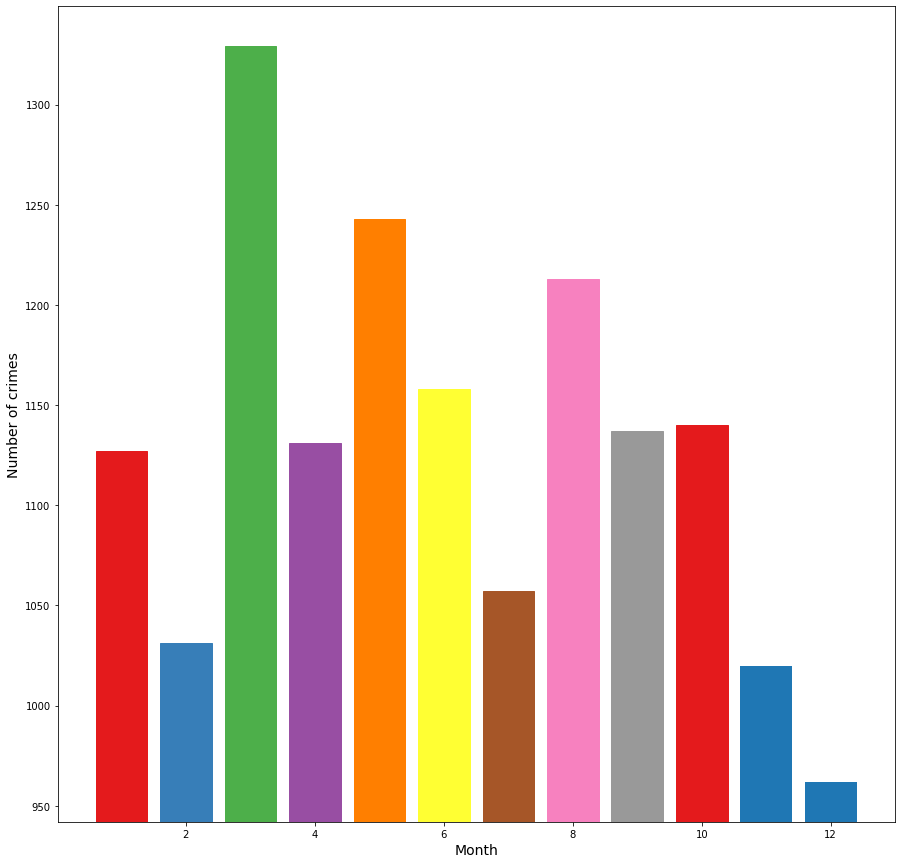

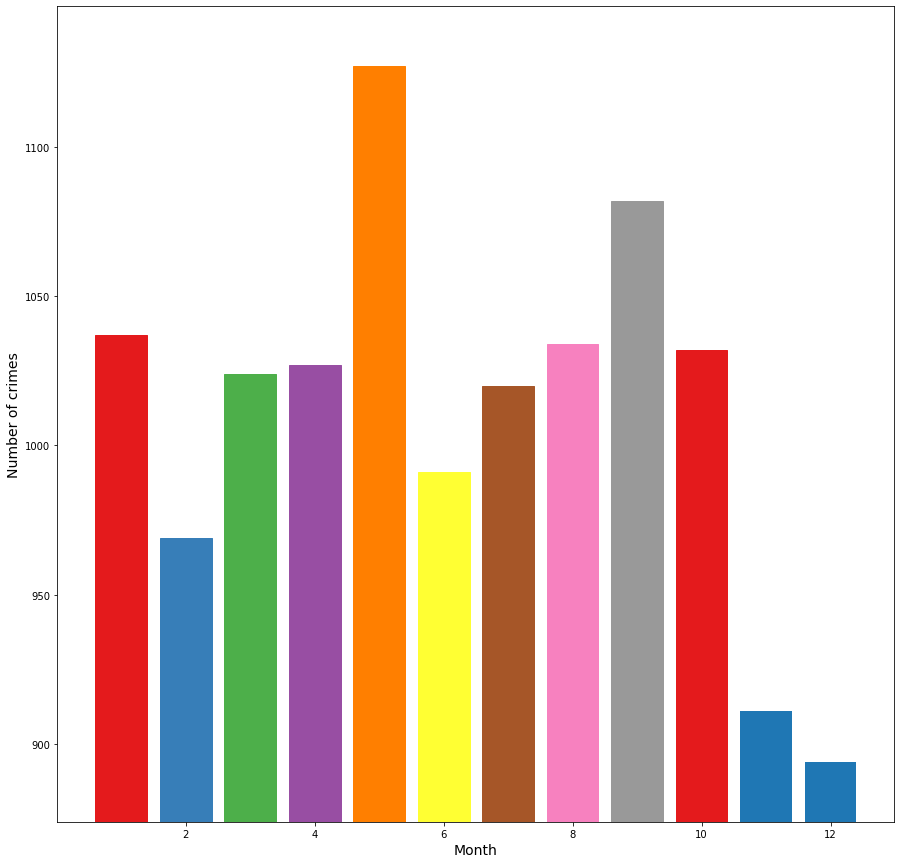

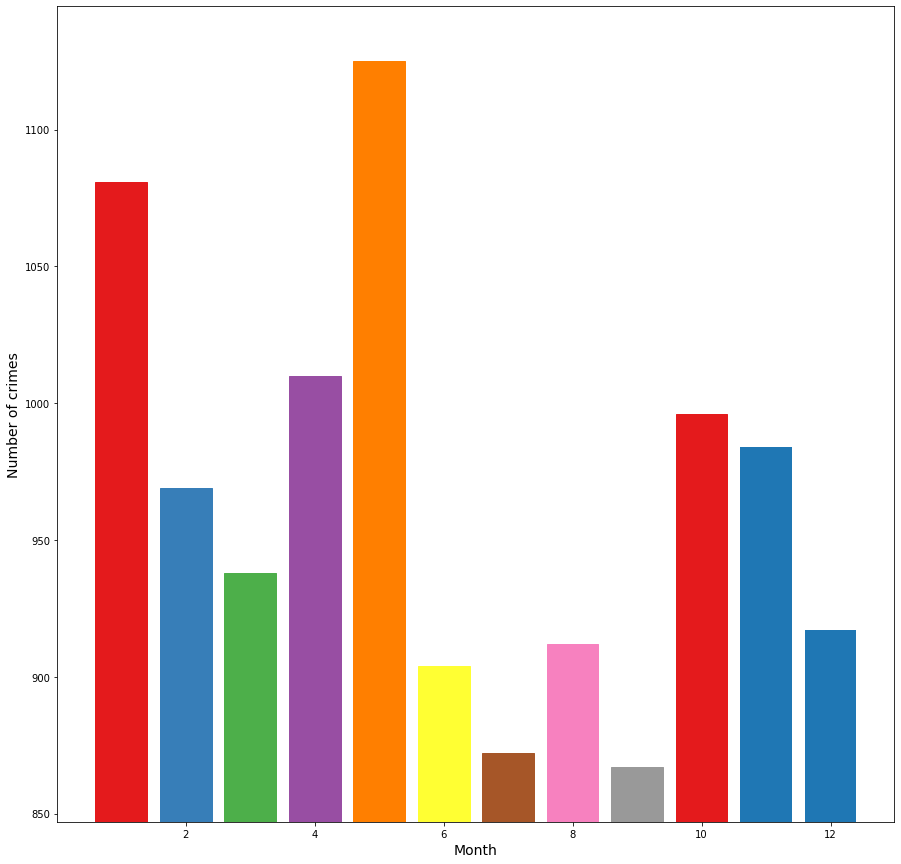

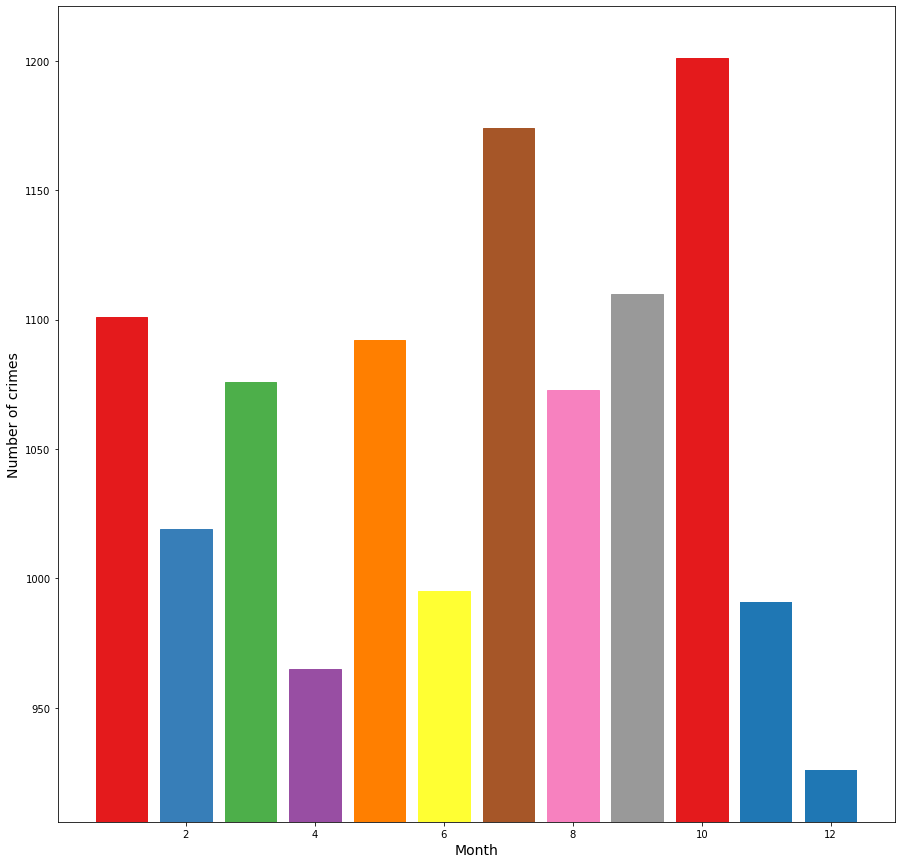

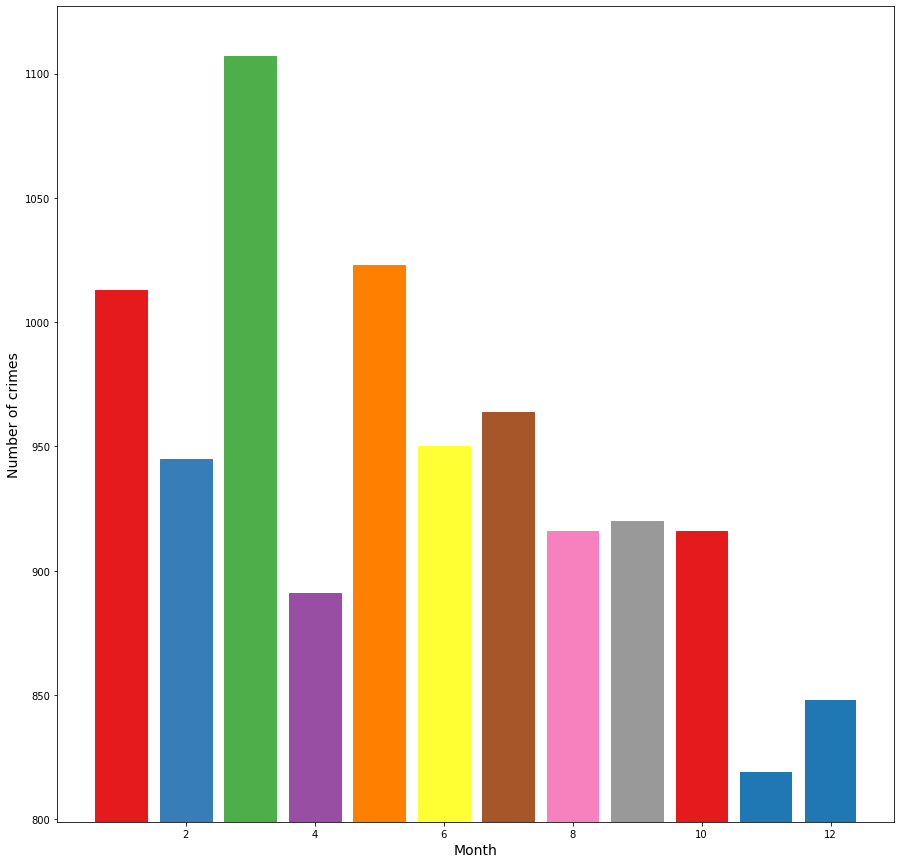

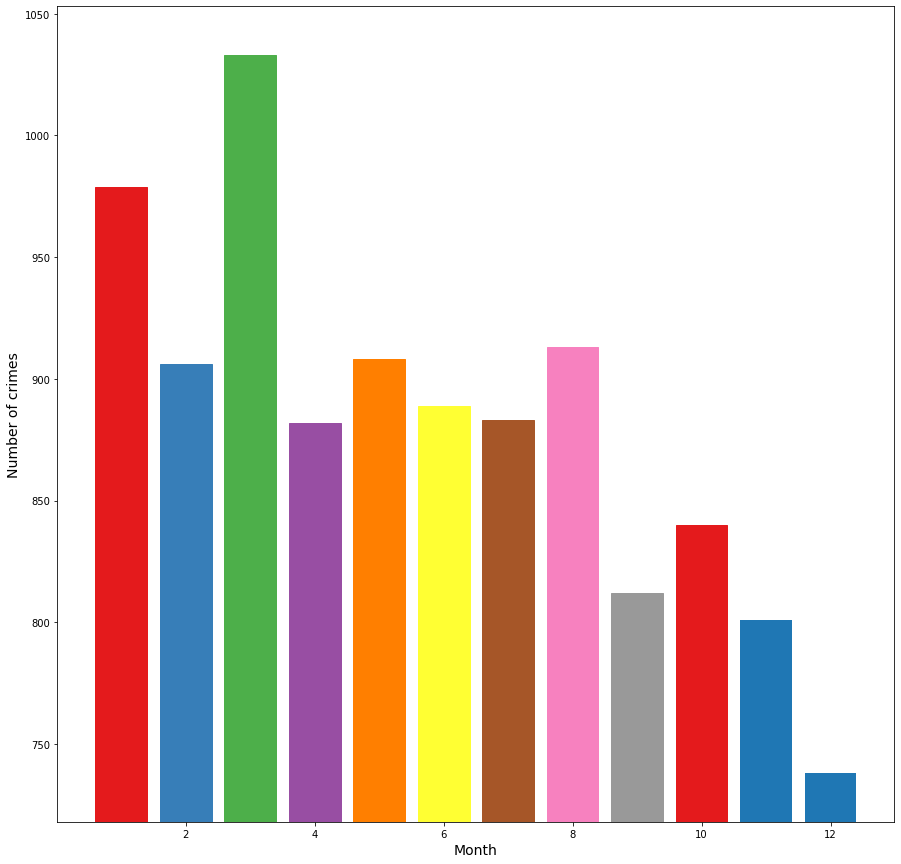

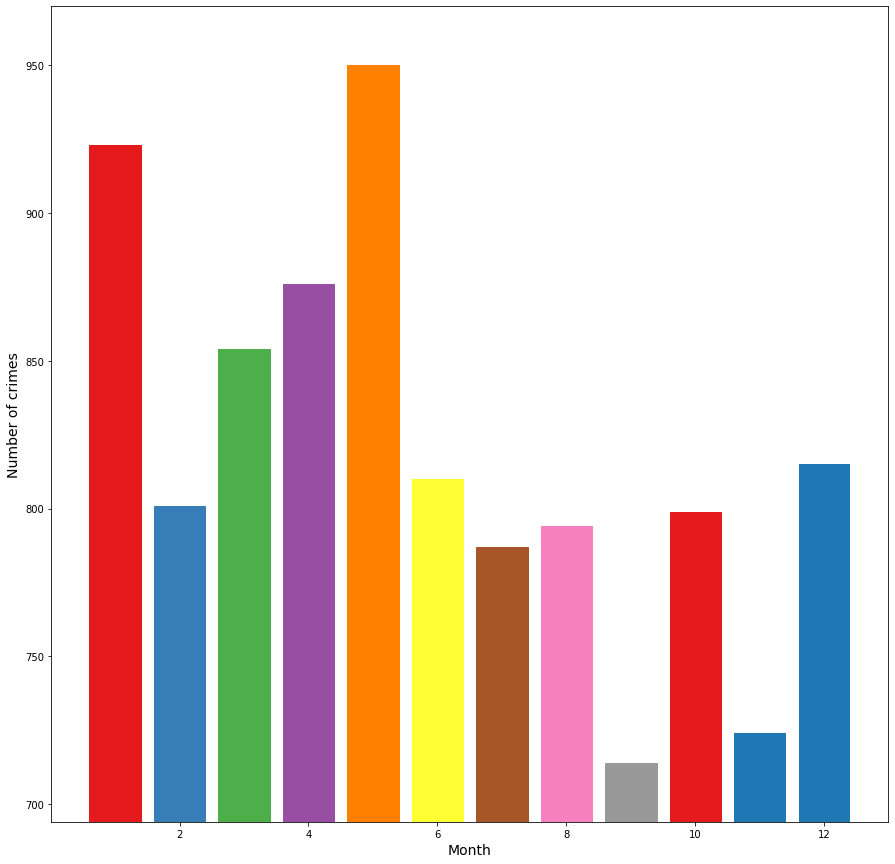

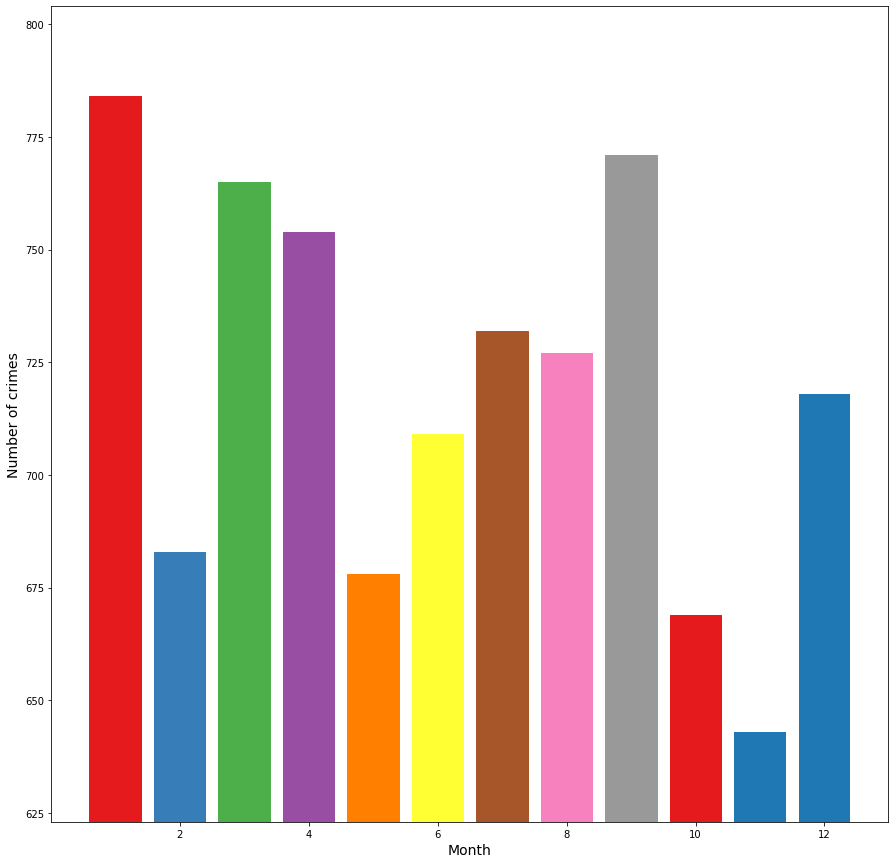

In [ ]:
for p in range(10):
  for y in range(2004,2018):
    plt.figure(figsize=(15,15))
    barplot = plt.bar(data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.PdDID == p)]["Month"], data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.PdDID == p)]["Count"])
    for i in range(10):
      cl = color[i%9]
      barplot[i].set_color(cl)
    y_min = data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.PdDID == p)]["Count"].min()
    y_max = data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.PdDID == p)]["Count"].max()  
    plt.ylim(y_min-20,y_max+20)
    plt.xlabel("Month", {"size":"14"})
    plt.ylabel("Number of crimes", {"size":"14"})
    # plt.title("Number_of_crimes_in_"+str(Police_dept_id_name[p])+"_police_department_in_%i" %y)
    plt.savefig(PATH_IMAGE+"/Number_of_crimes_in_"+str(Police_dept_id_name[p])+"_police_department_in_%i.png" %y)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

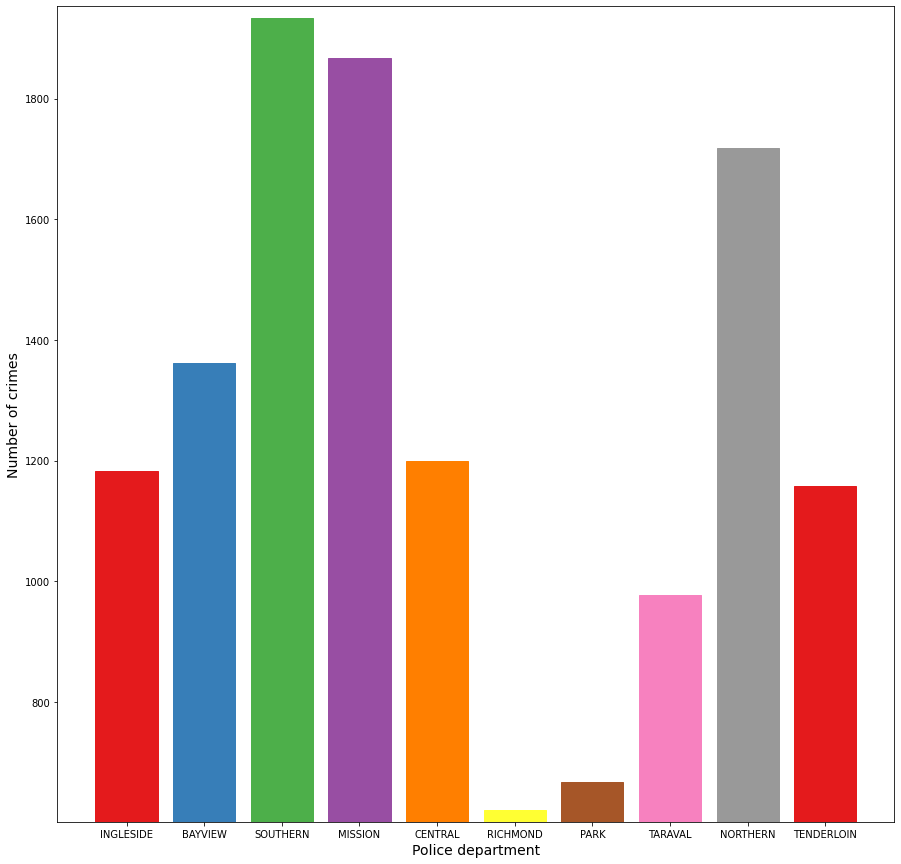

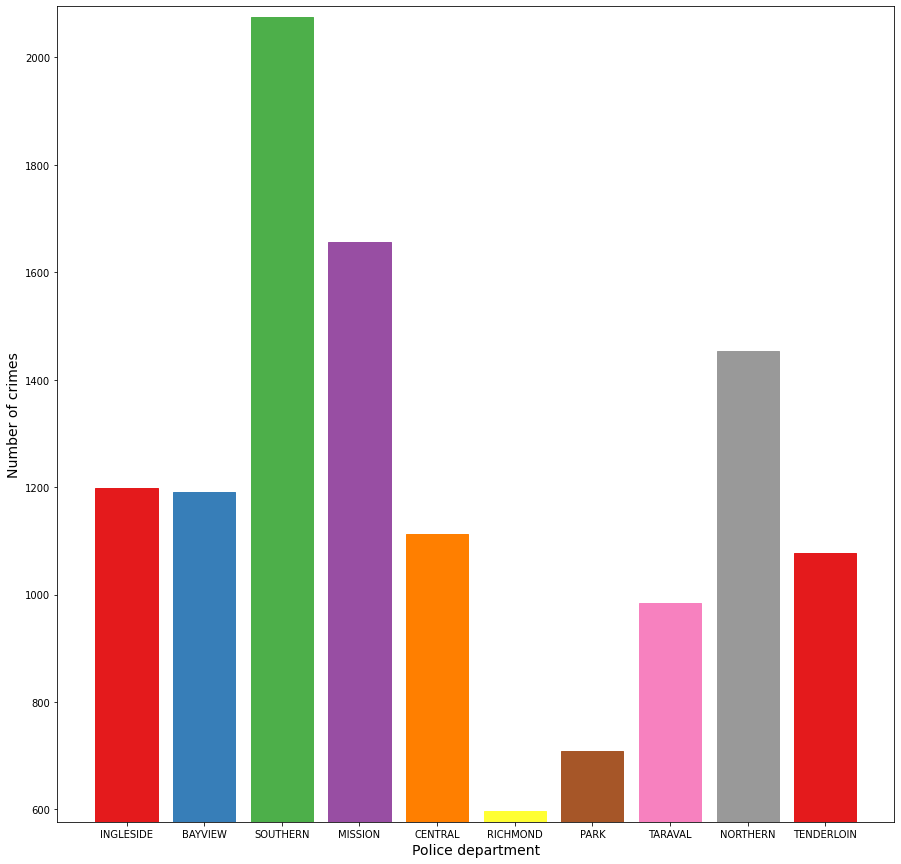

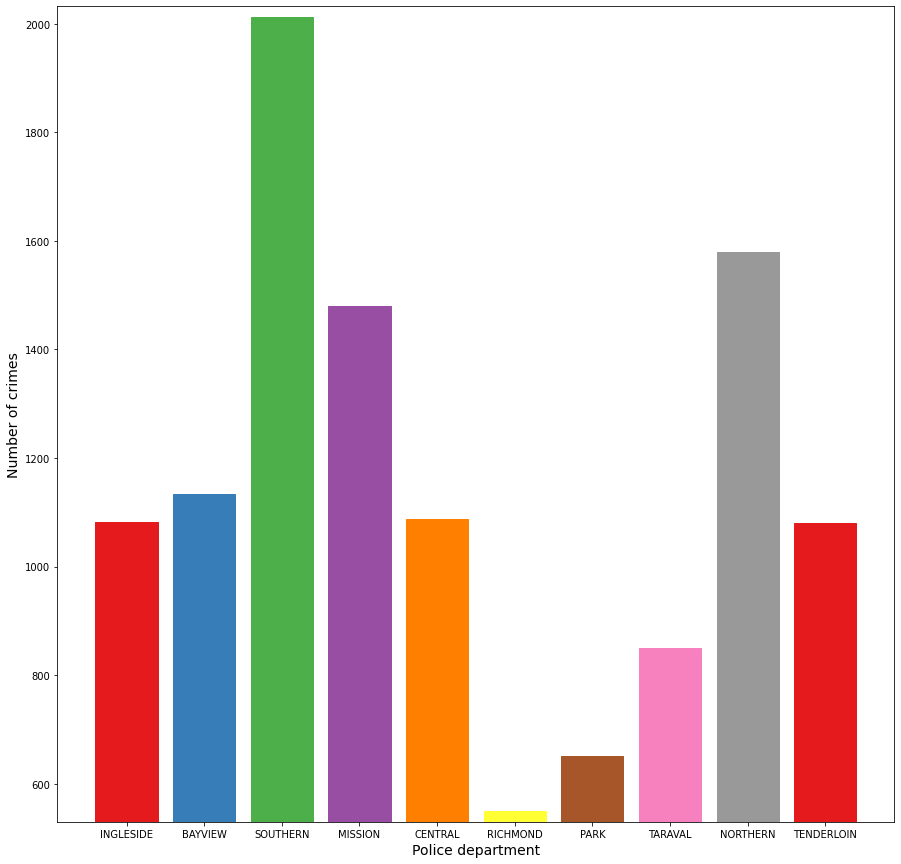

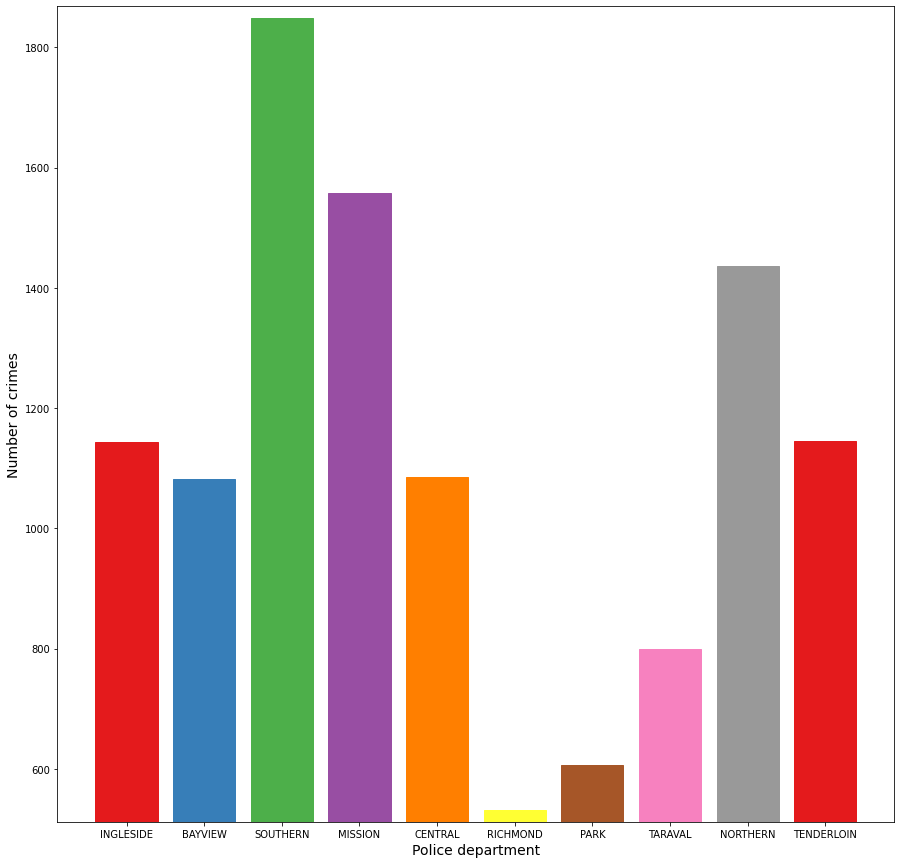

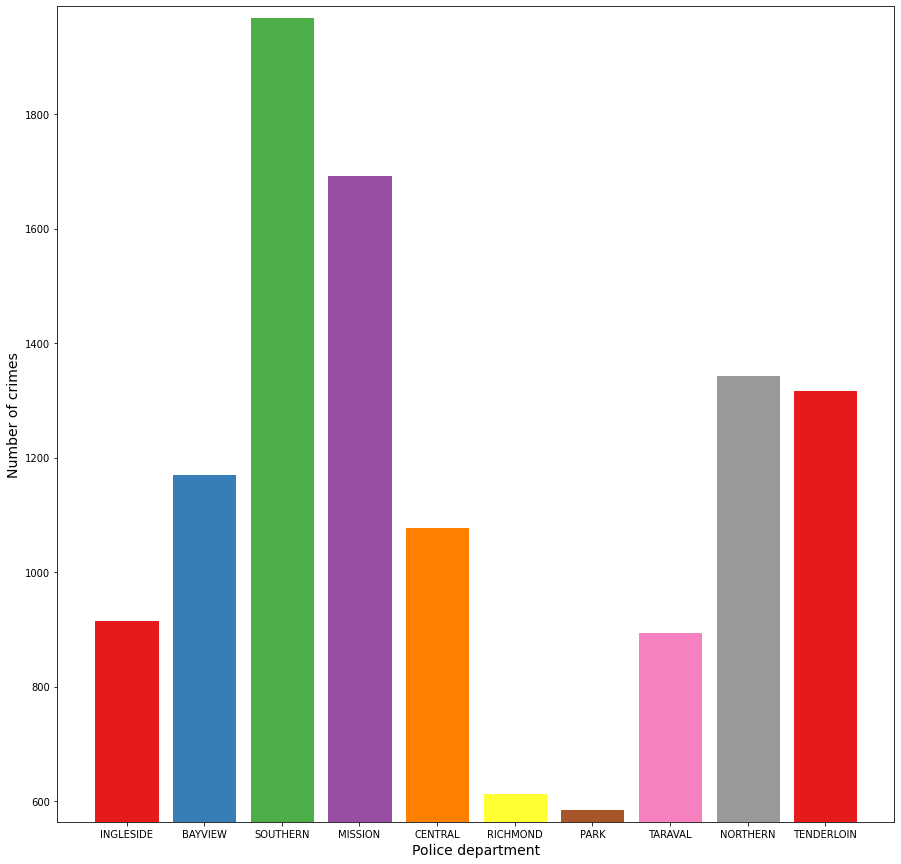

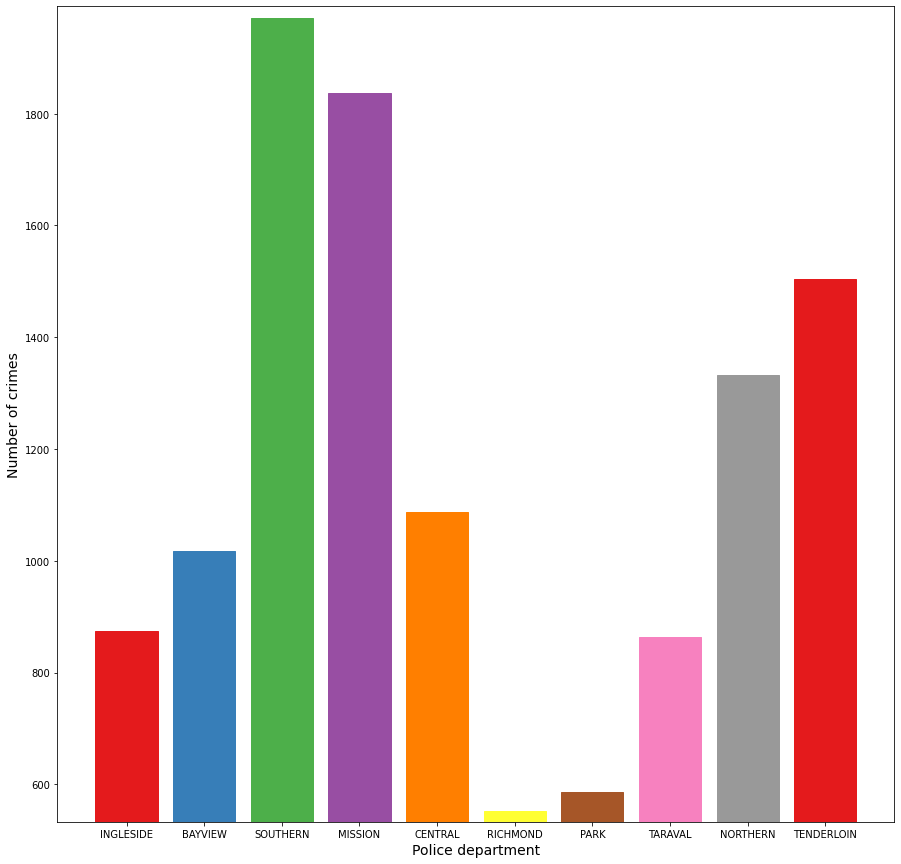

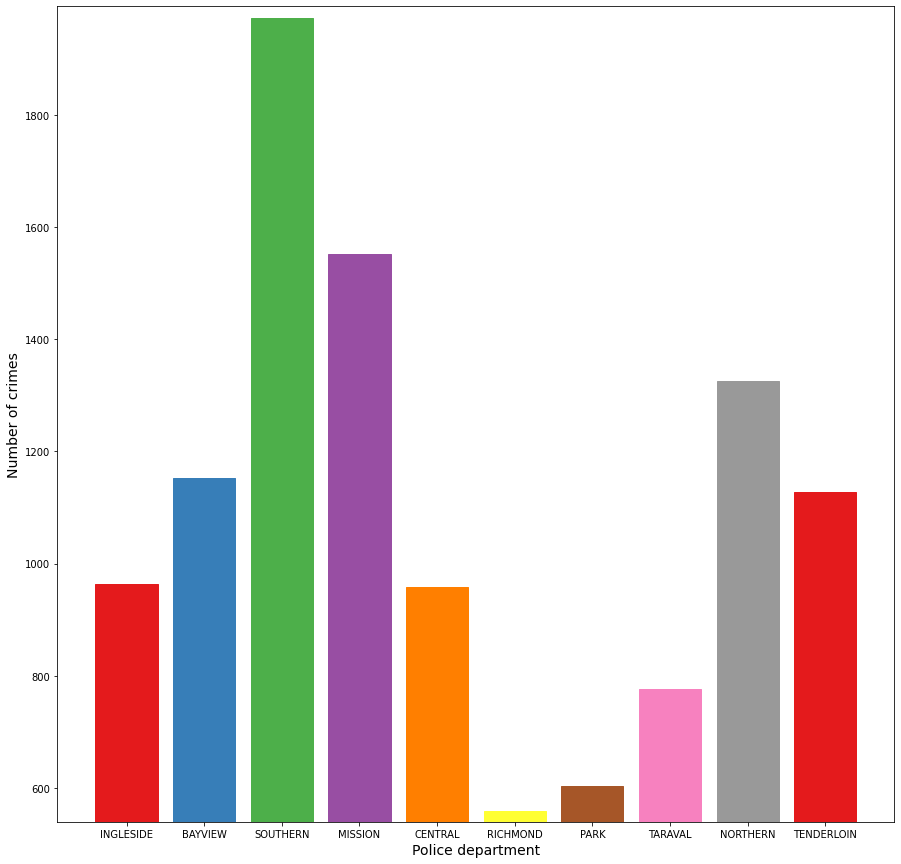

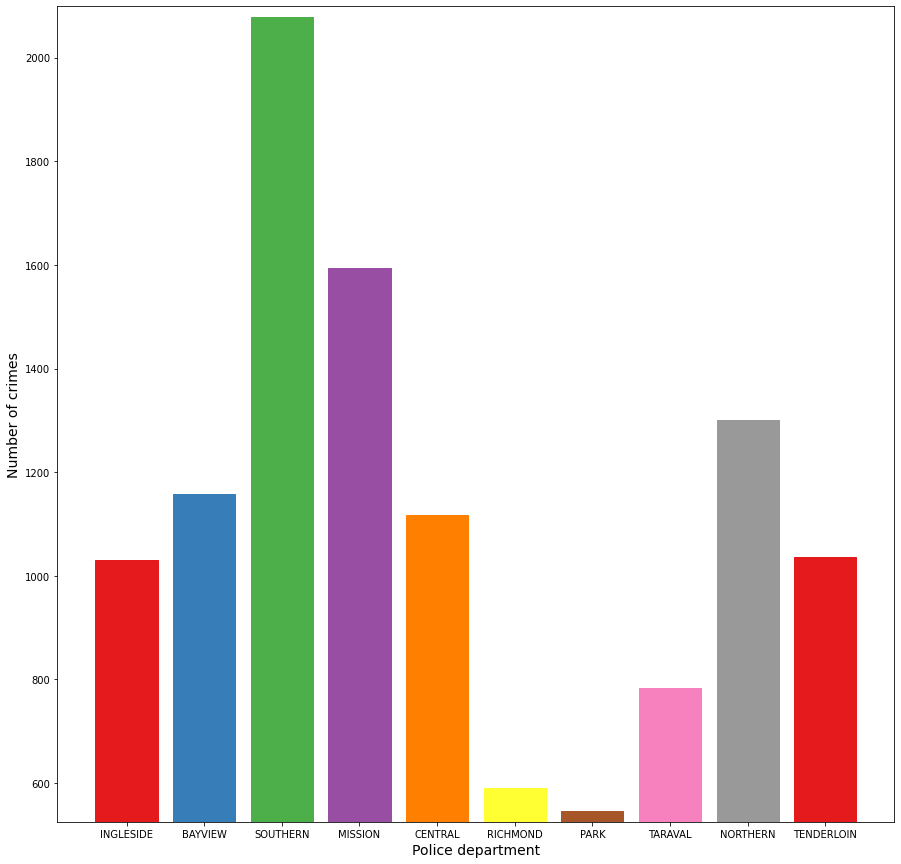

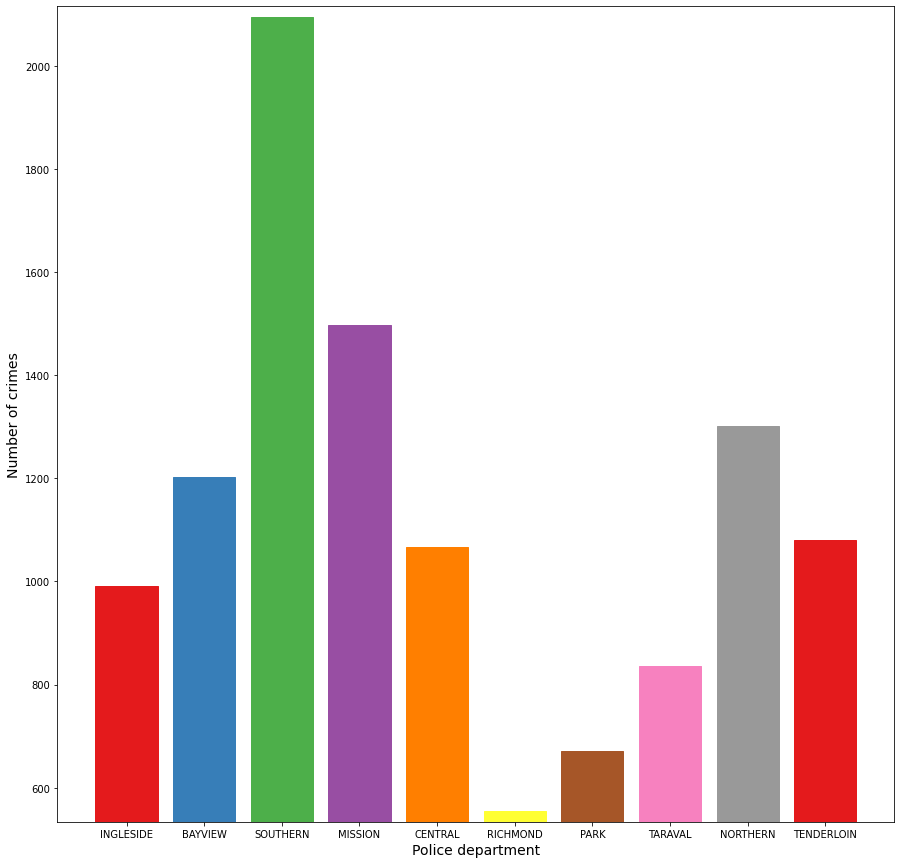

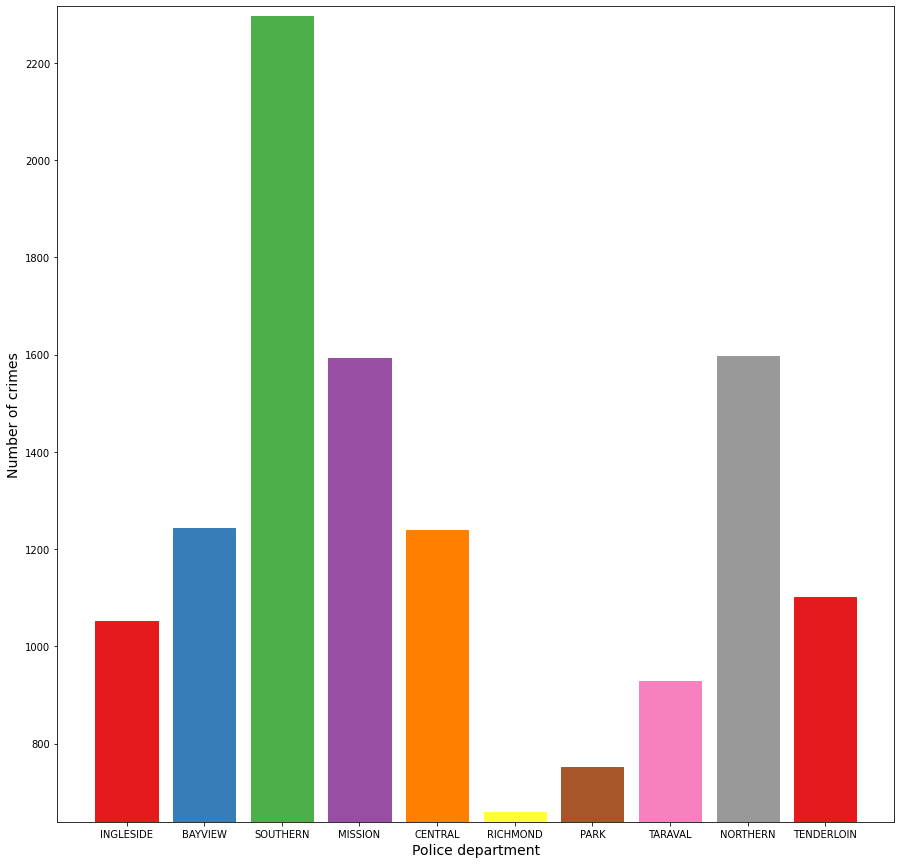

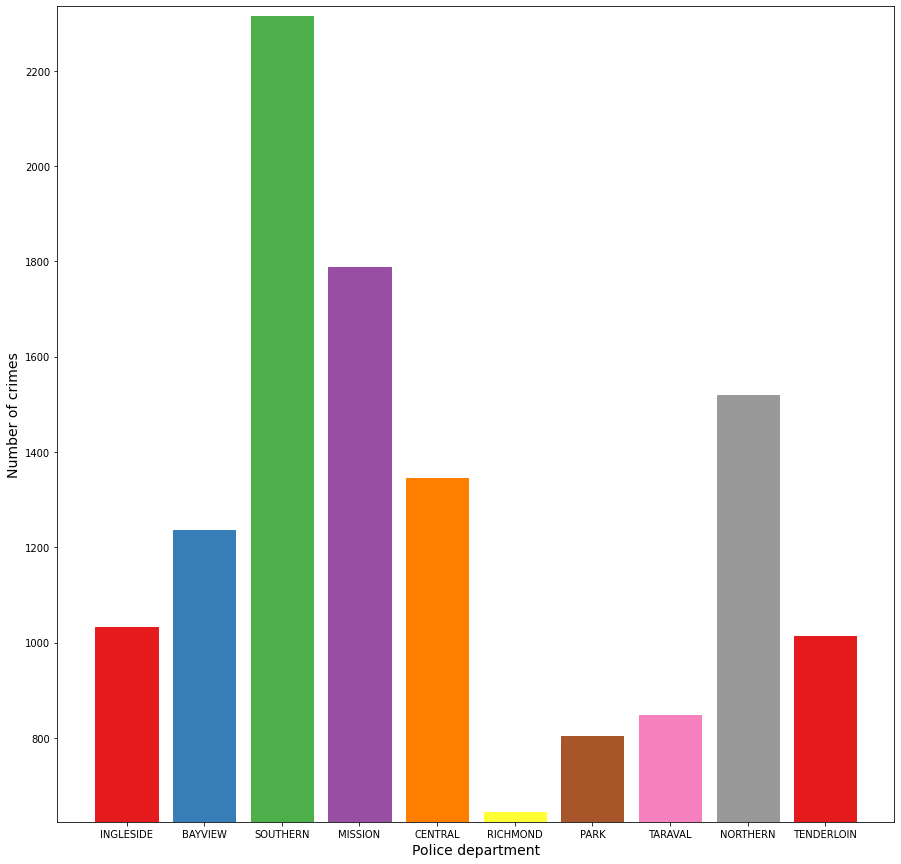

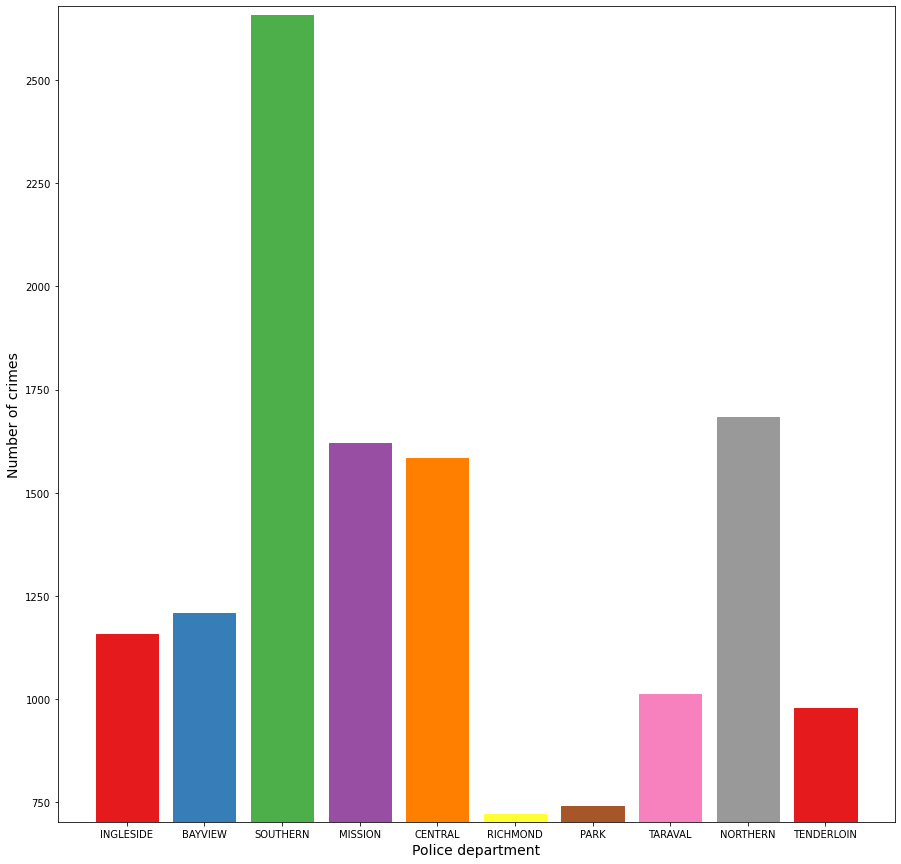

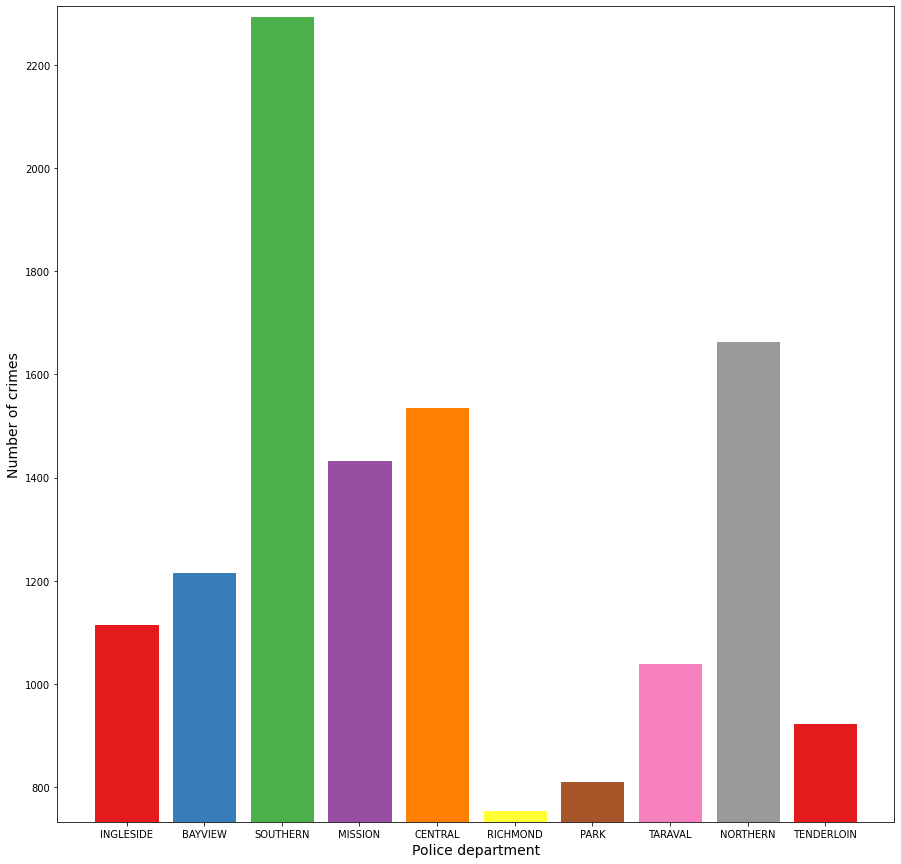

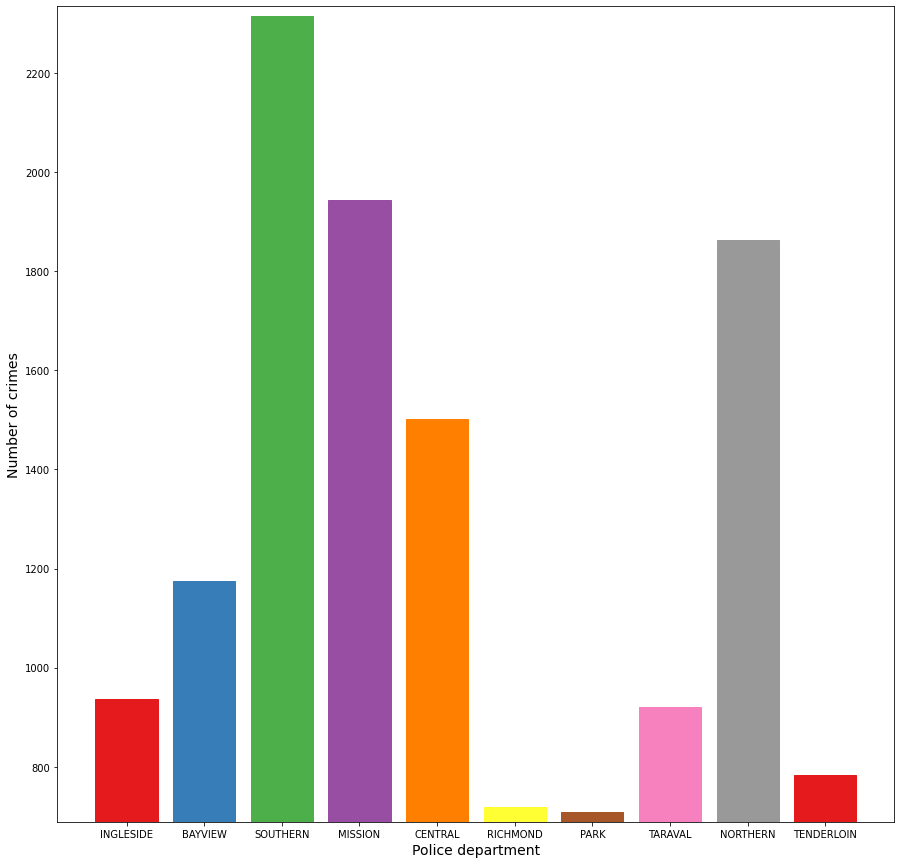

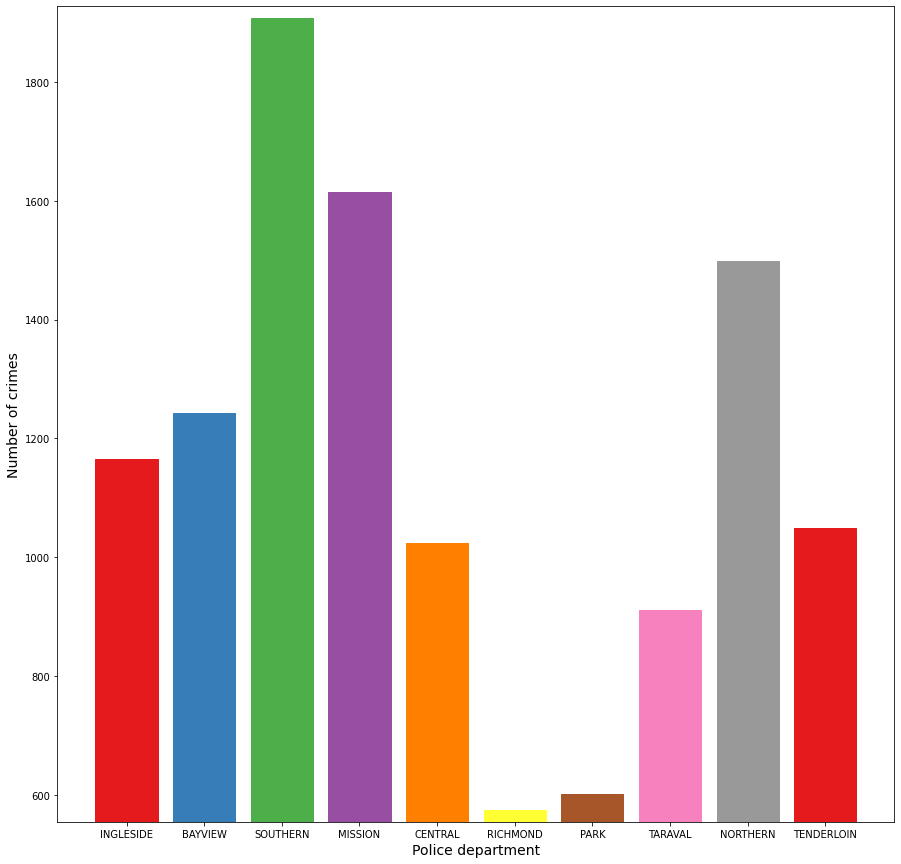

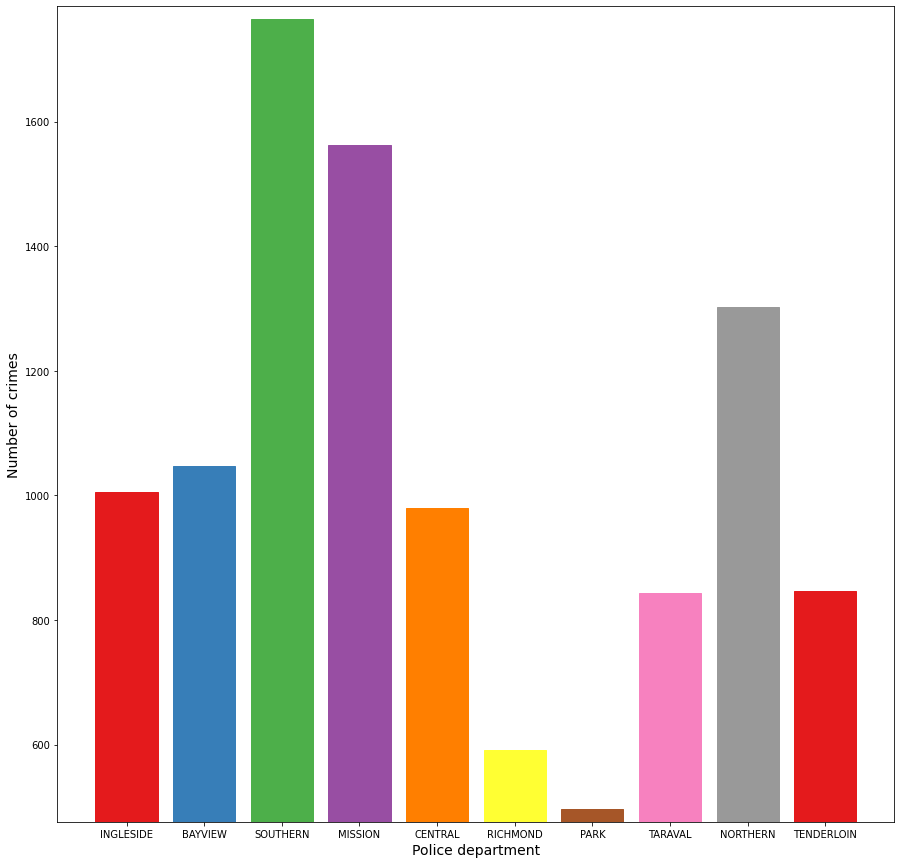

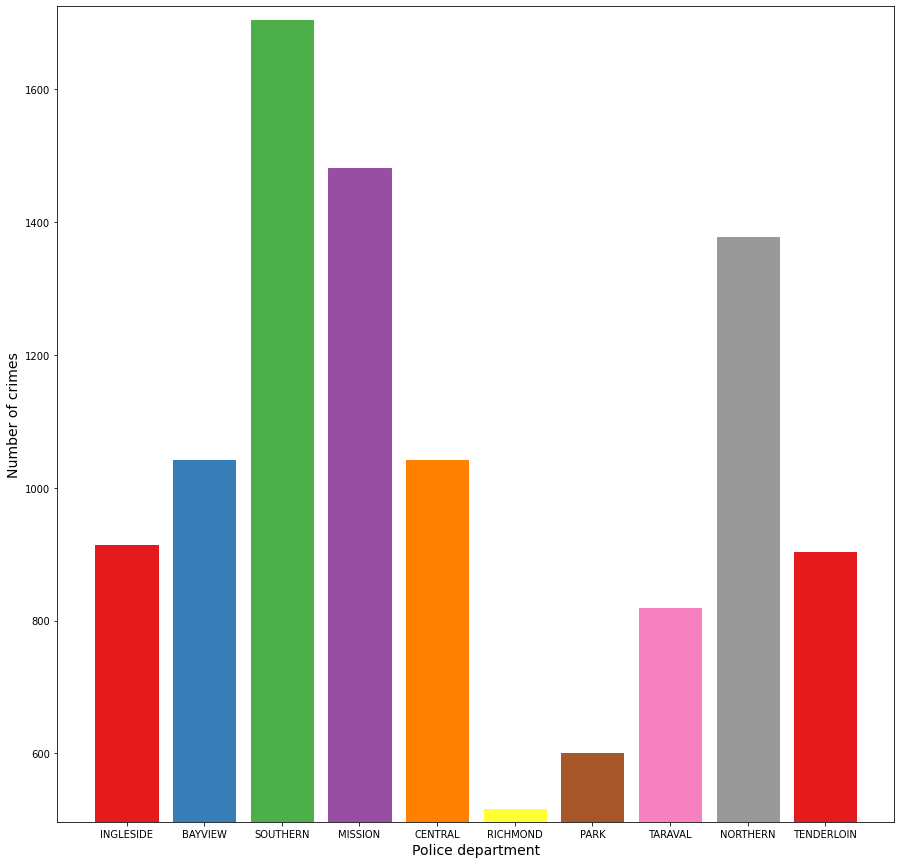

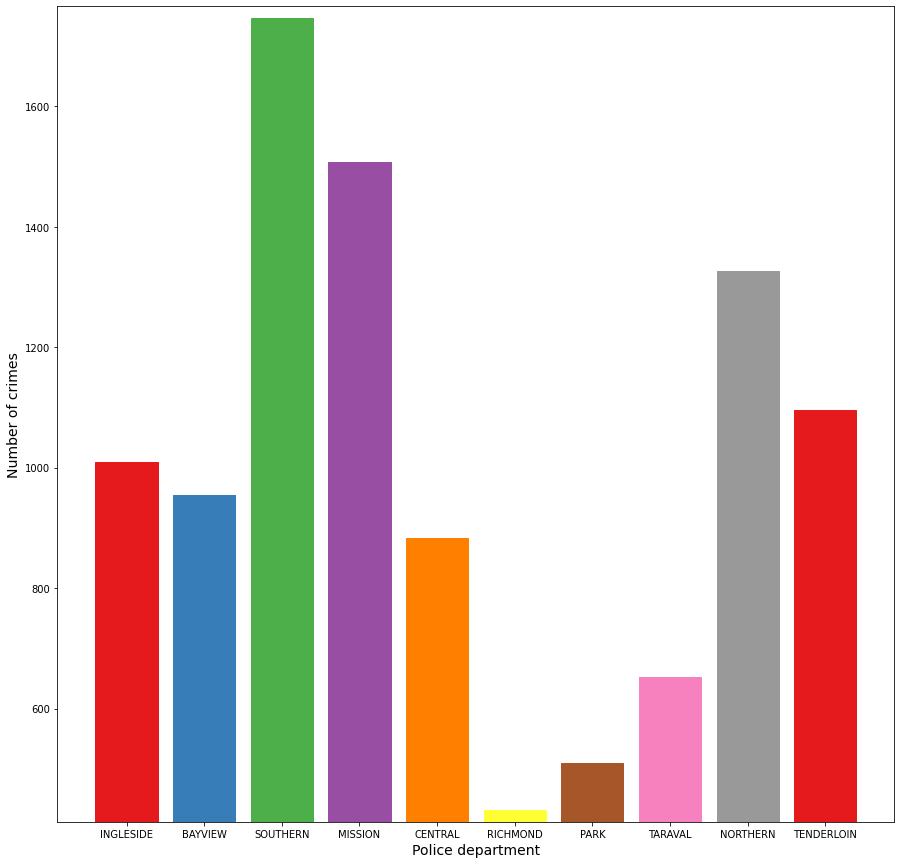

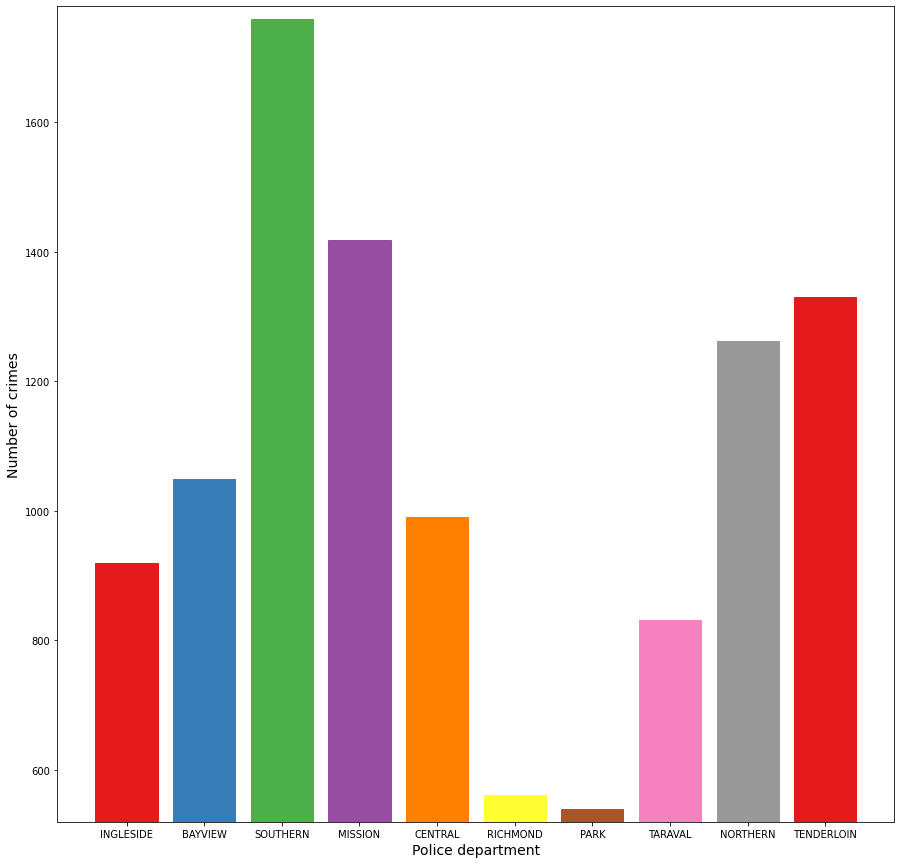

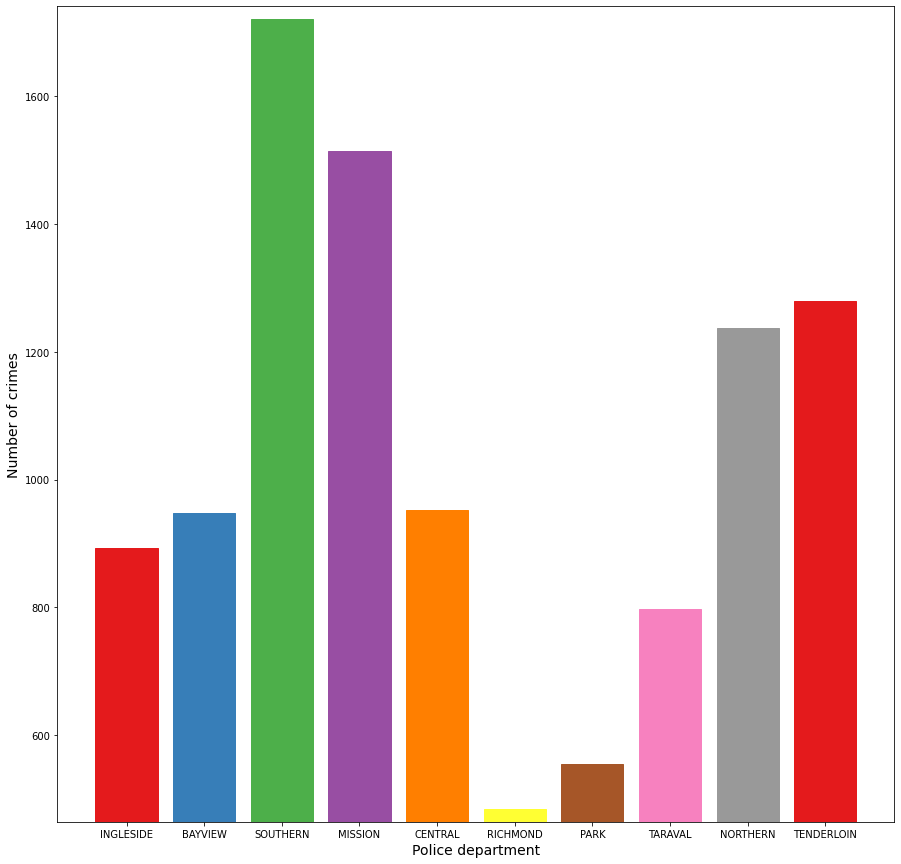

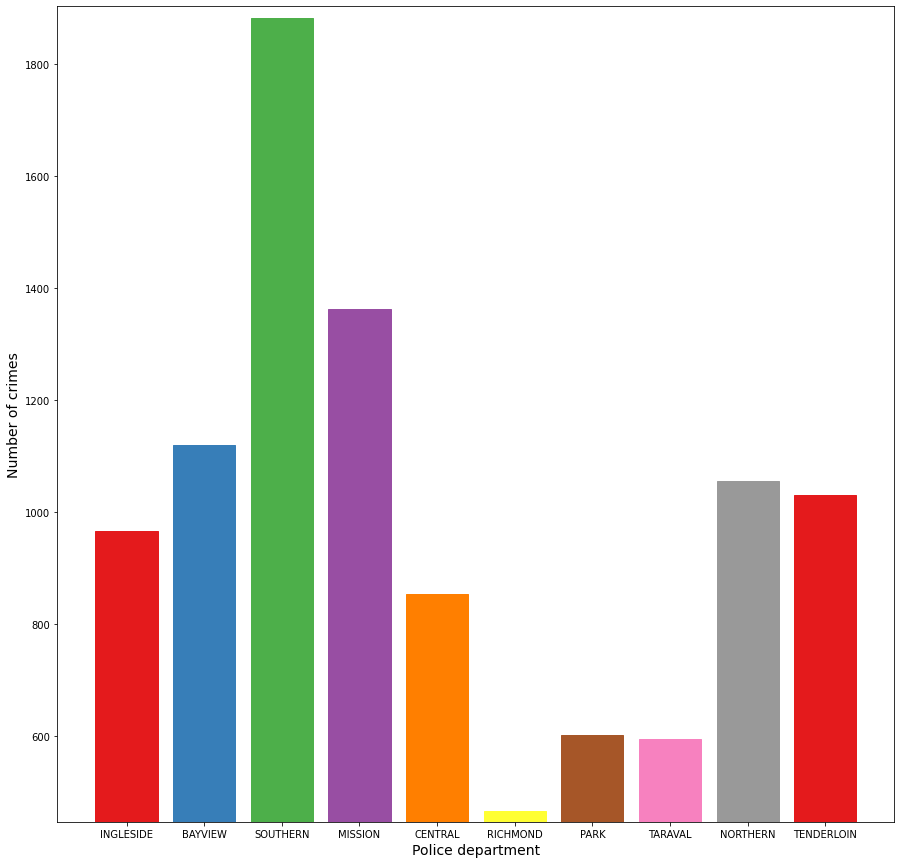

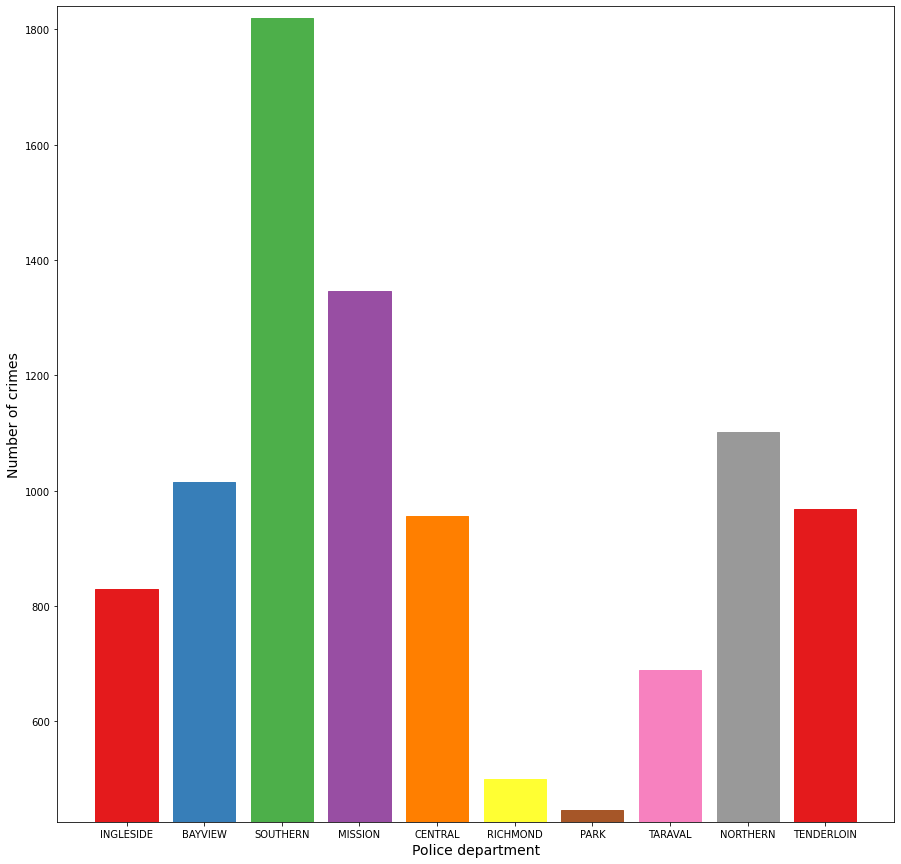

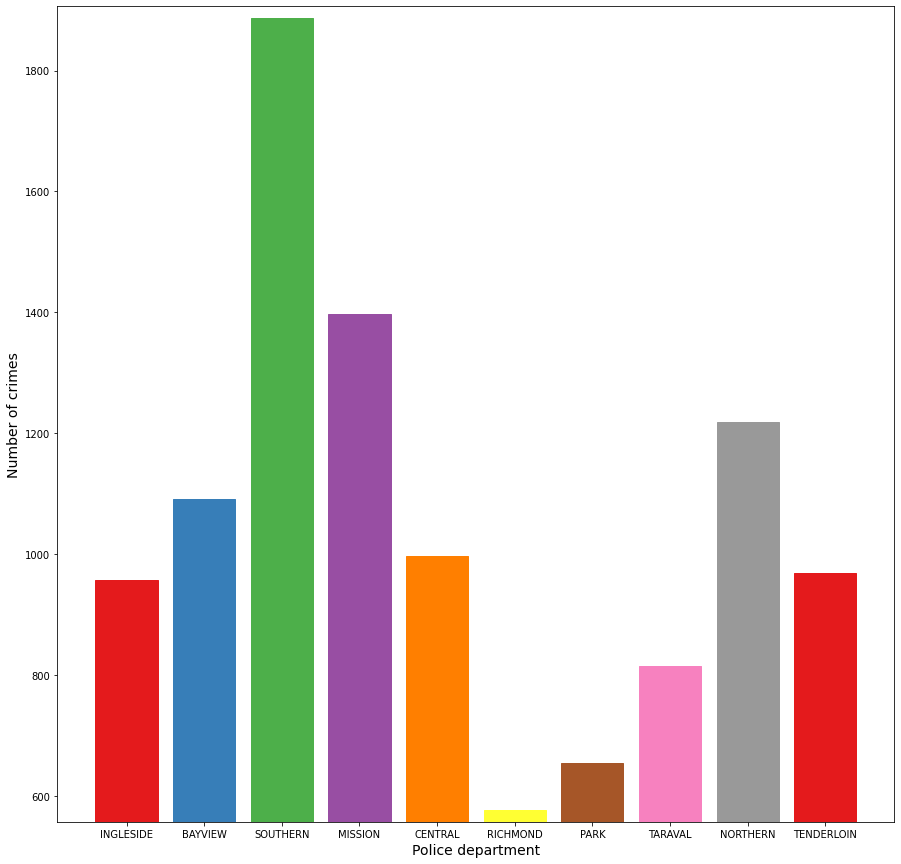

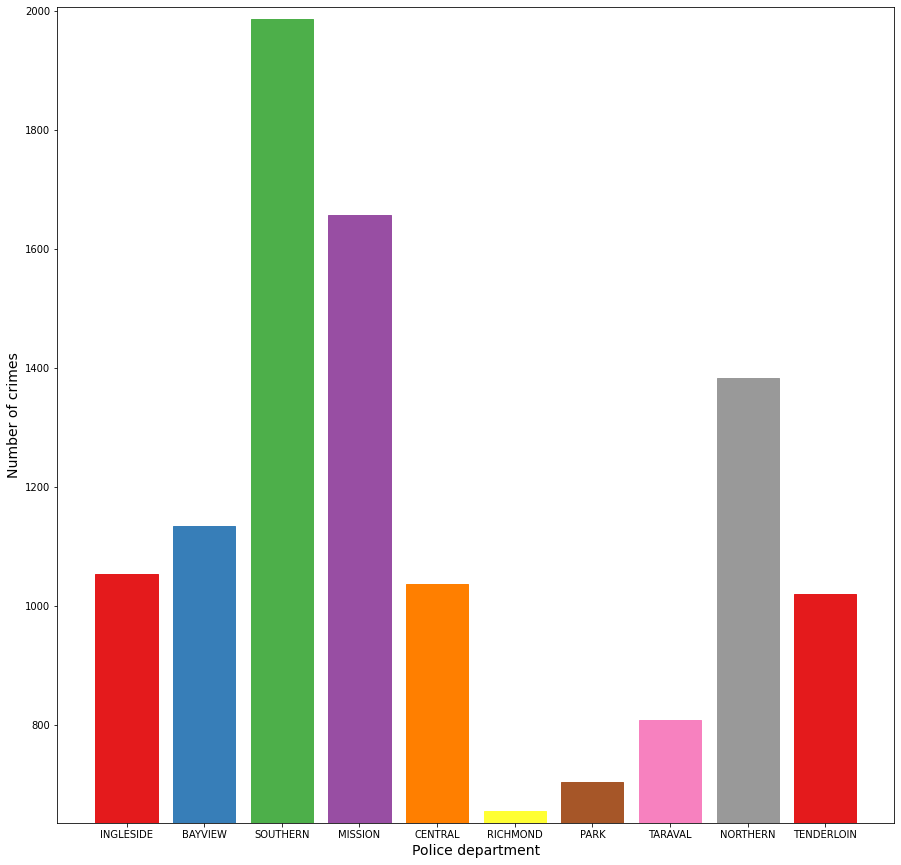

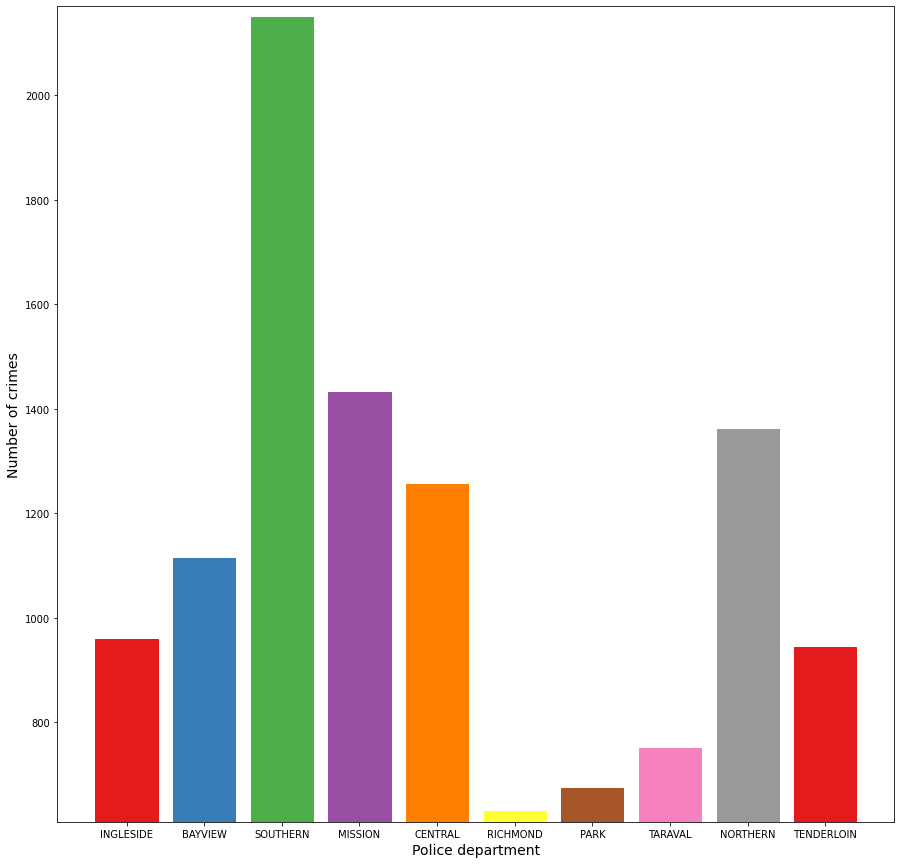

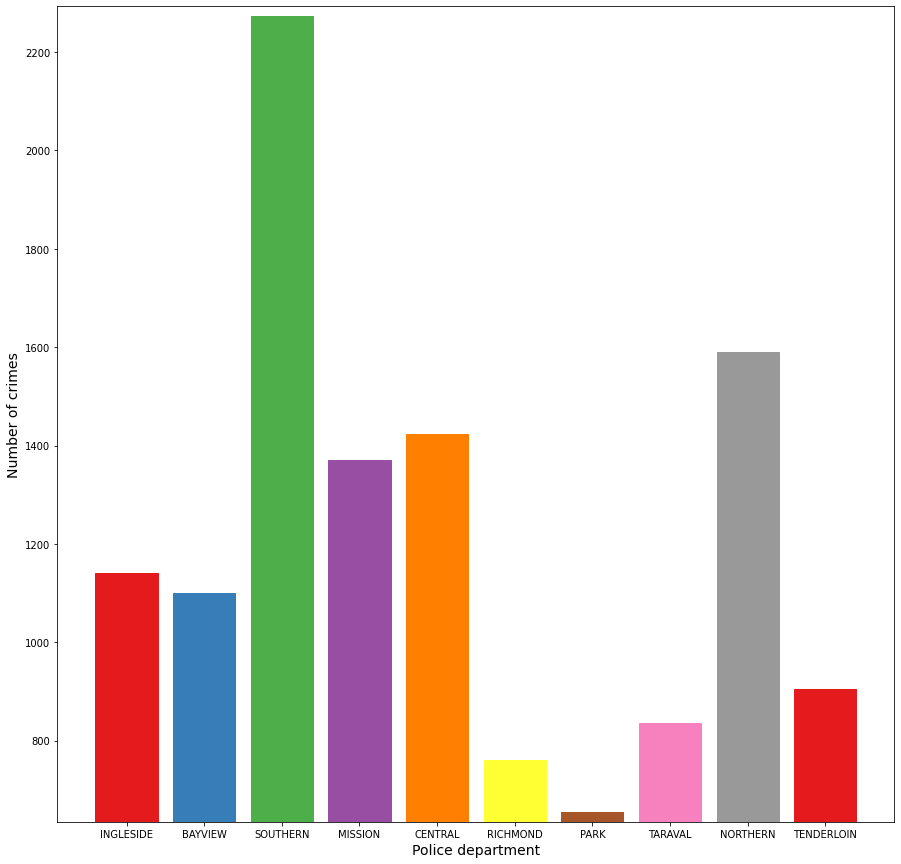

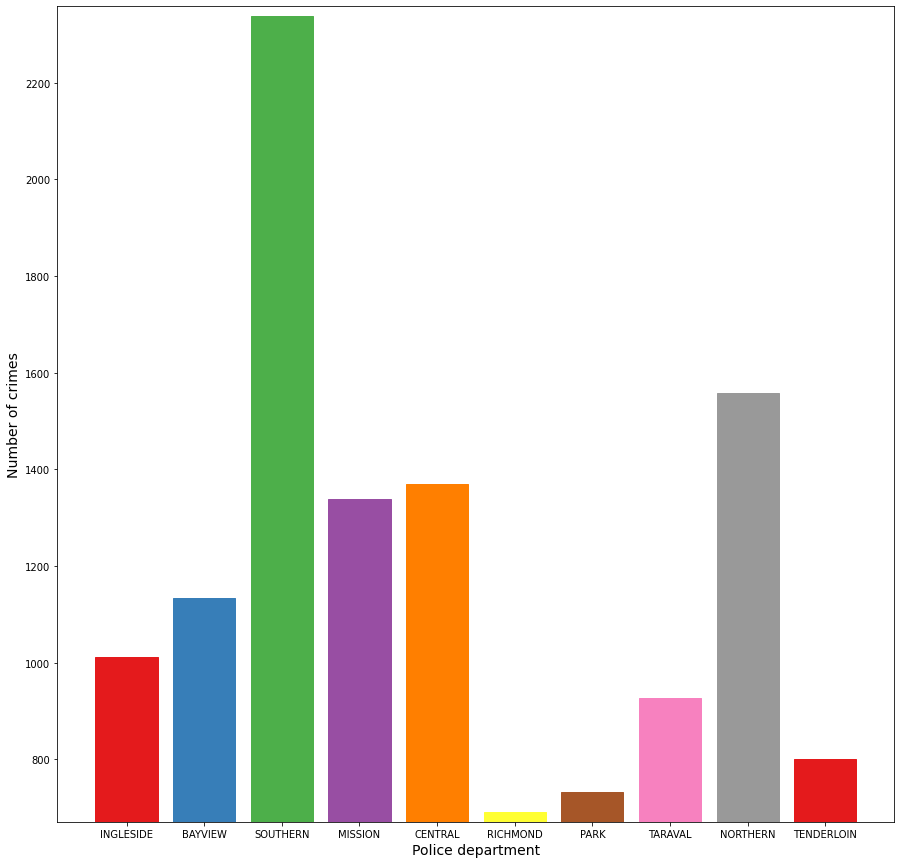

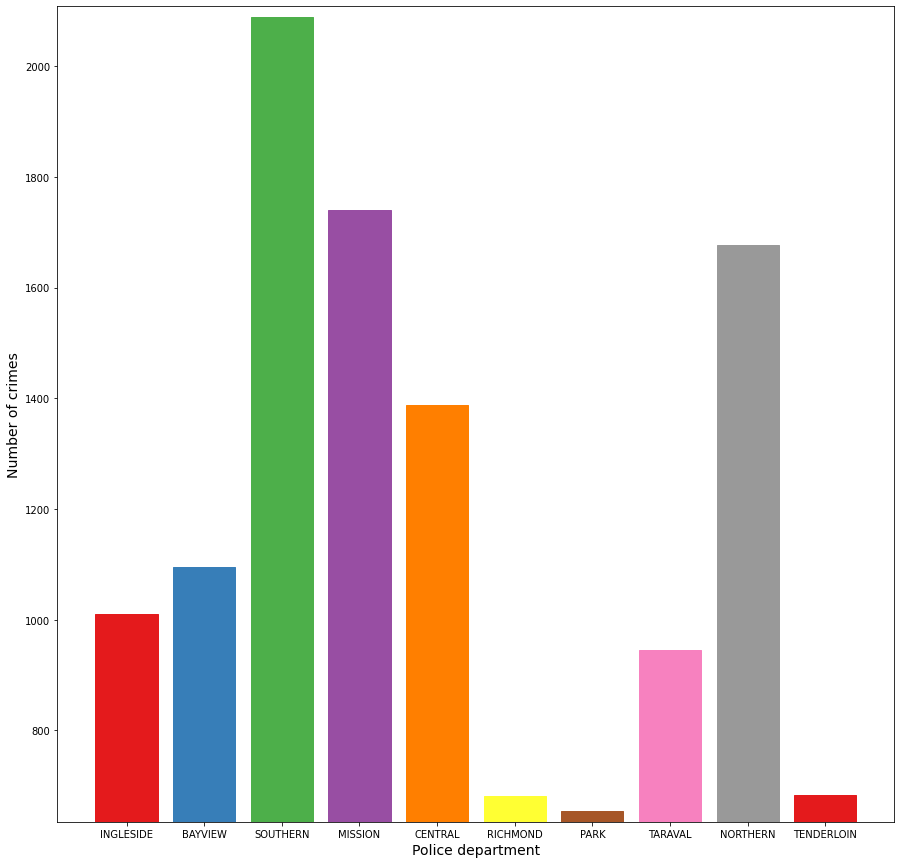

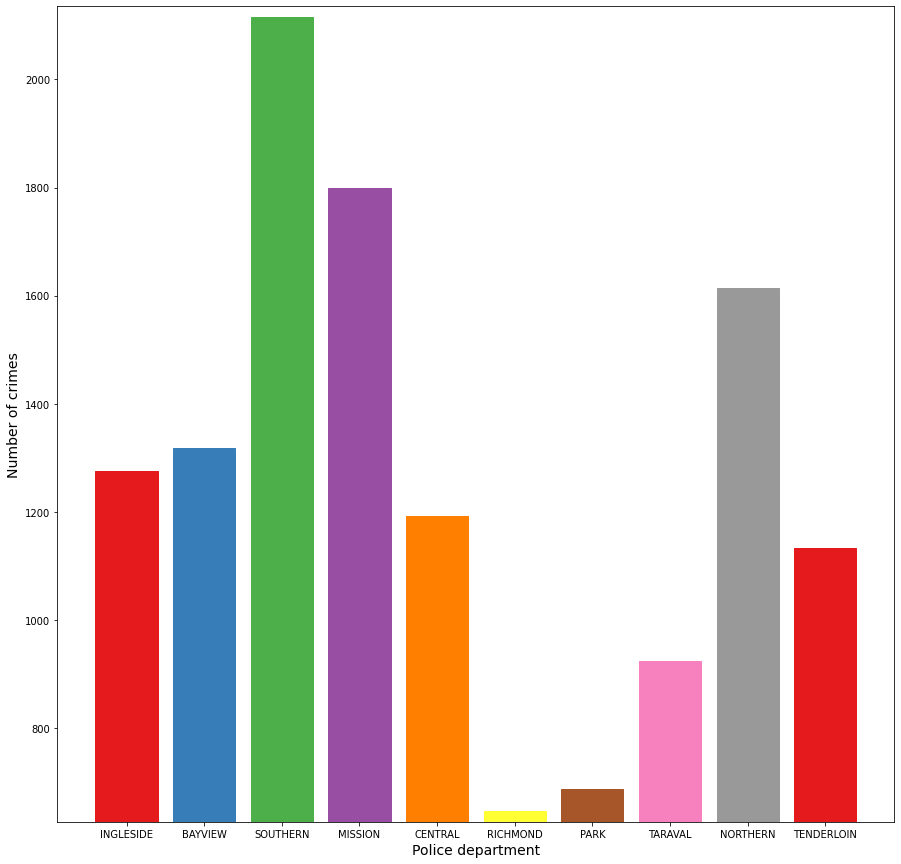

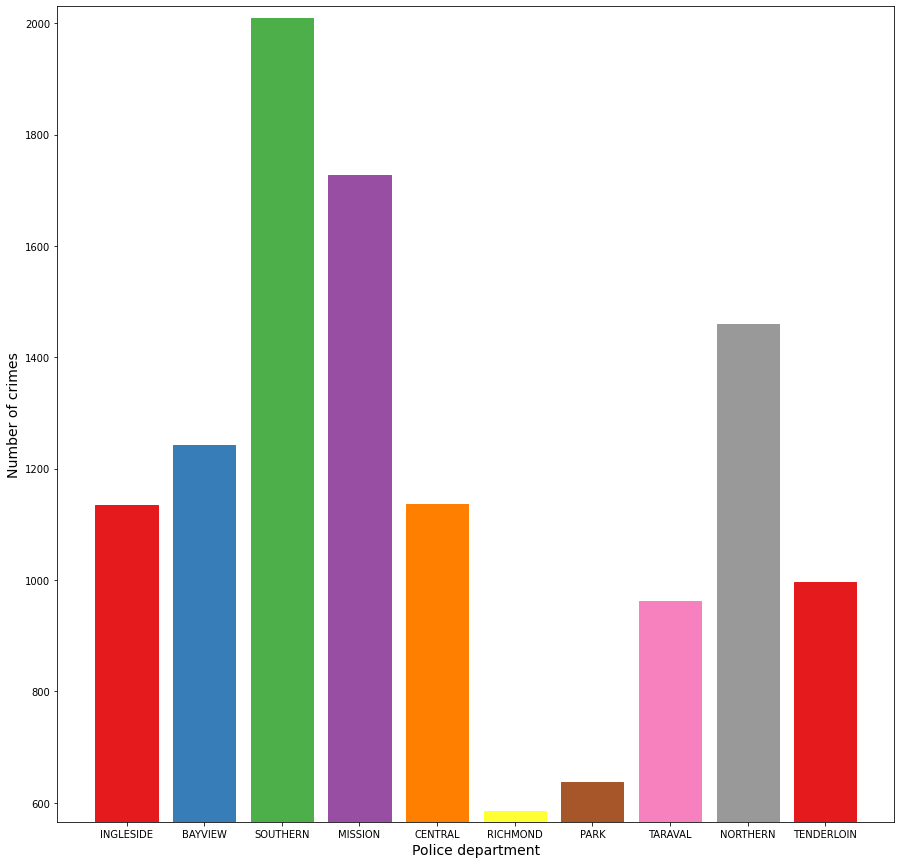

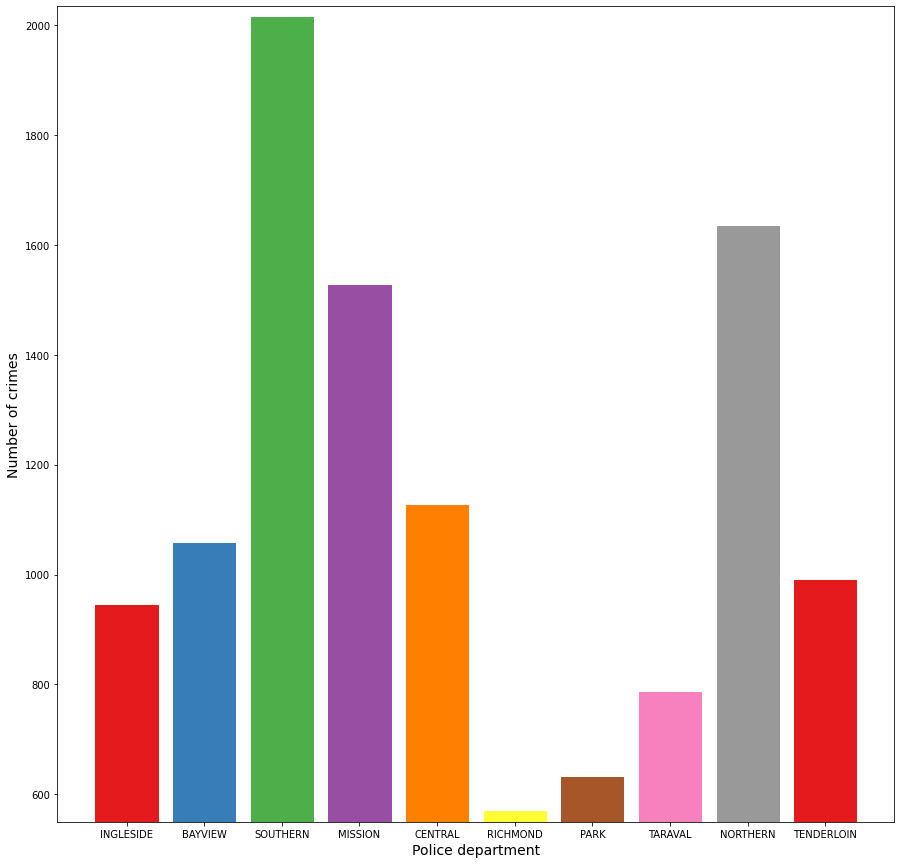

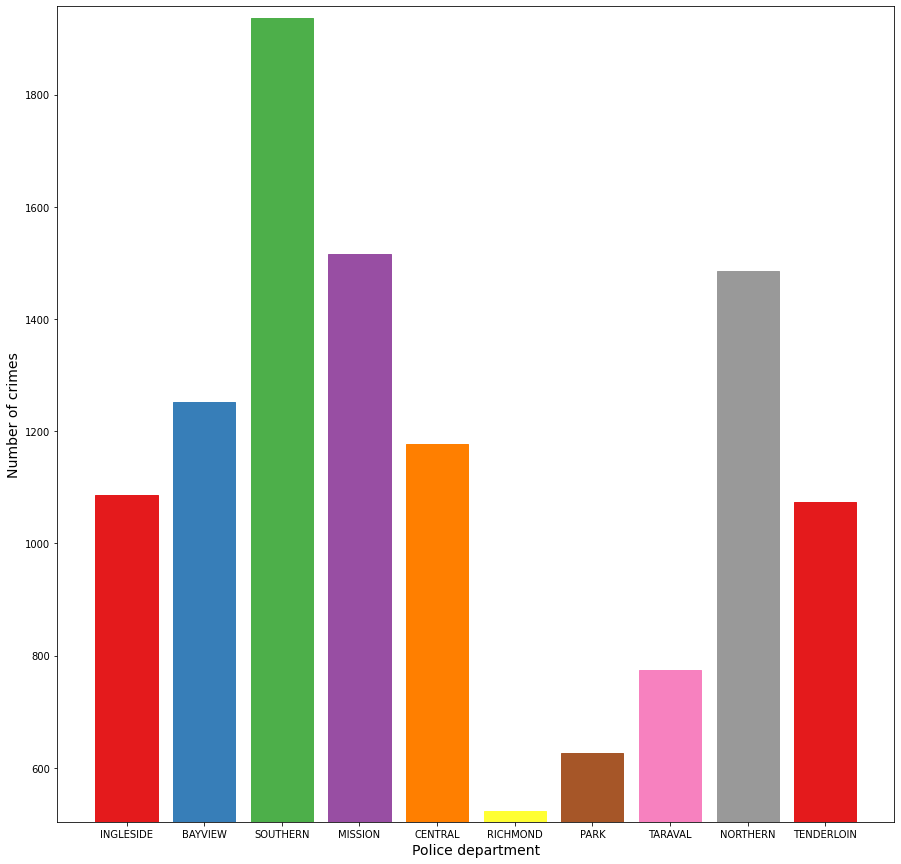

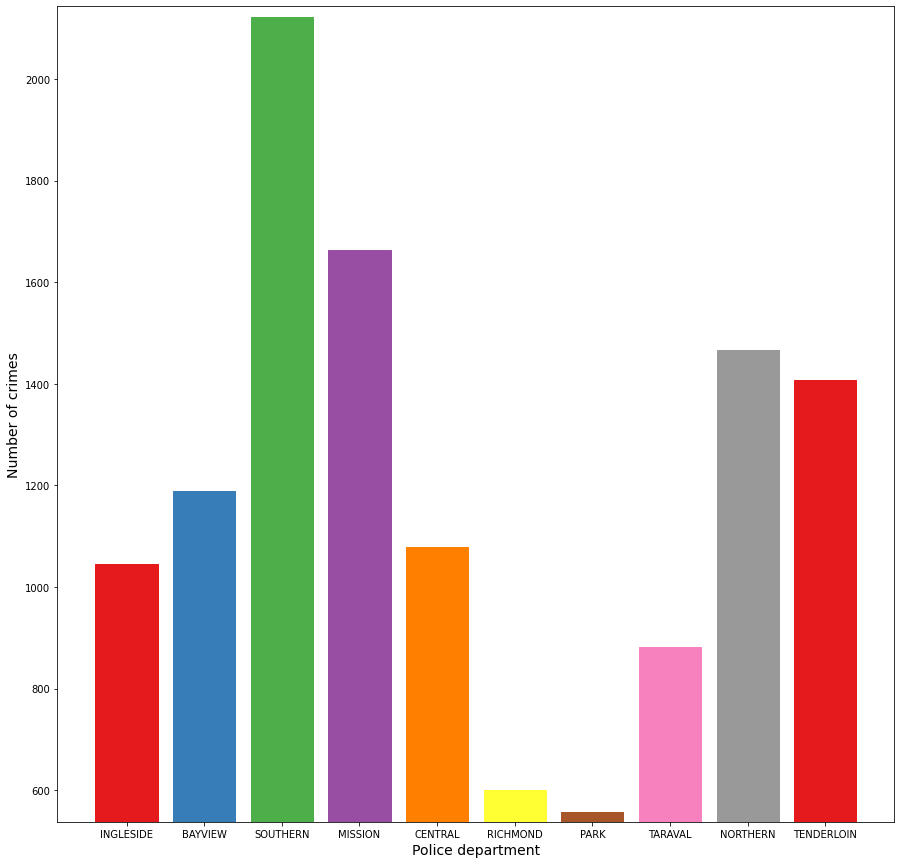

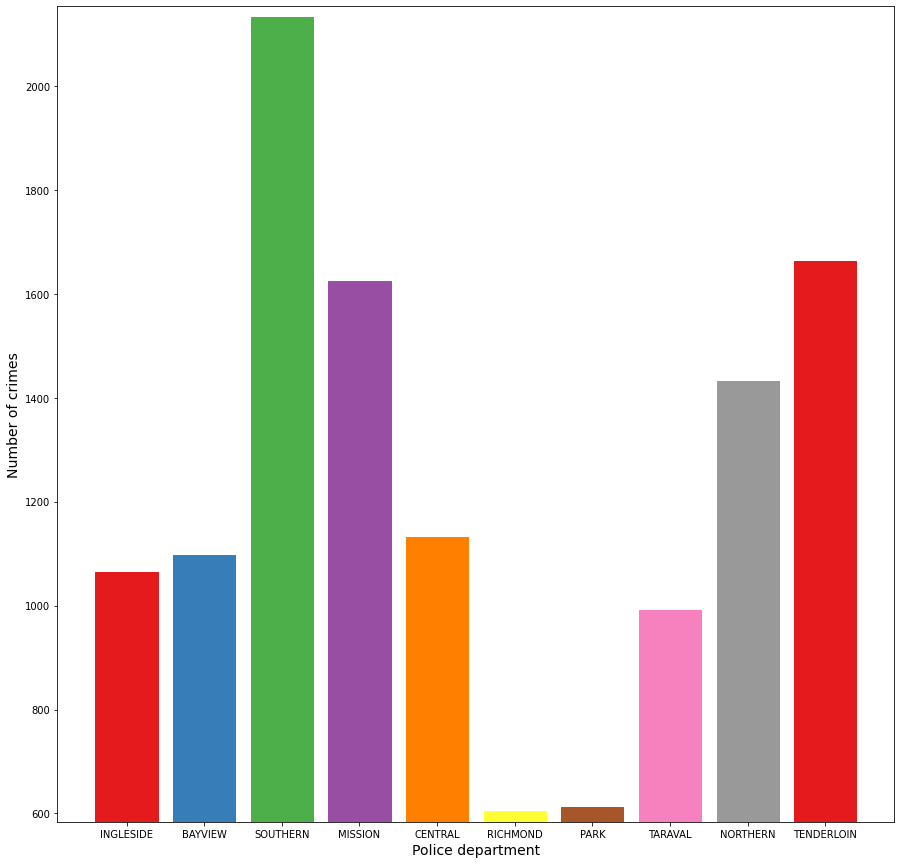

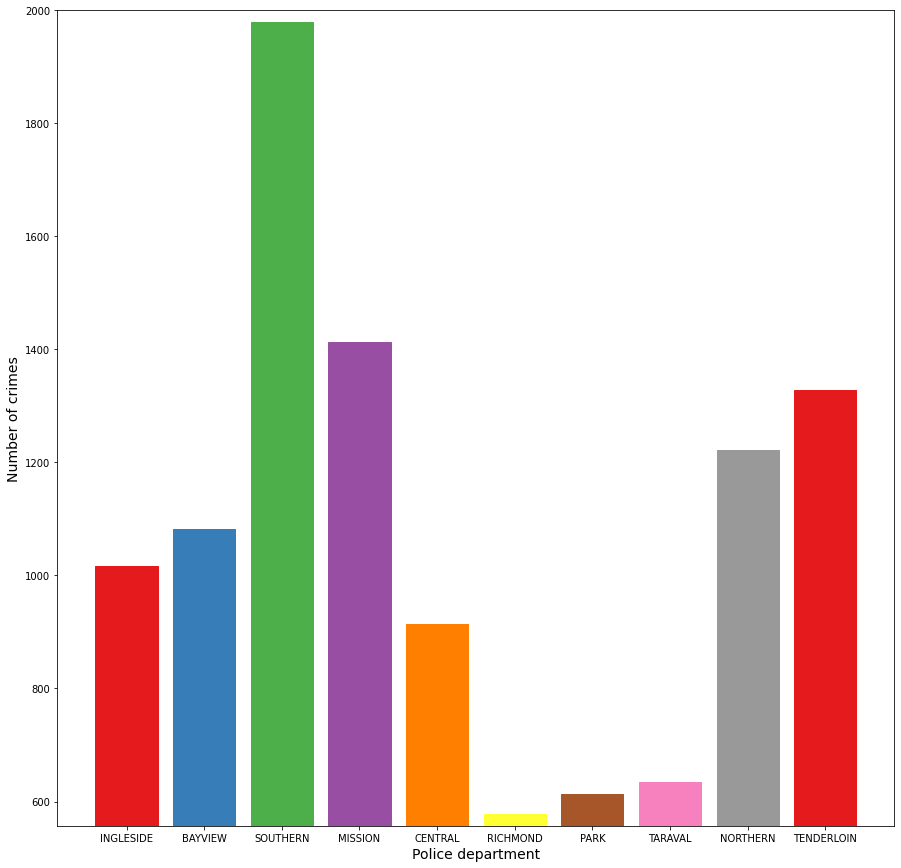

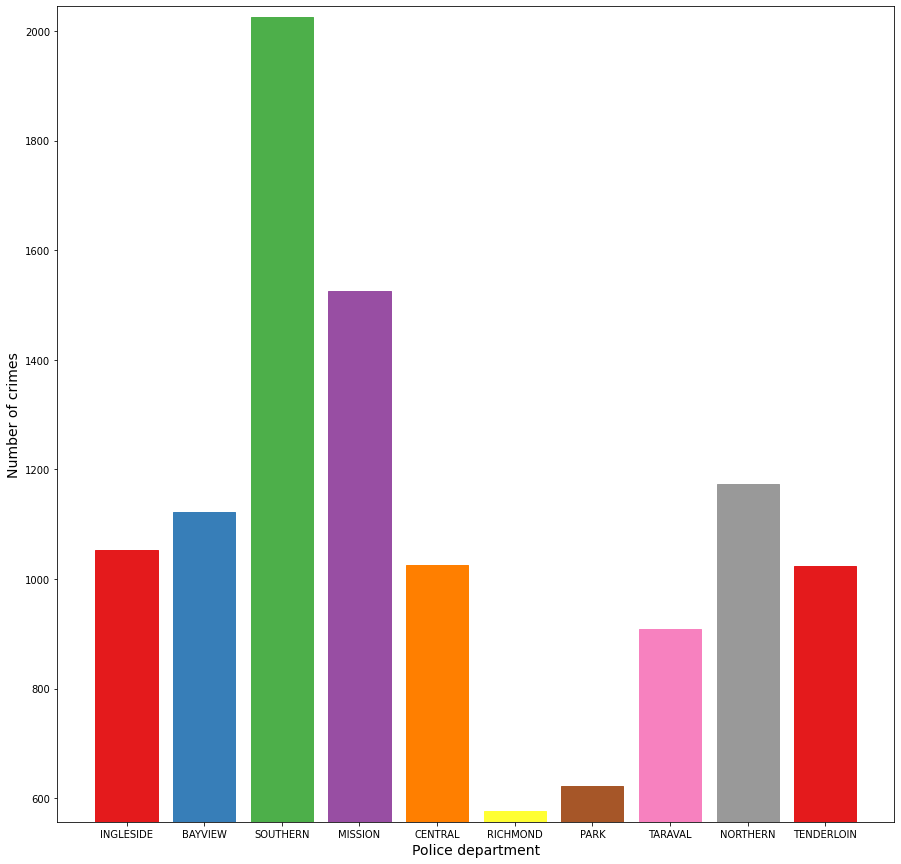

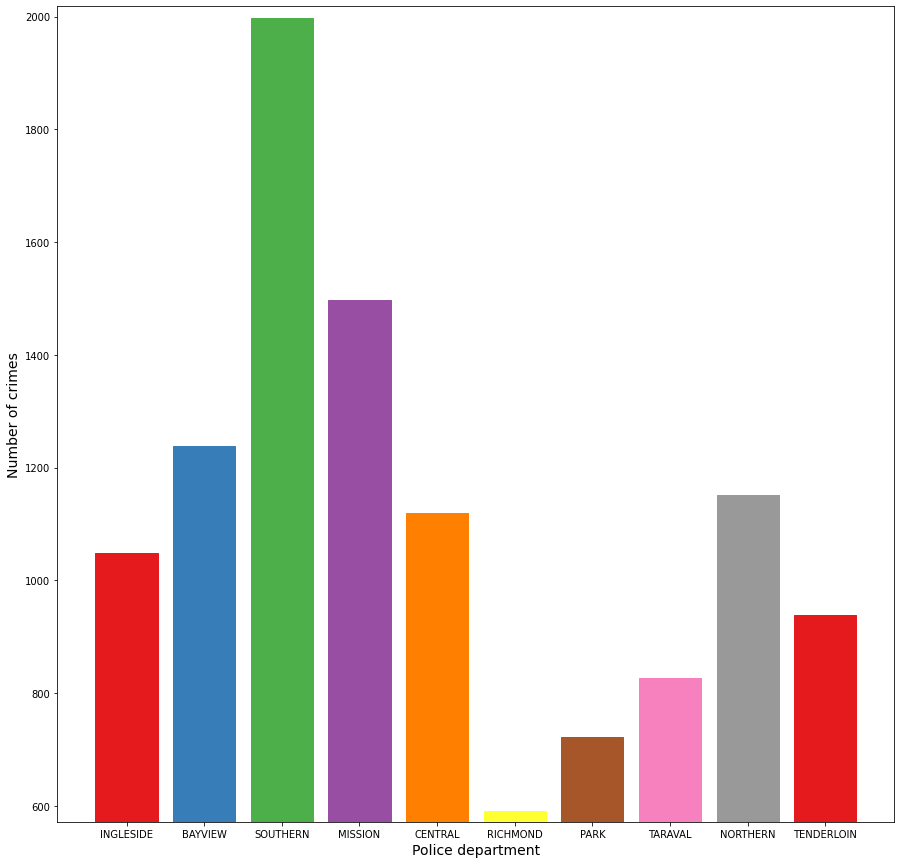

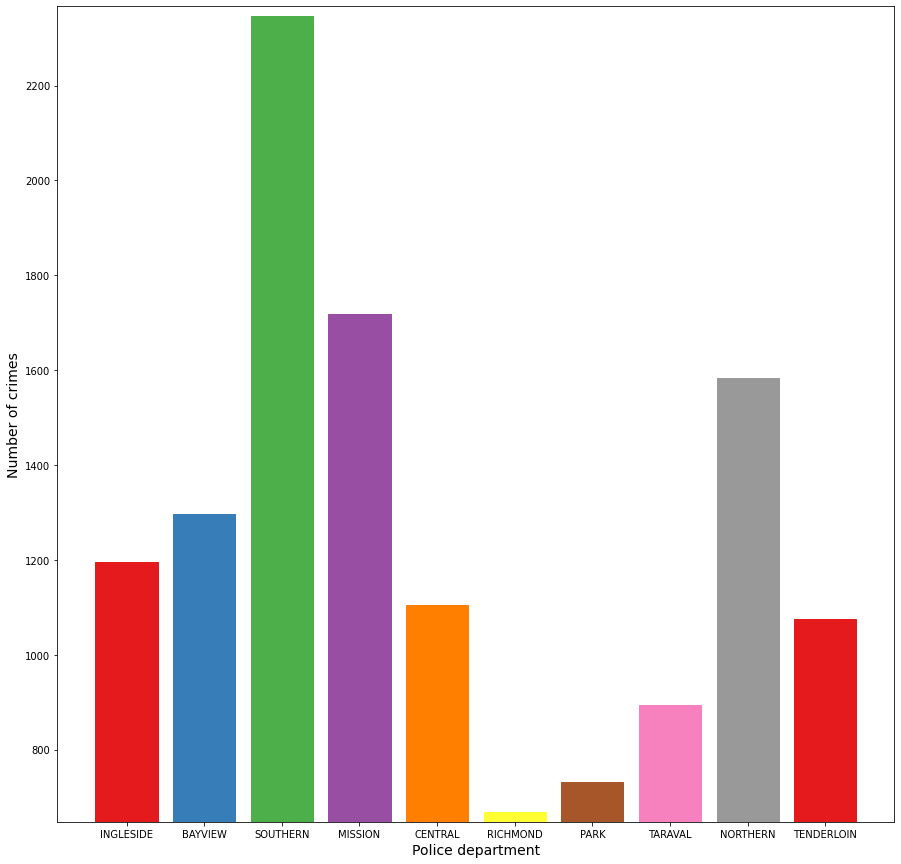

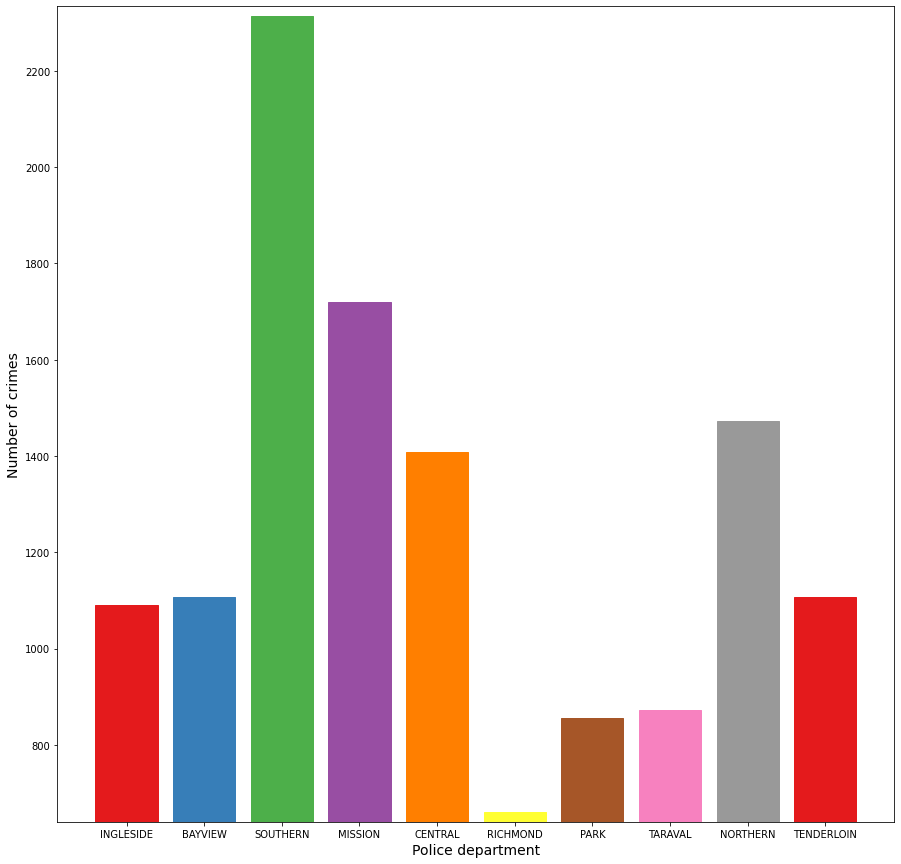

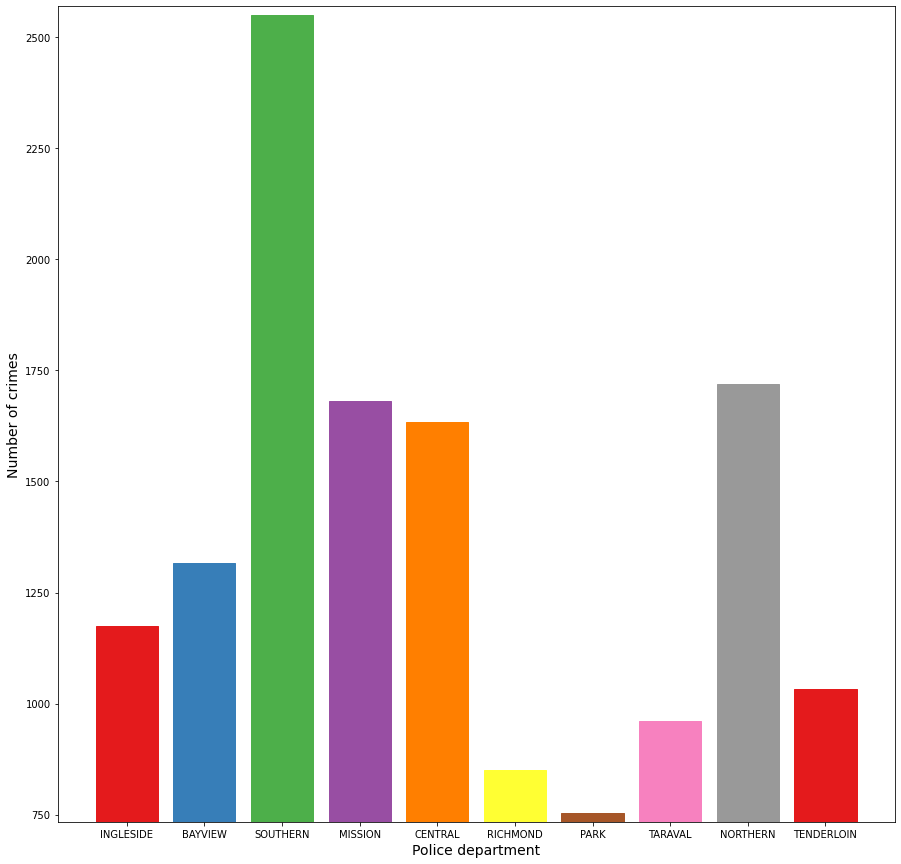

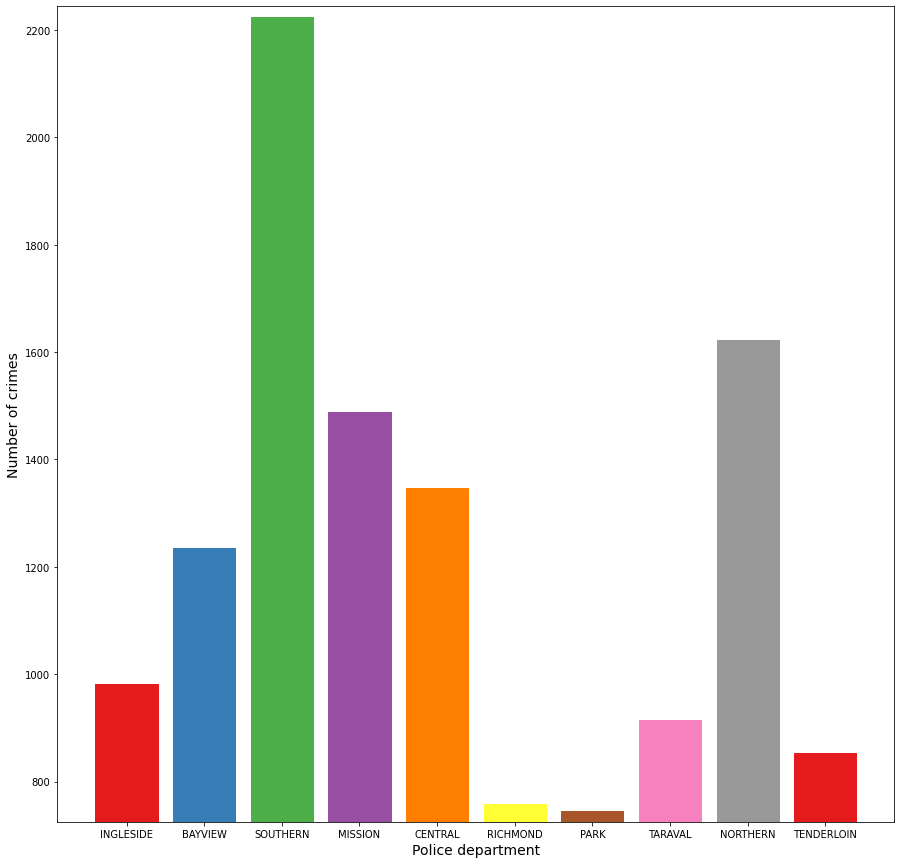

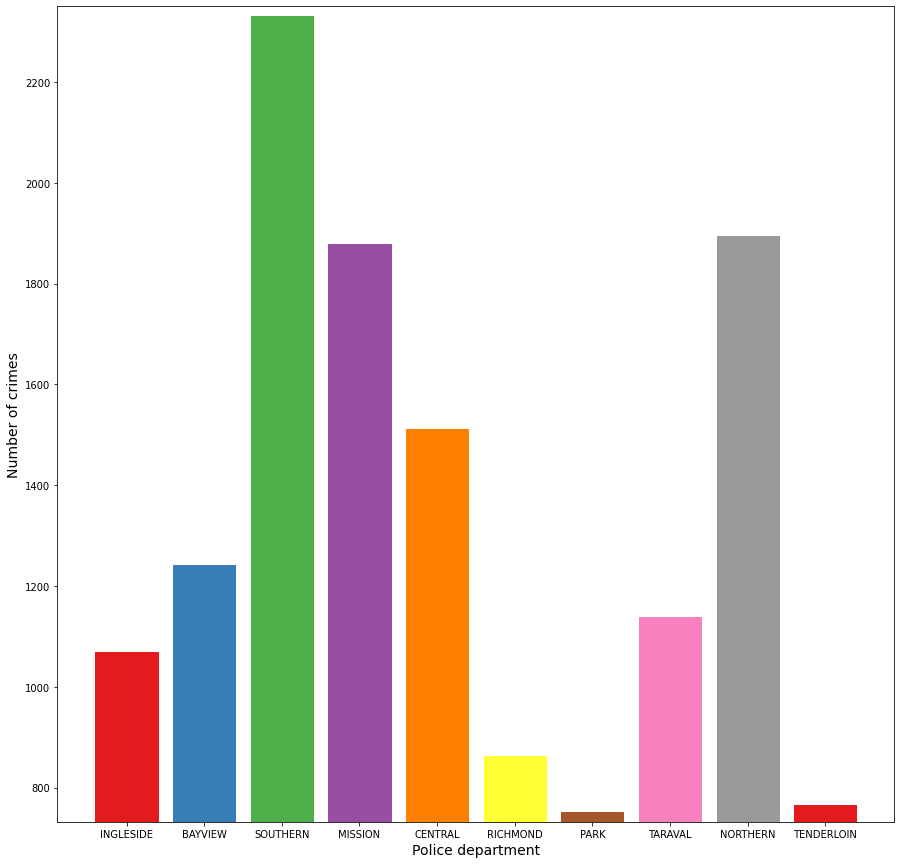

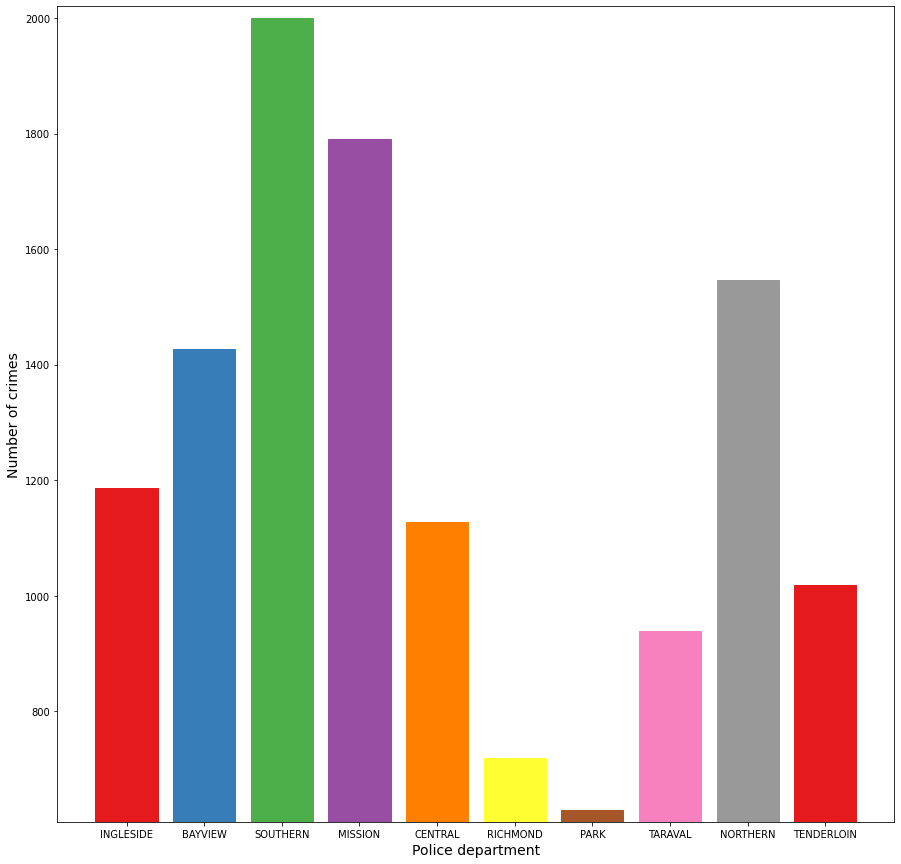

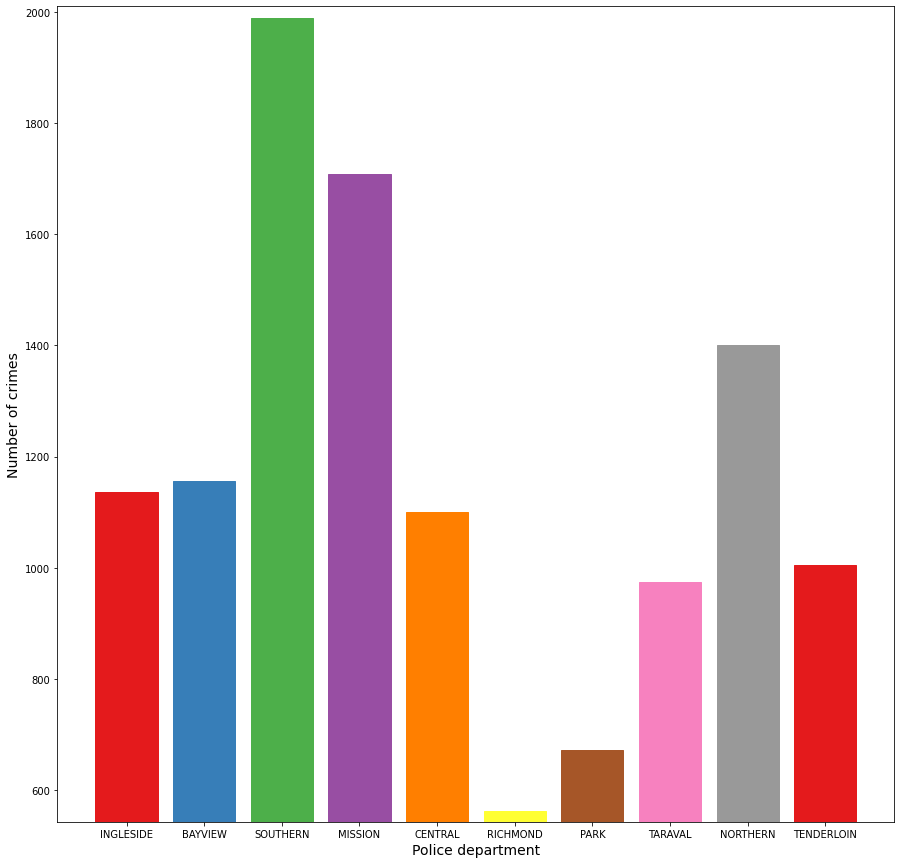

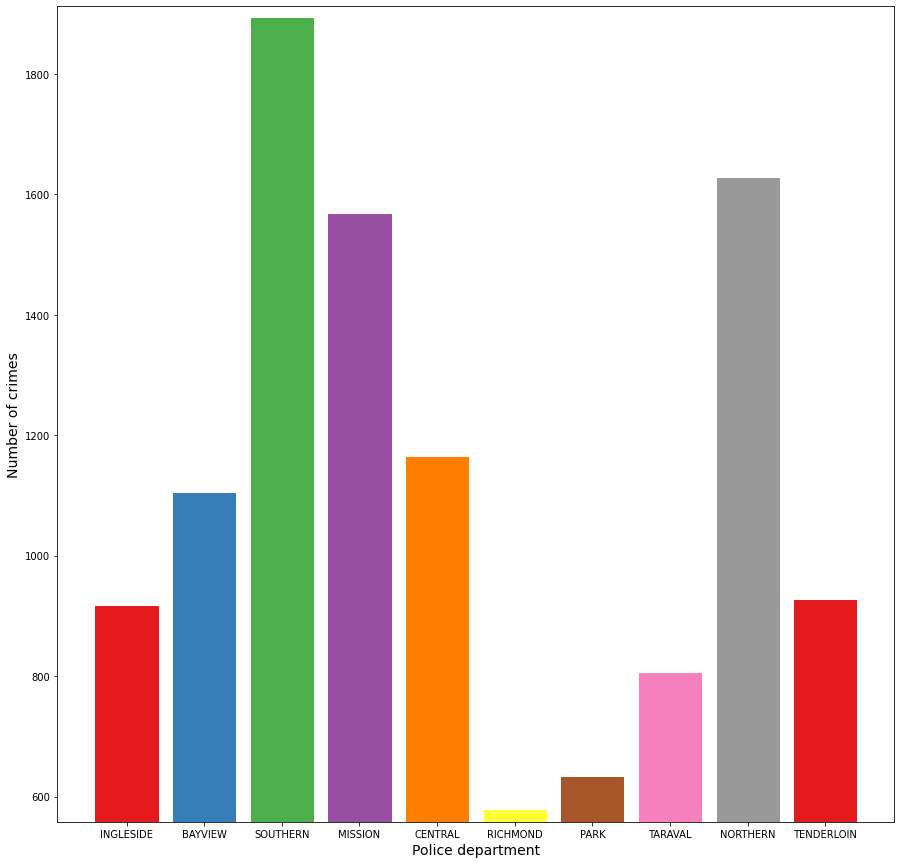

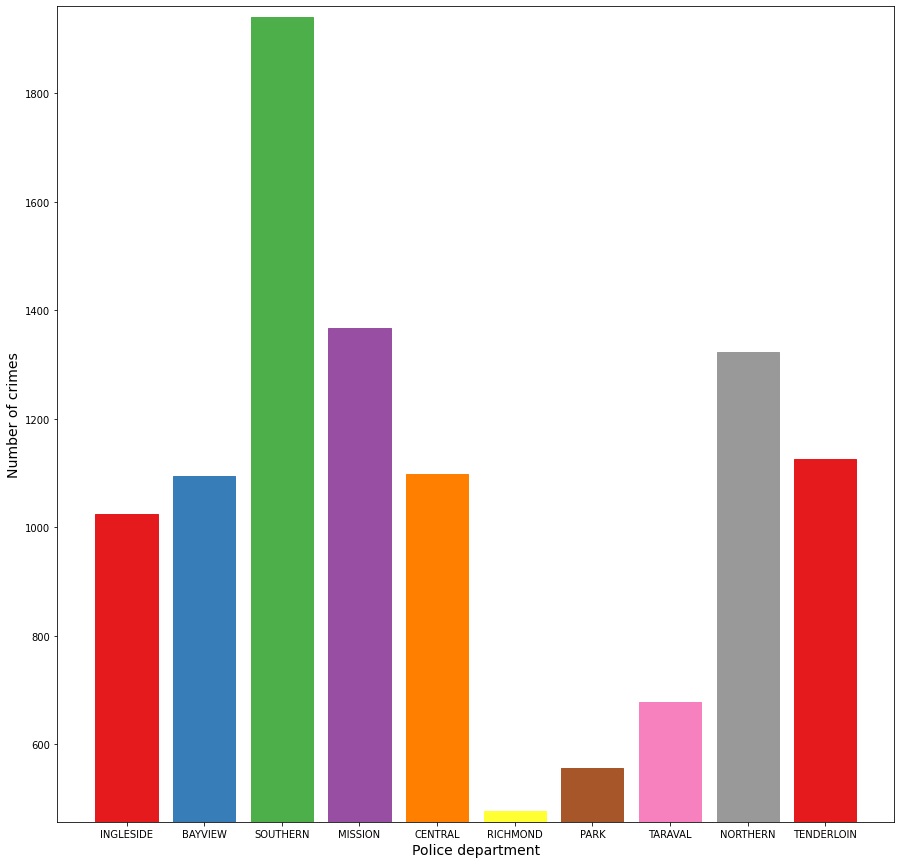

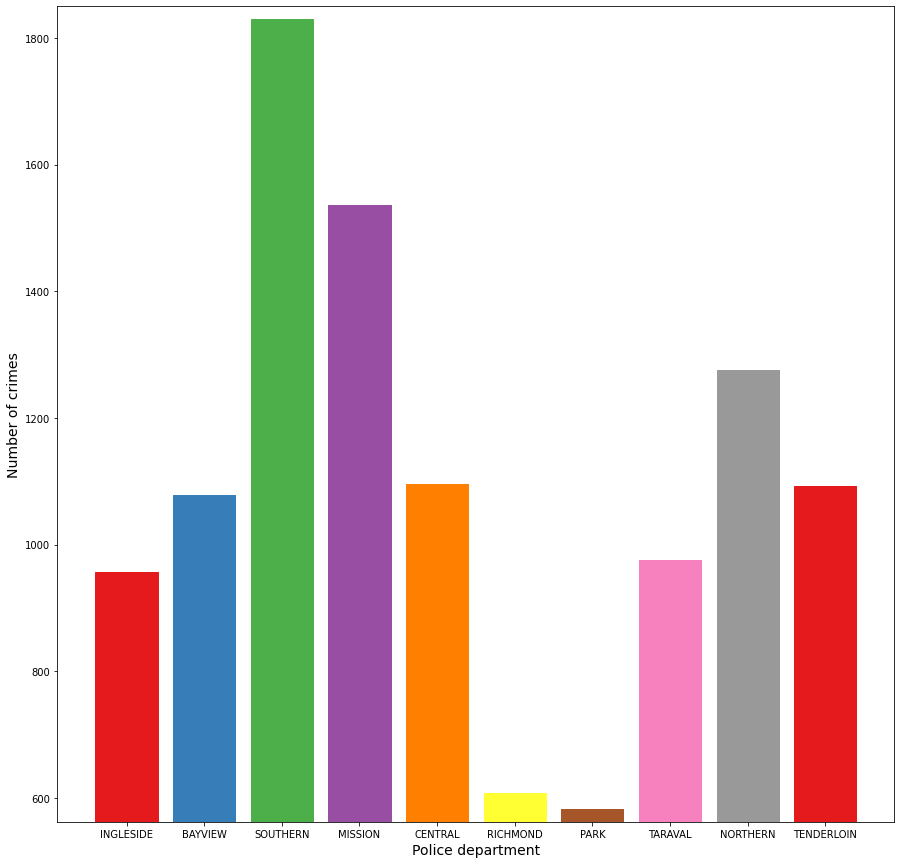

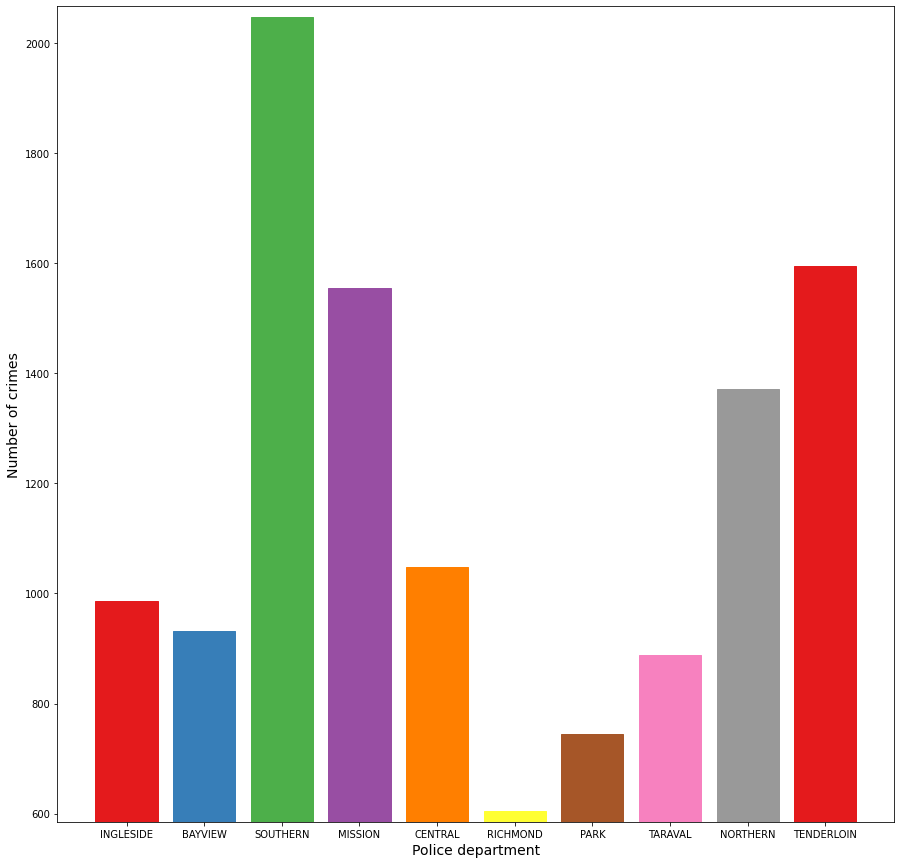

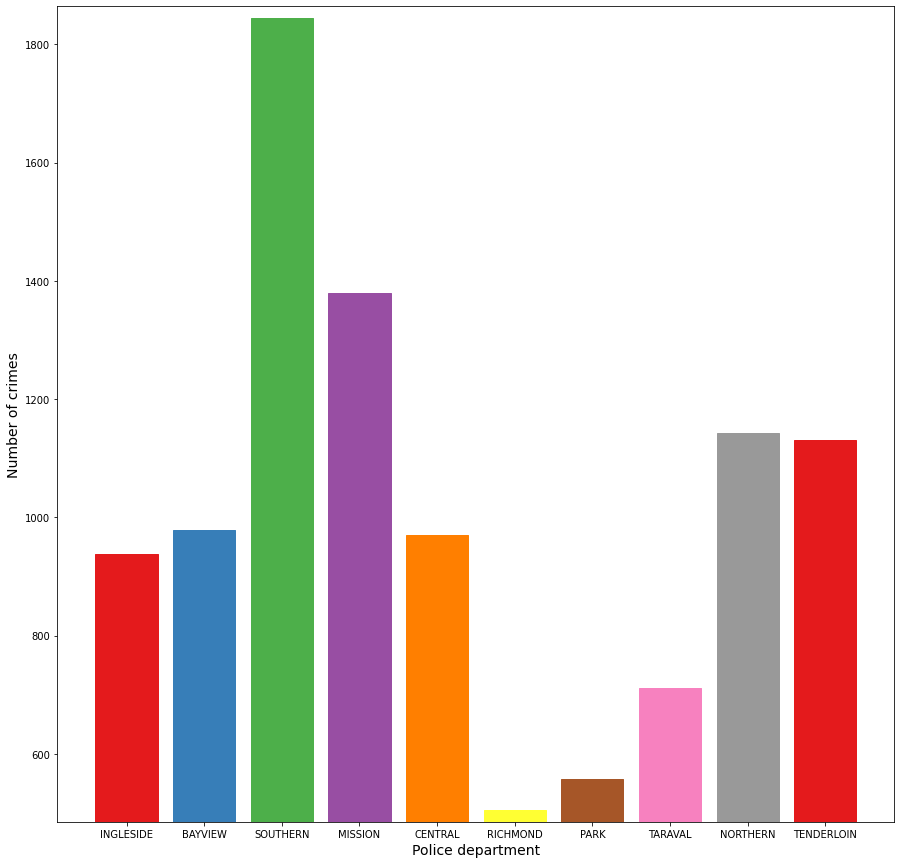

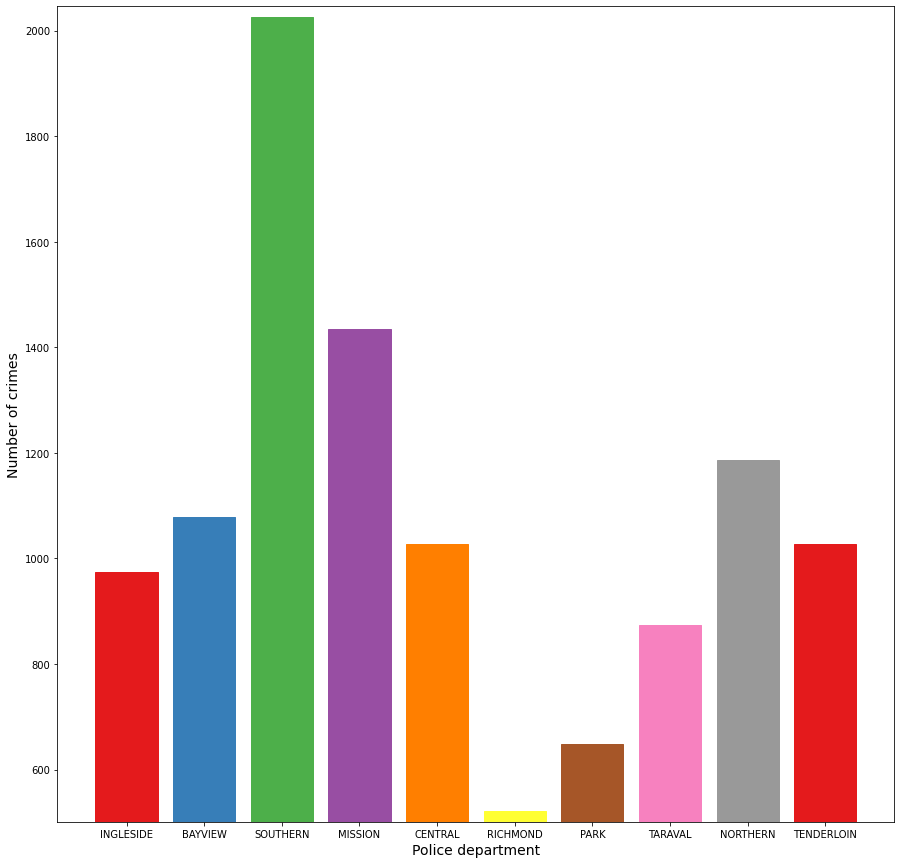

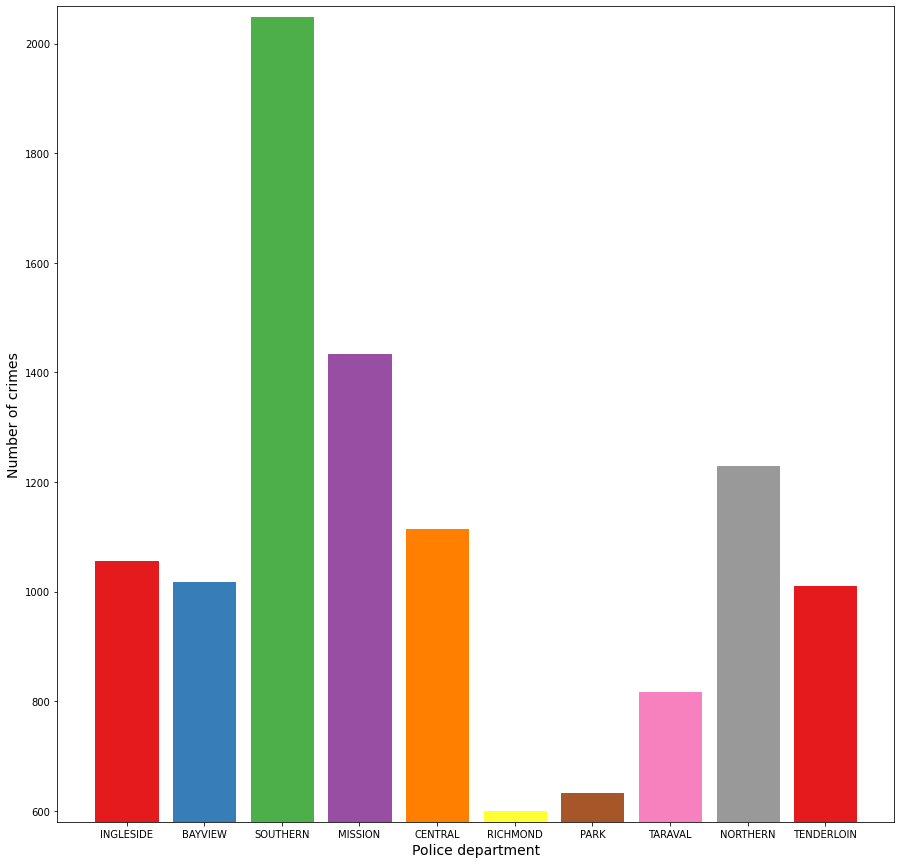

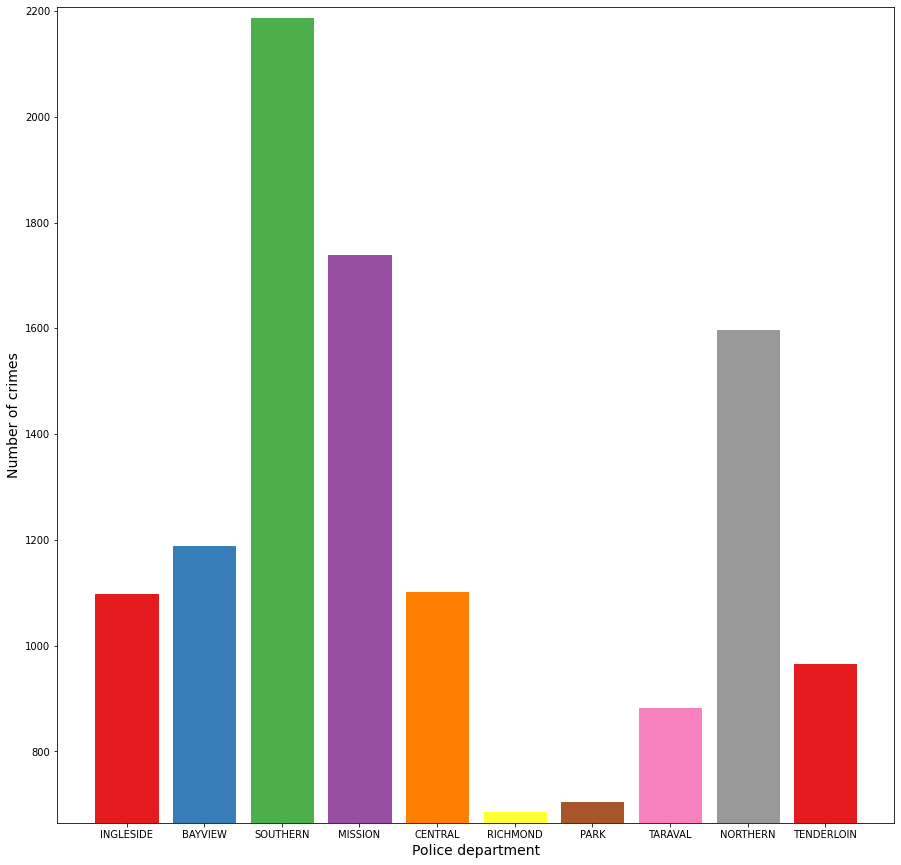

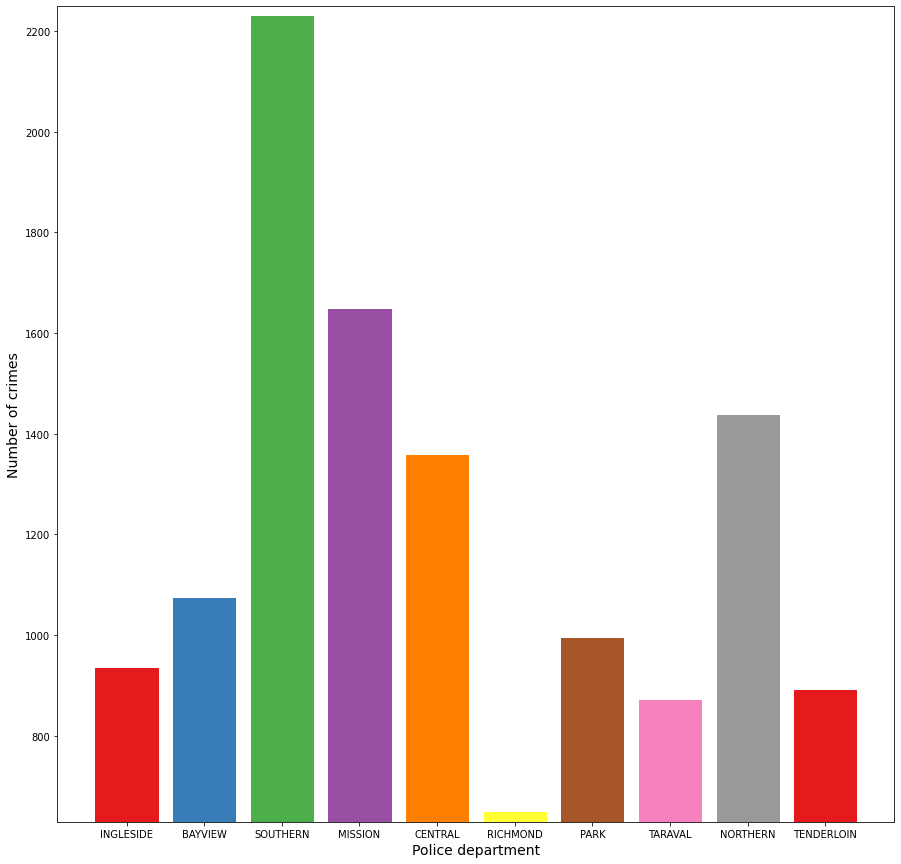

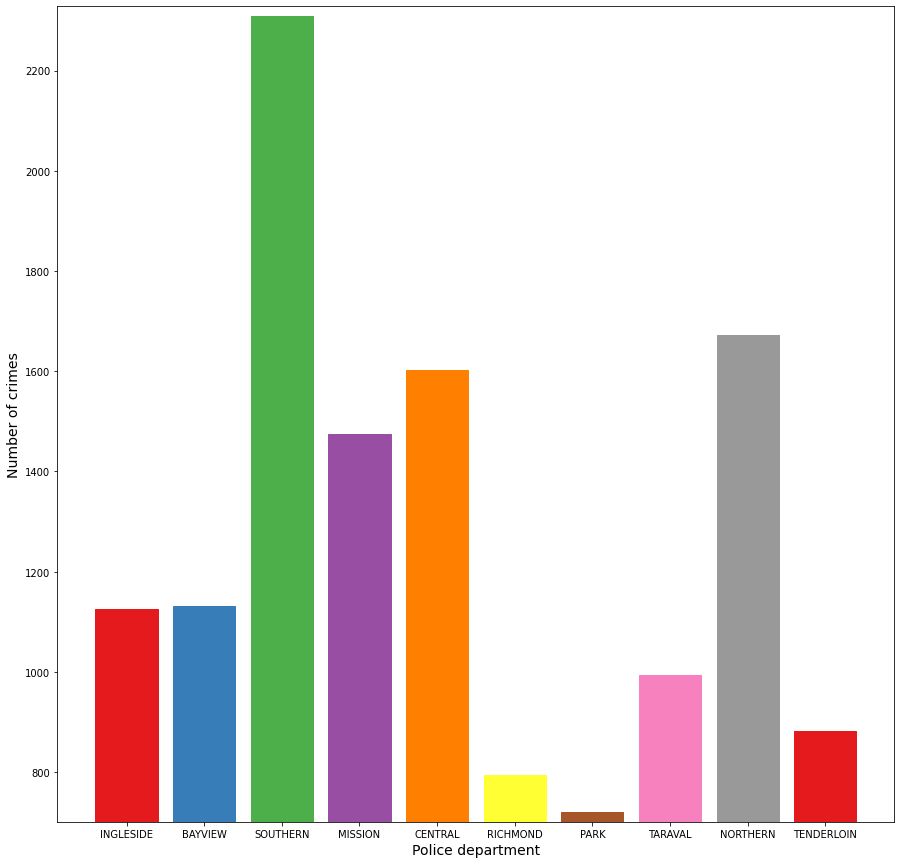

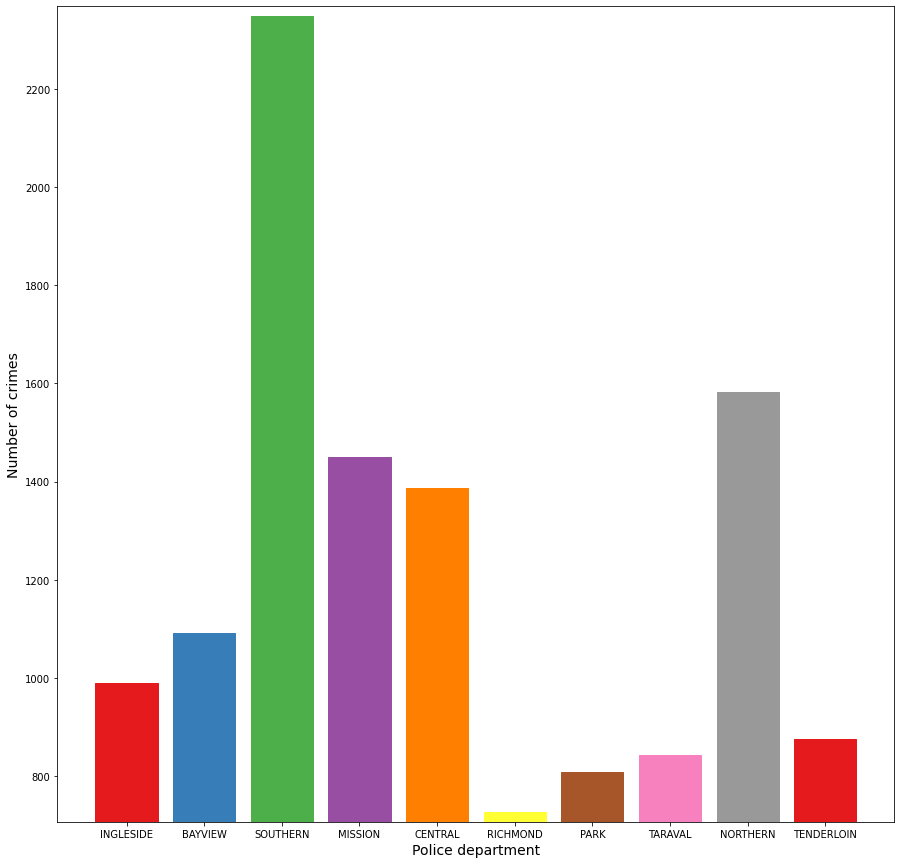

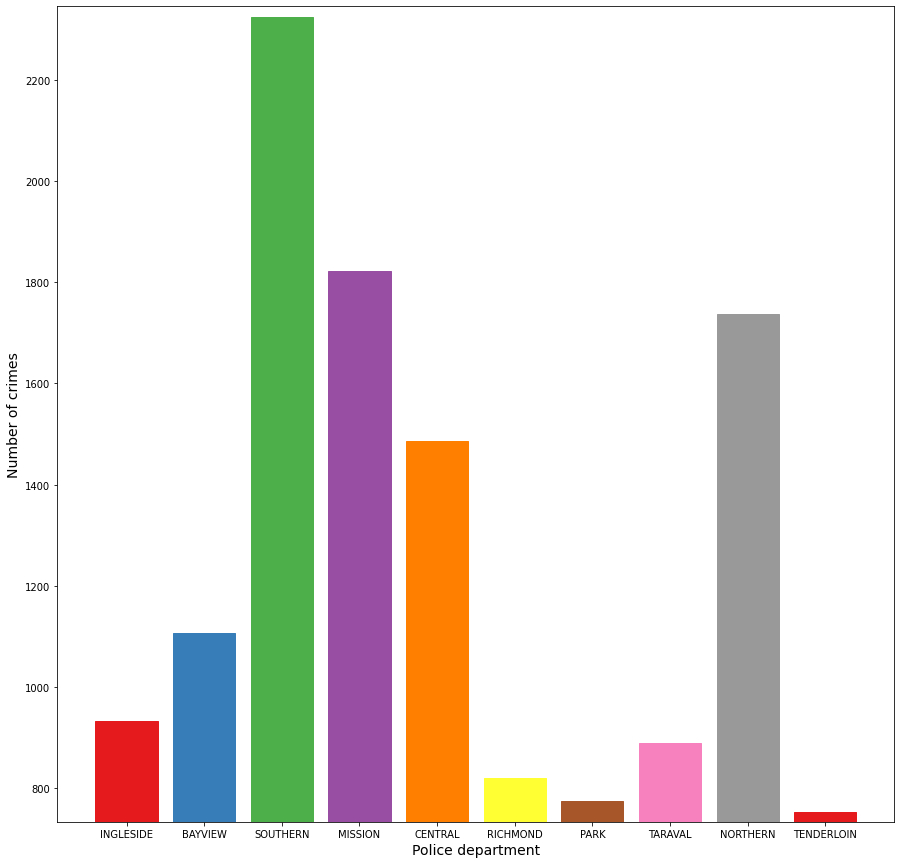

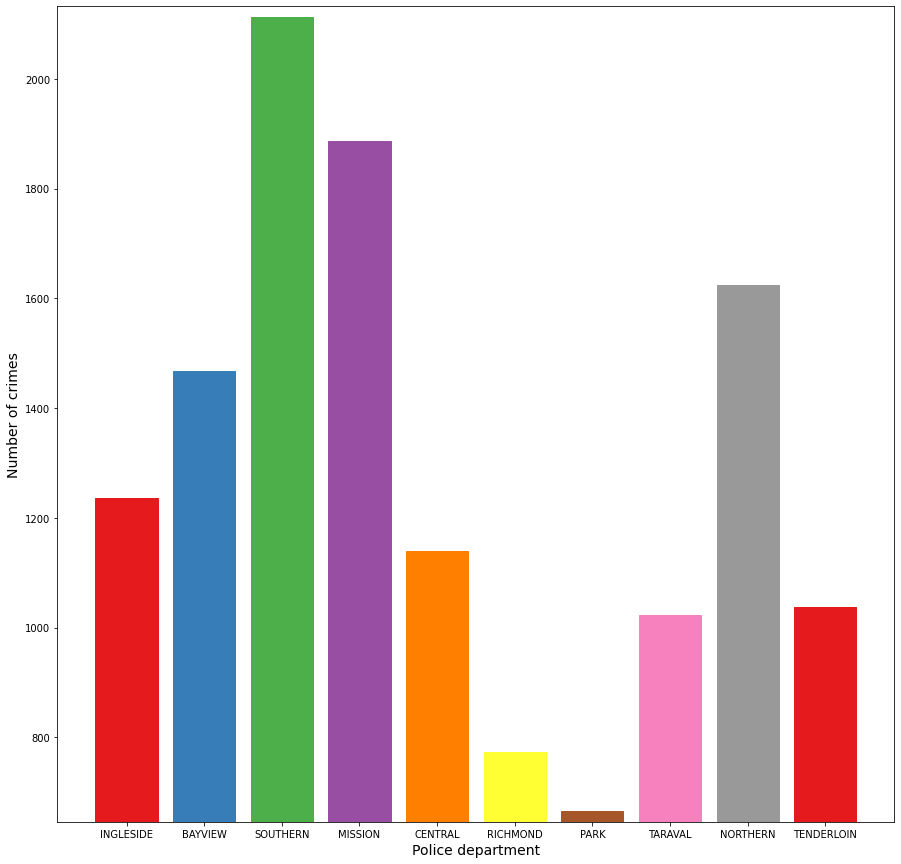

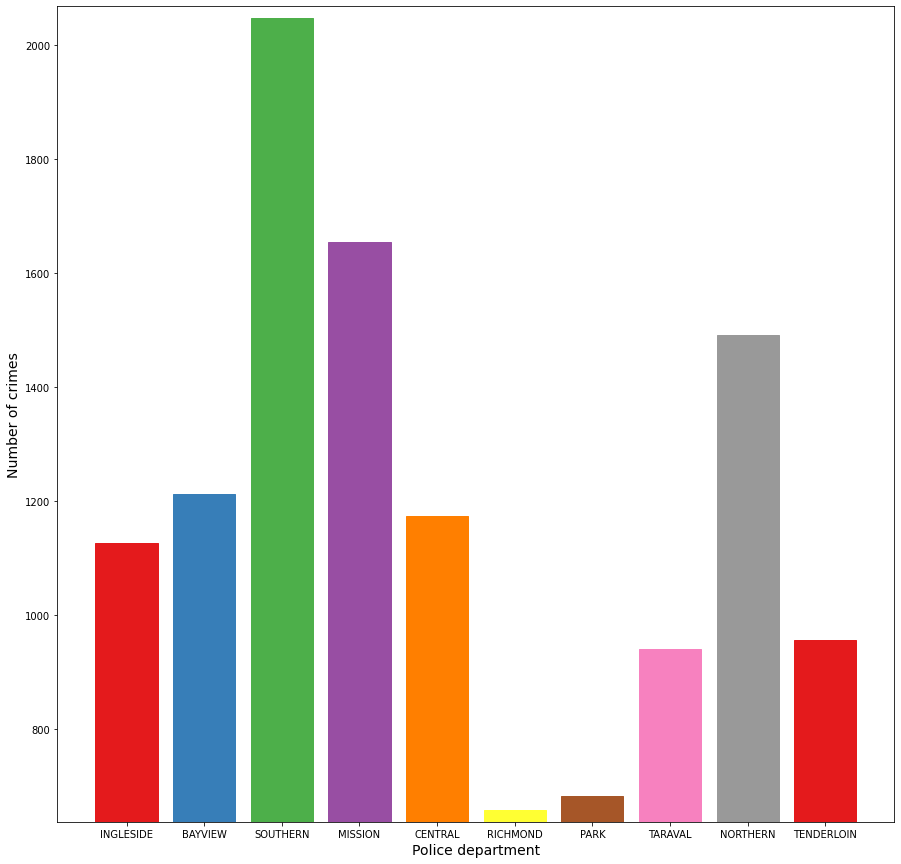

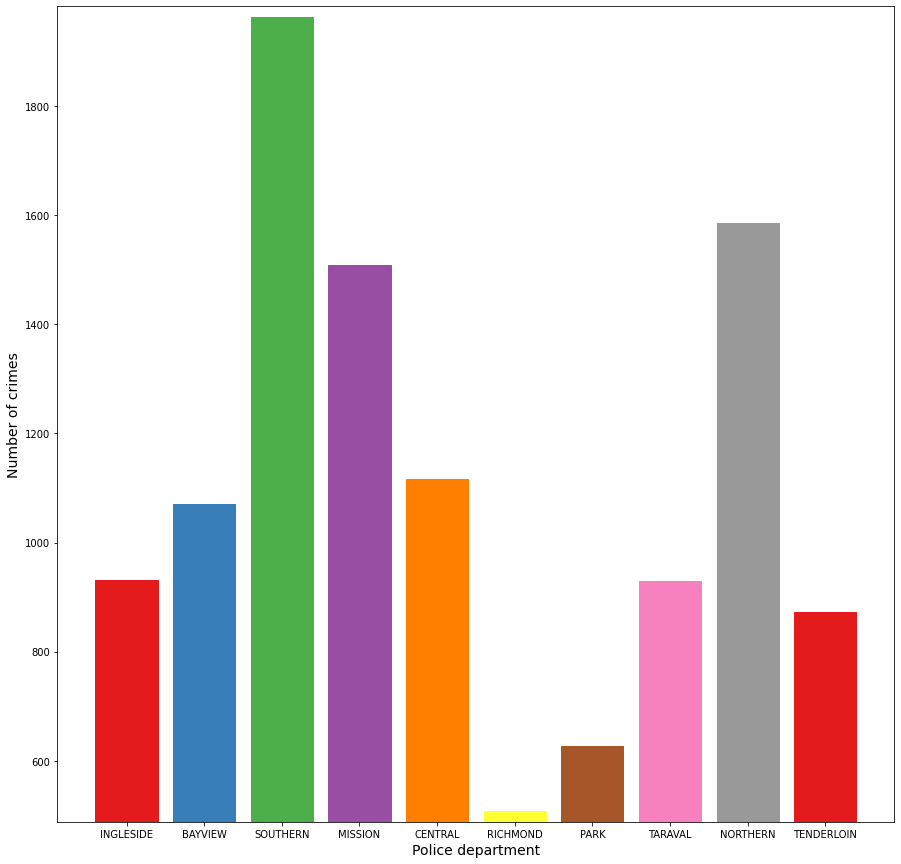

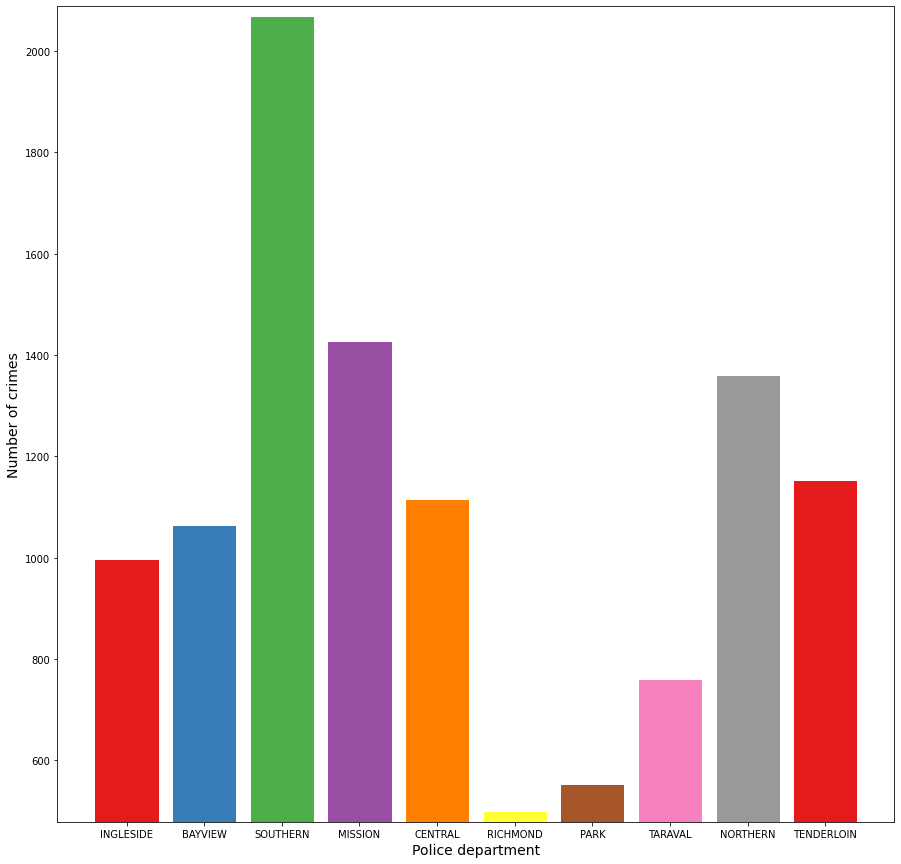

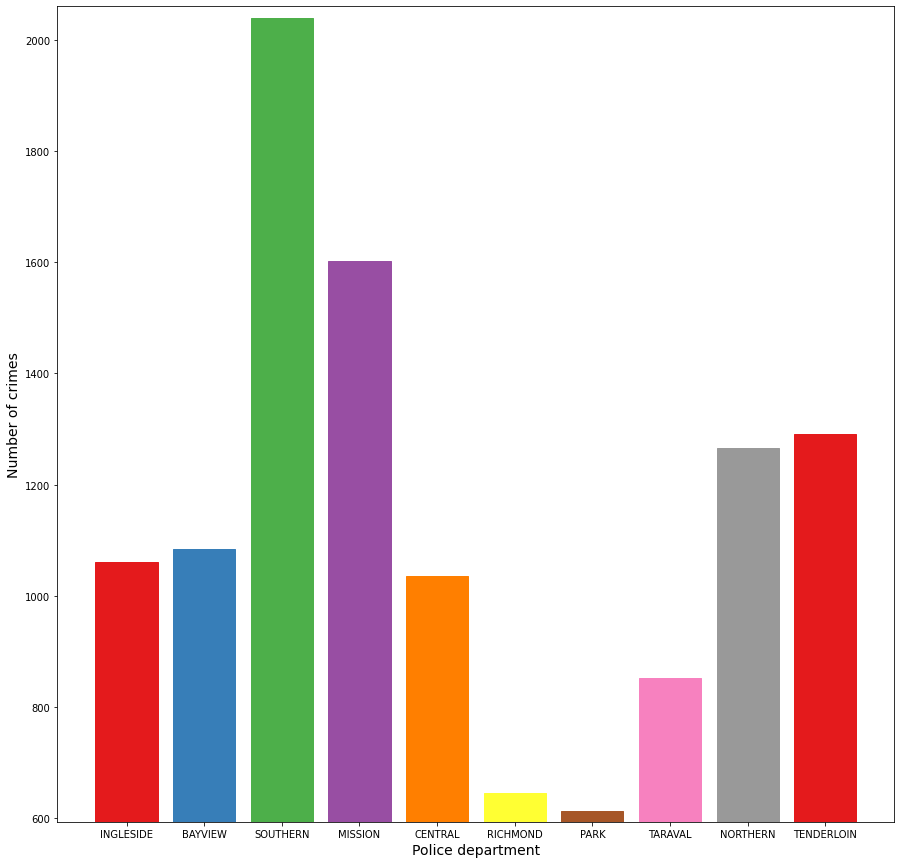

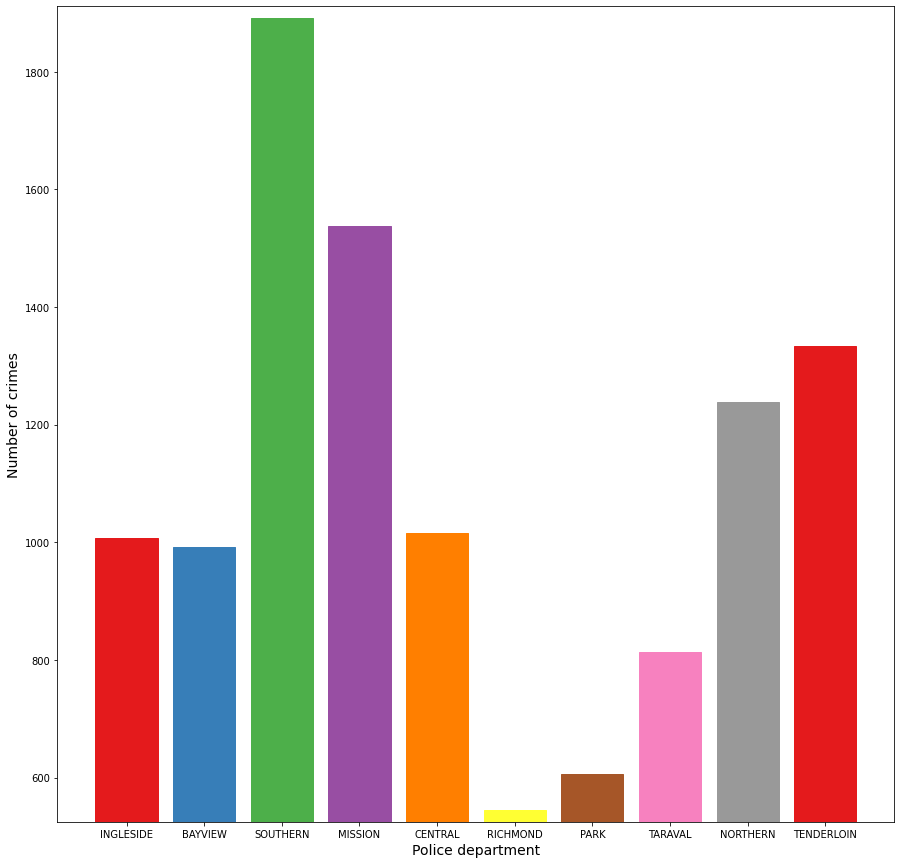

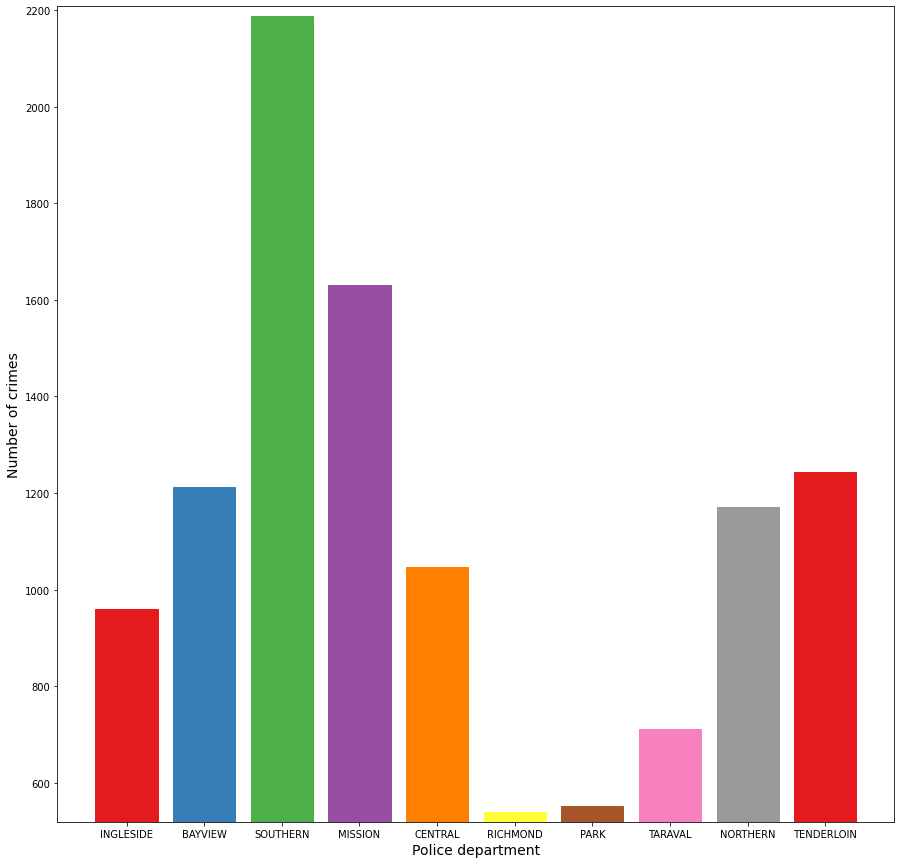

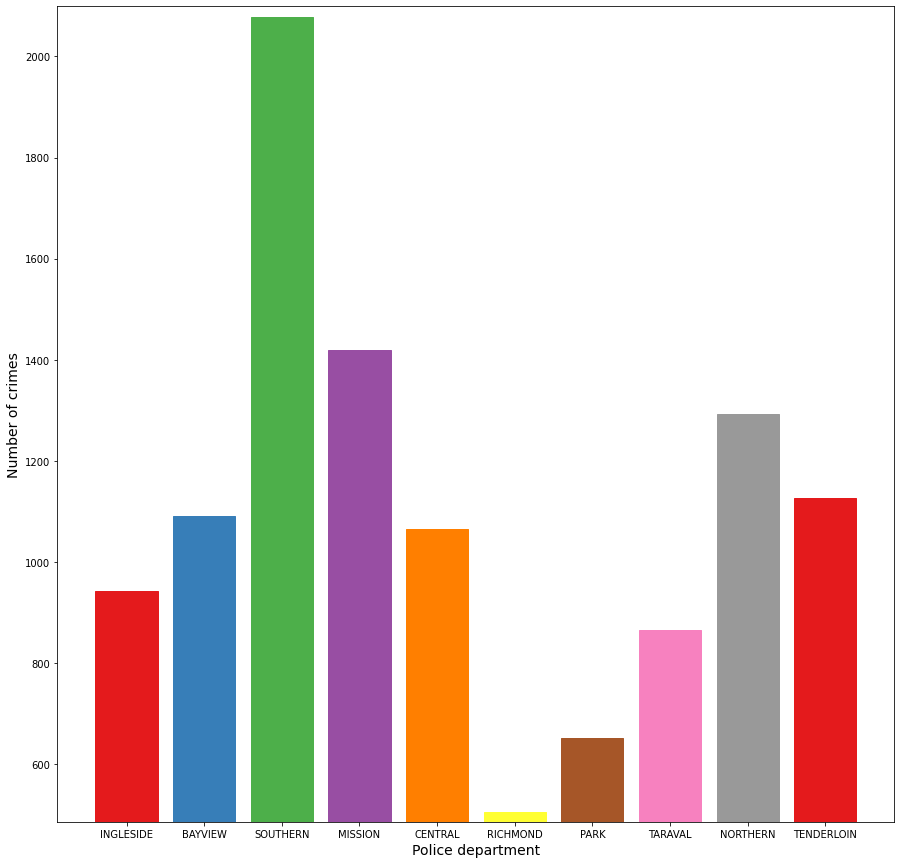

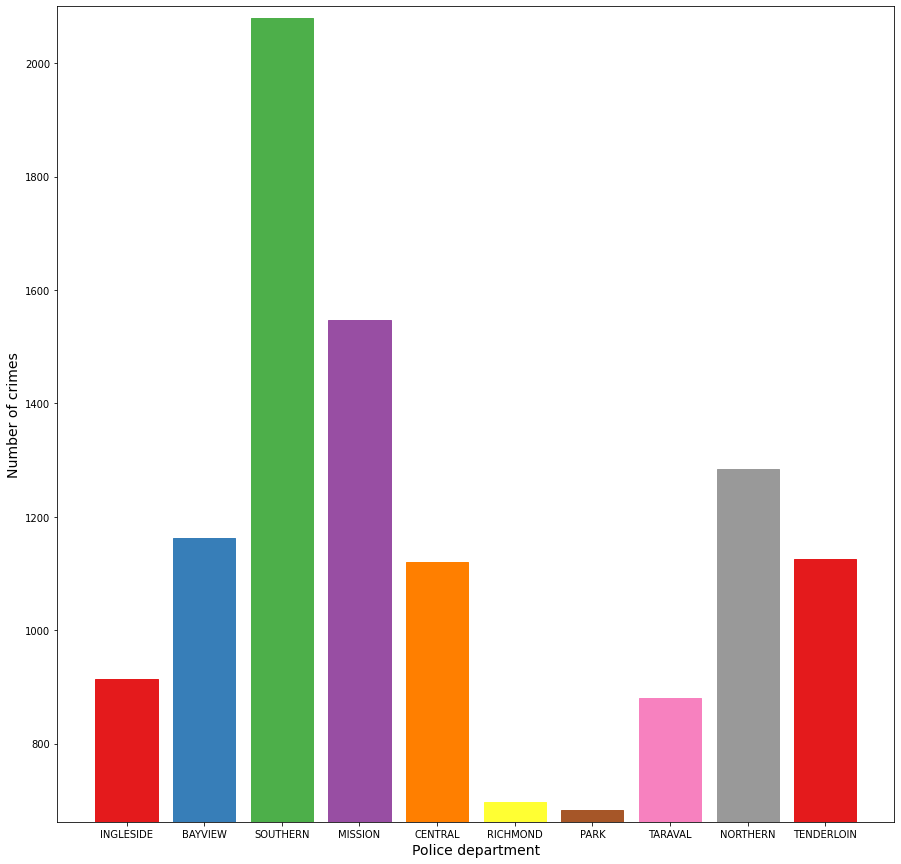

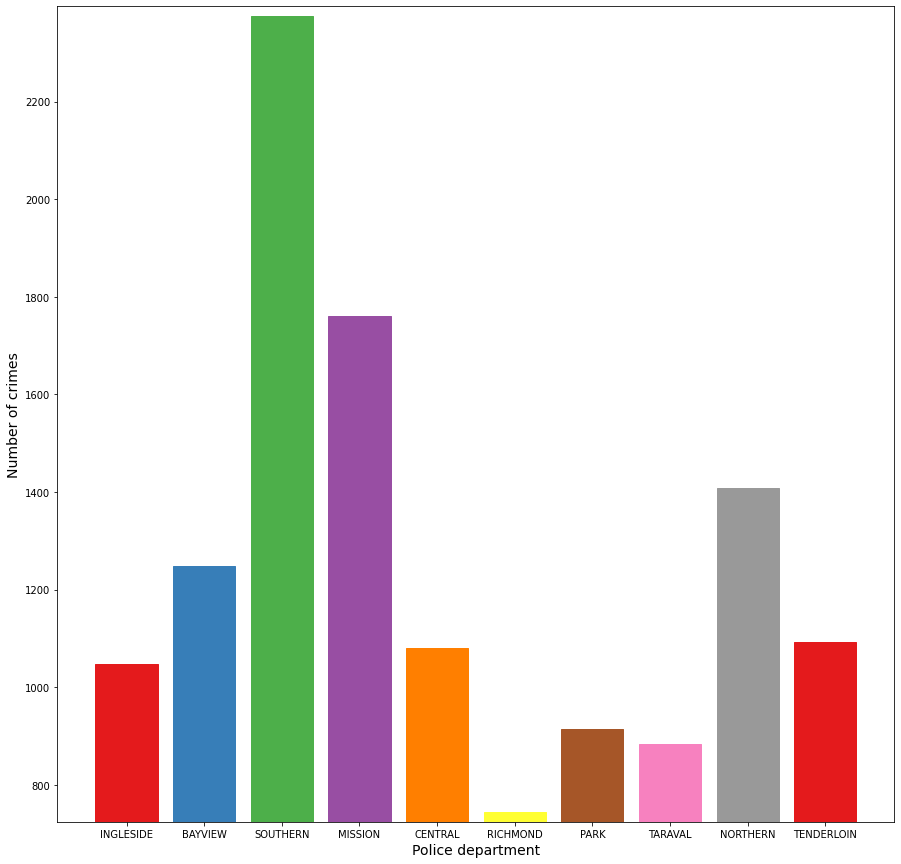

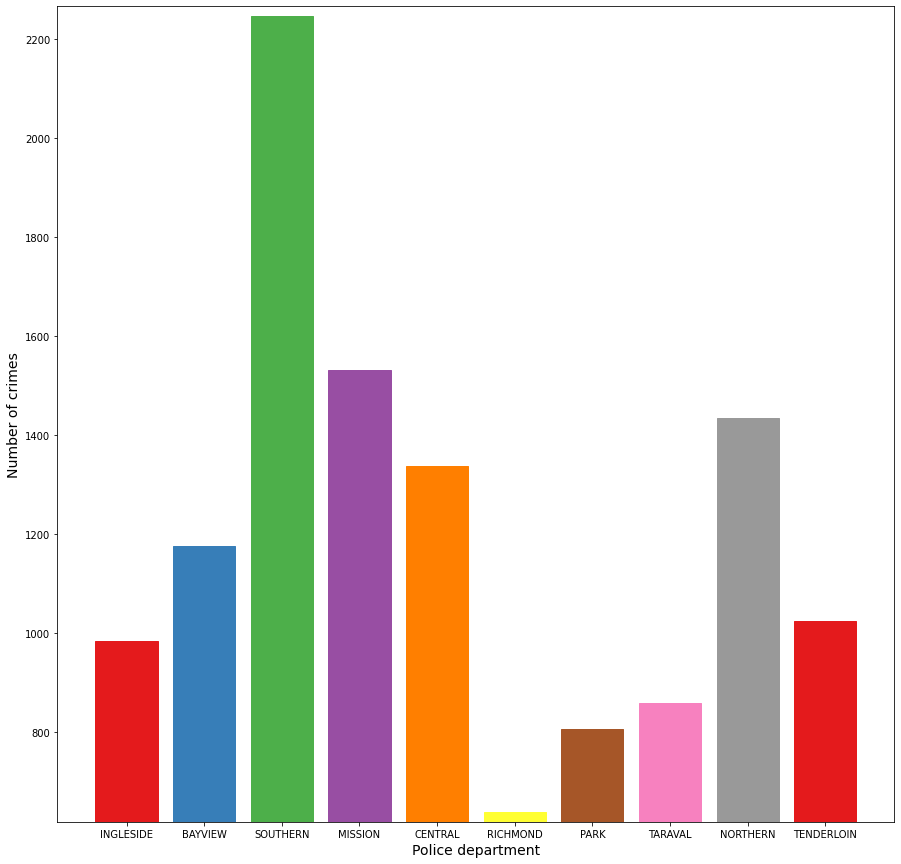

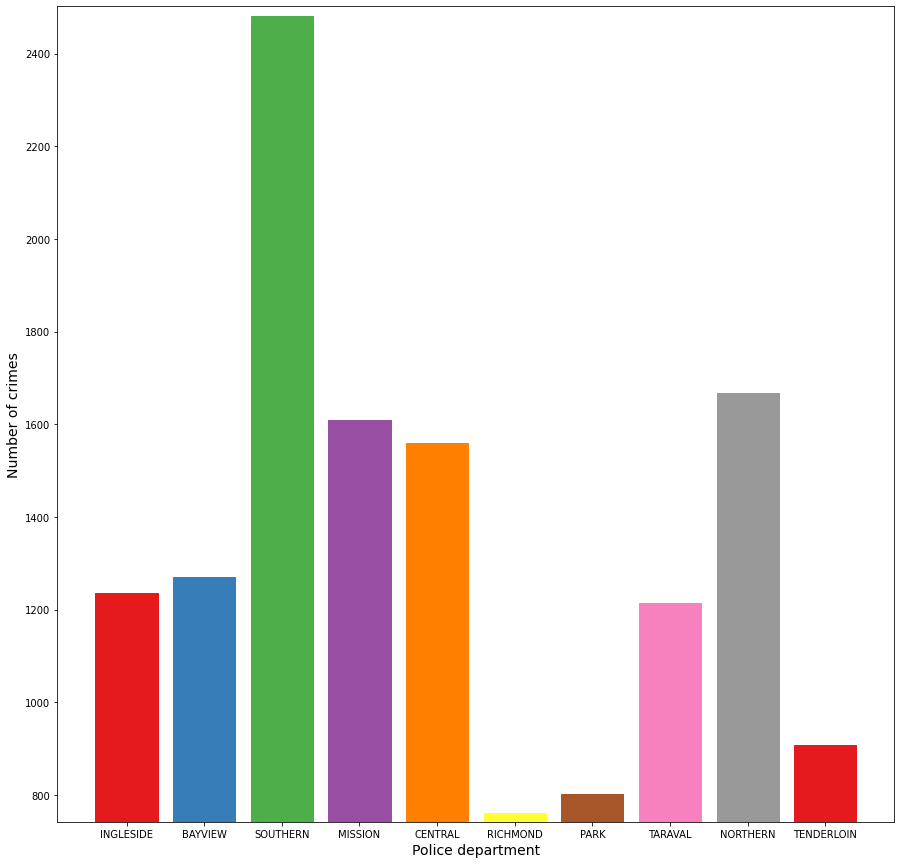

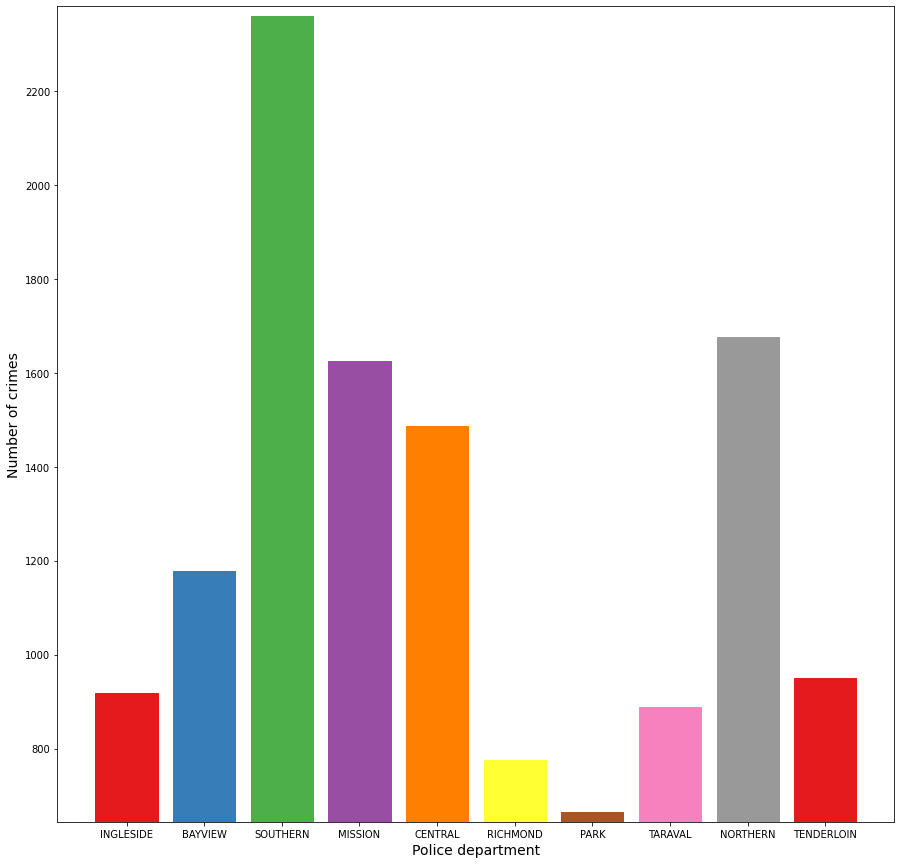

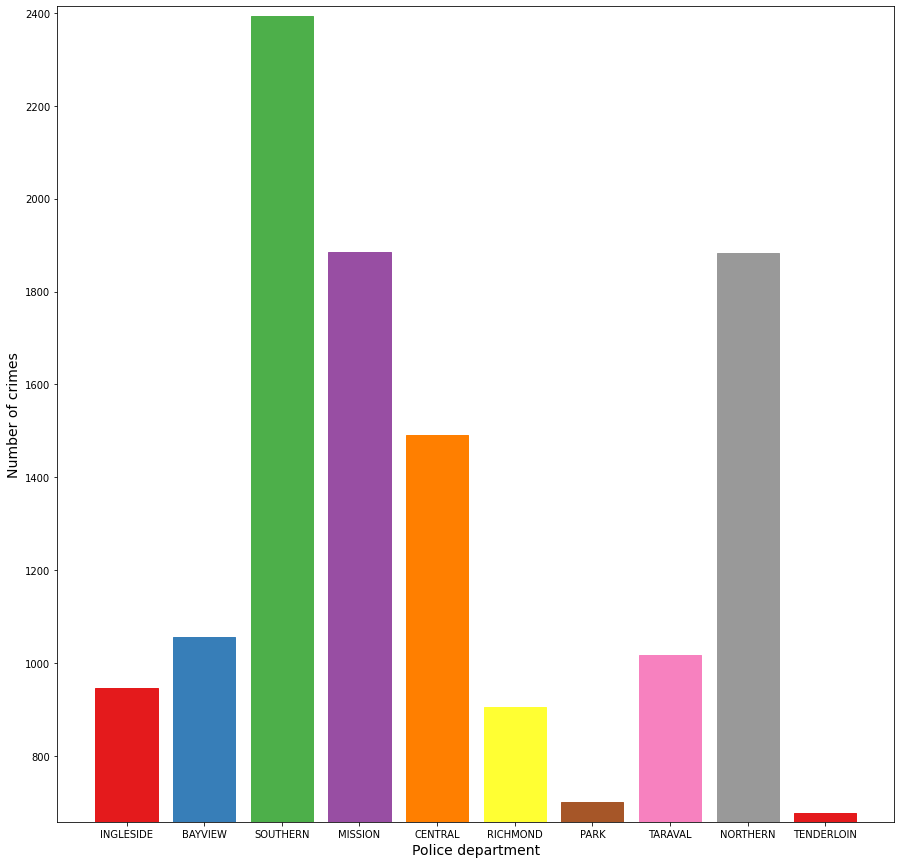

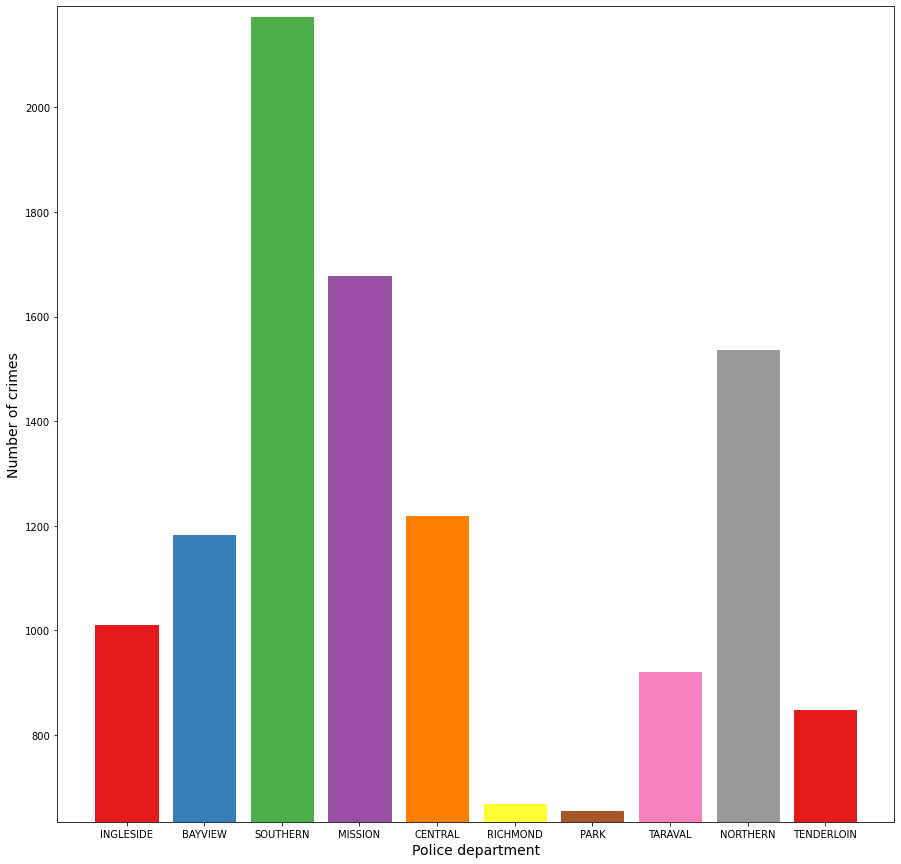

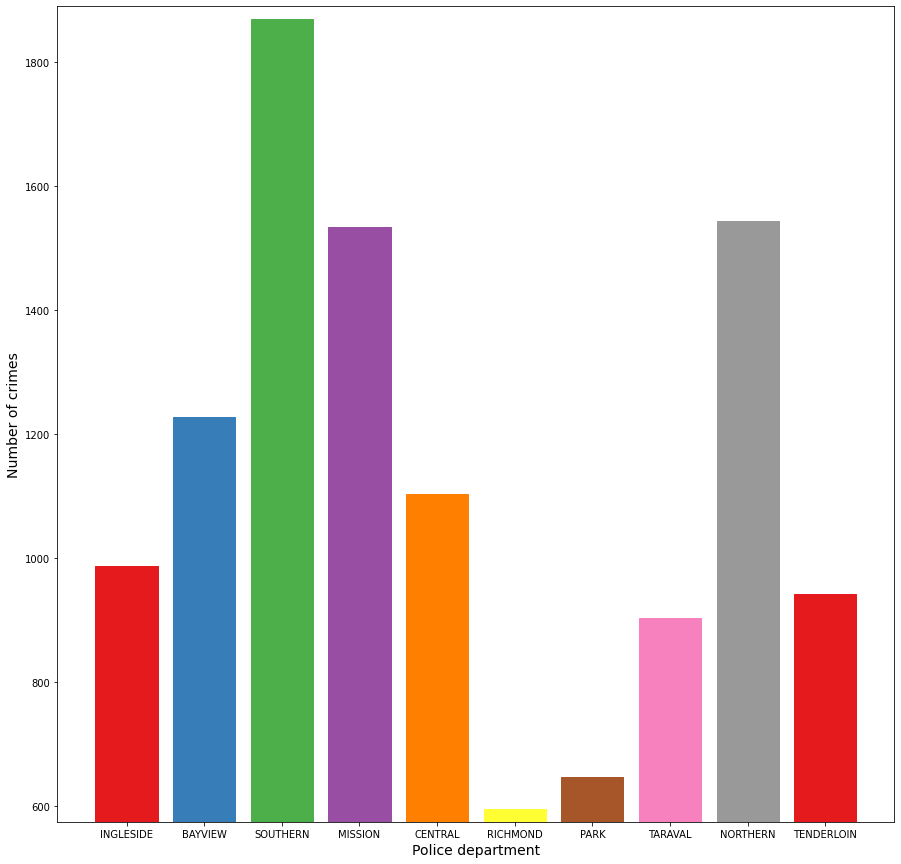

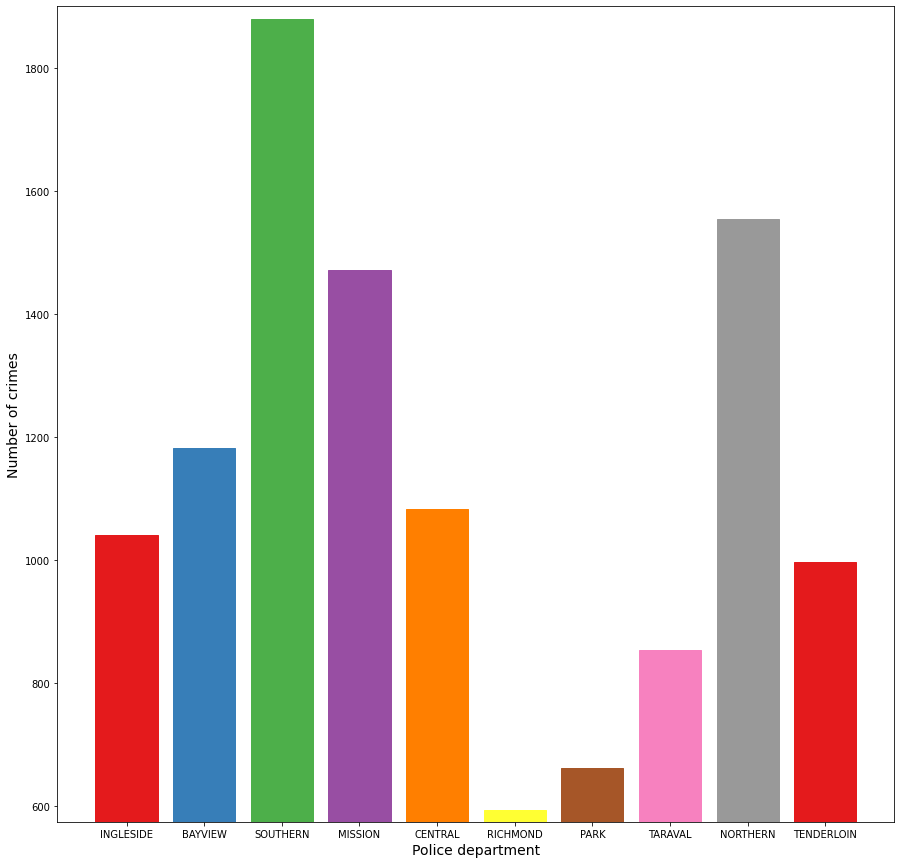

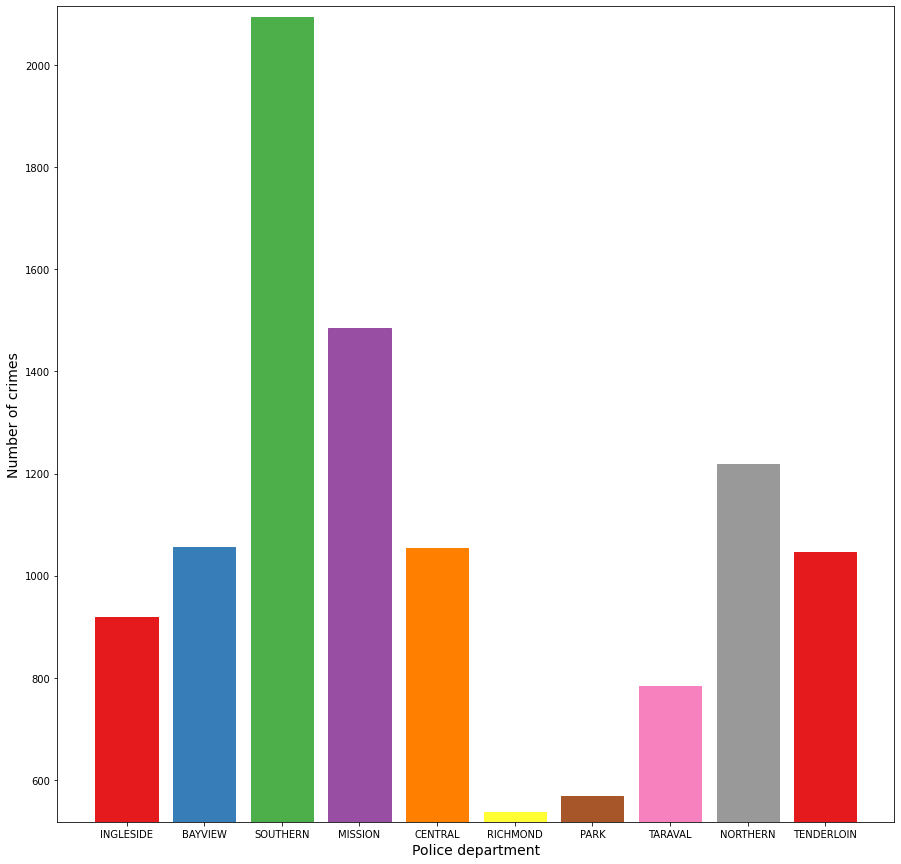

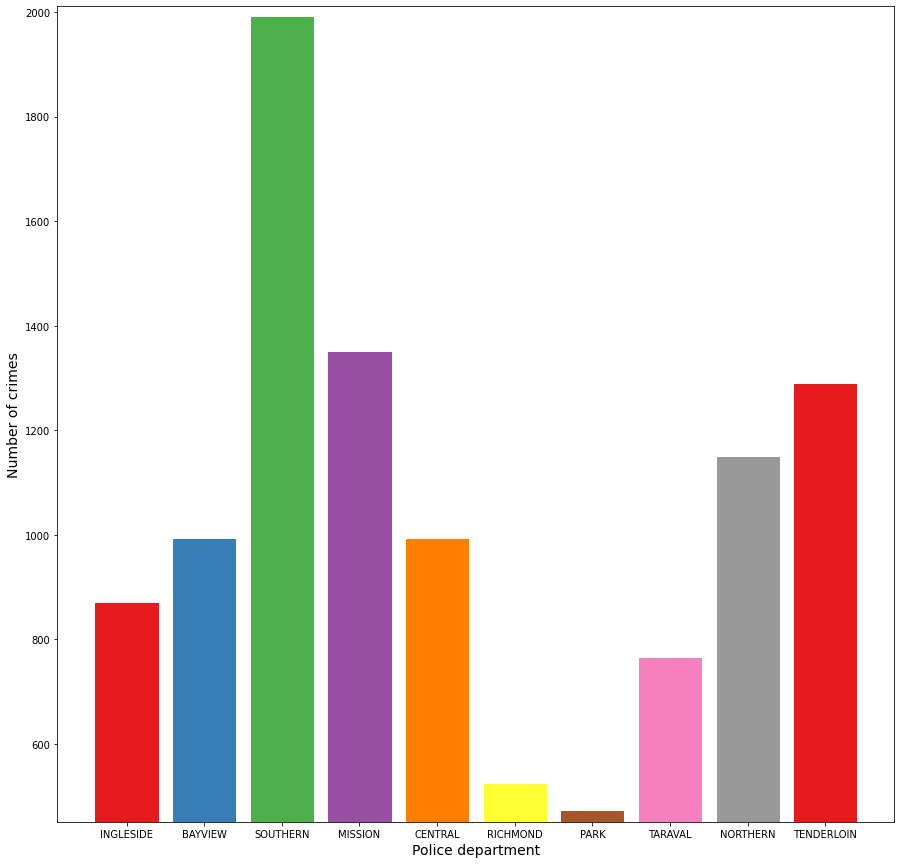

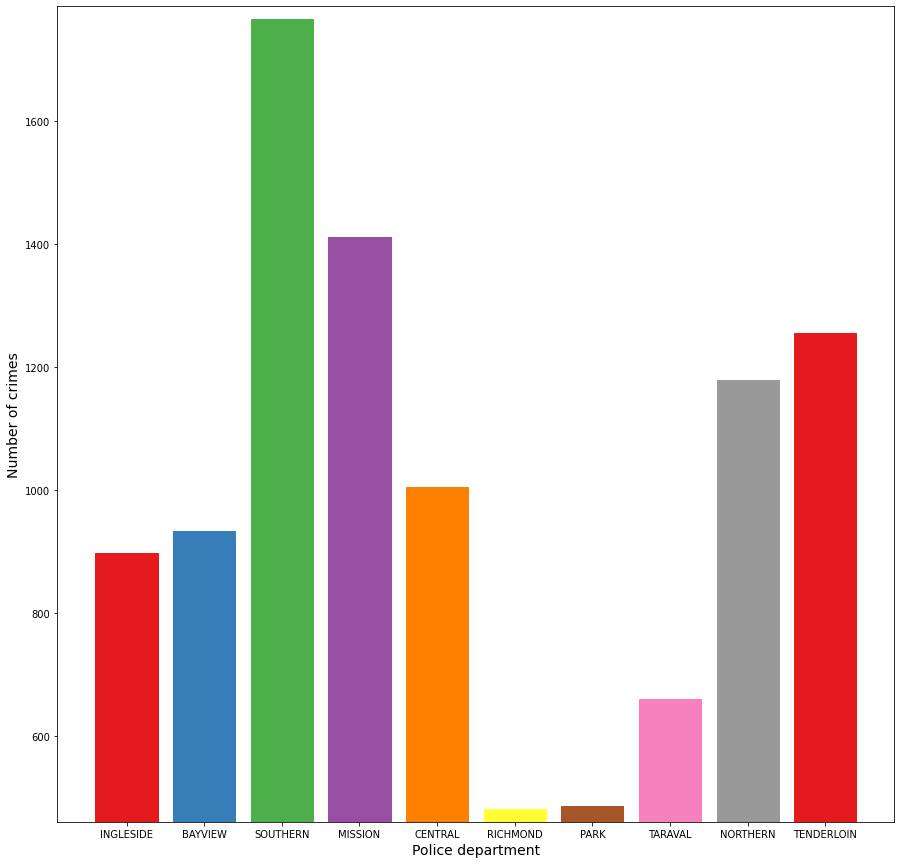

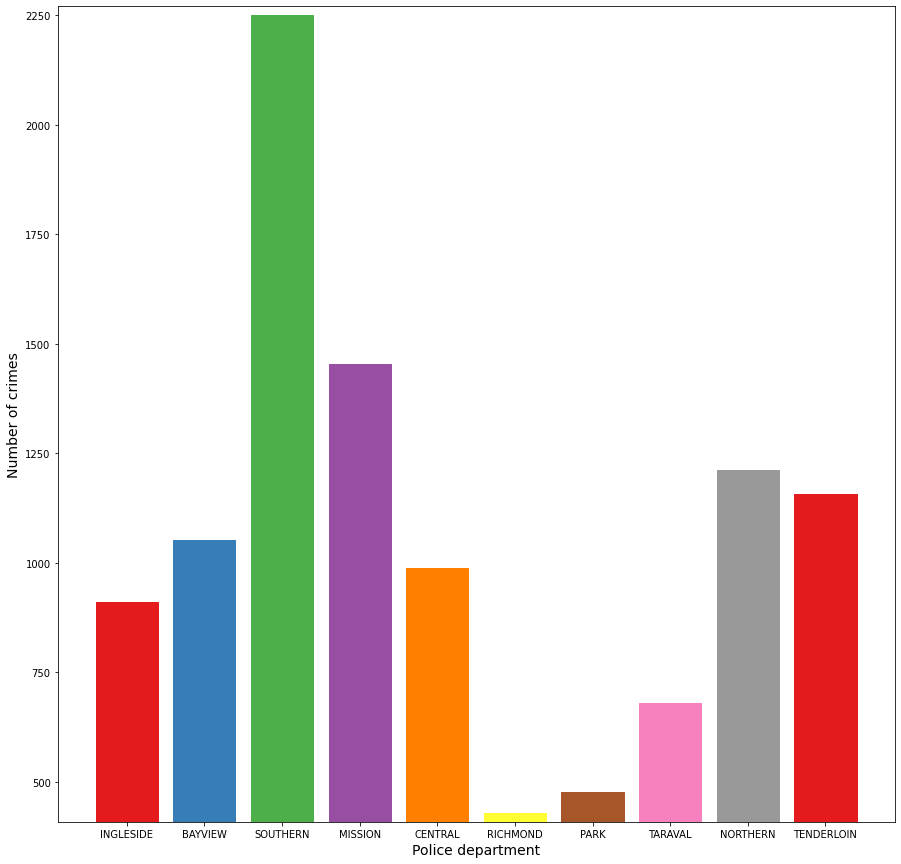

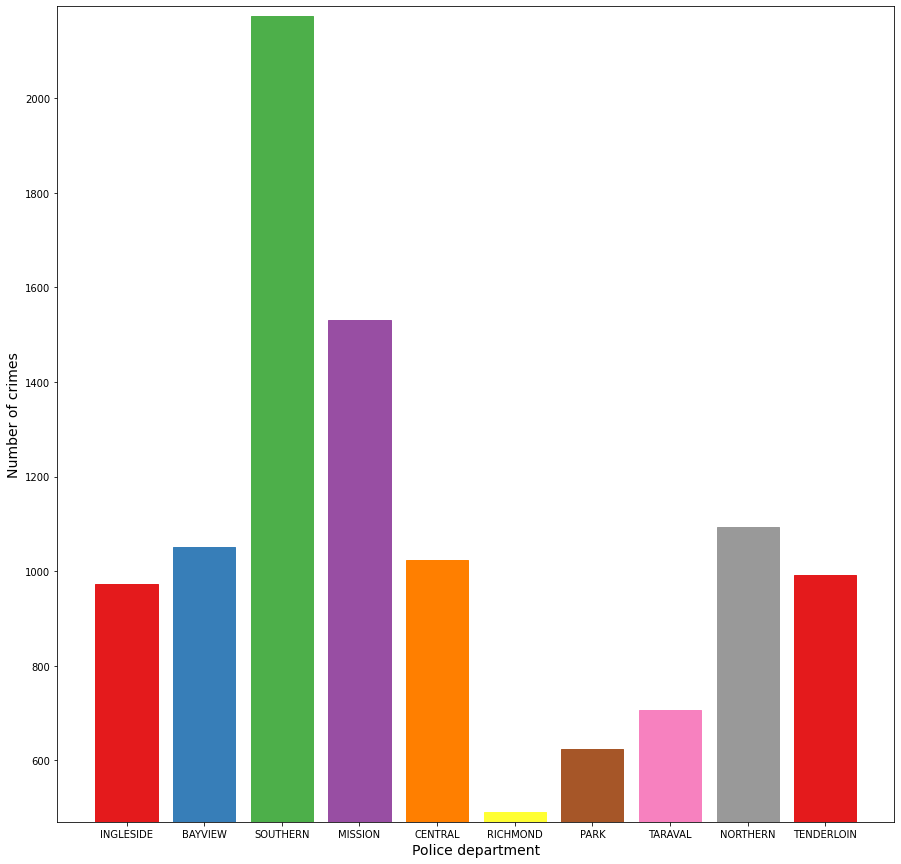

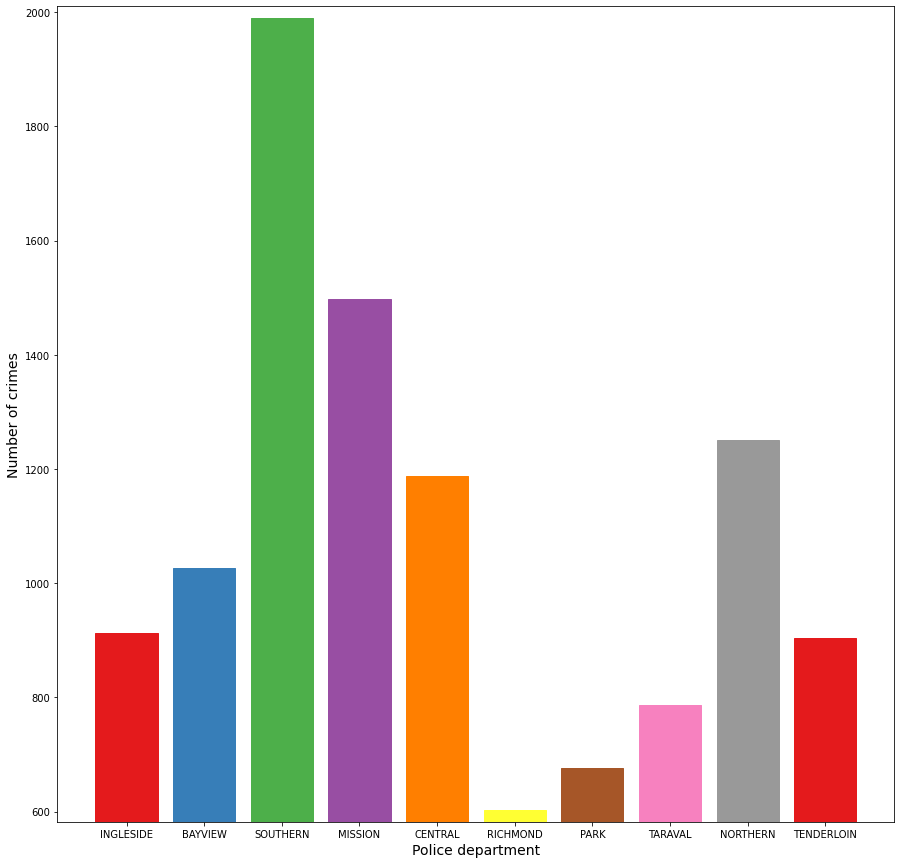

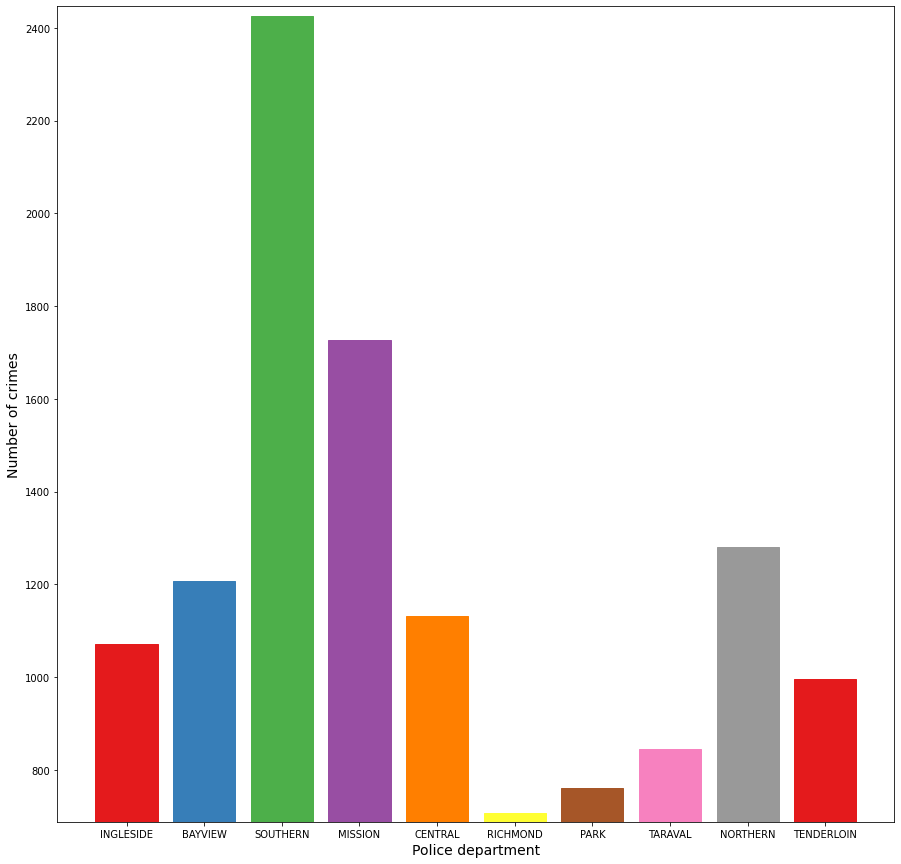

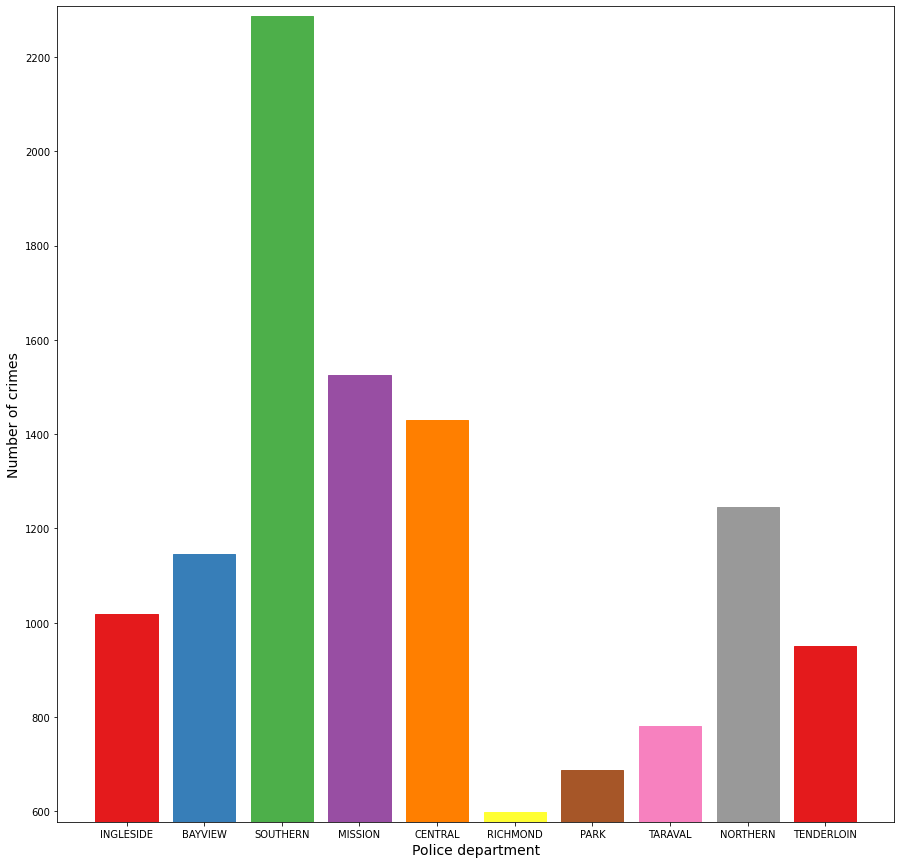

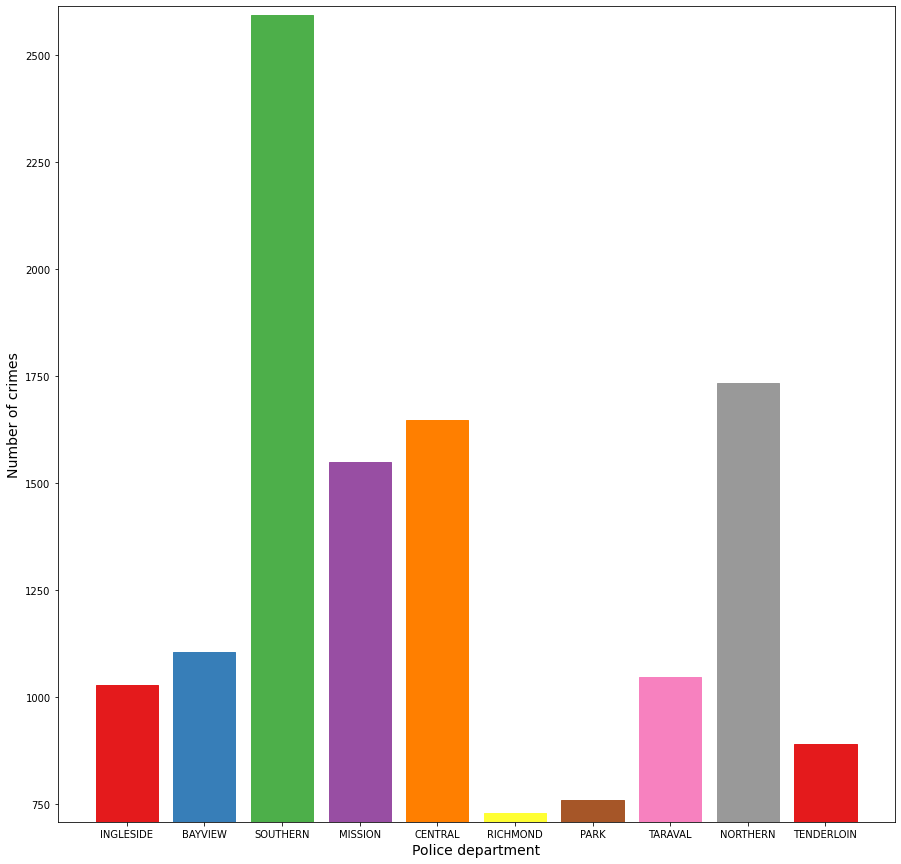

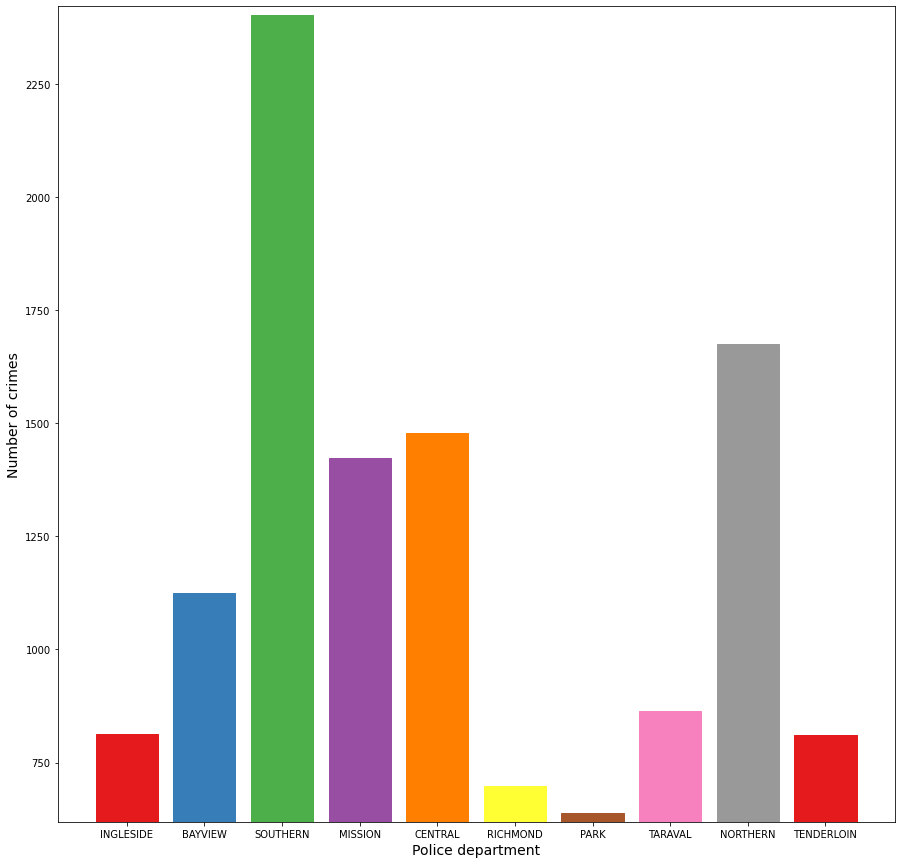

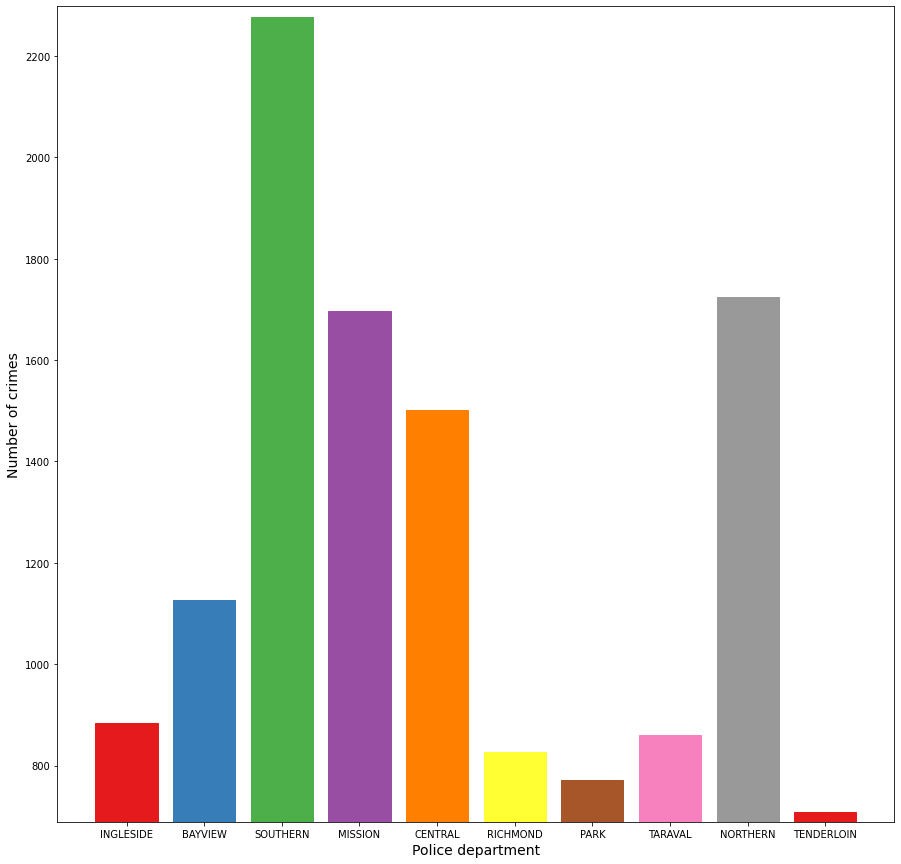

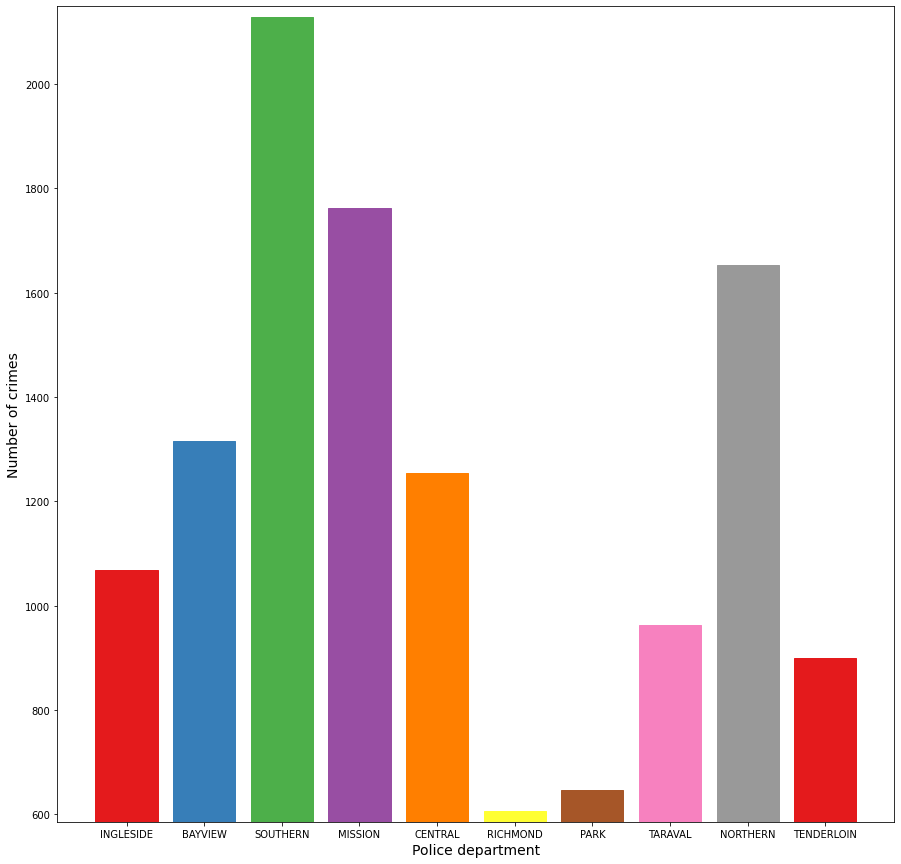

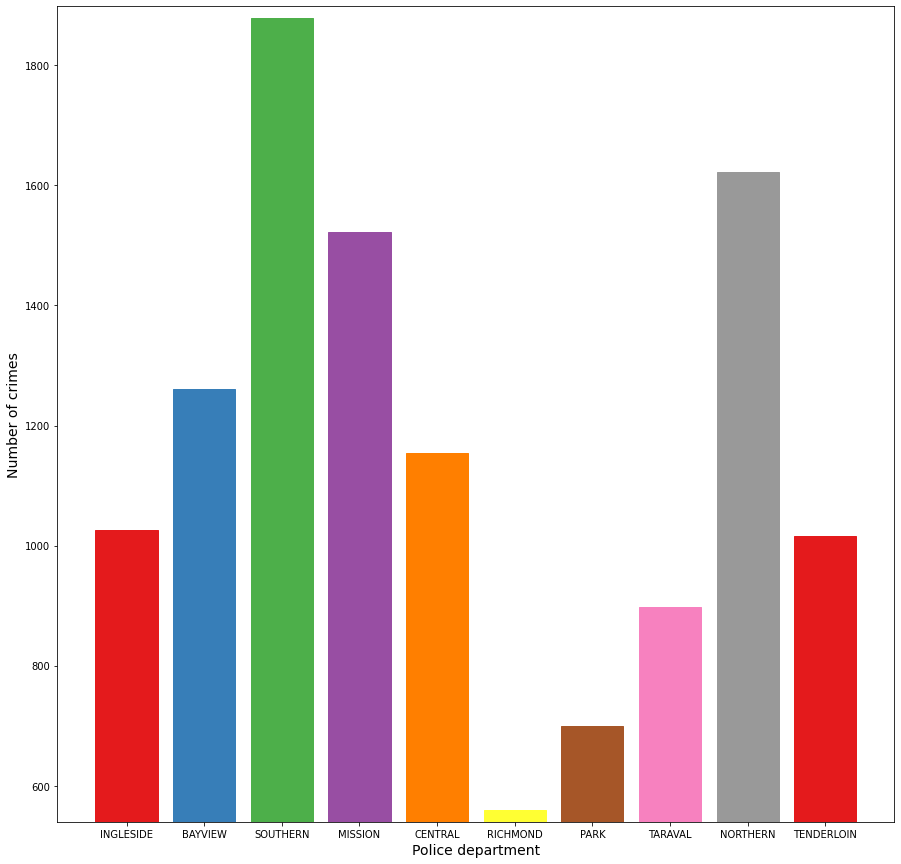

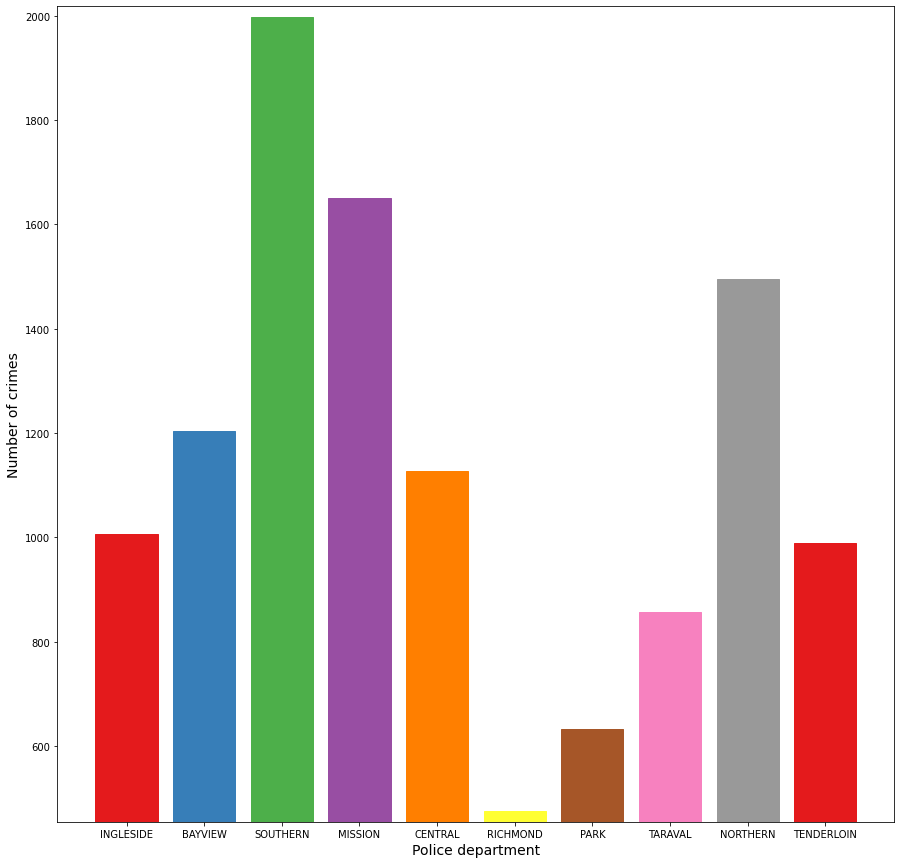

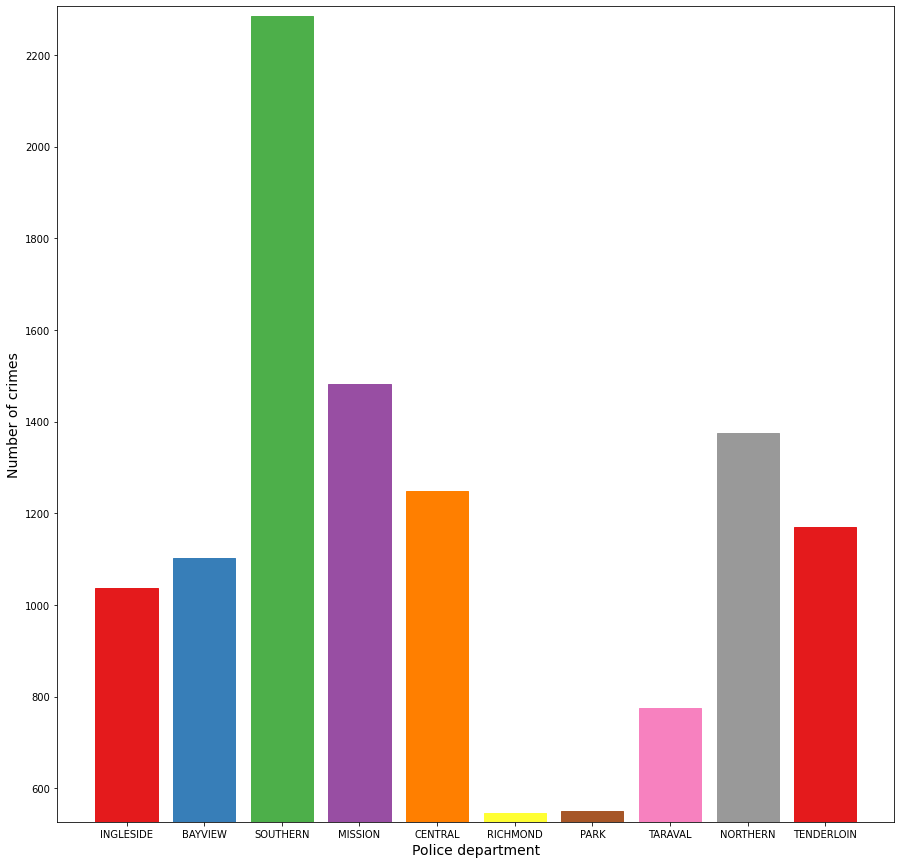

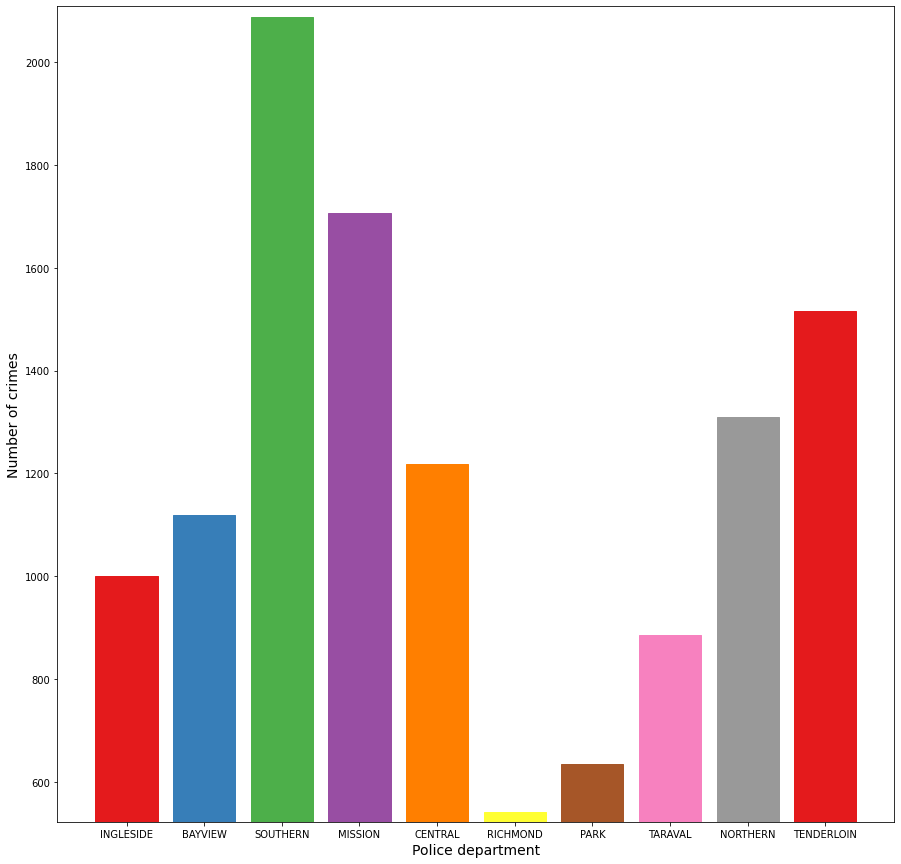

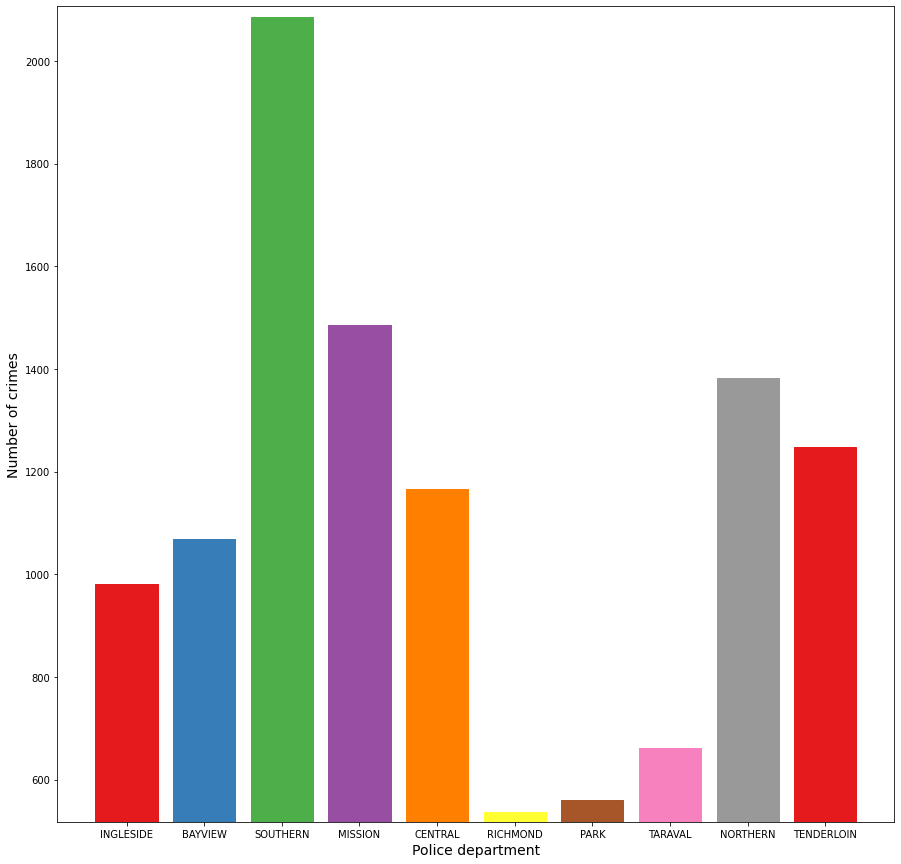

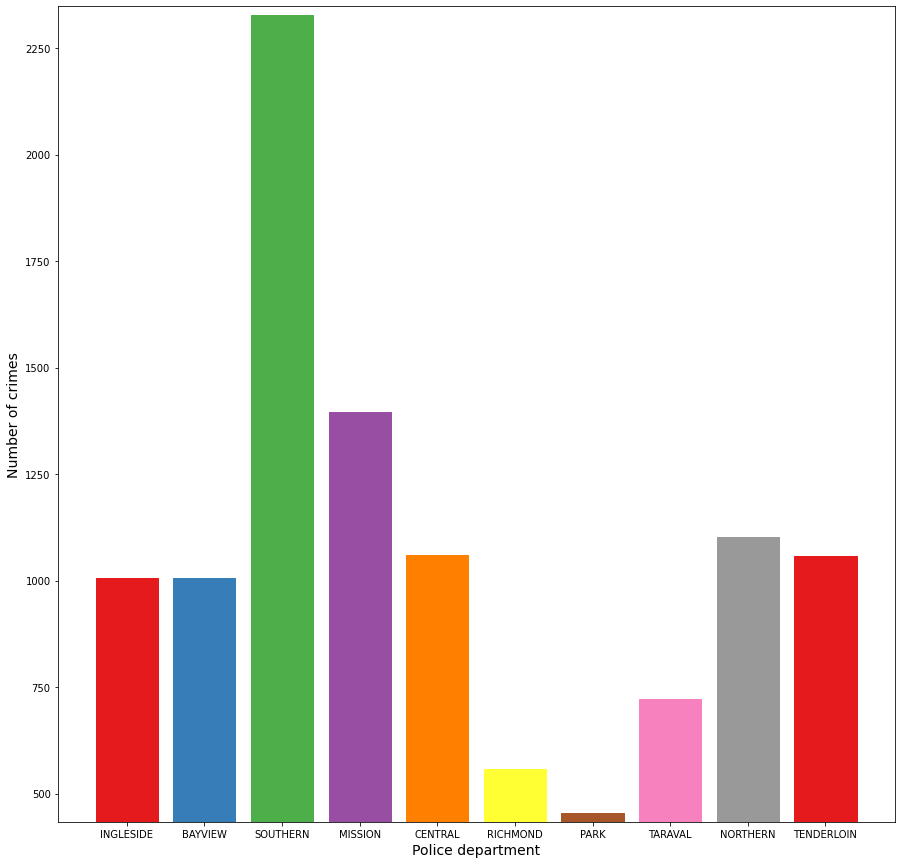

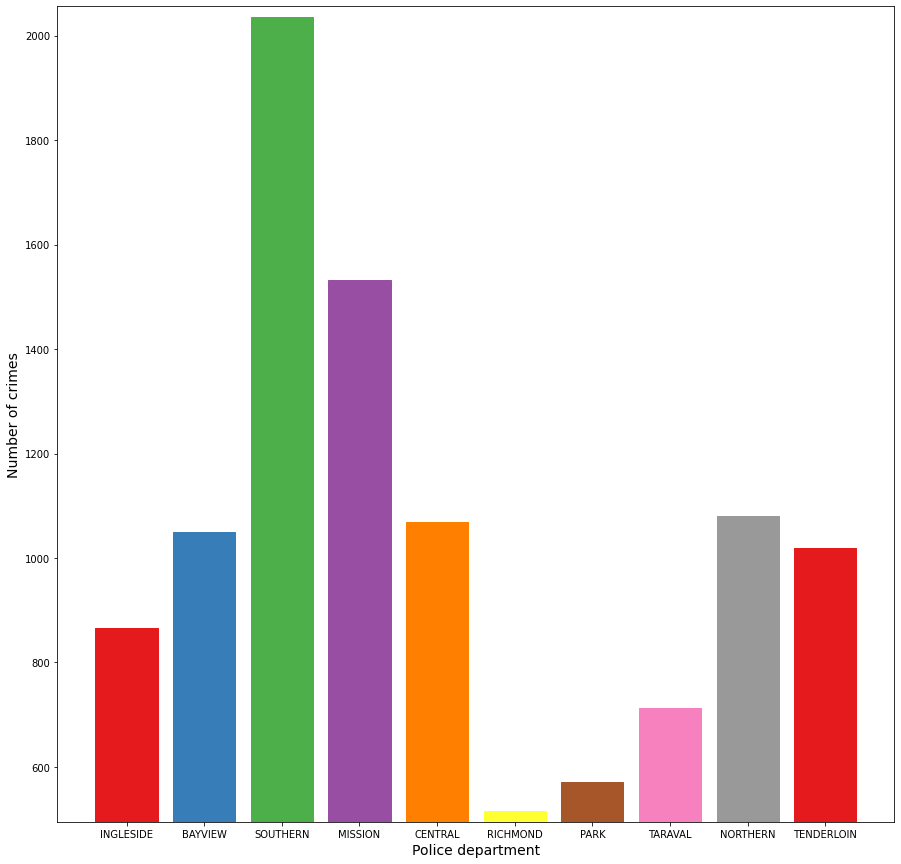

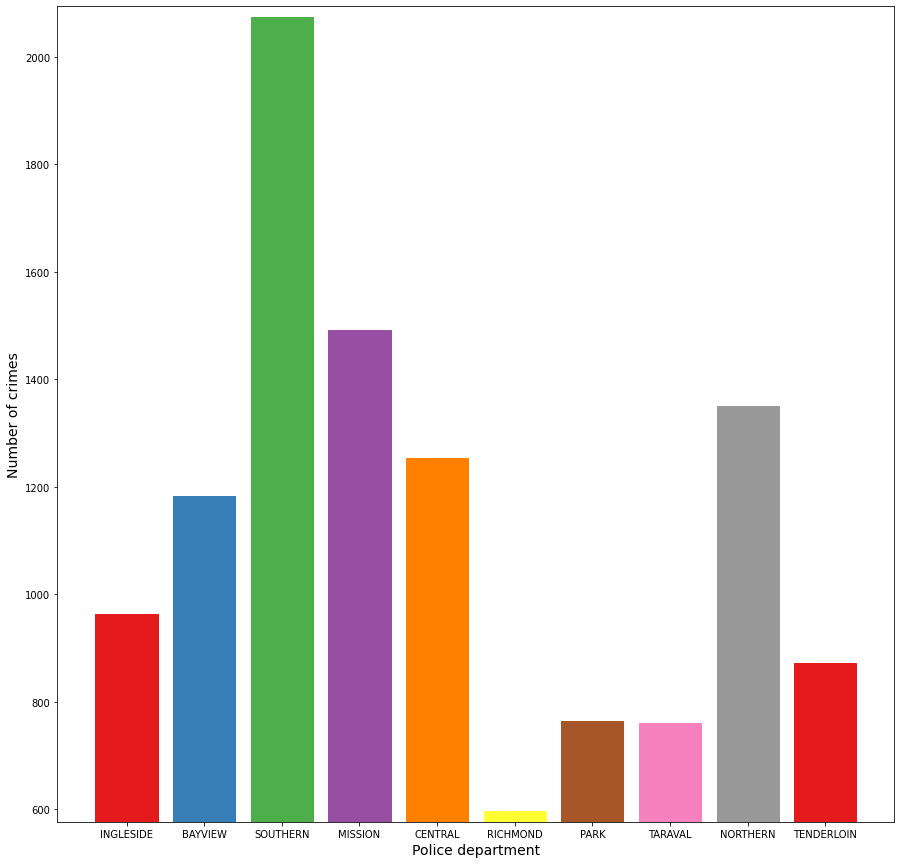

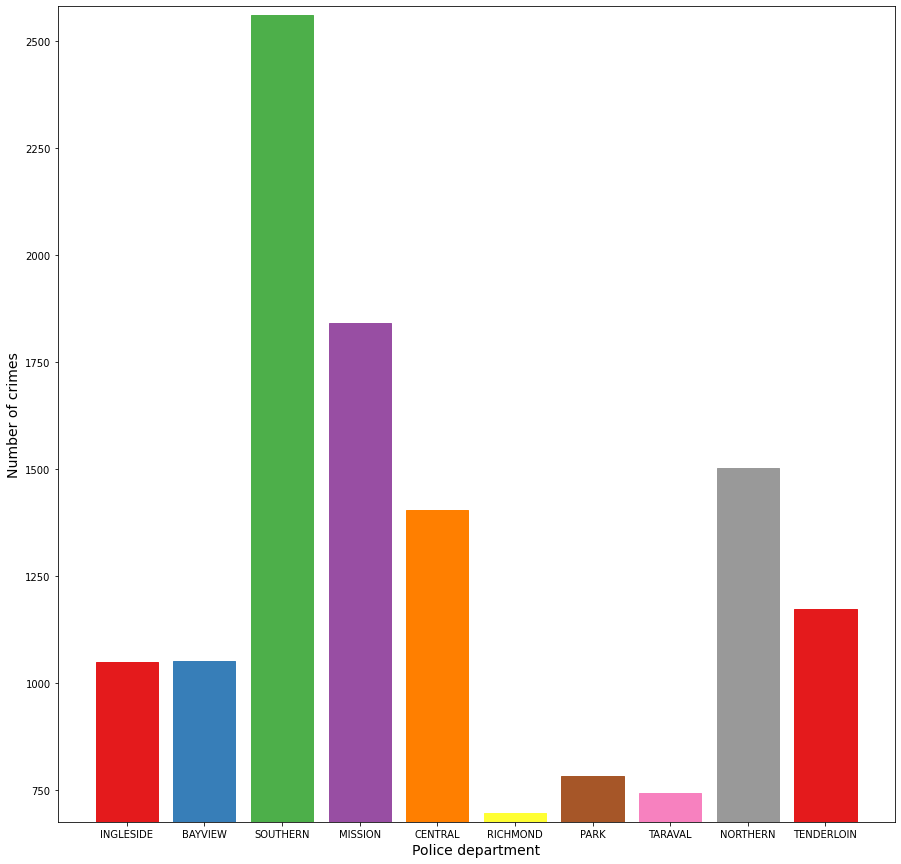

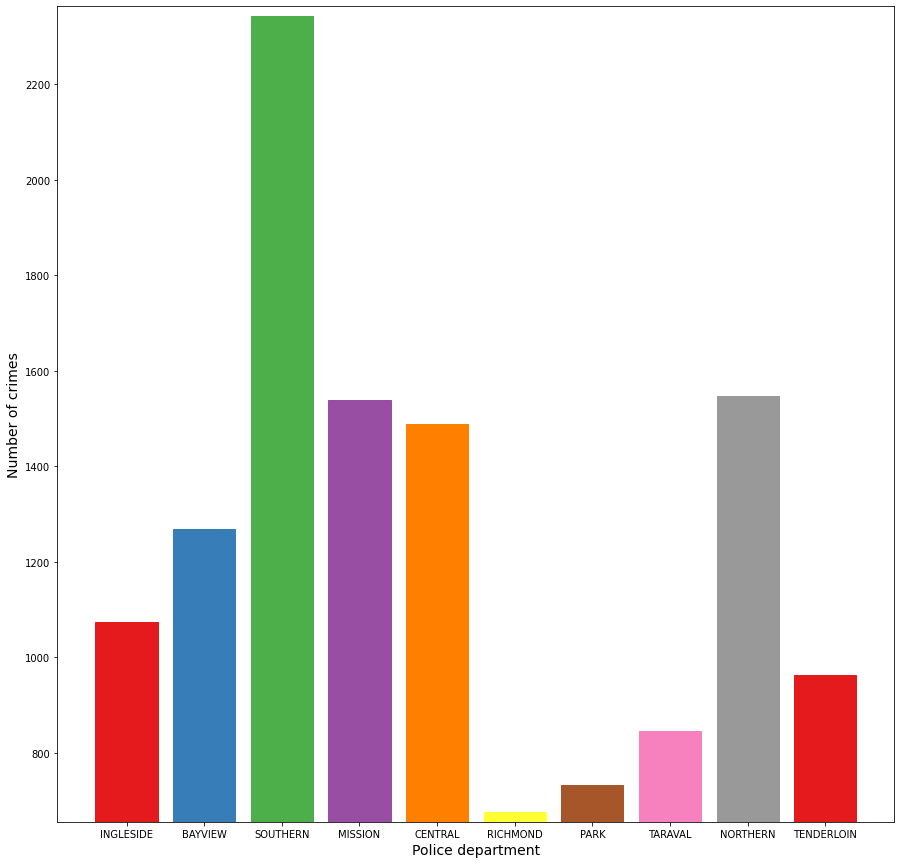

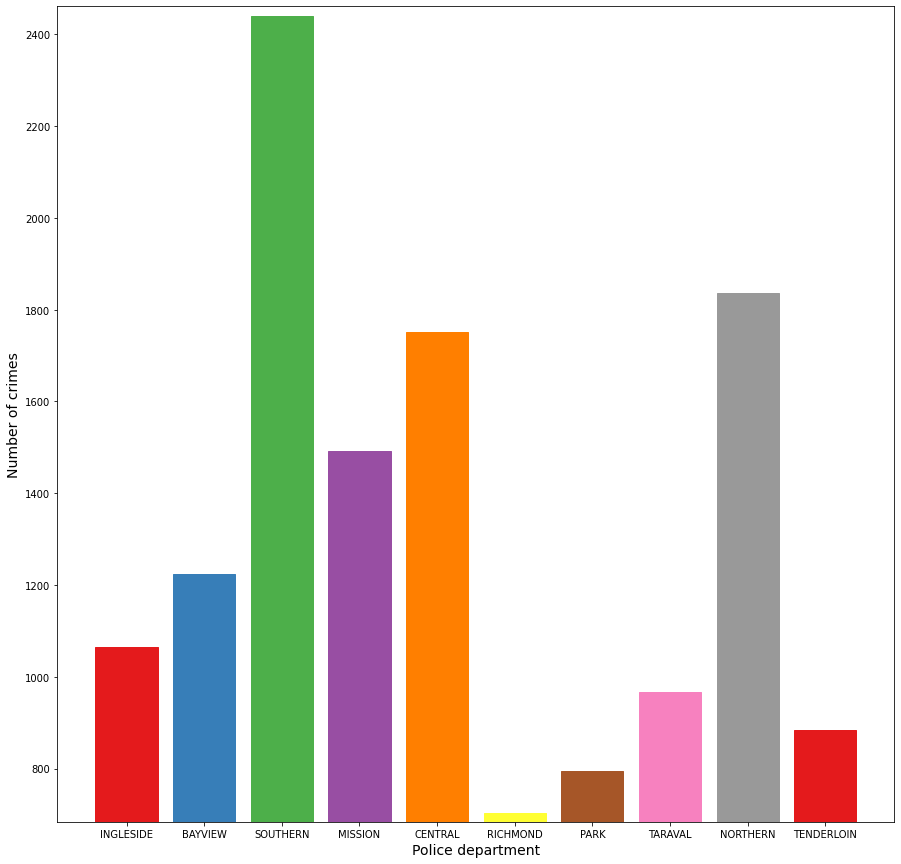

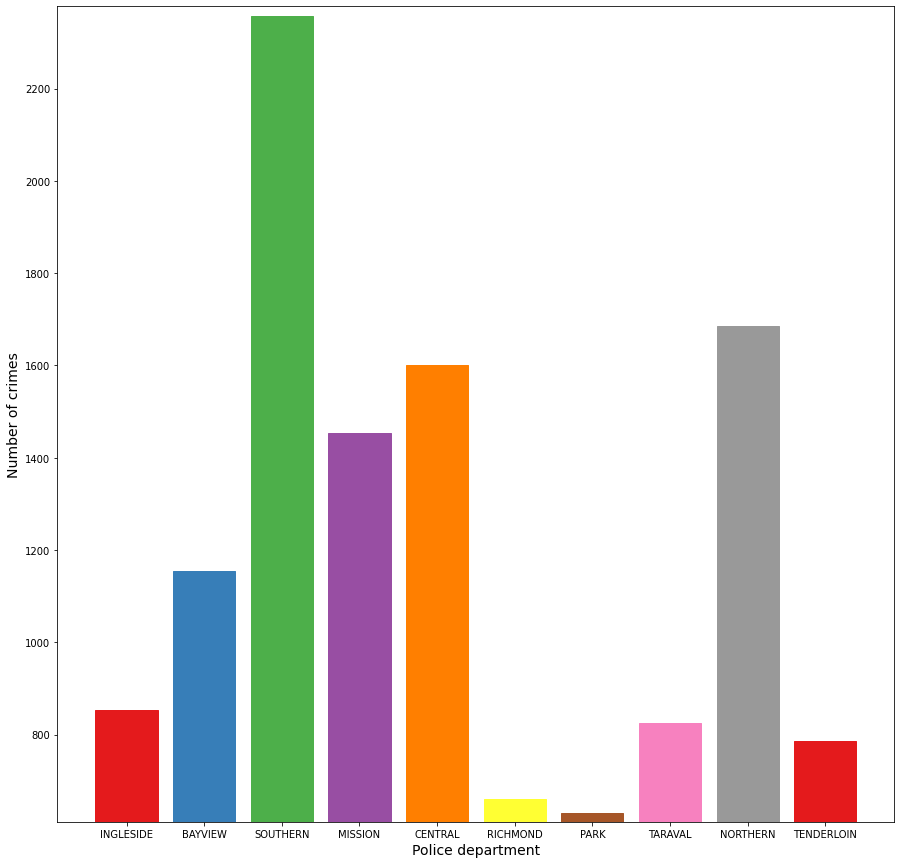

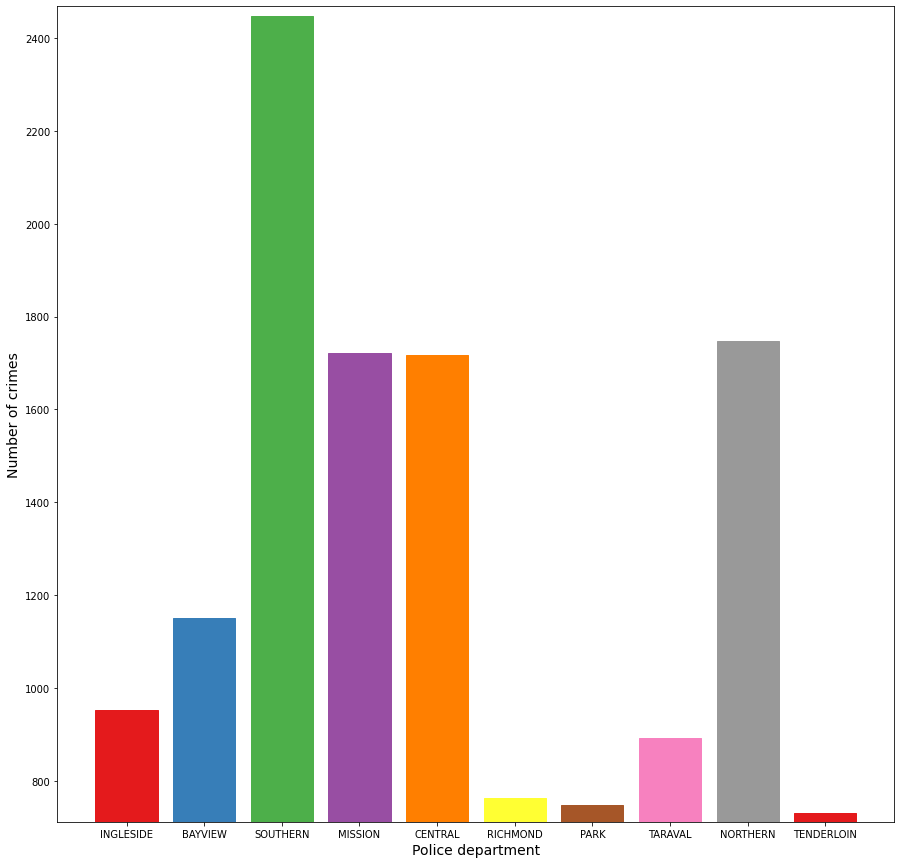

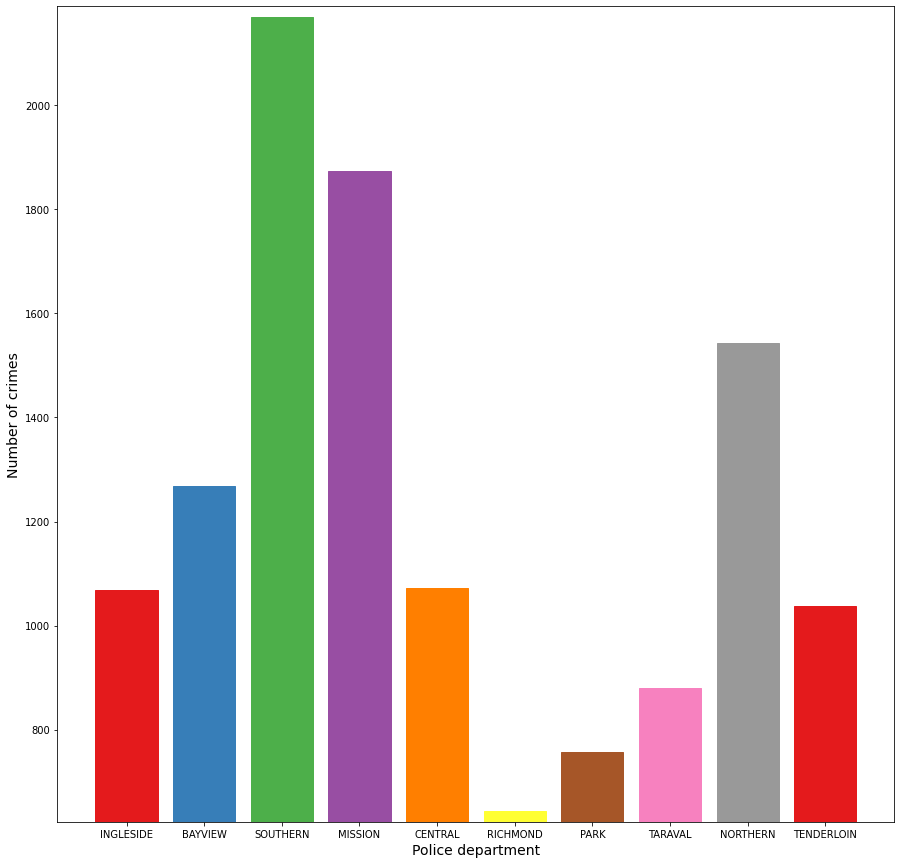

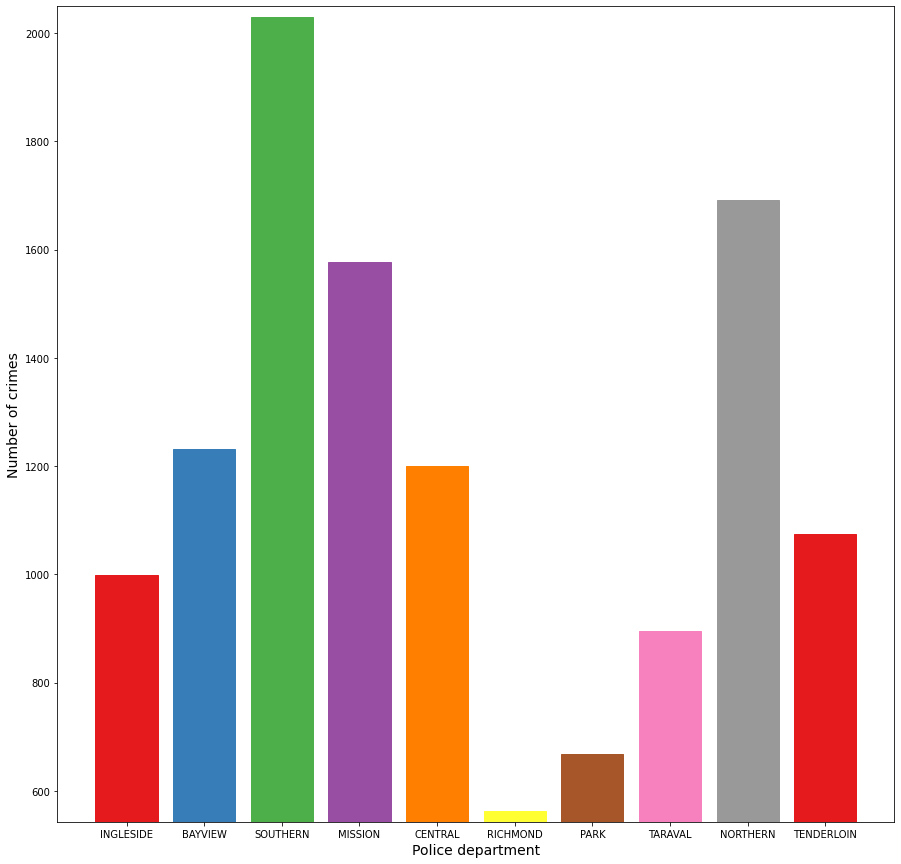

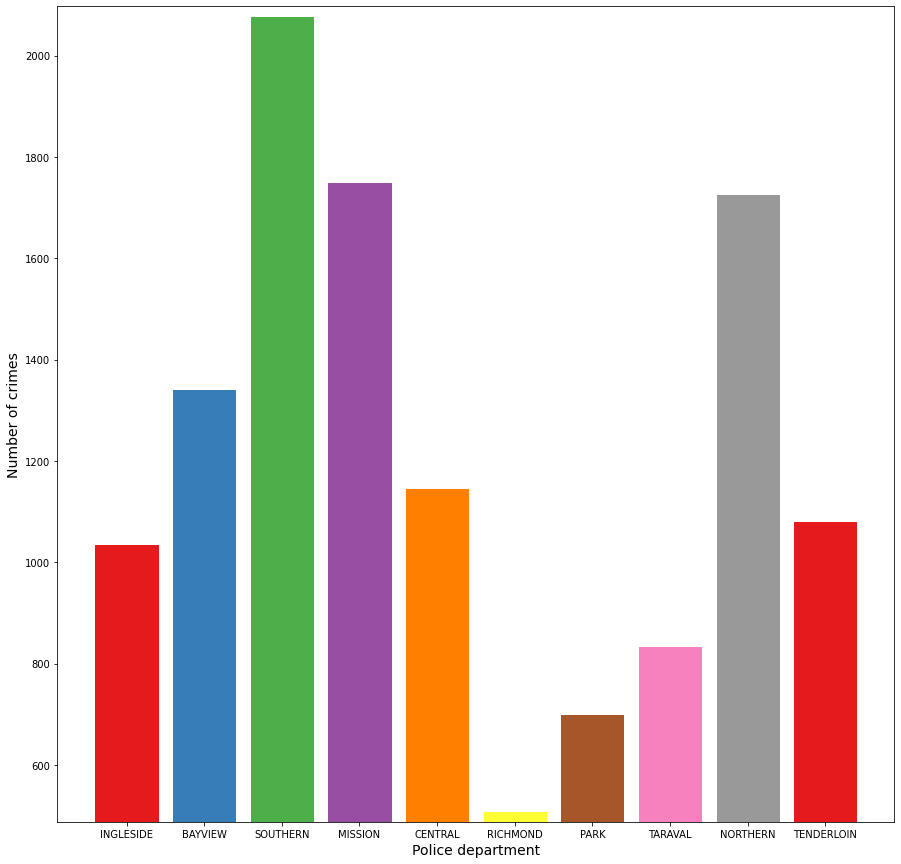

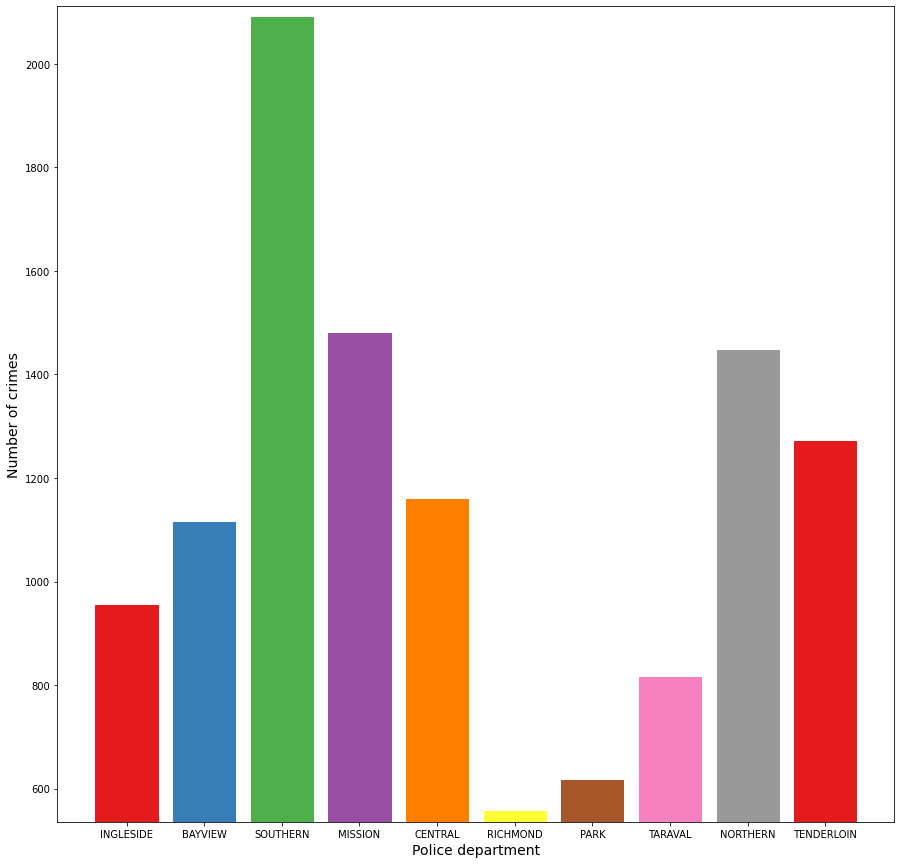

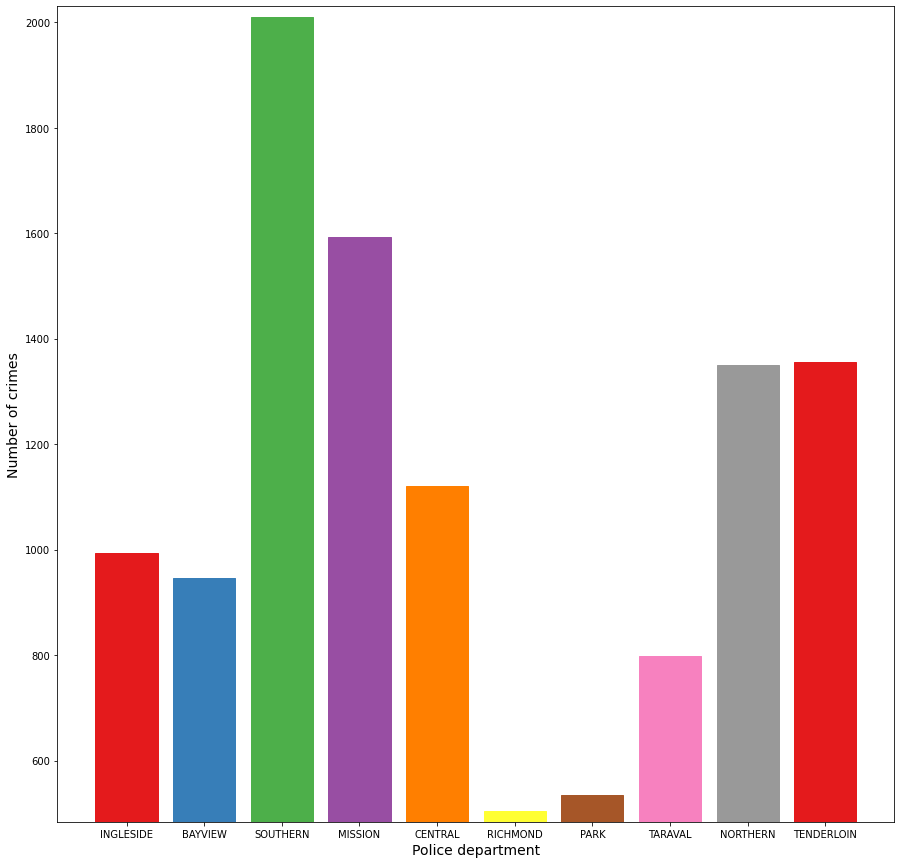

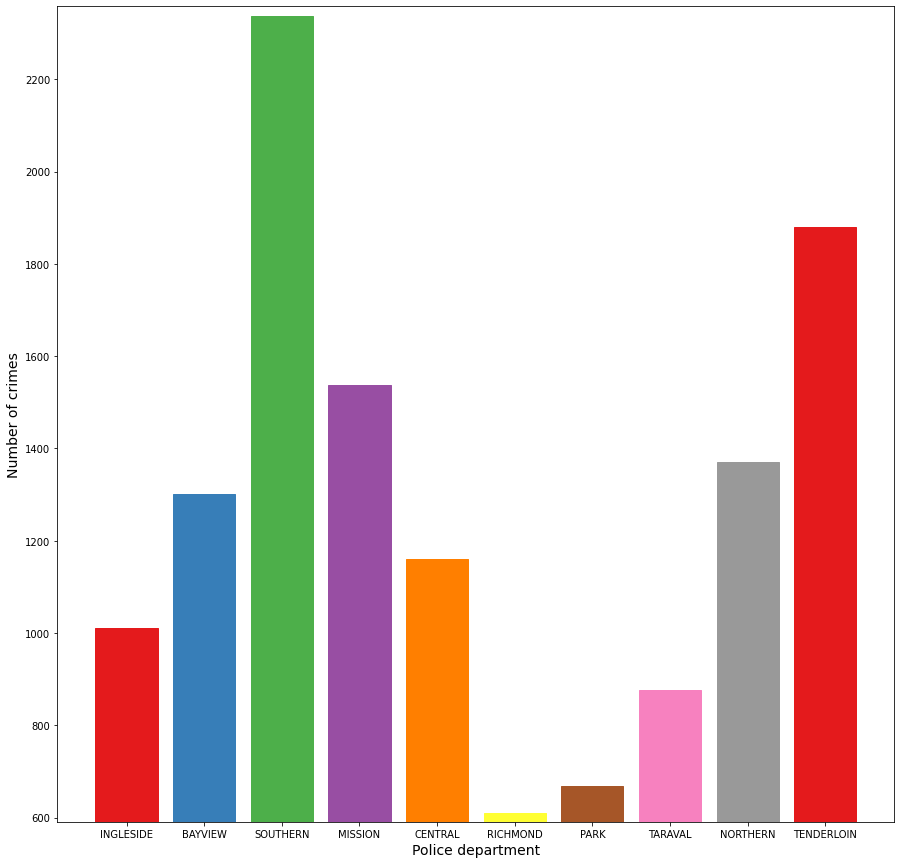

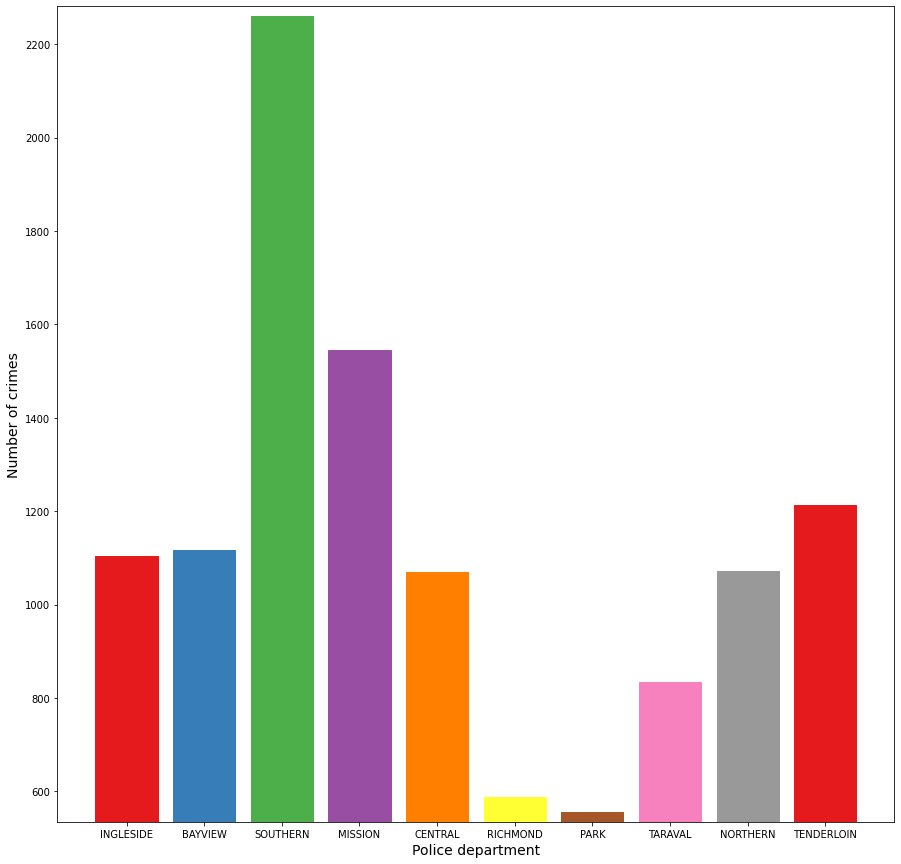

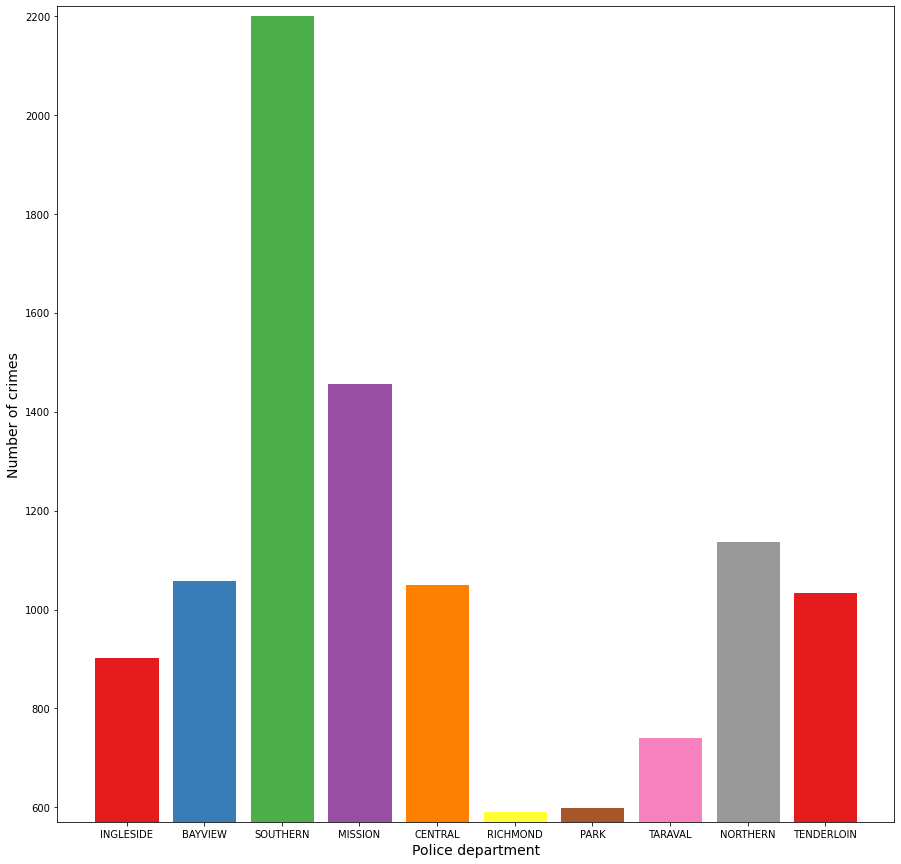

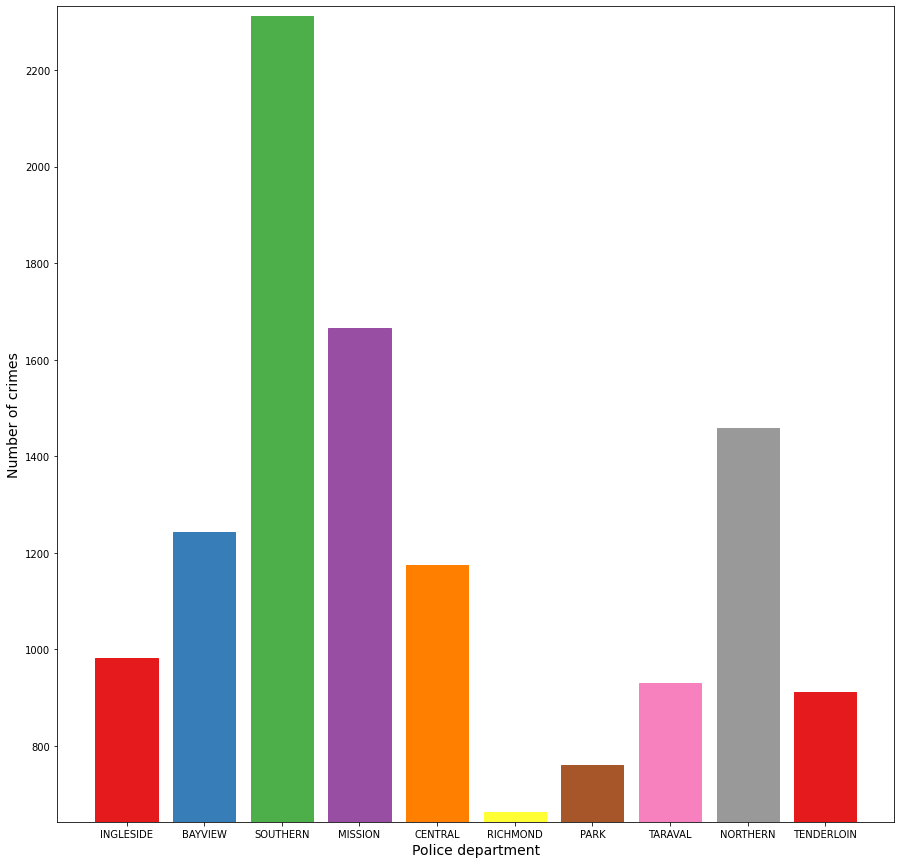

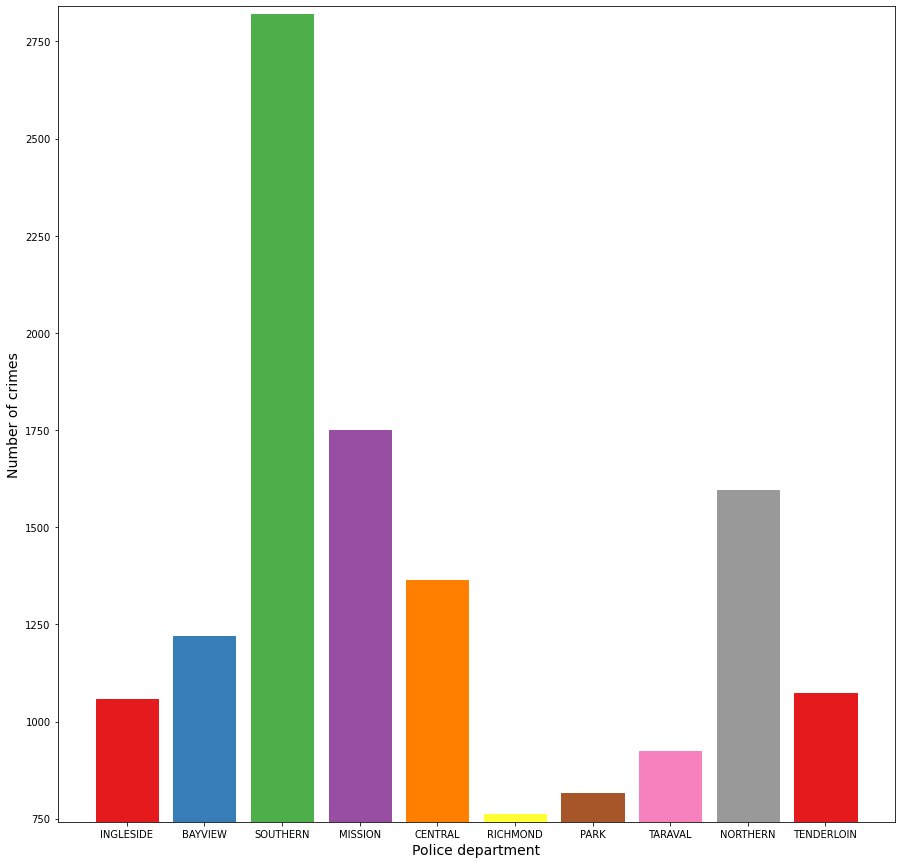

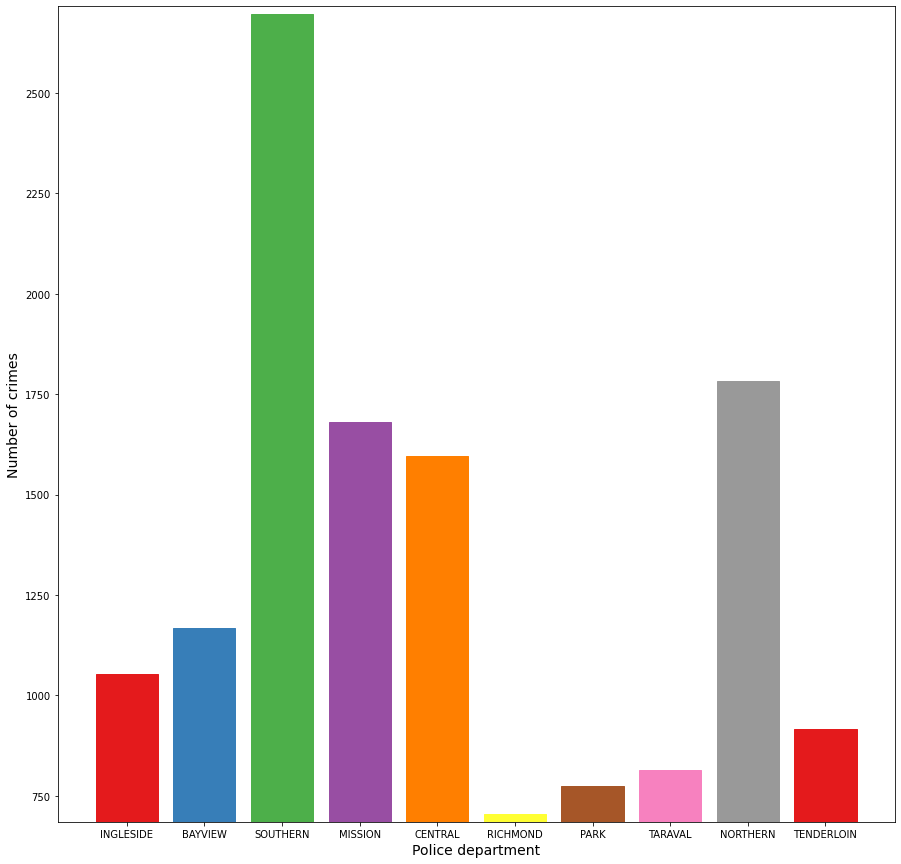

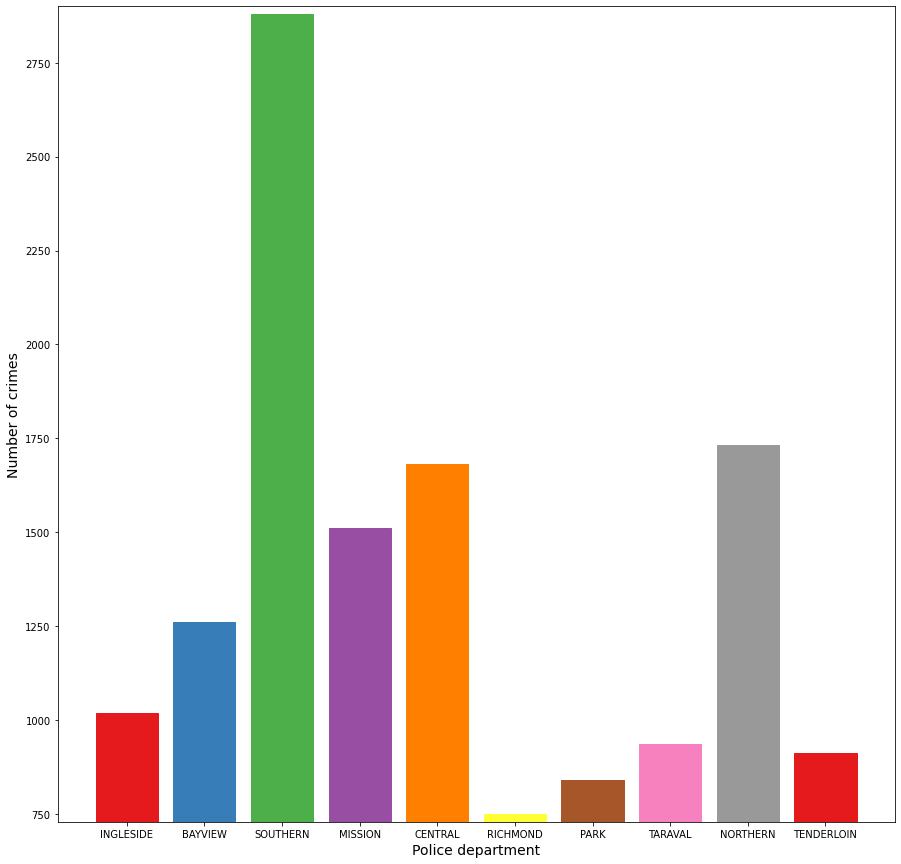

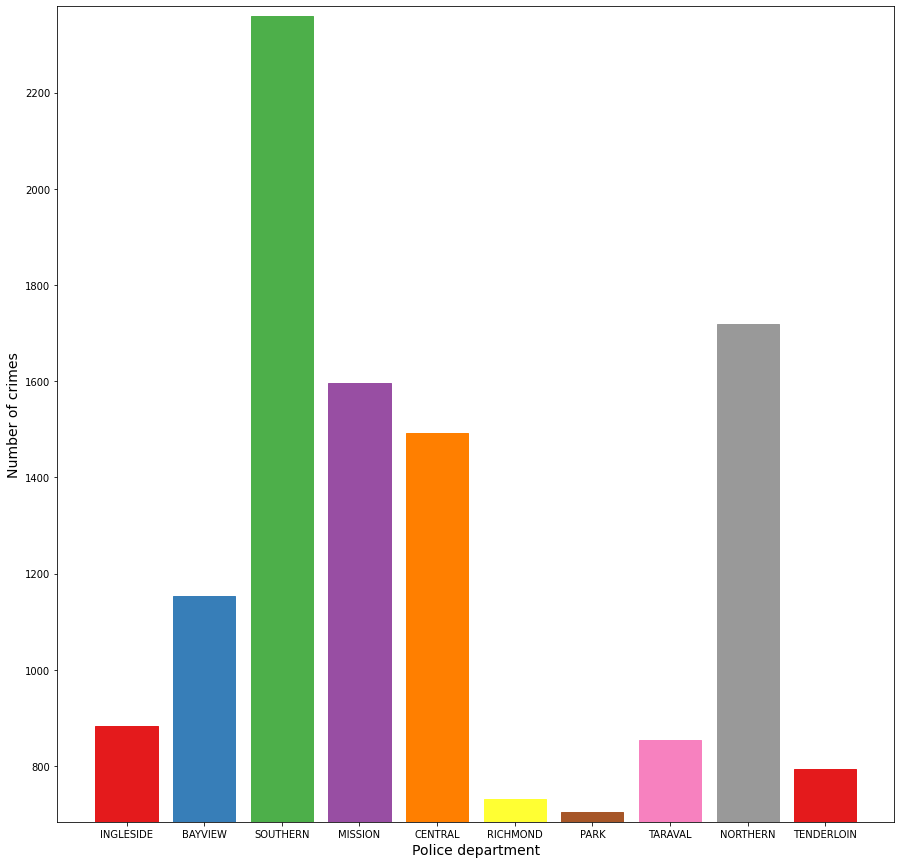

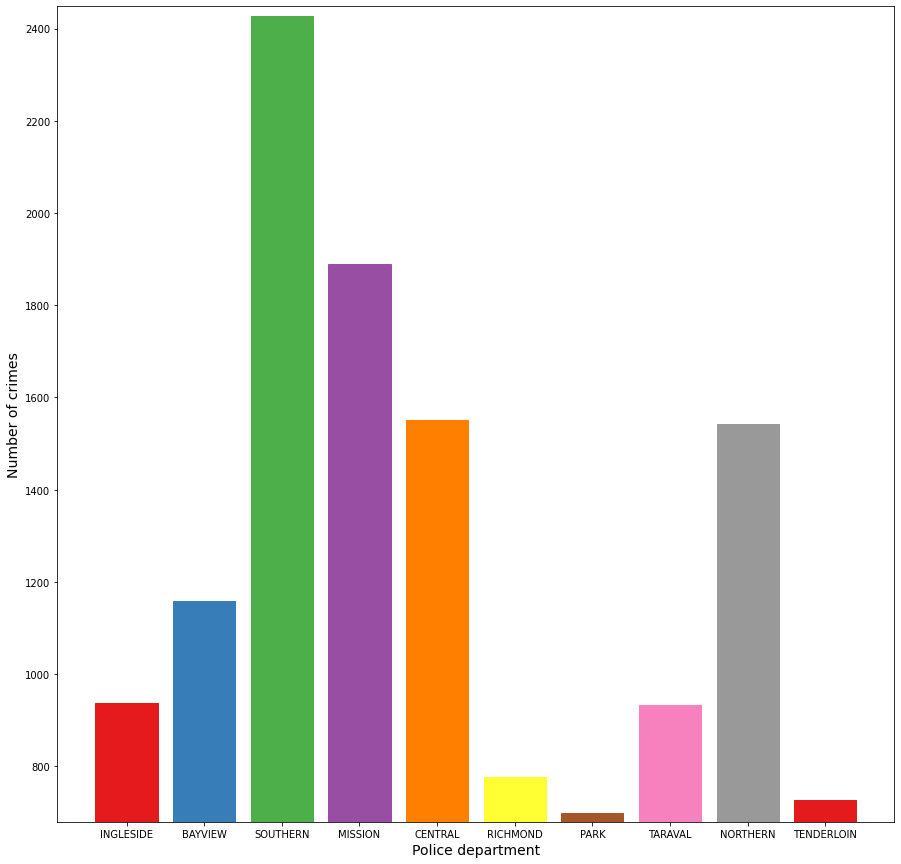

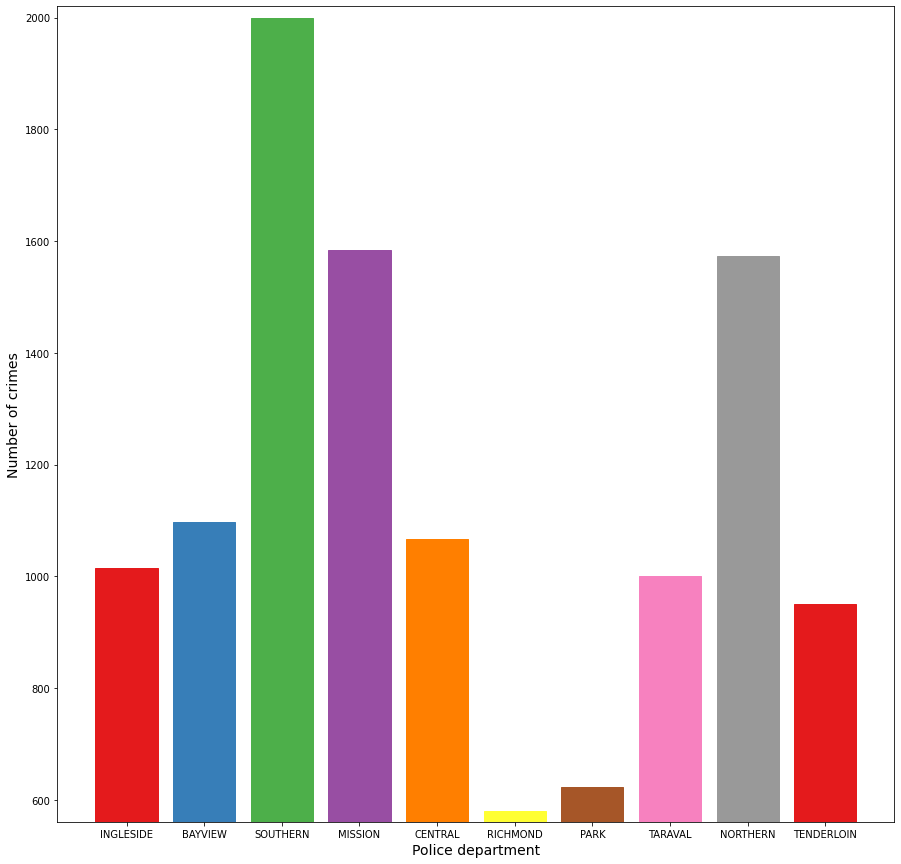

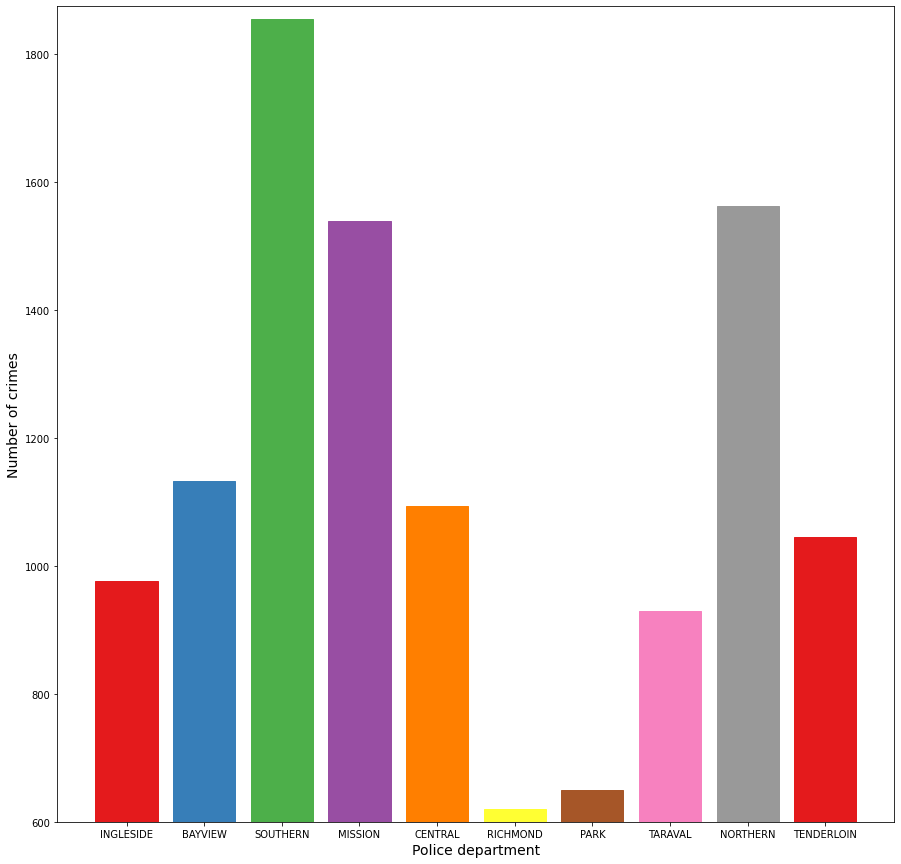

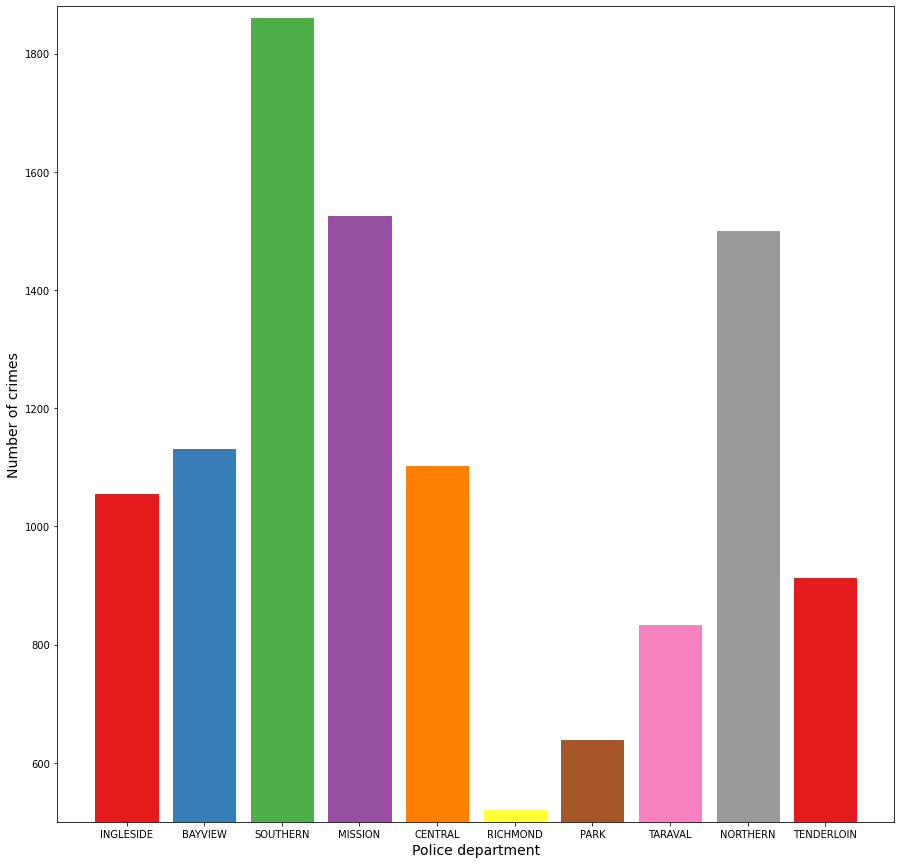

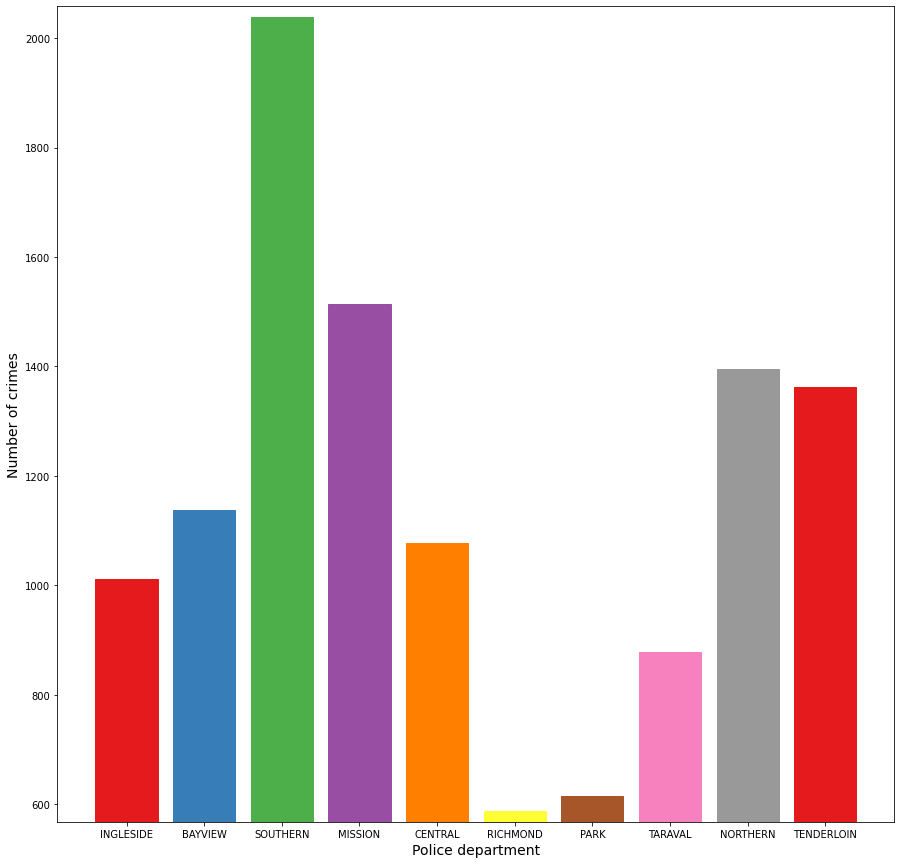

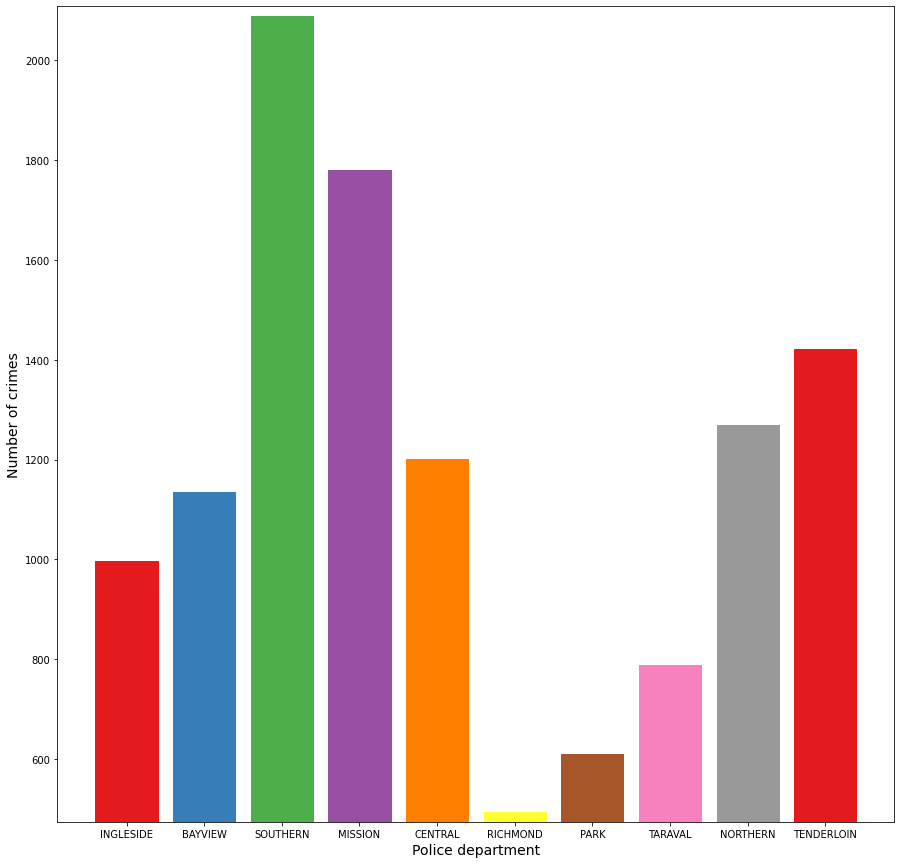

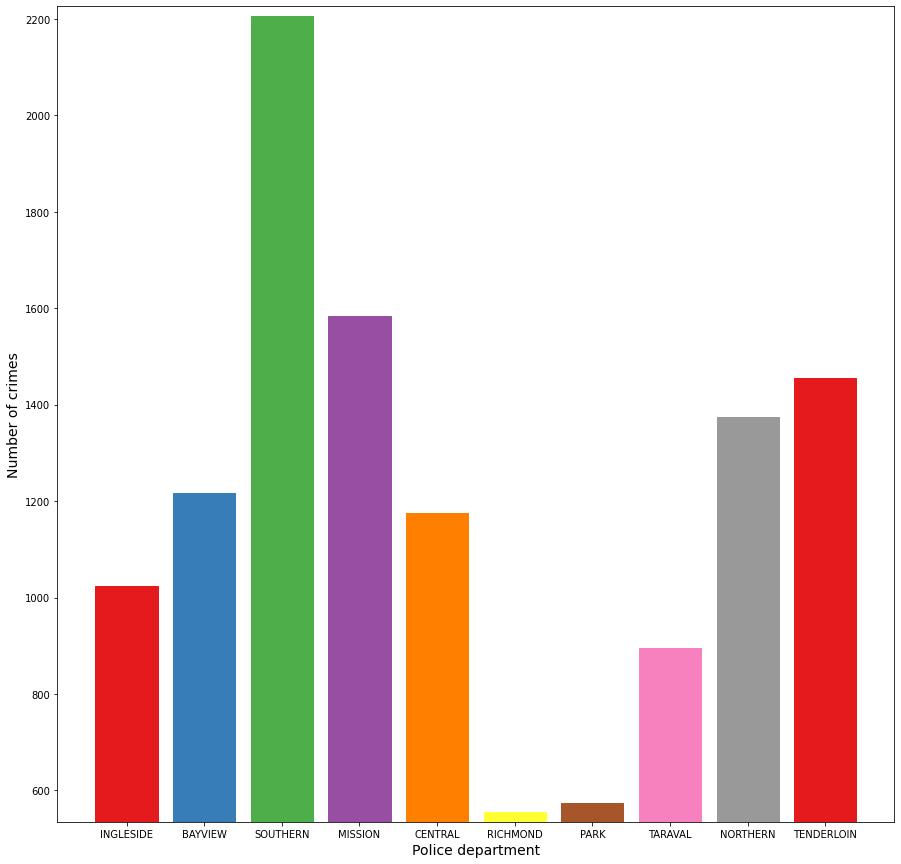

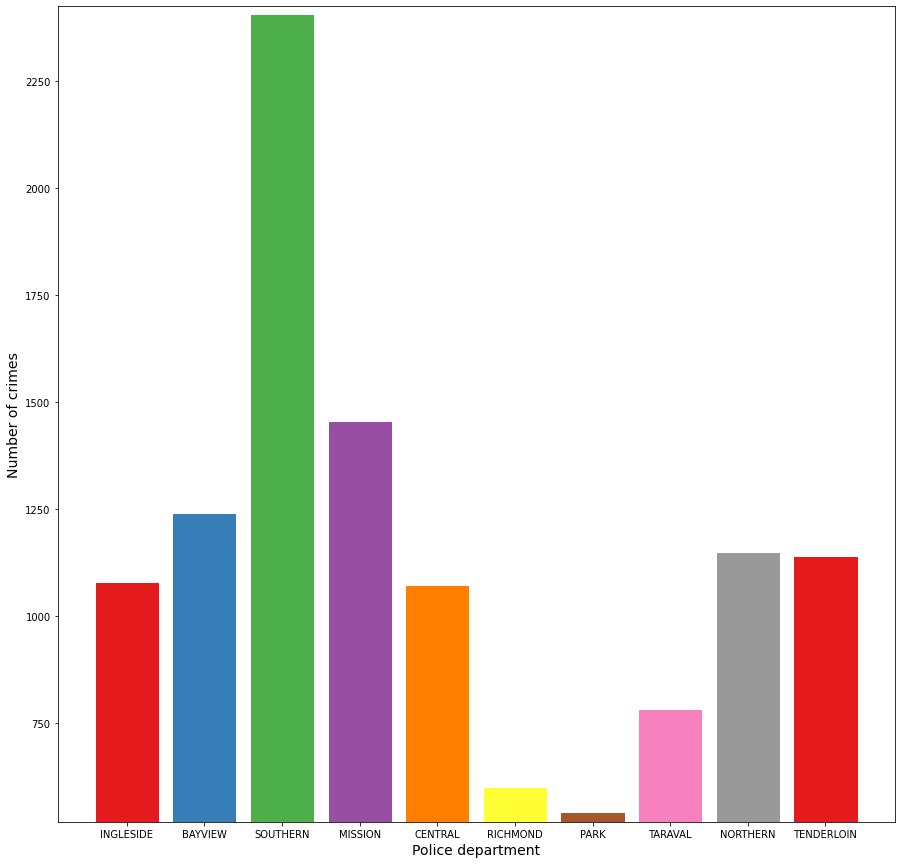

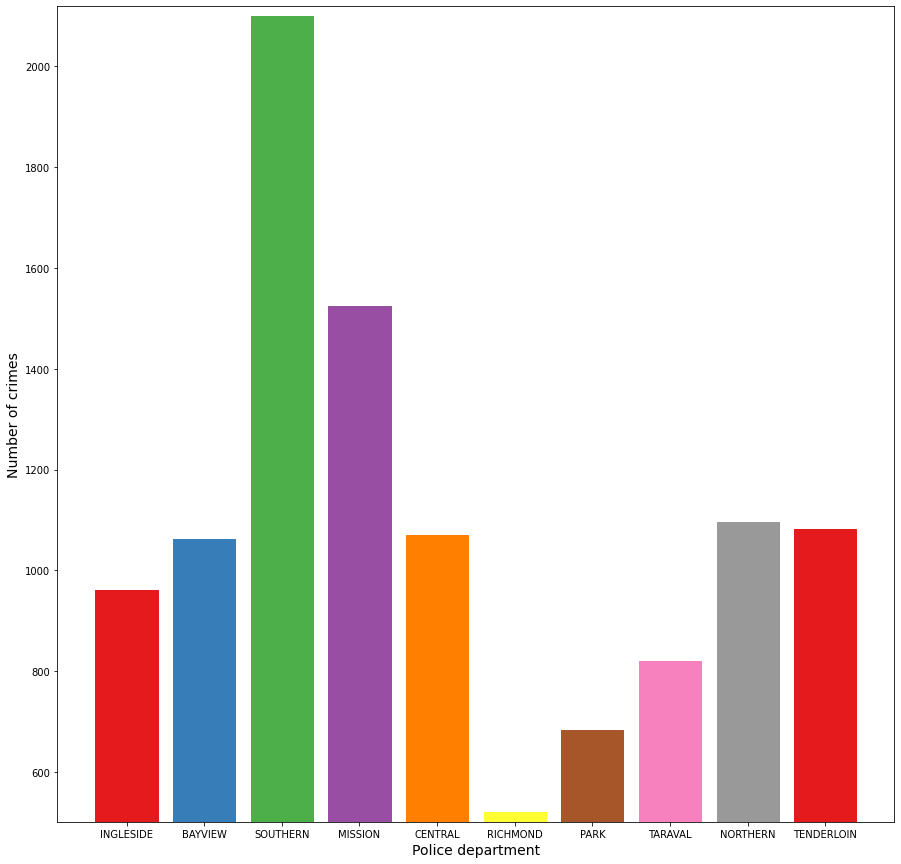

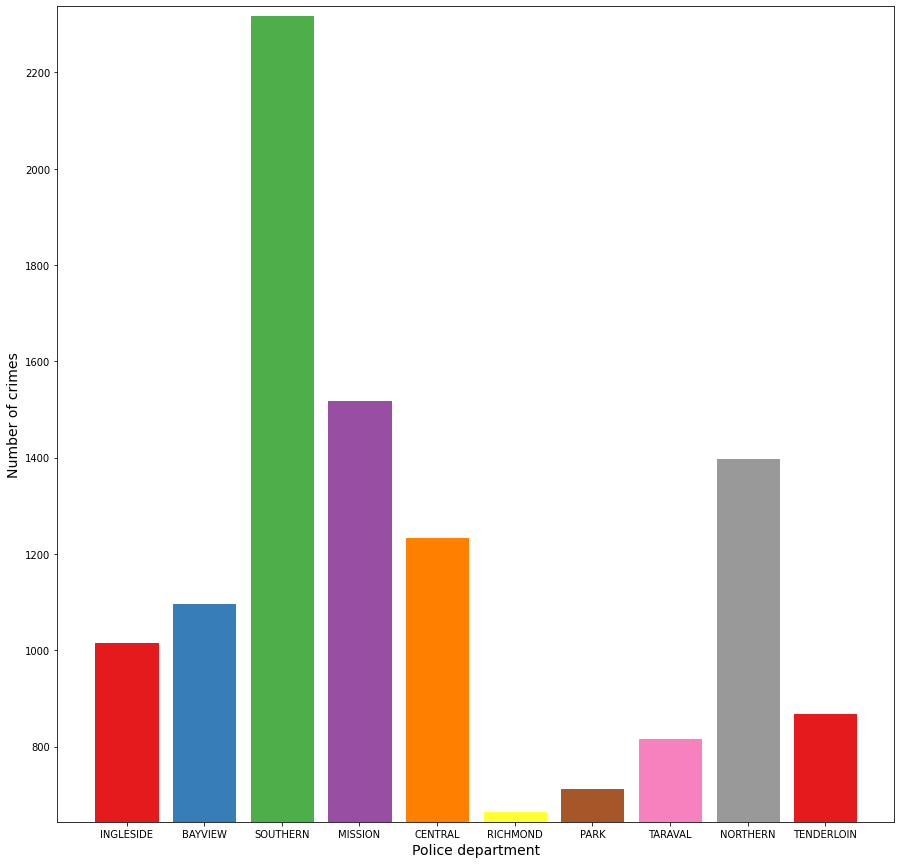

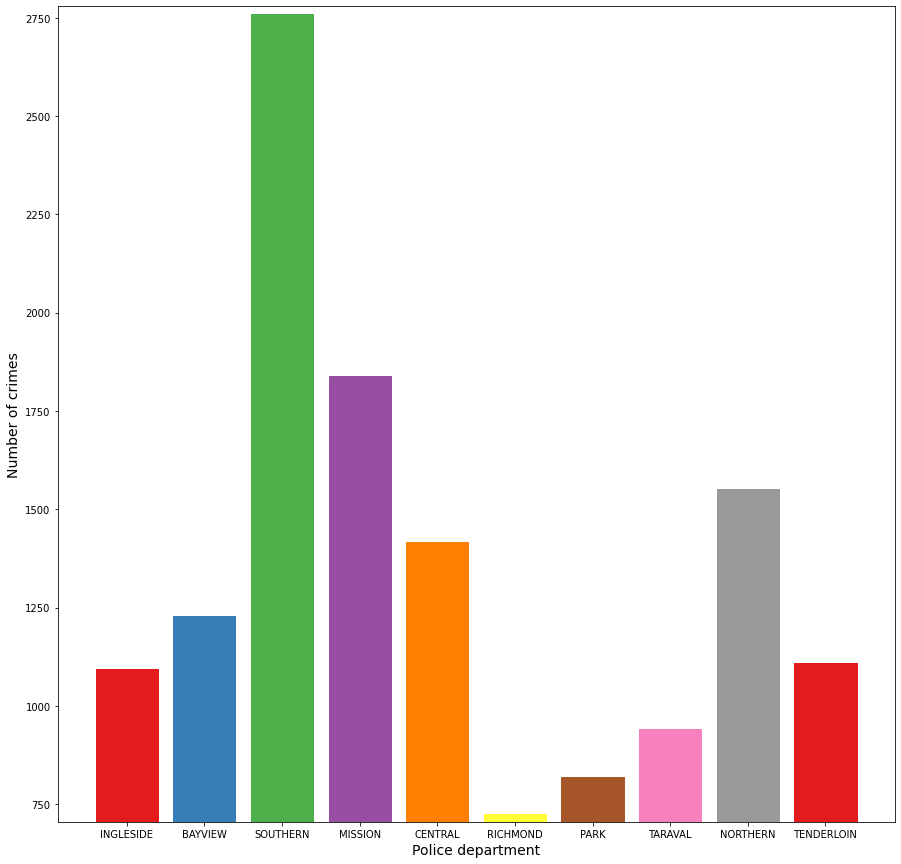

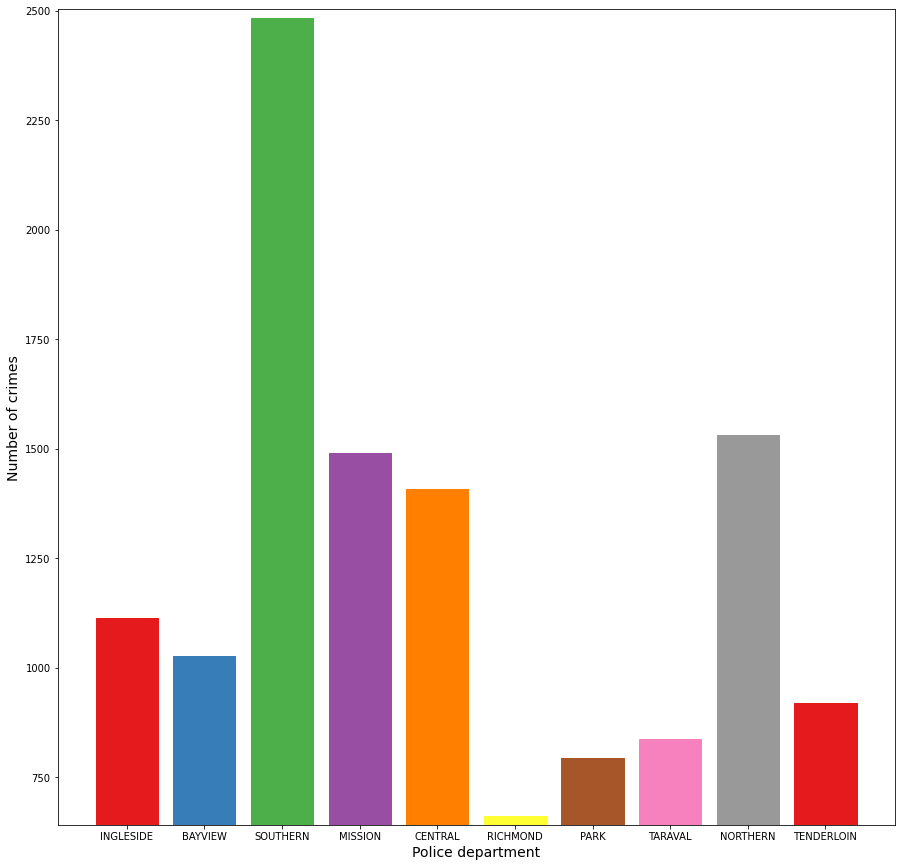

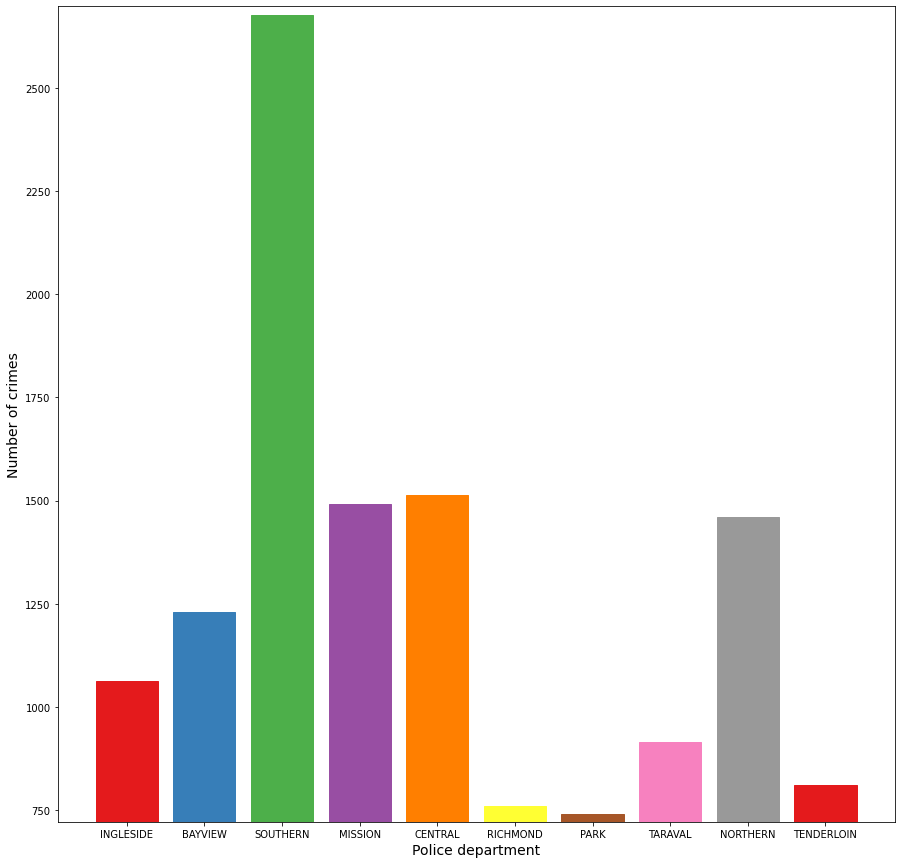

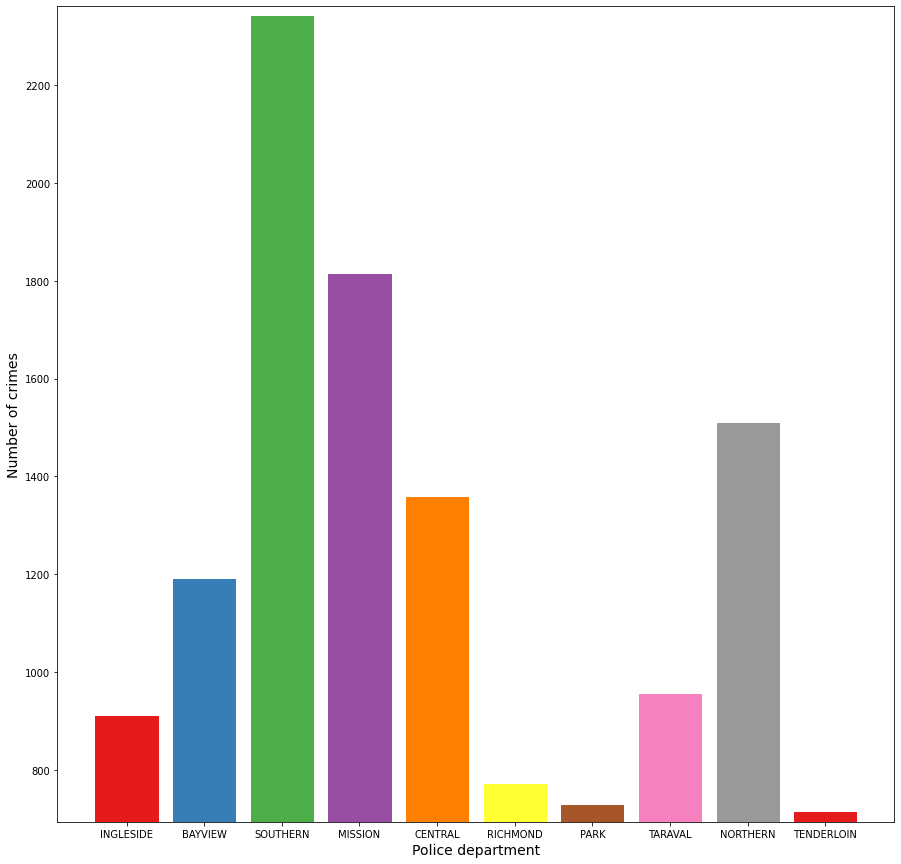

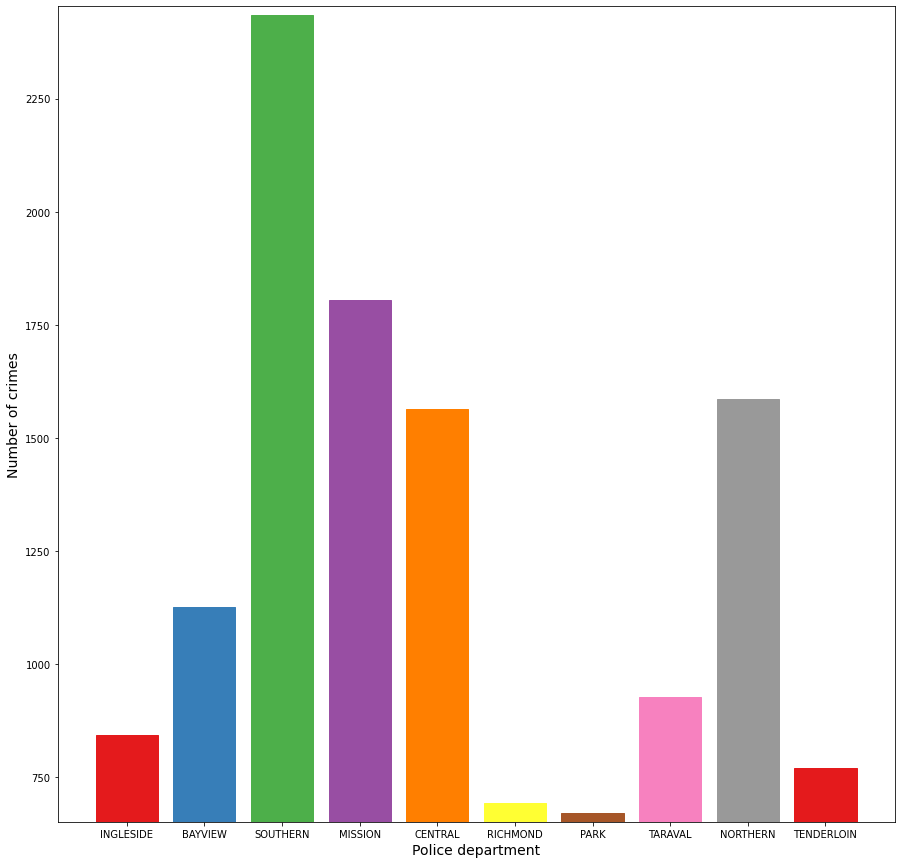

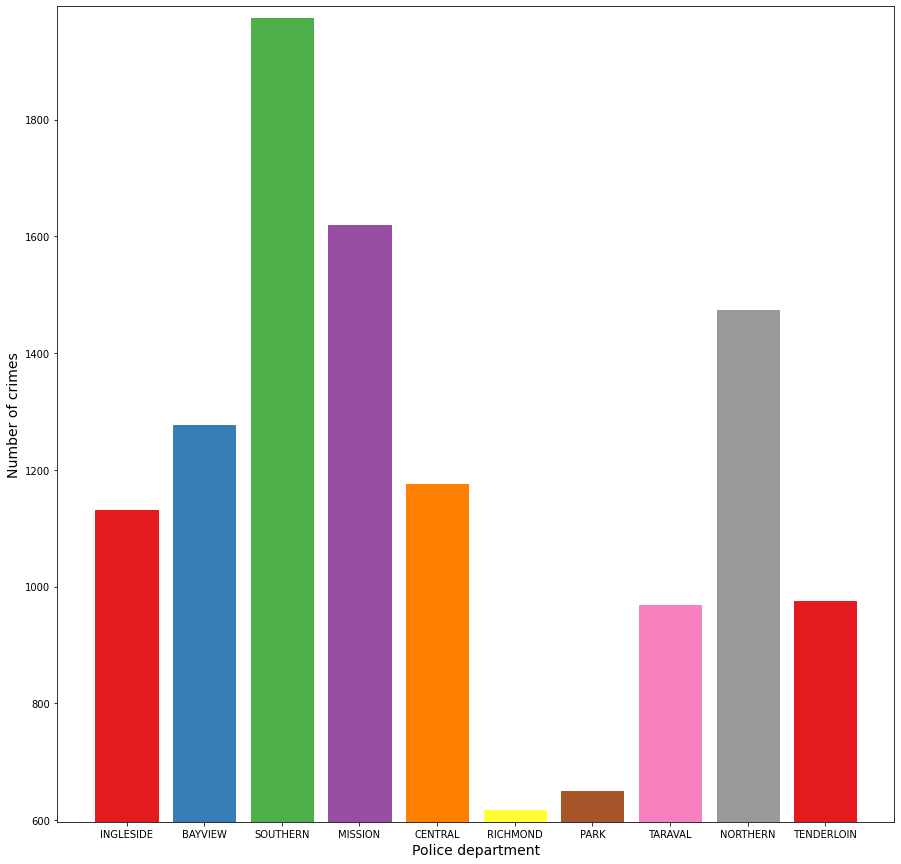

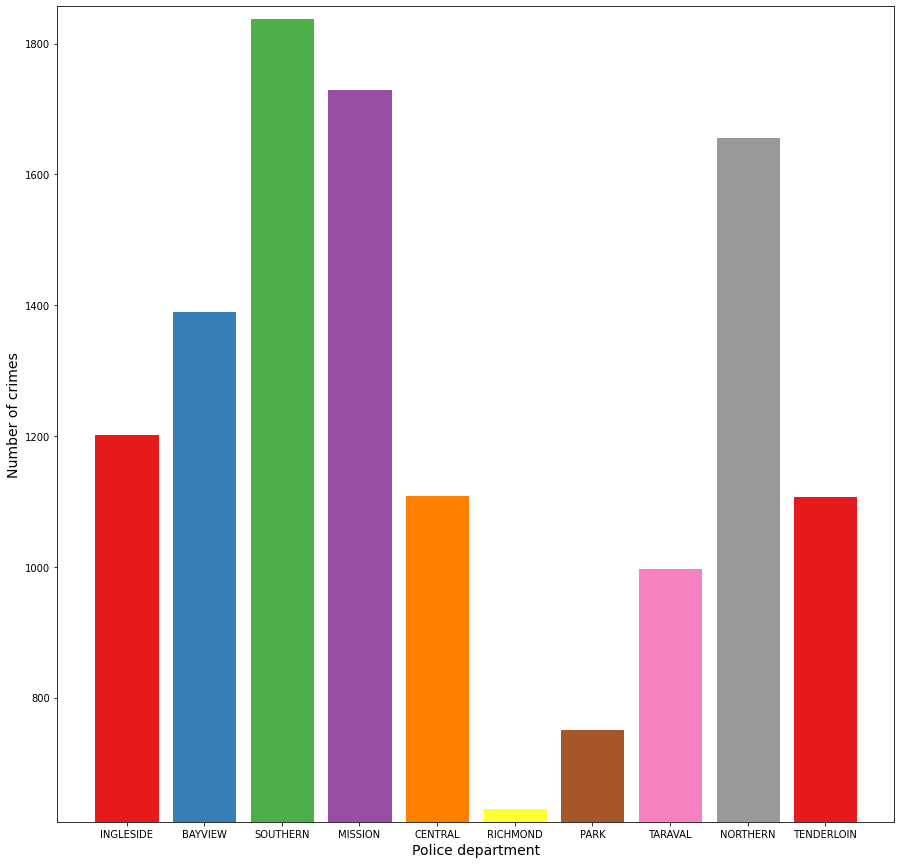

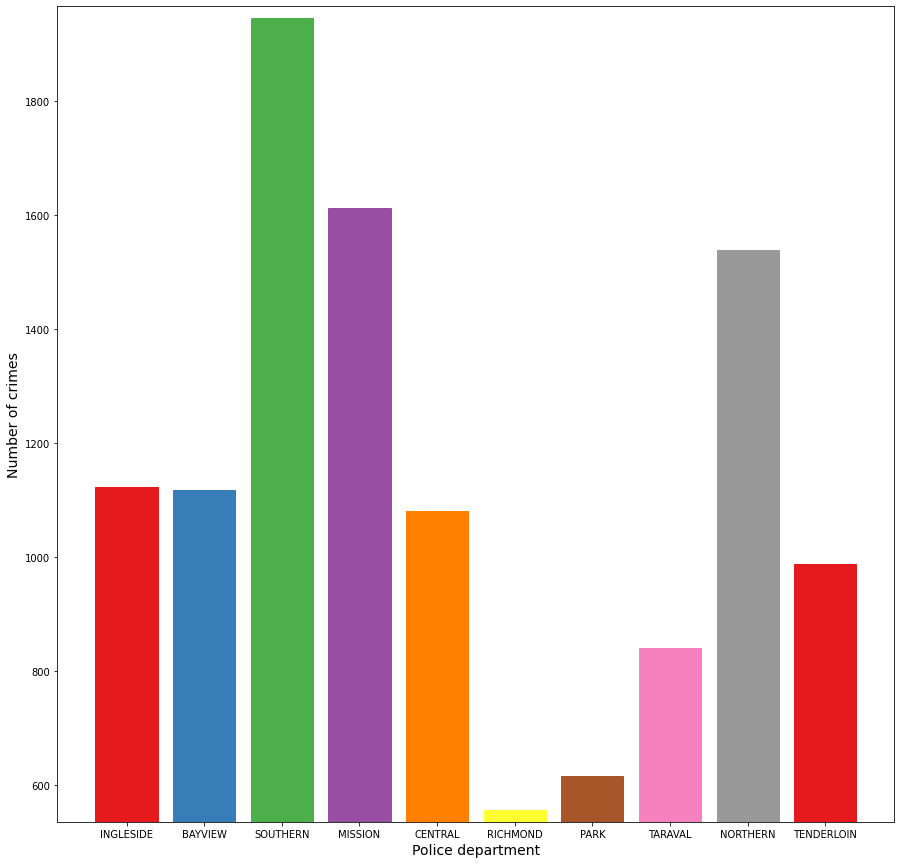

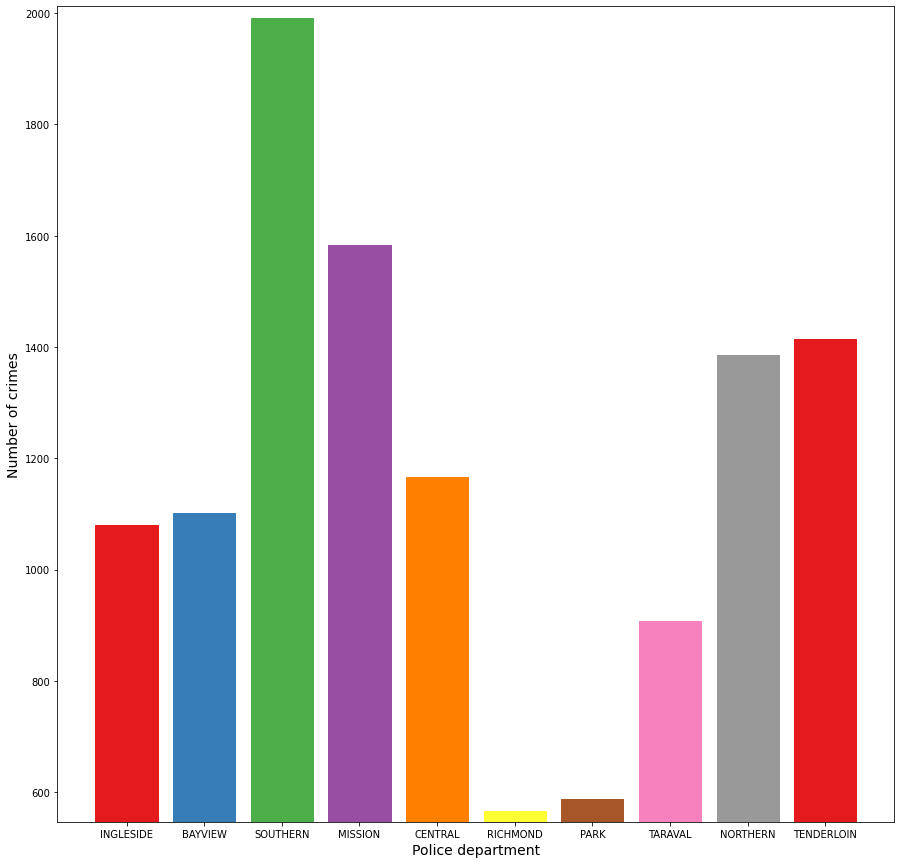

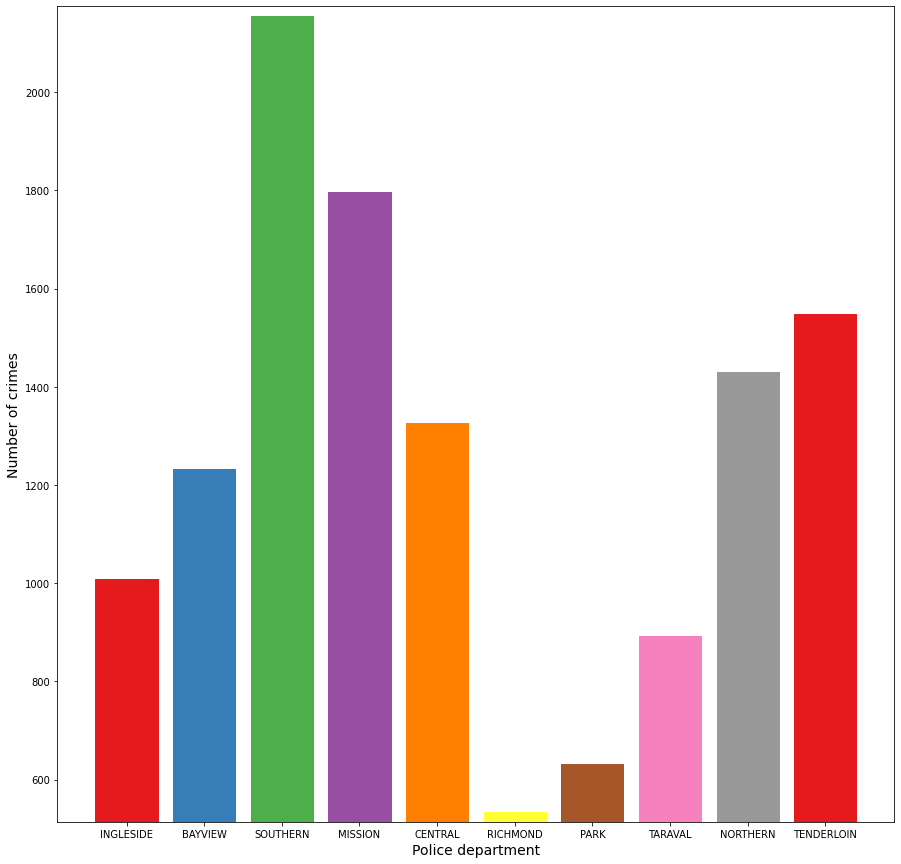

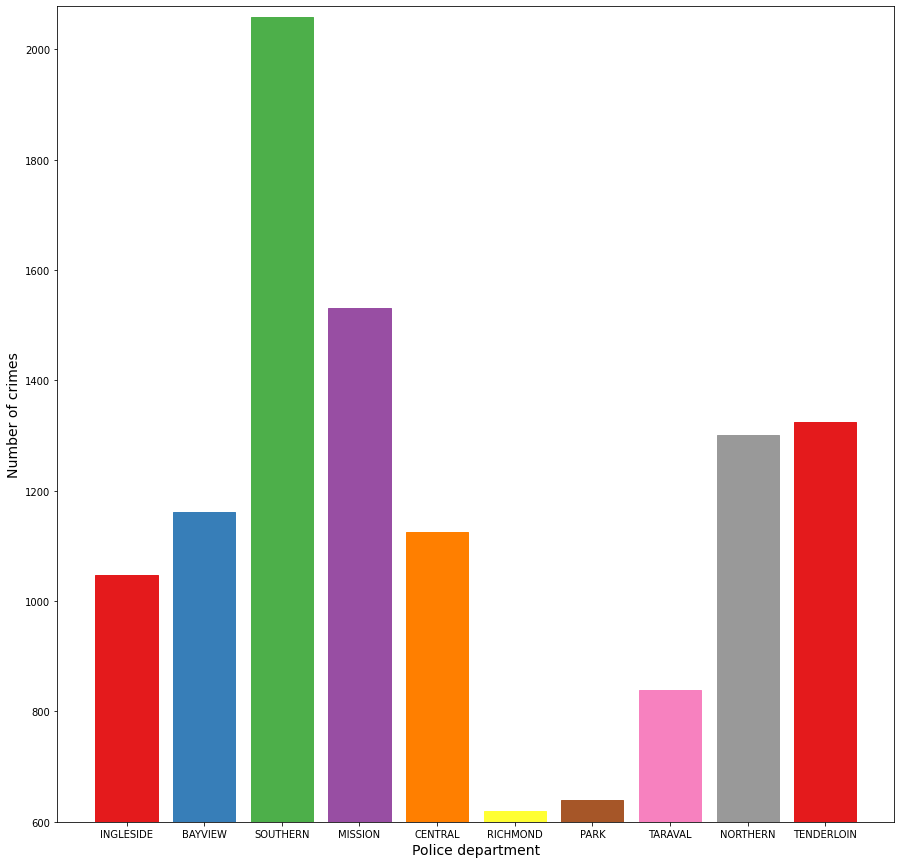

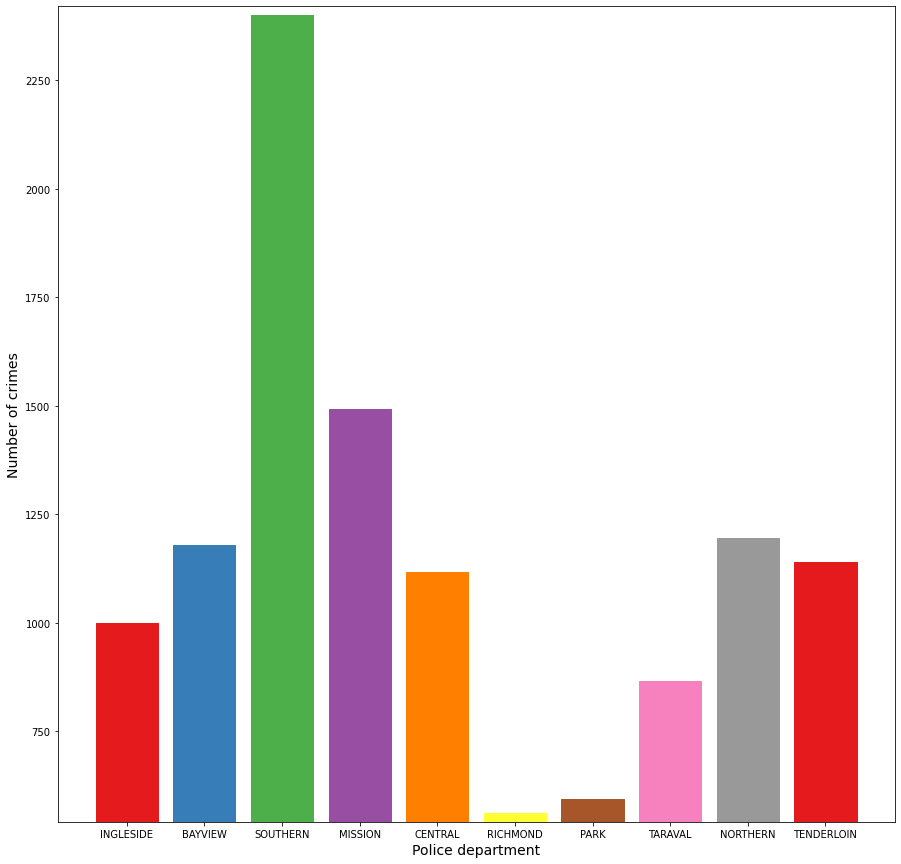

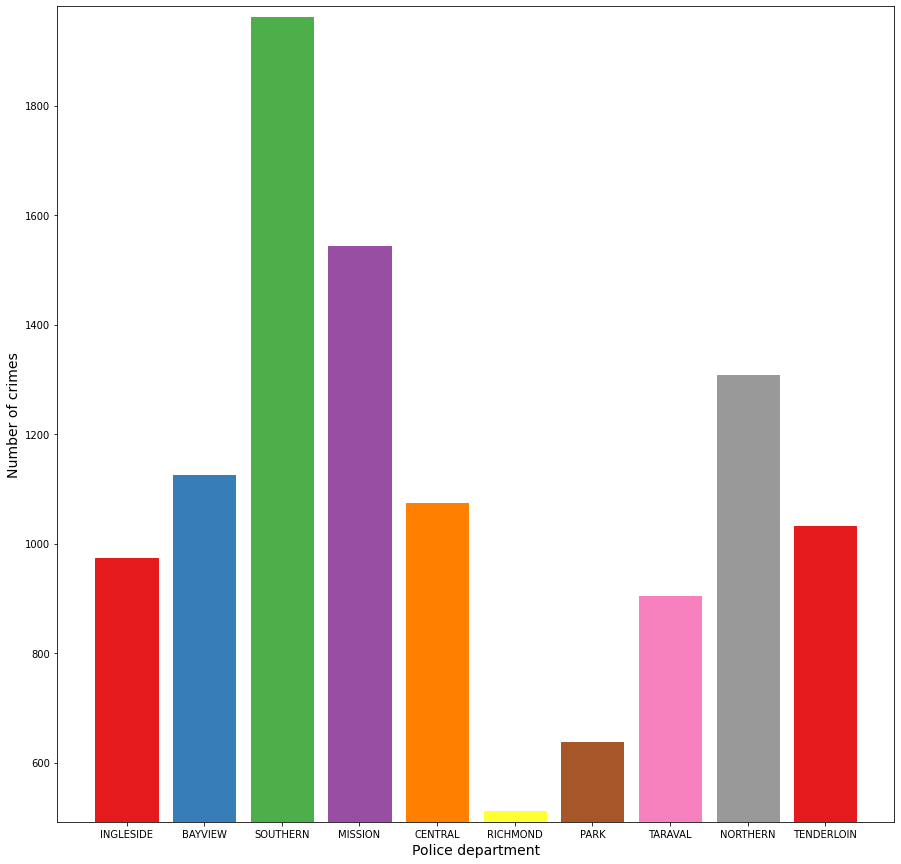

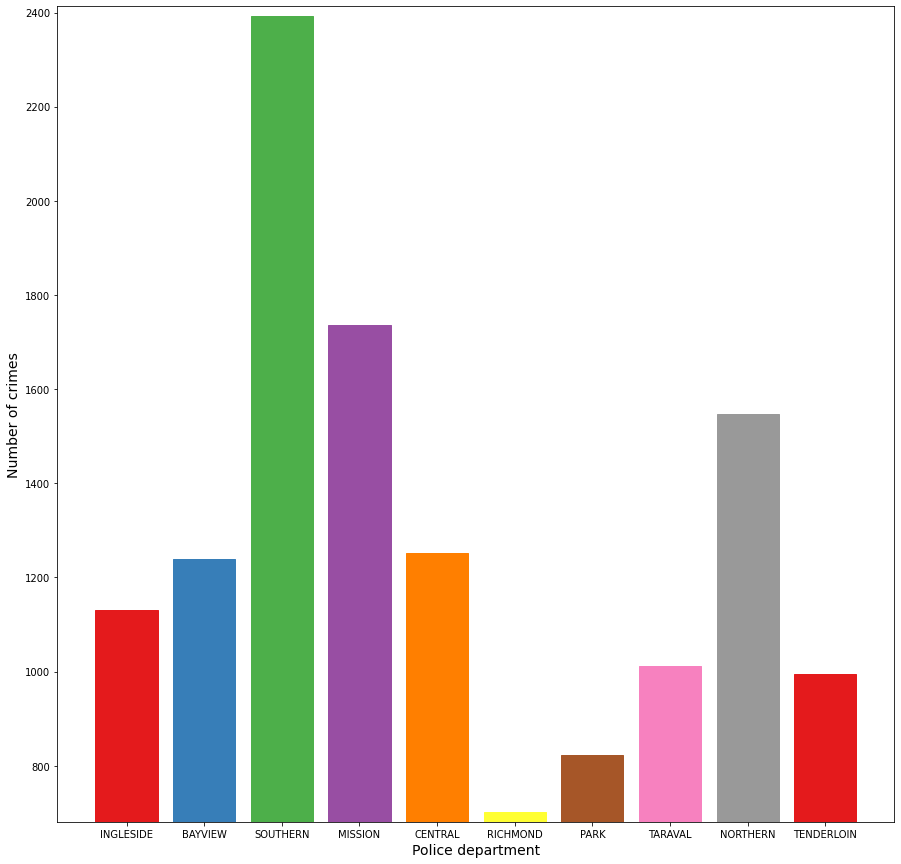

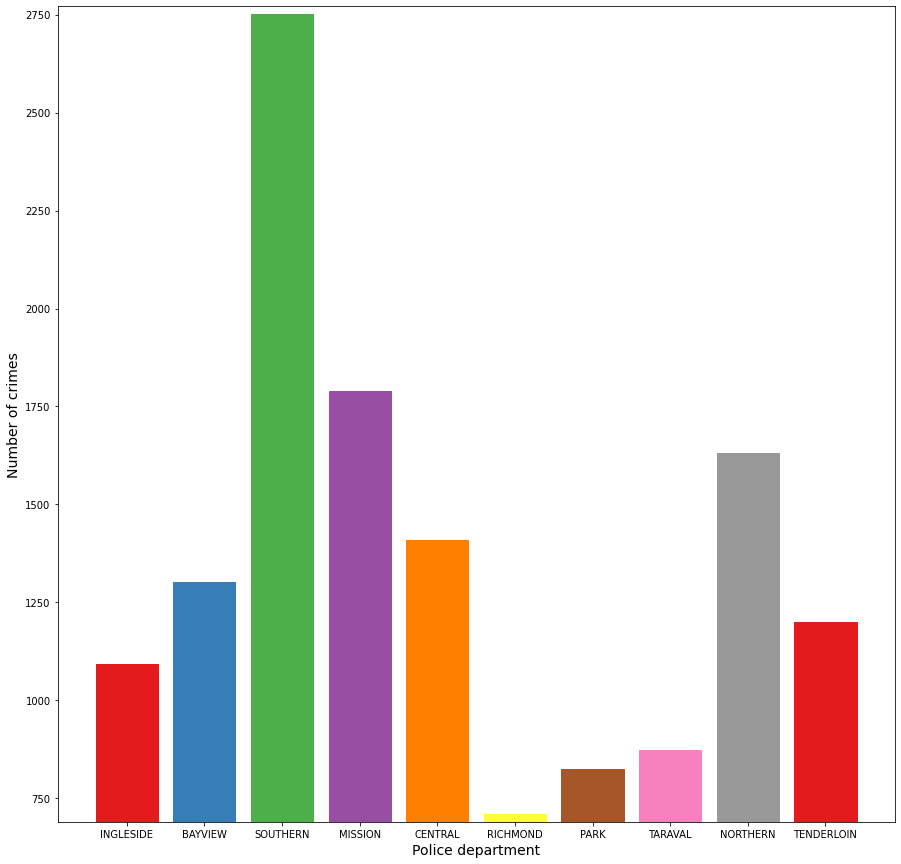

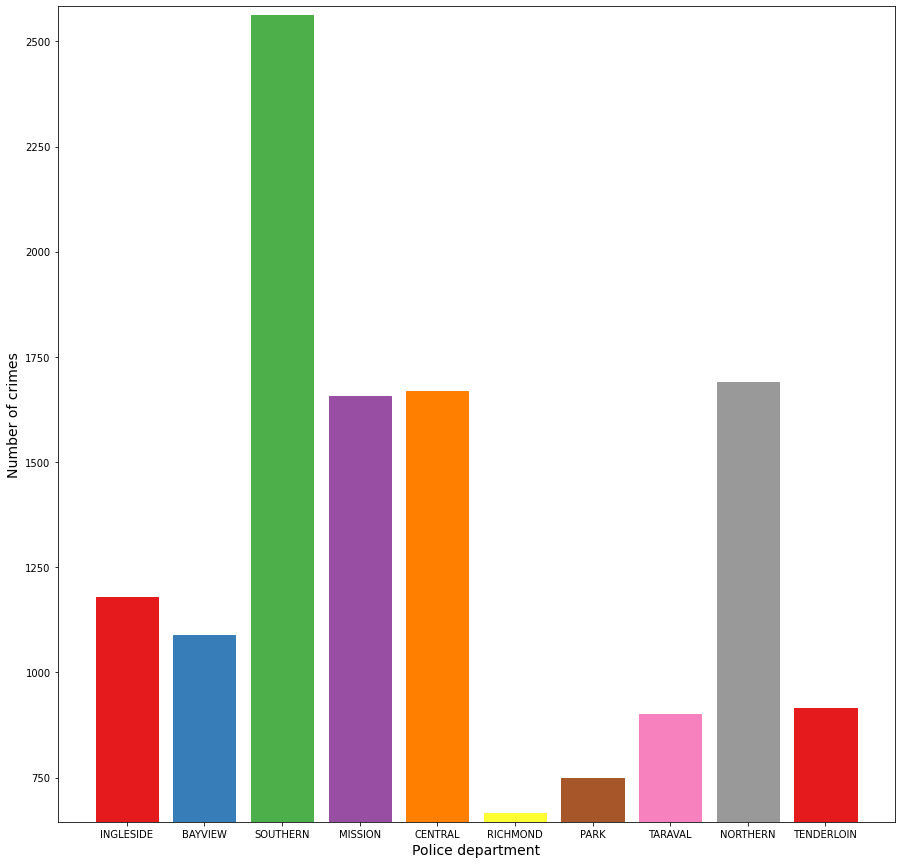

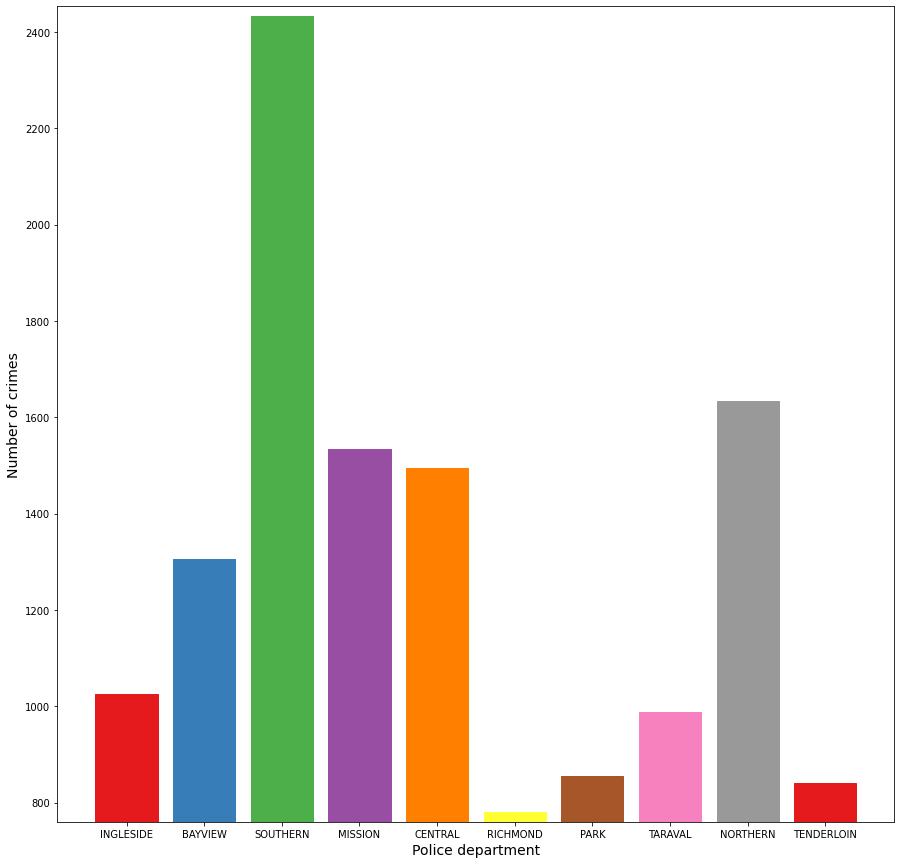

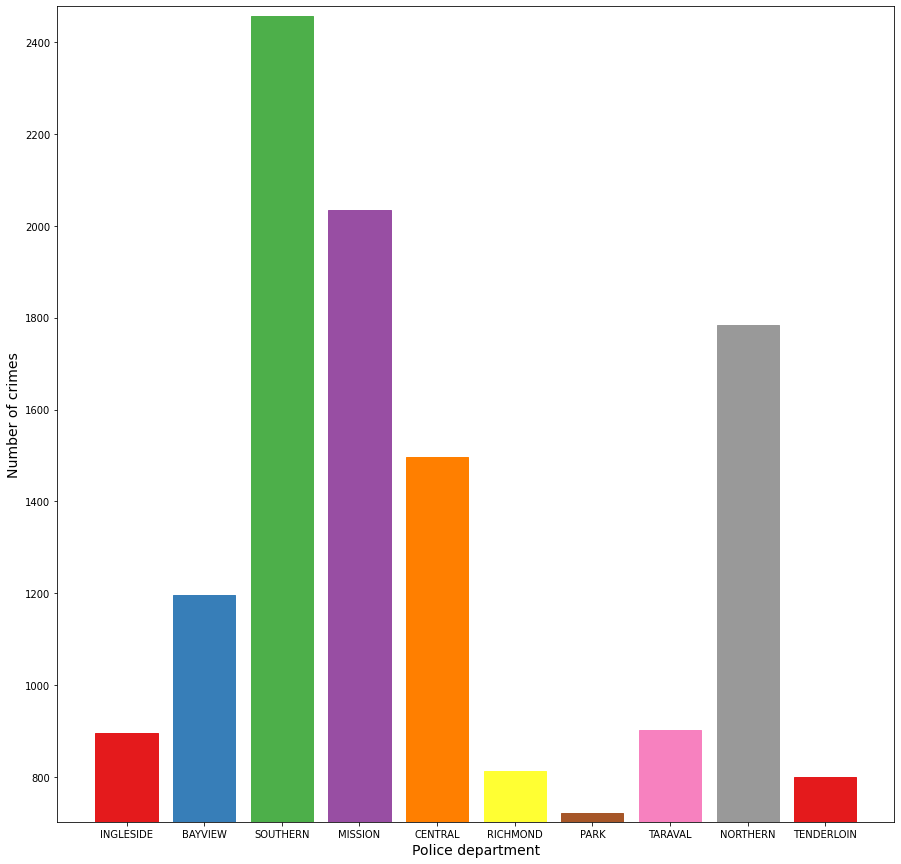

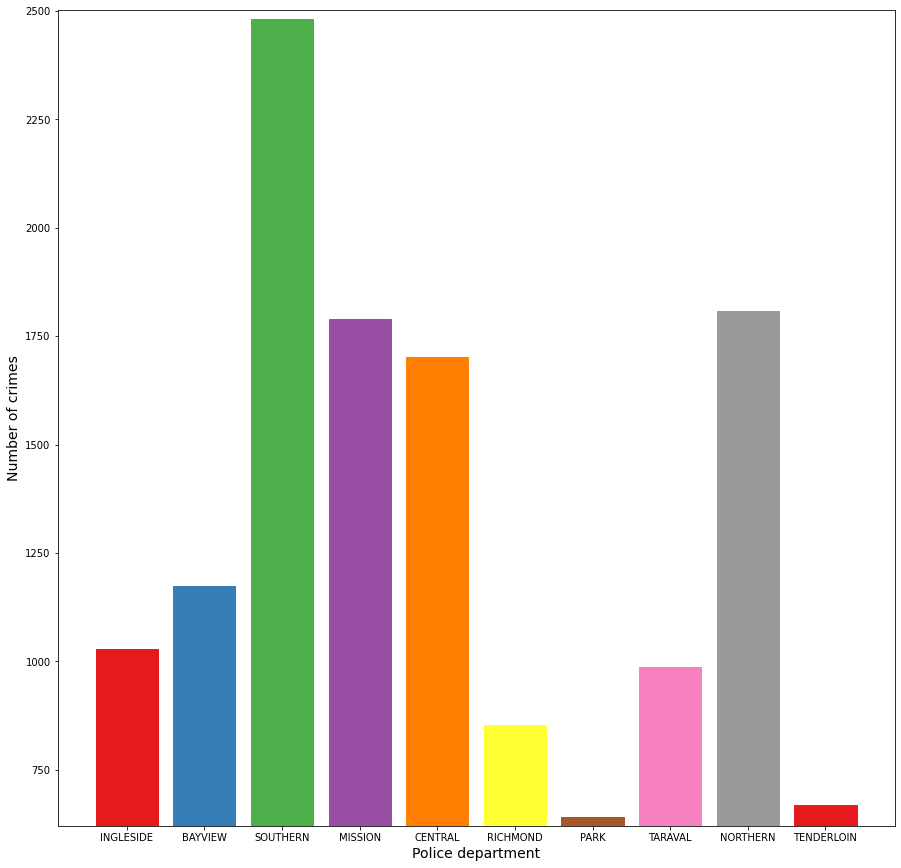

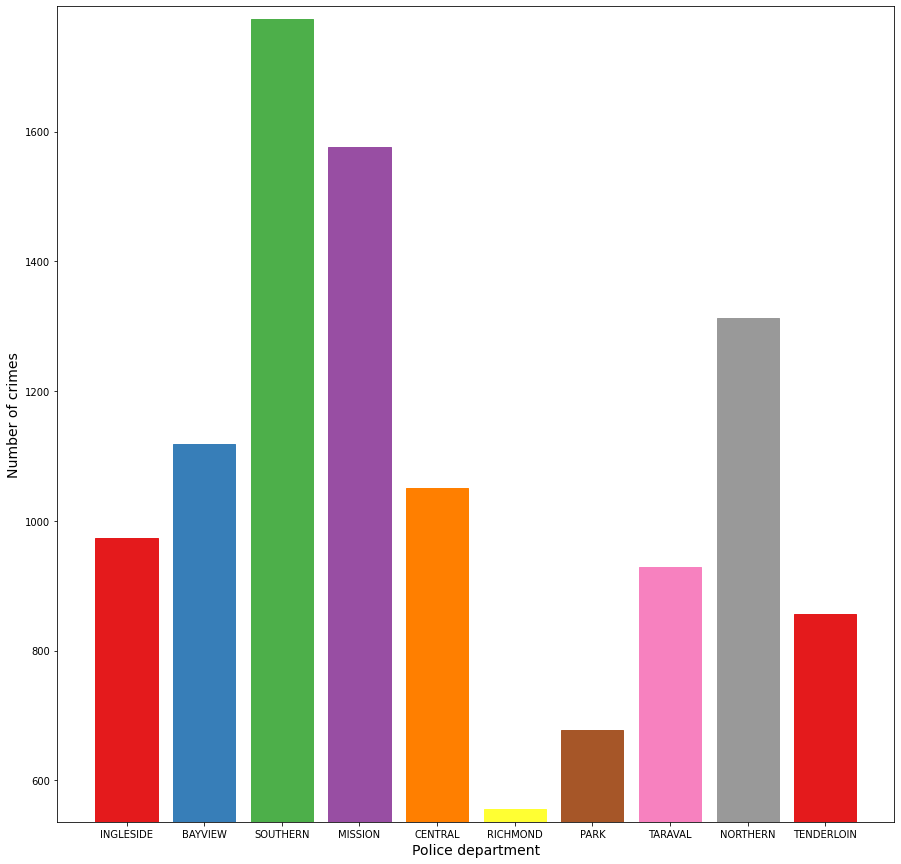

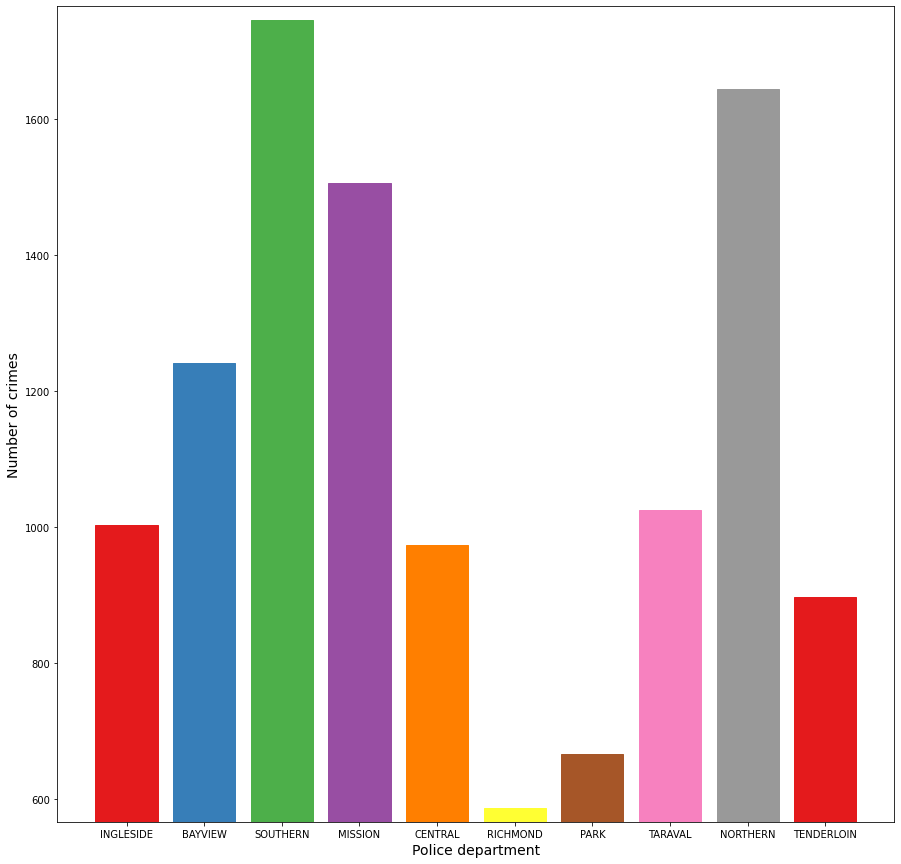

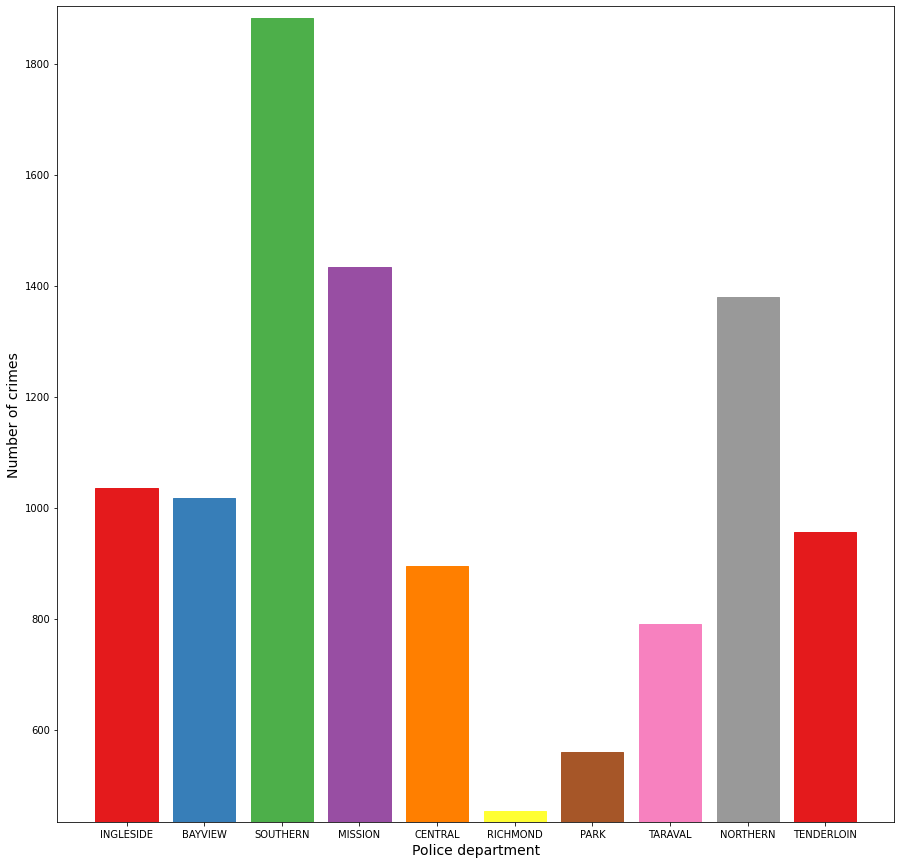

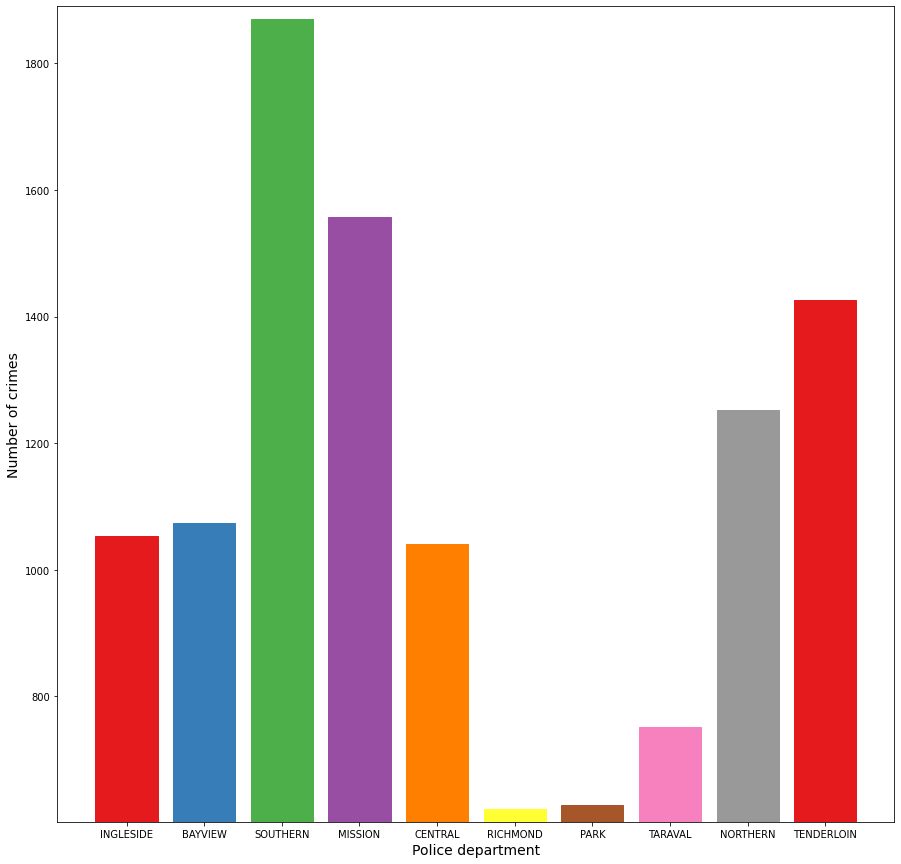

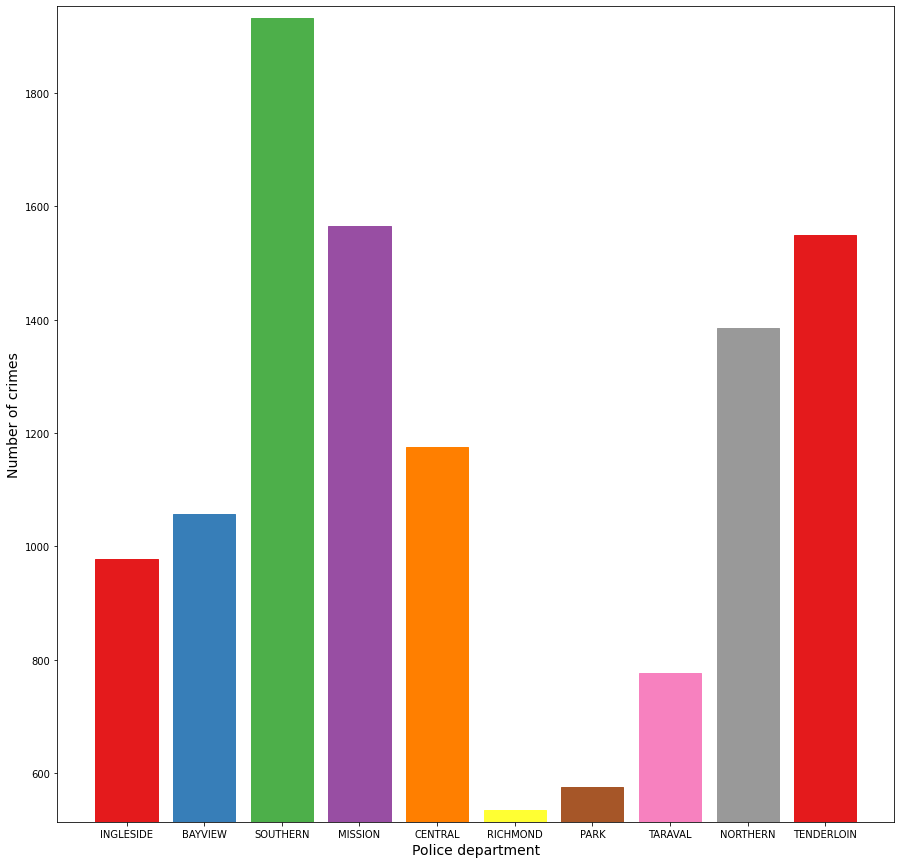

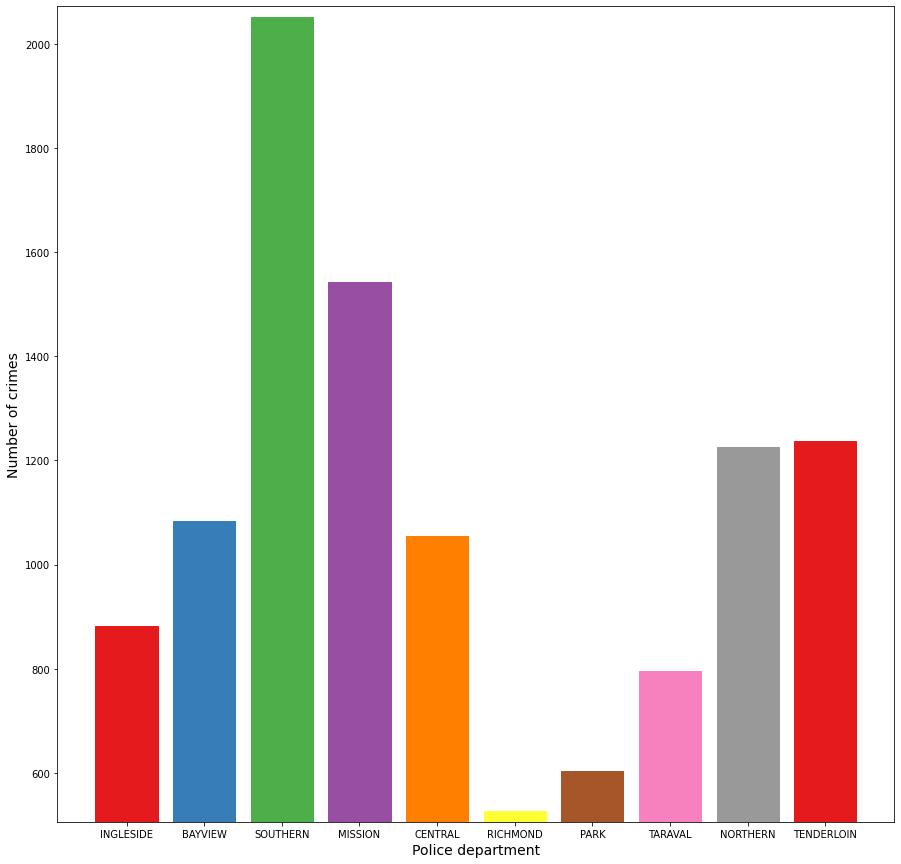

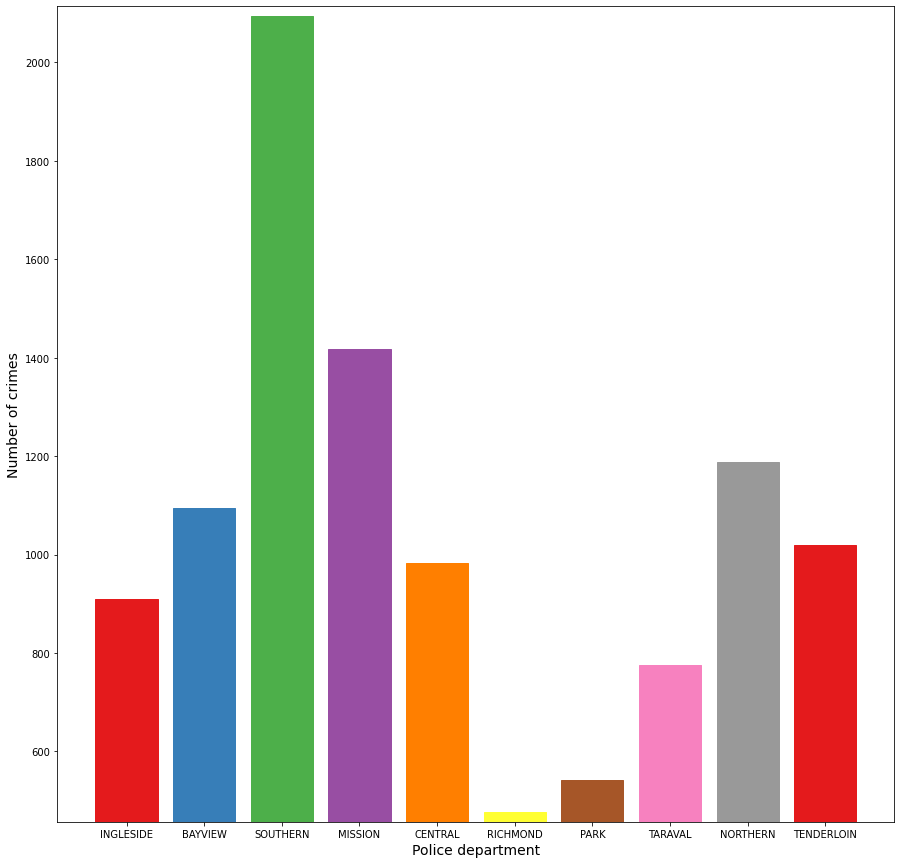

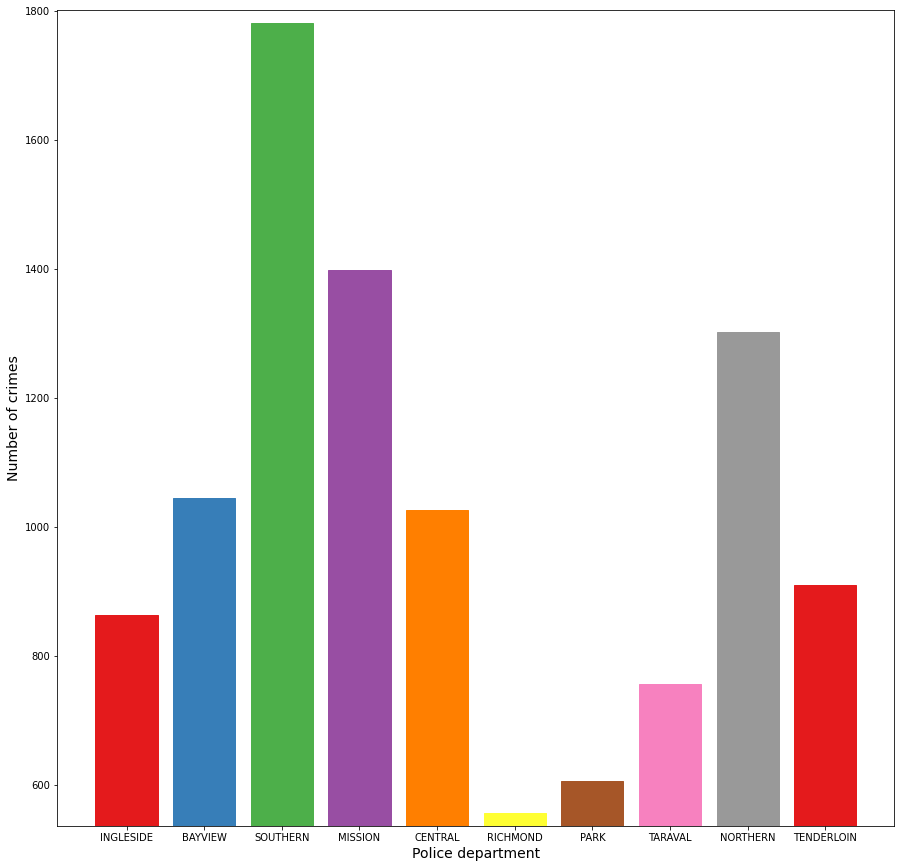

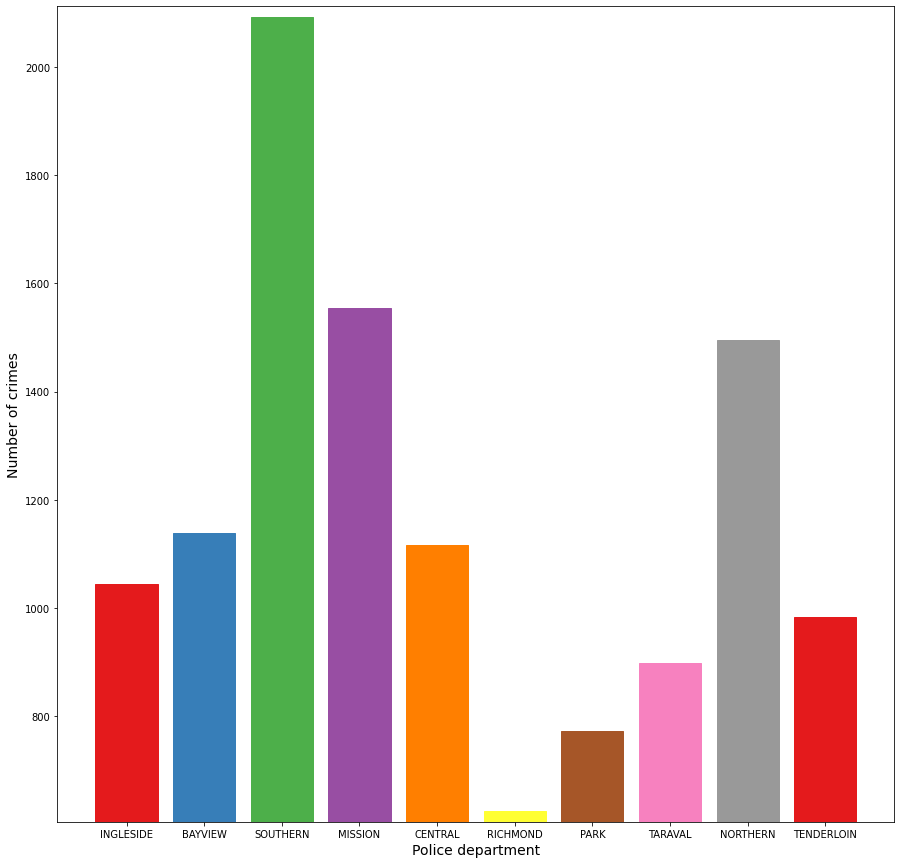

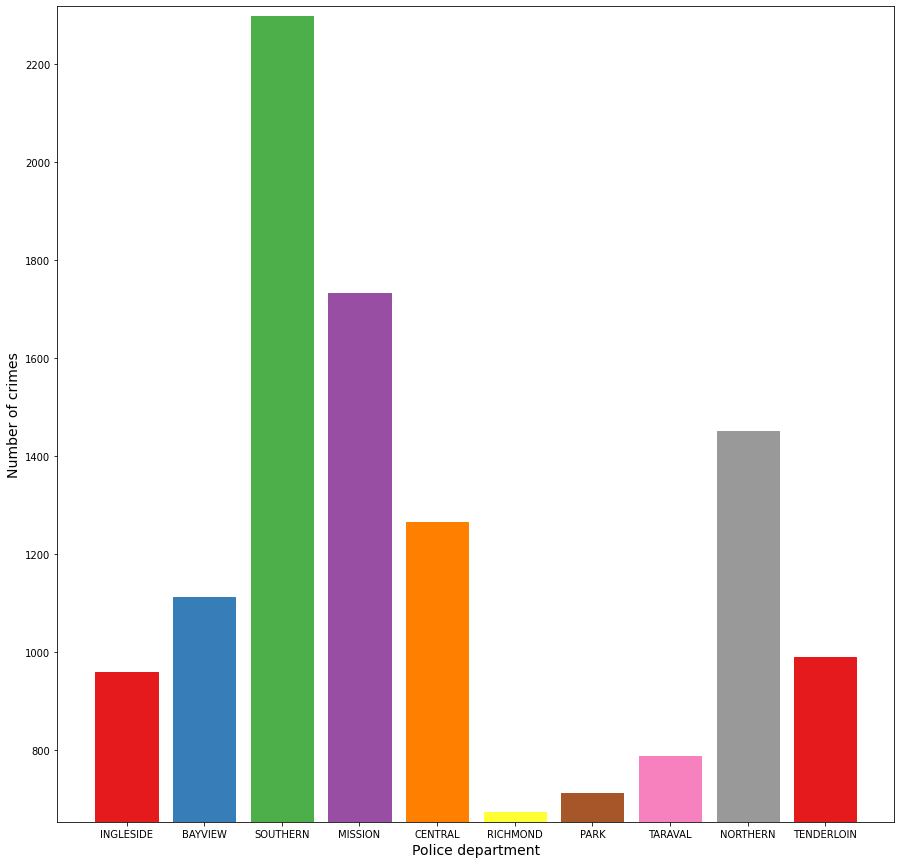

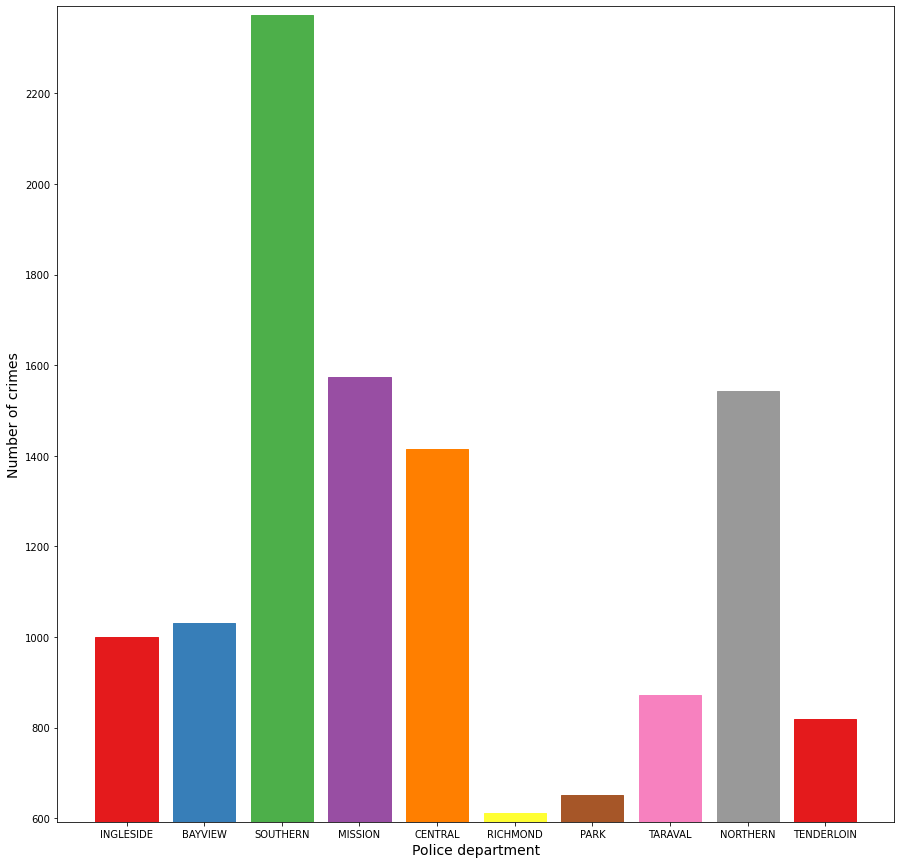

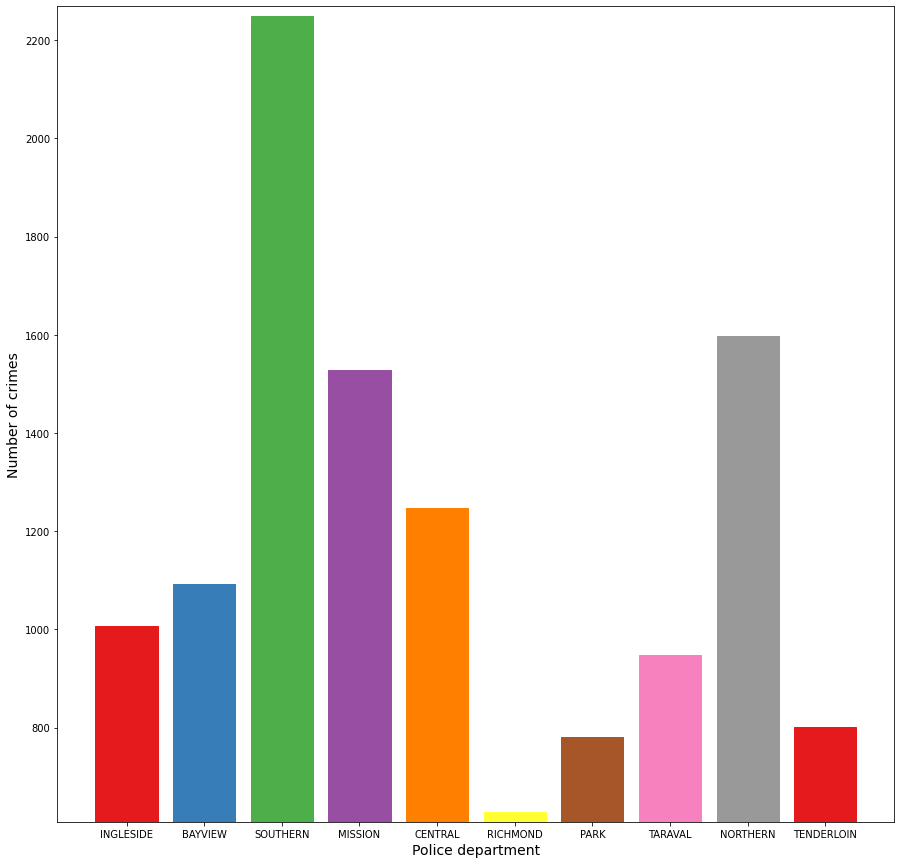

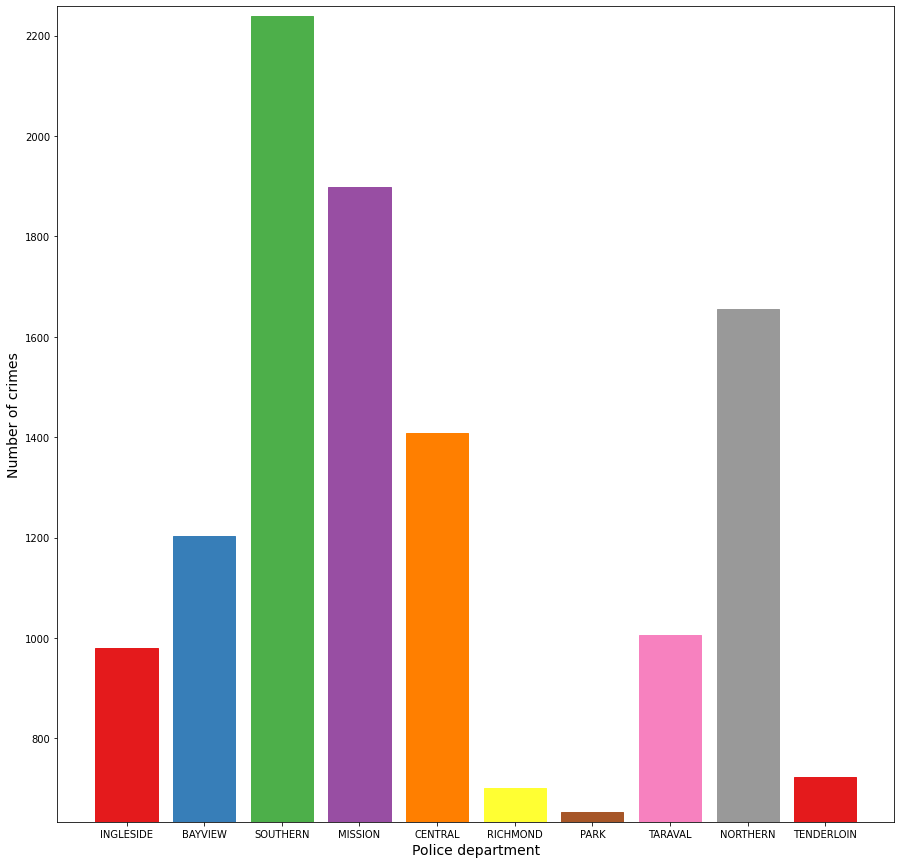

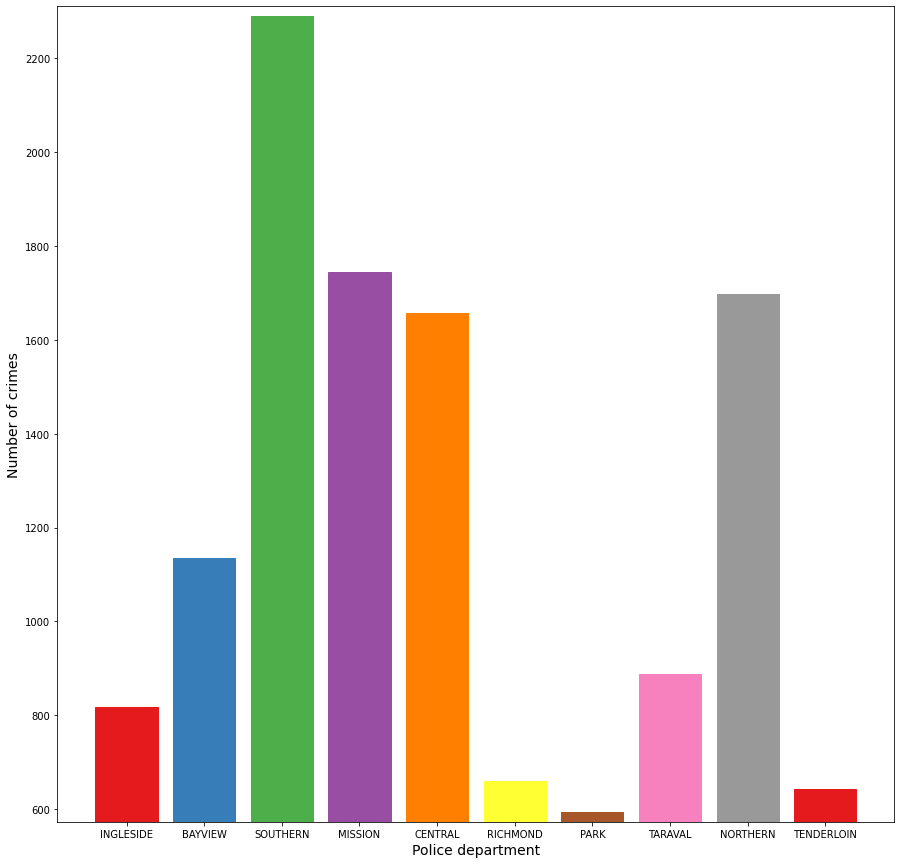

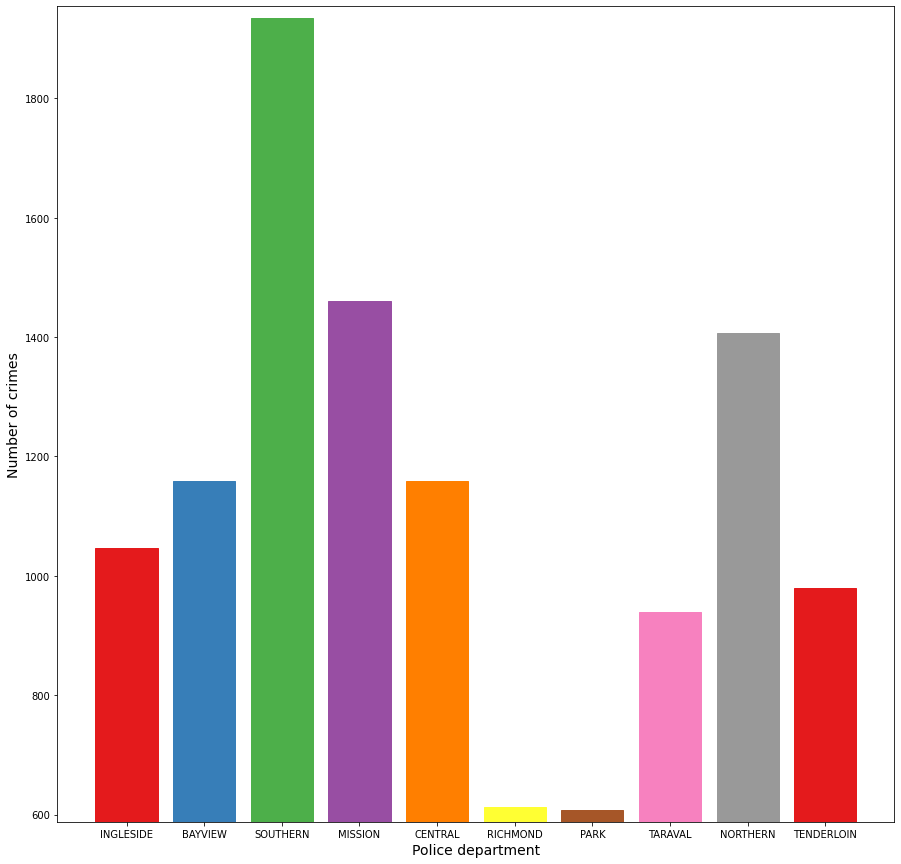

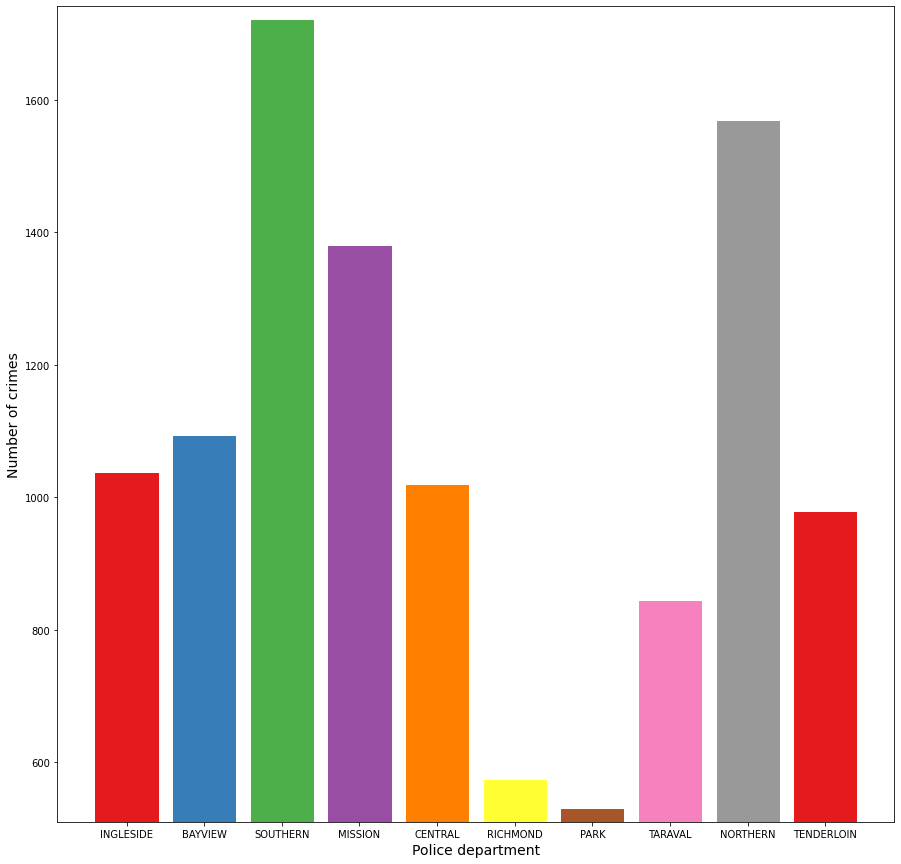

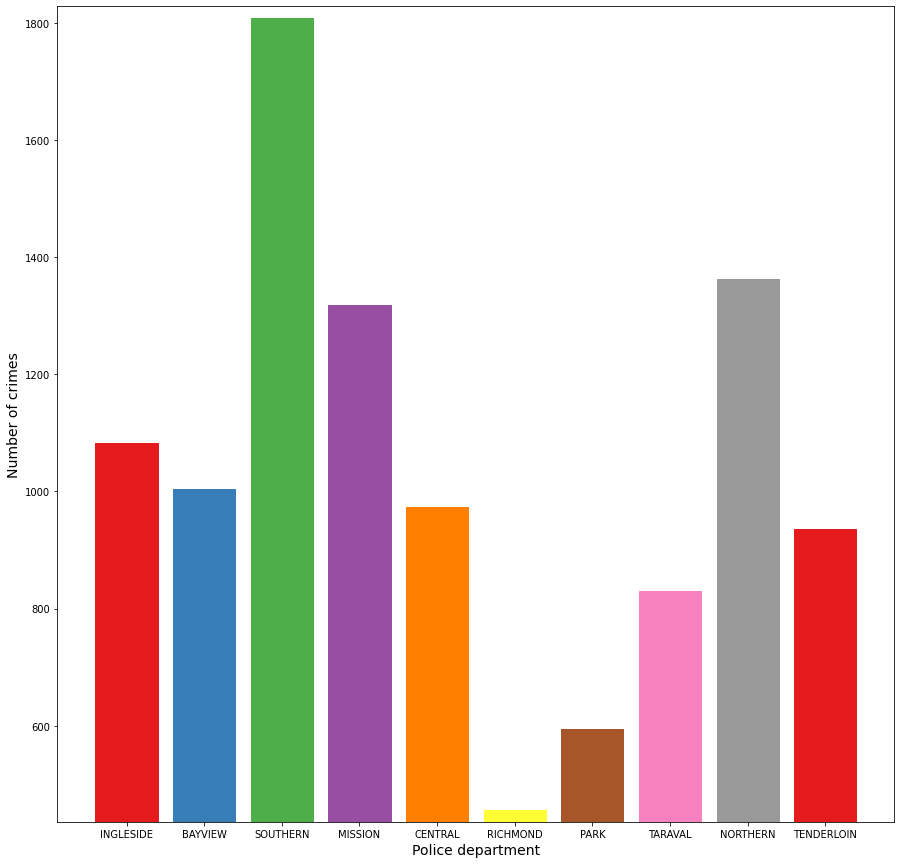

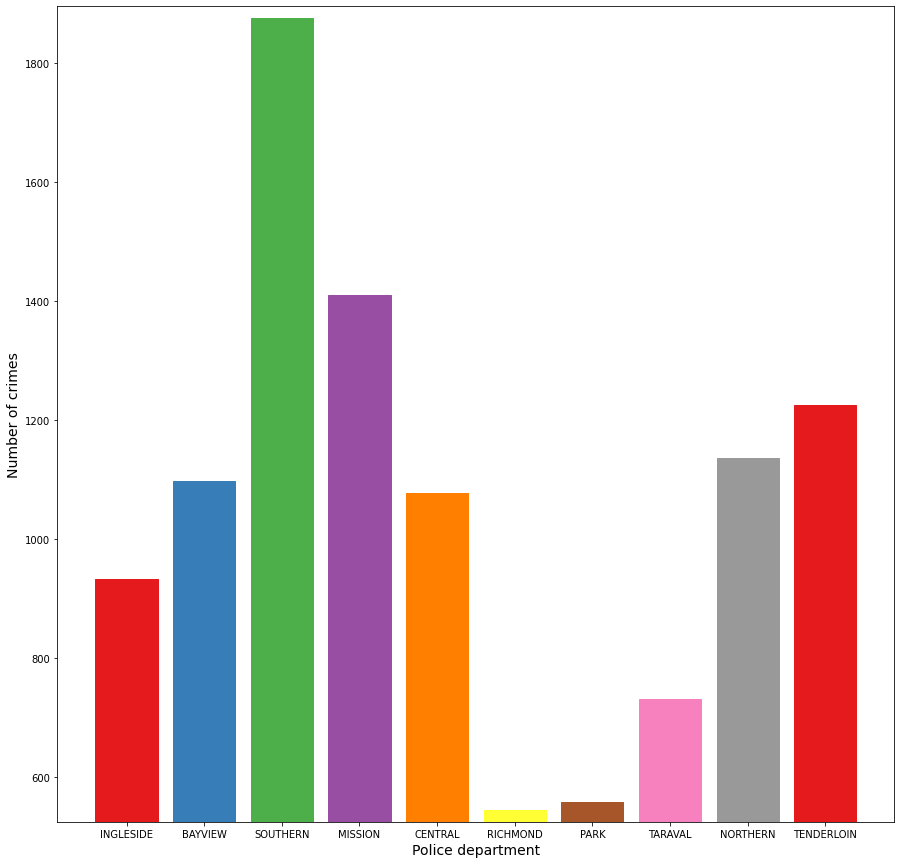

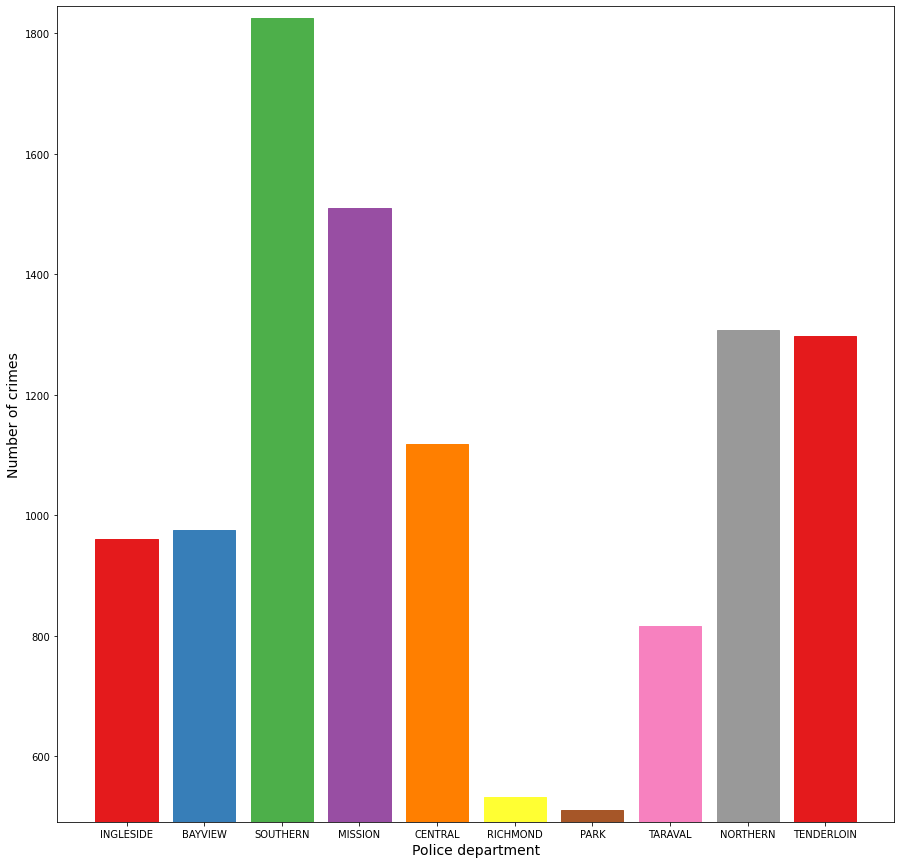

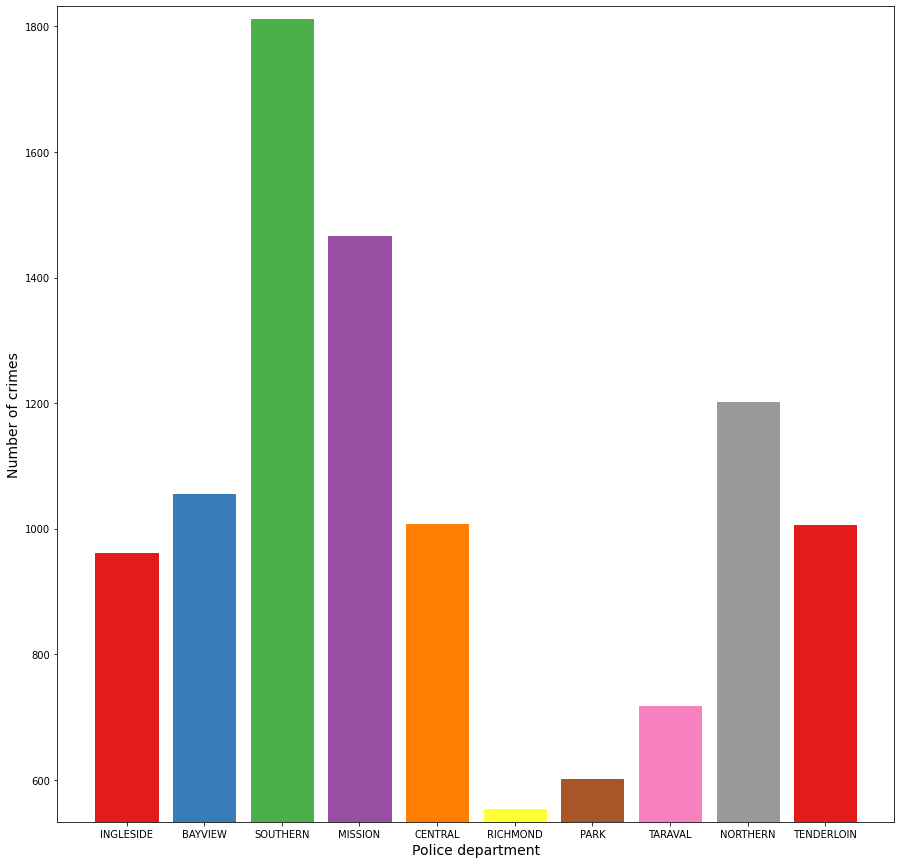

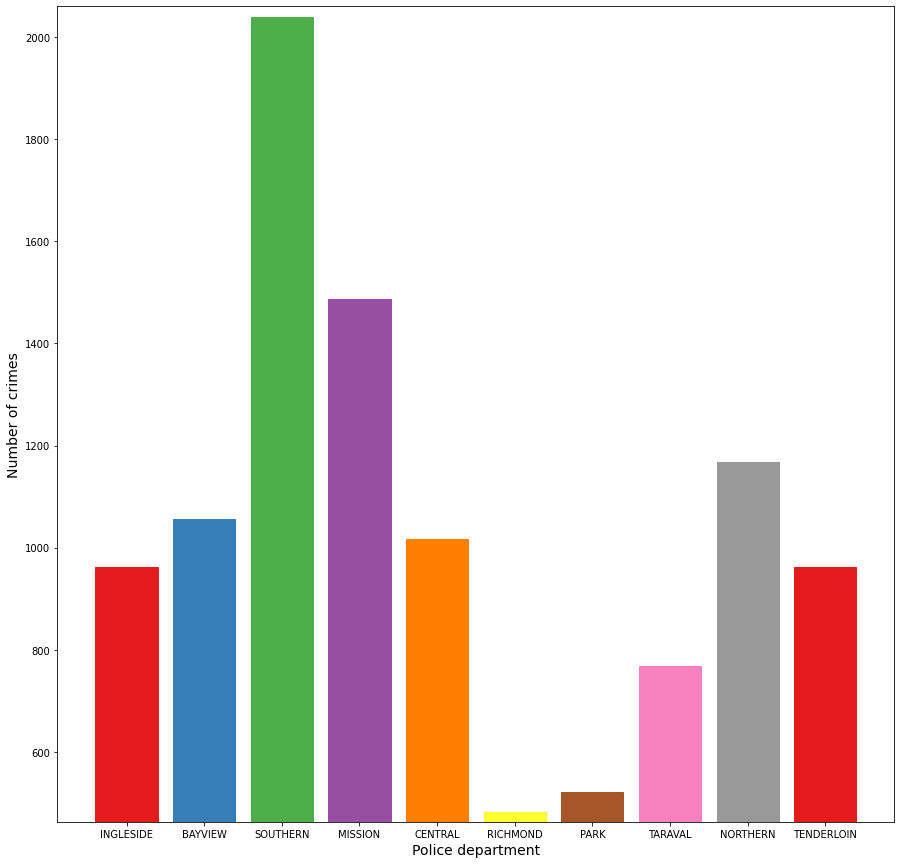

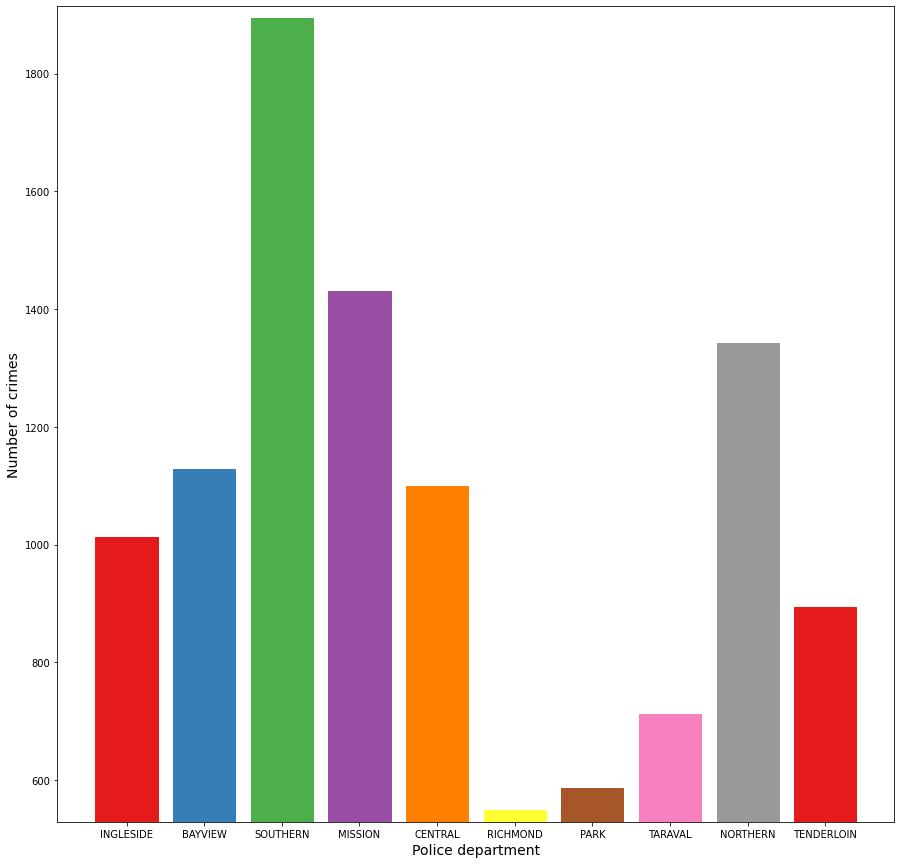

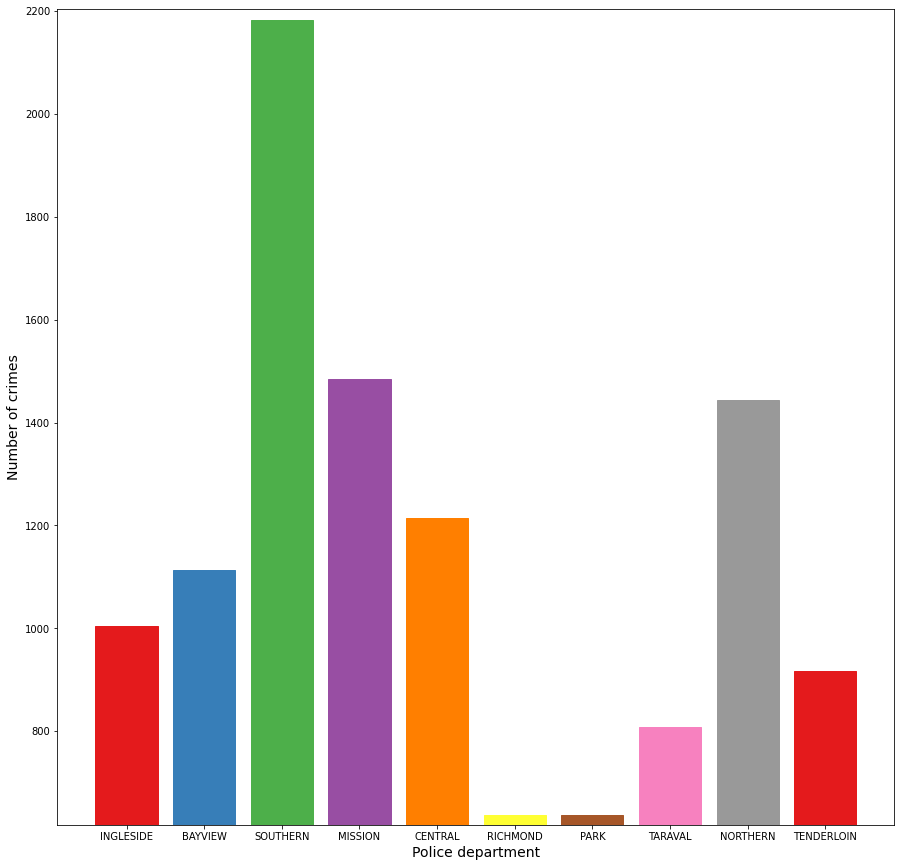

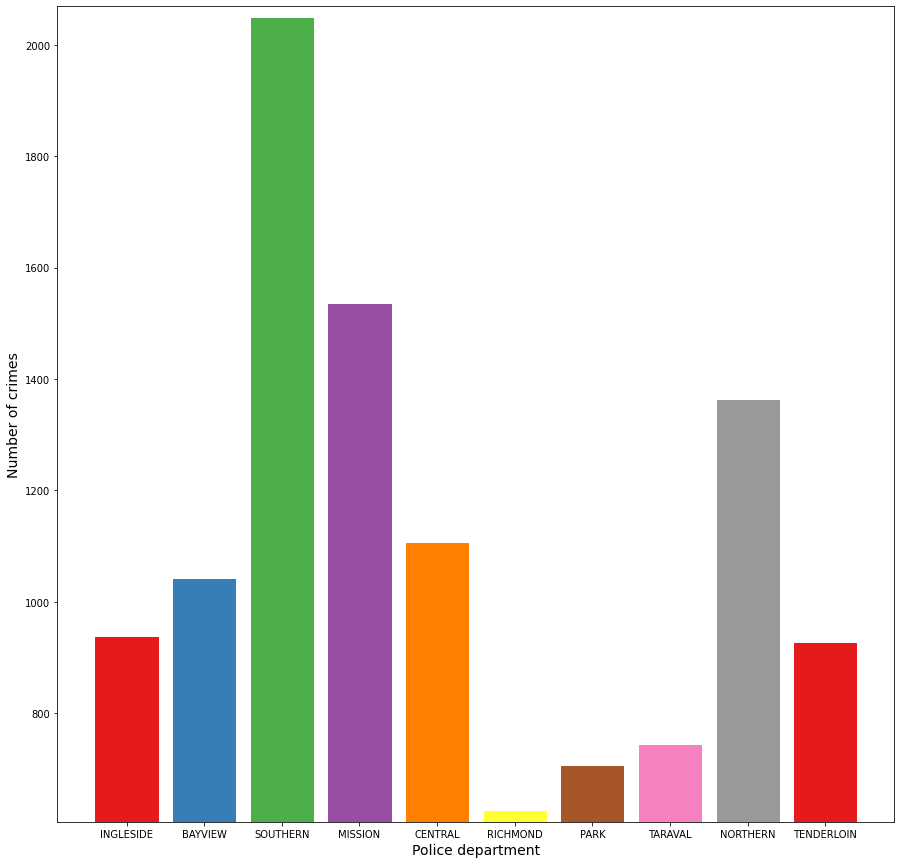

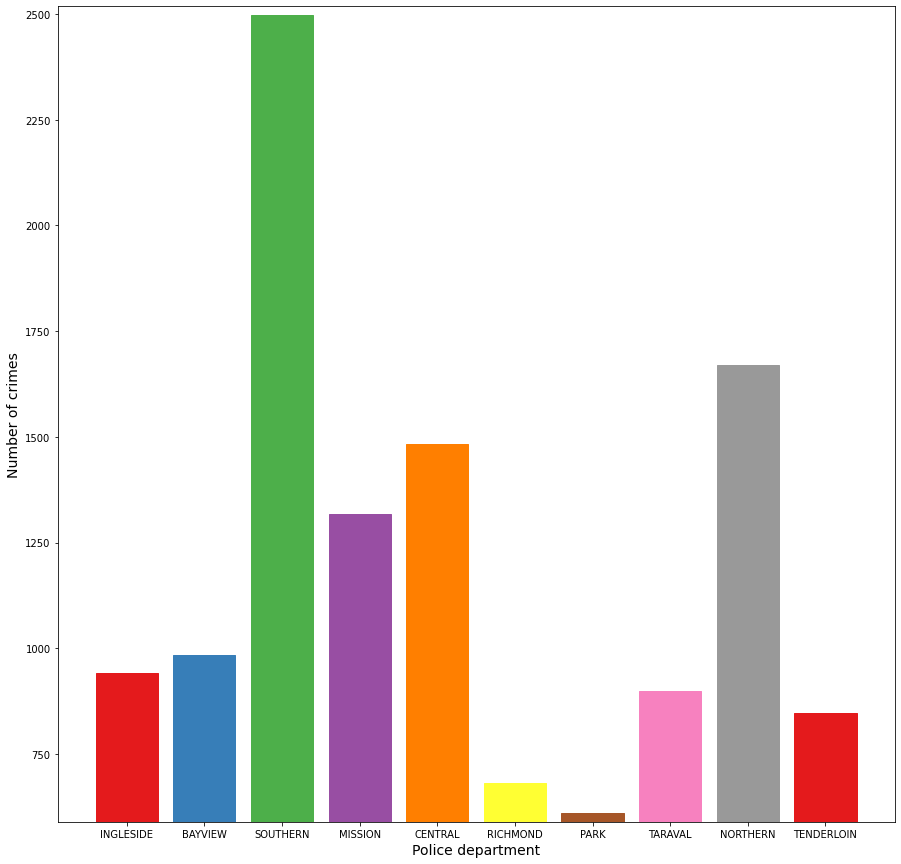

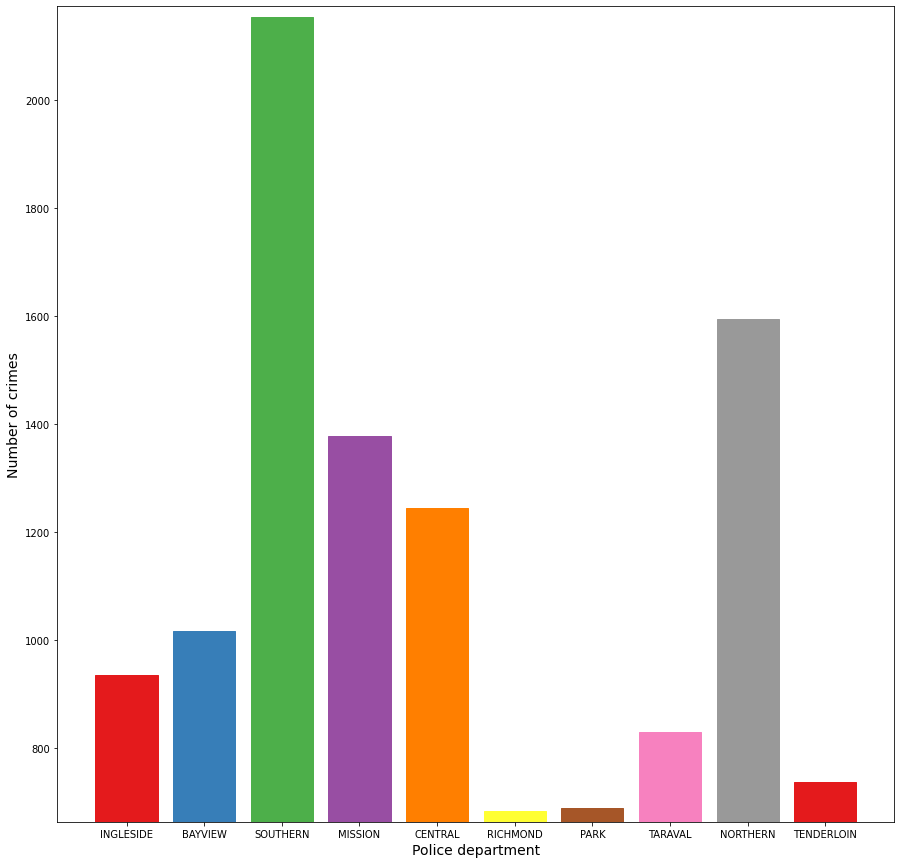

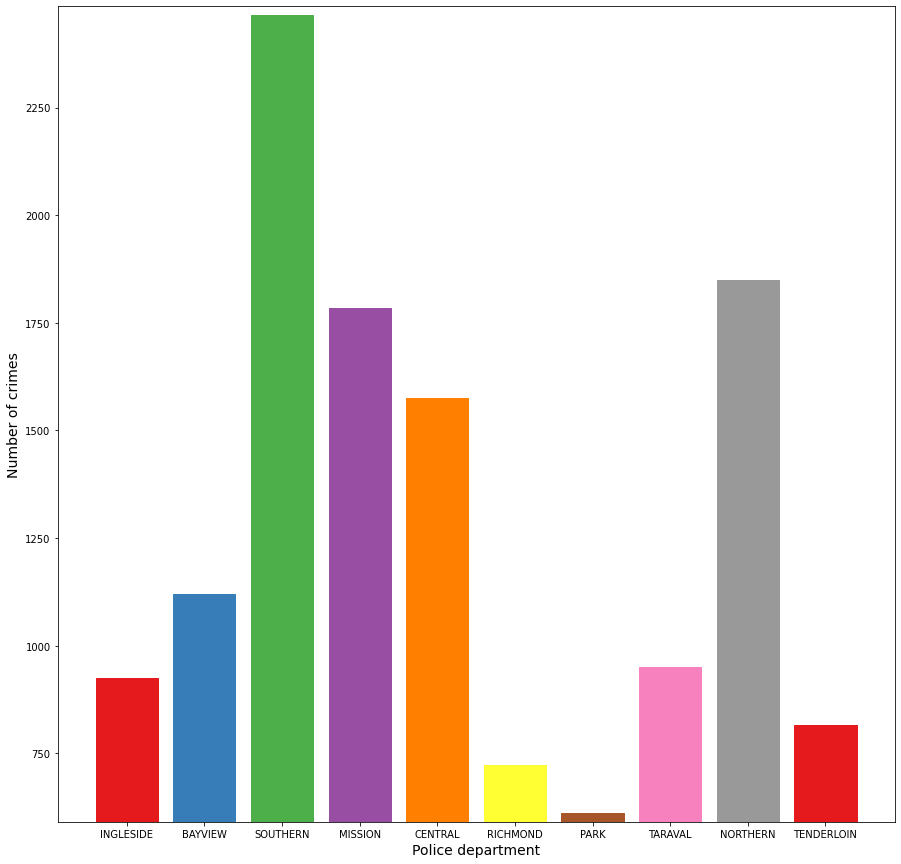

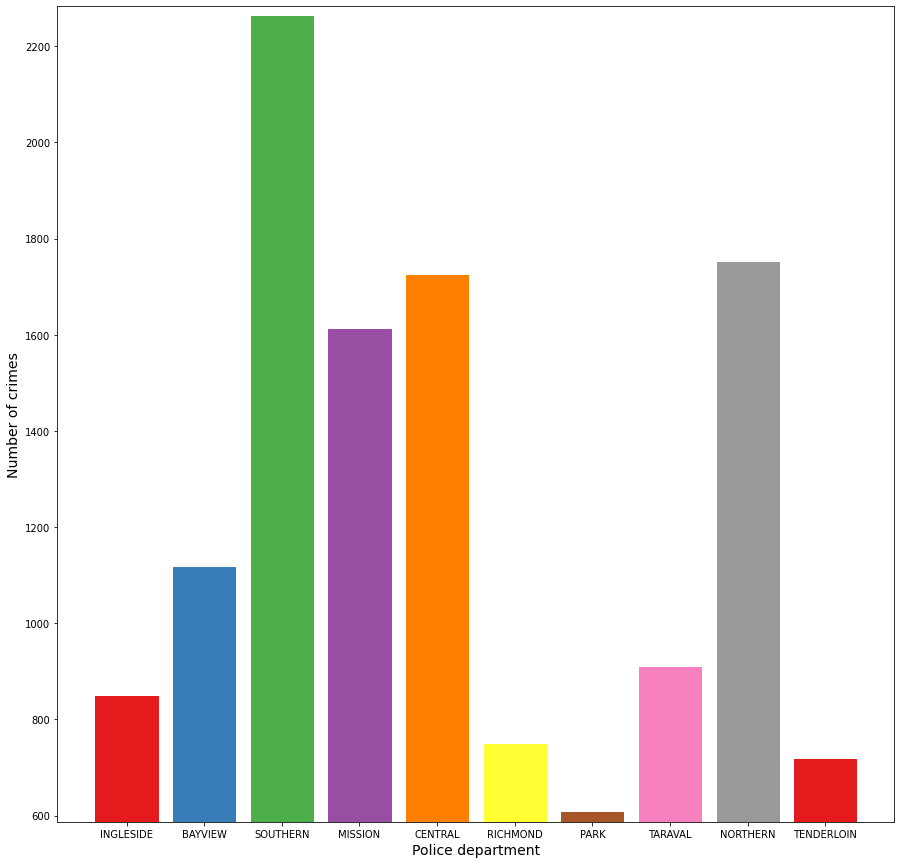

In [ ]:
for m in range(1,13):
  for y in range(2004,2018):
    plt.figure(figsize=(15,15))
    barplot = plt.bar(data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.Month == m)]["PdDistrict"], data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.Month == m)]["Count"])
    for i in range(10):
      cl = color[i%9]
      barplot[i].set_color(cl)
    mn = m
    datetime_object = datetime.datetime.strptime(str(mn), "%m")
    month_name = datetime_object.strftime("%B")
    y_min = data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.Month == m)]["Count"].min()
    y_max = data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.Month == m)]["Count"].max()
    plt.ylim(y_min-20,y_max+20)
    plt.xlabel("Police department", {"size":"14"})
    plt.ylabel("Number of crimes", {"size":"14"})
    # plt.title("Number_of_crimes_in_"+month_name+"_Month_in_%i" %y)
    plt.savefig(PATH_IMAGE+"/Number_of_crimes_in_"+month_name+"_police_department_in_%i.png" %y)
plt.show()

In [ ]:
data = dataset_df[(dataset_df.Month == 1)]
data

datetime       Date   Time  ... DayofMonth WDay PdDID
0        2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     0
1        2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     0
2        2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     1
3        2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     0
4        2004-01-01 00:01:00 2004-01-01  00:01  ...          1    4     2
...                      ...        ...    ...  ...        ...  ...   ...
1831138  2017-01-31 23:30:00 2017-01-31  23:30  ...         31    2     0
1831139  2017-01-31 23:30:00 2017-01-31  23:30  ...         31    2     8
1831140  2017-01-31 23:45:00 2017-01-31  23:45  ...         31    2     5
1831141  2017-01-31 23:45:00 2017-01-31  23:45  ...         31    2     2
1831142  2017-01-31 23:45:00 2017-01-31  23:45  ...         31    2     2

[168228 rows x 13 columns]

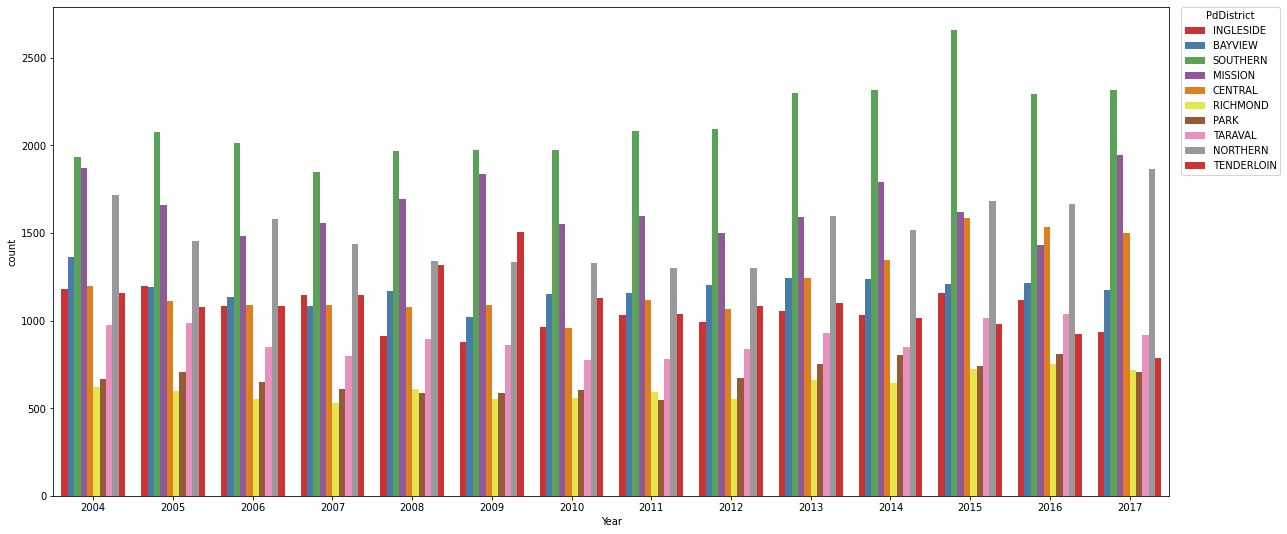

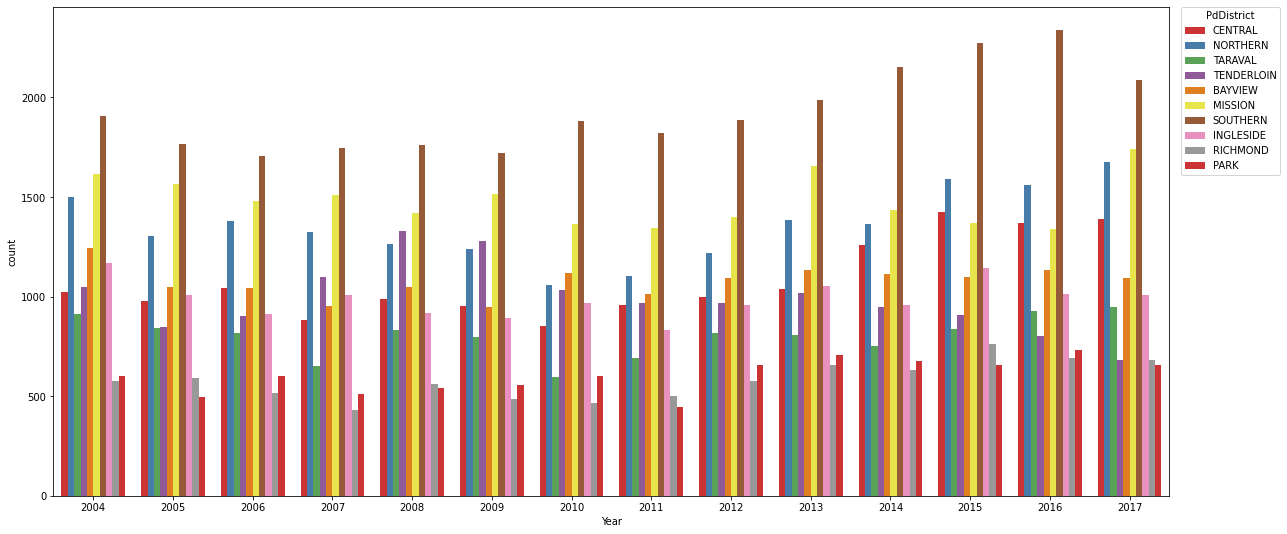

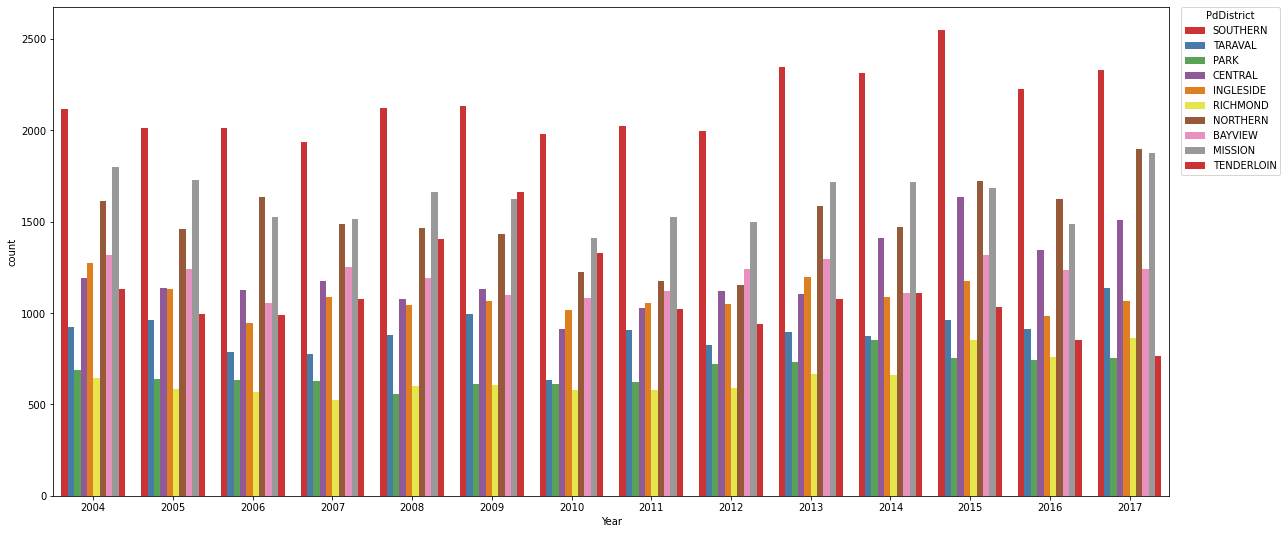

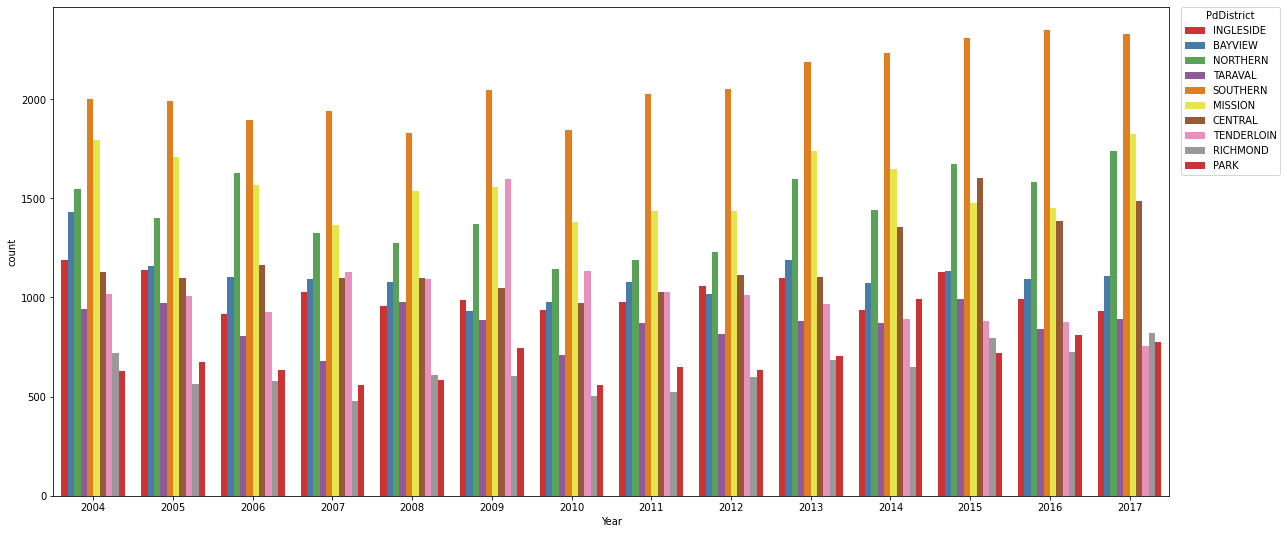

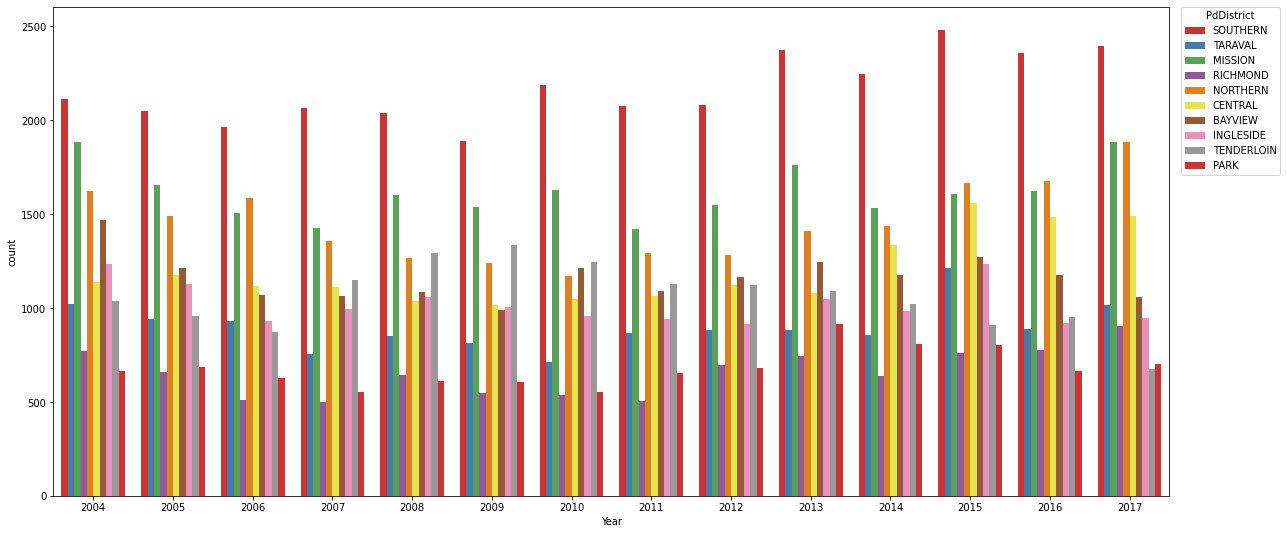

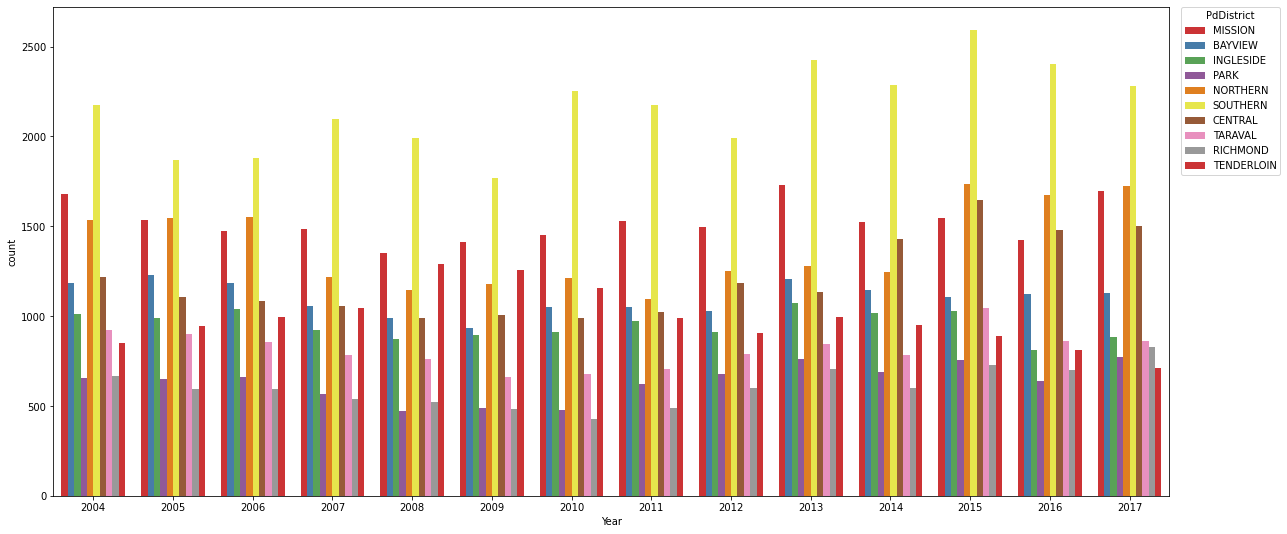

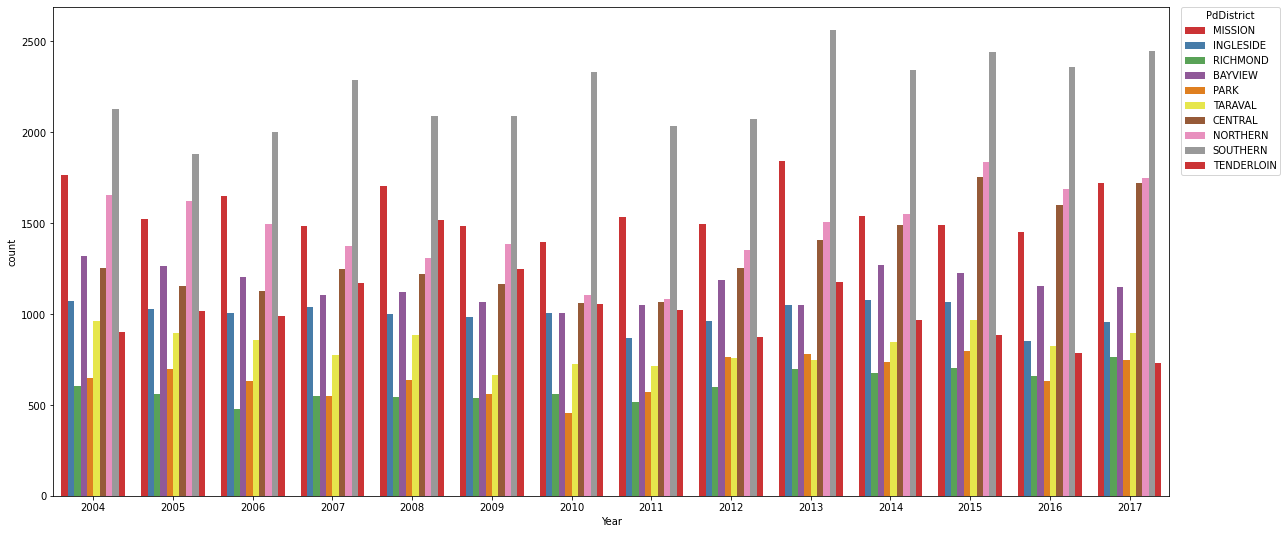

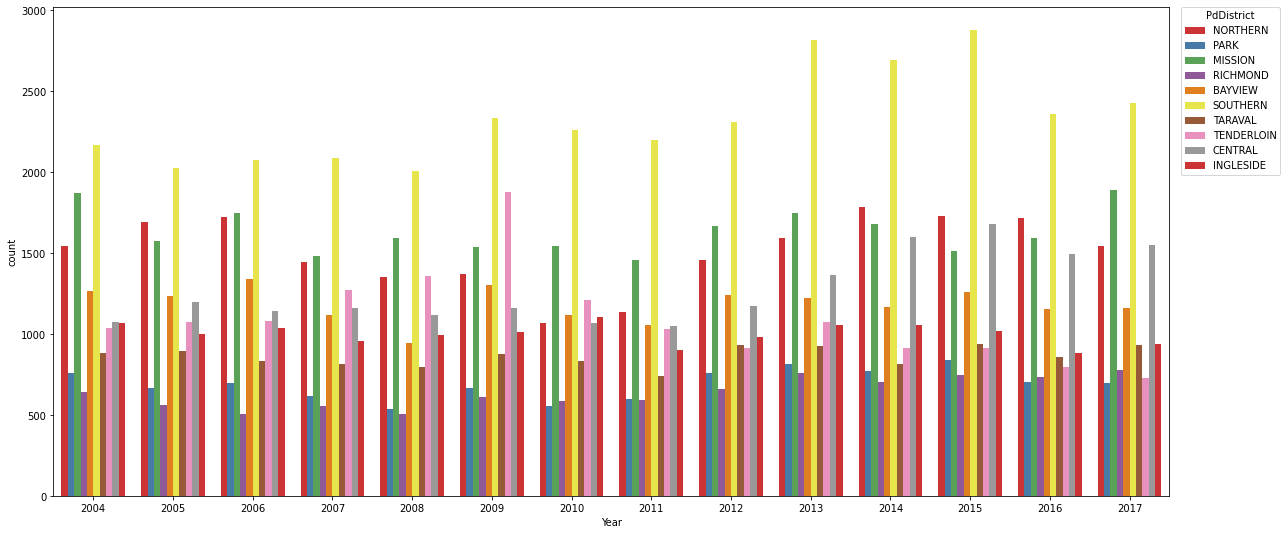

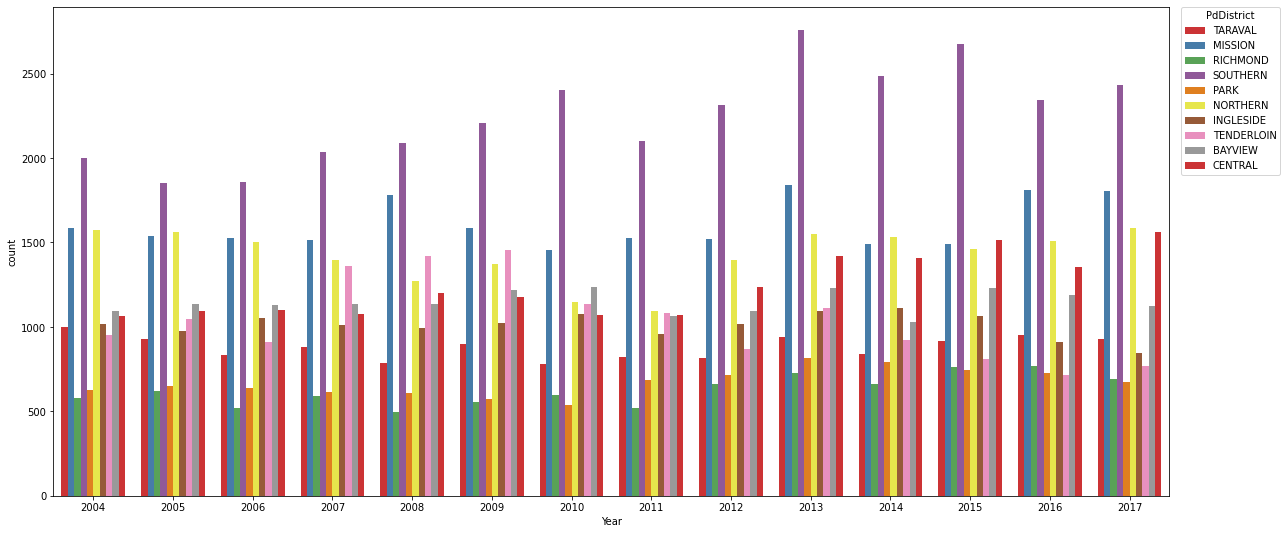

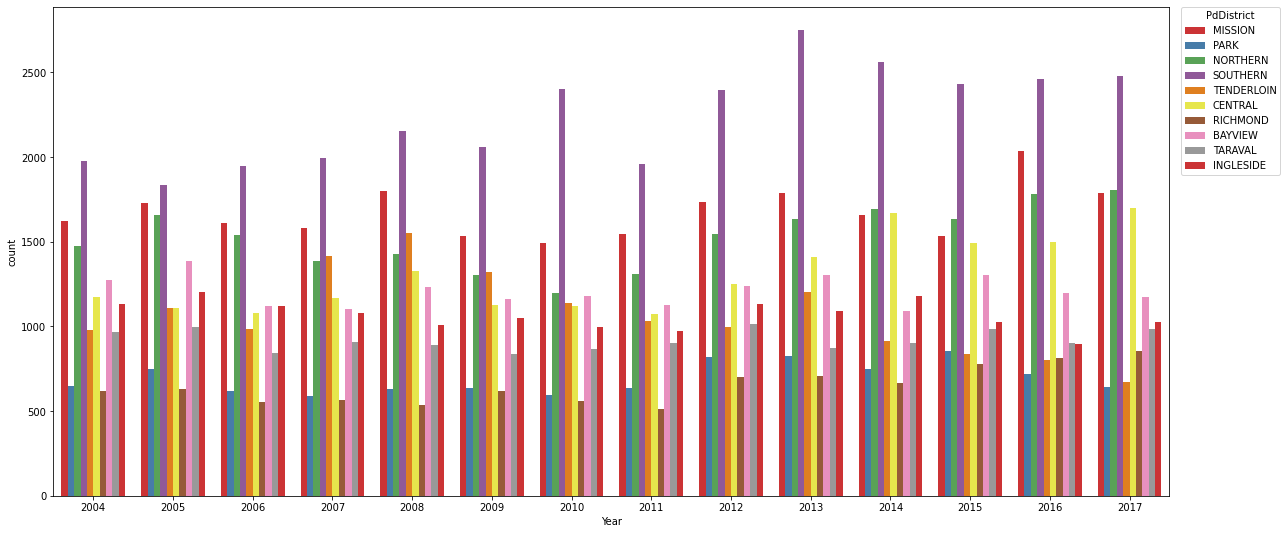

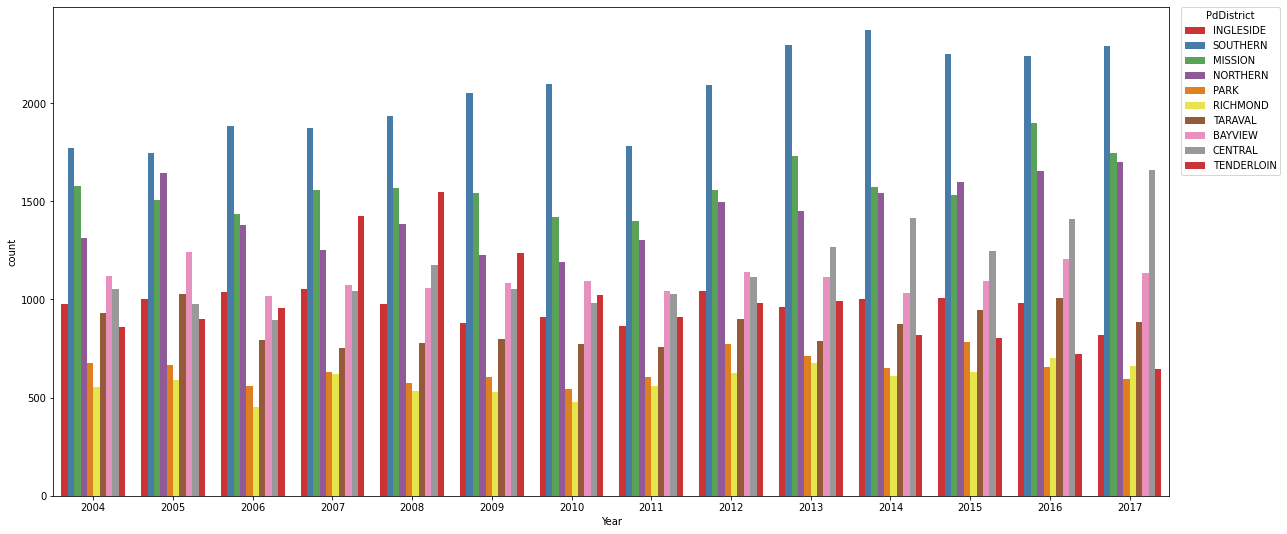

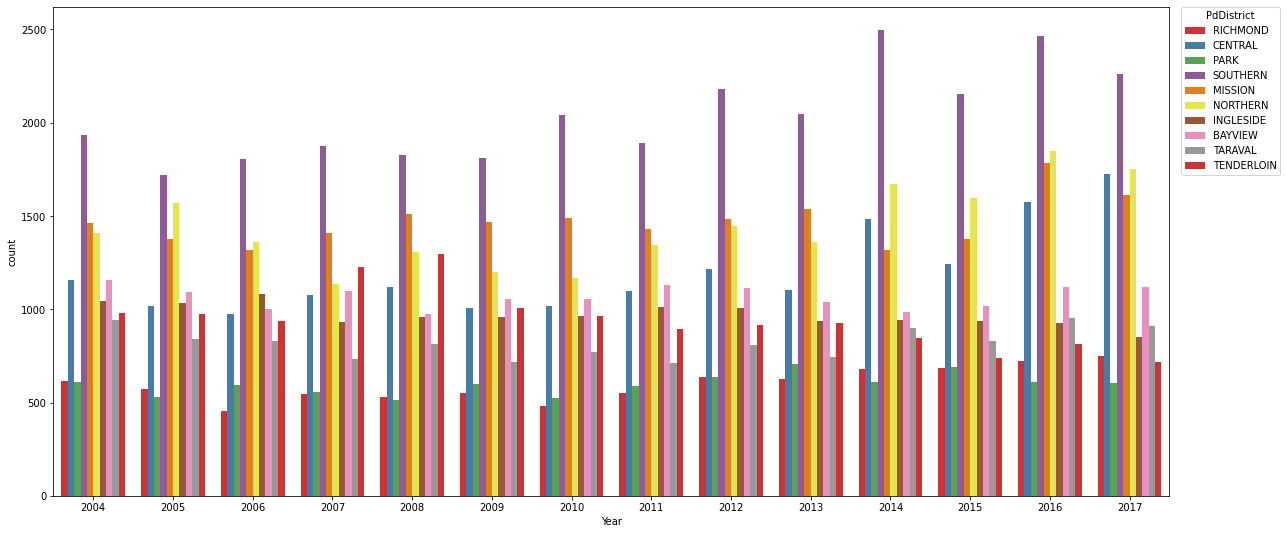

In [ ]:
for m in range(1,13):
  data_per_month = dataset_df[(dataset_df.Month == m)]
  plt.figure(figsize=(20,9))
  cplot_per_month = sns.countplot(x="Year", hue = "PdDistrict",data=data_per_month, palette="Set1" )
  plt.legend(title= "PdDistrict", bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
  mn = m
  datetime_object = datetime.datetime.strptime(str(mn), "%m")
  month_name = datetime_object.strftime("%B")

  plt.savefig(PATH_IMAGE+"/Number_of_crimes_in_"+month_name+"_SF.png")
plt.show()